In [12]:
import pandas as pd
import numpy as np
import random

In [13]:
import gensim
import pickle
import json

In [14]:
from itertools import product

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.decomposition import PCA

### Model is created in GreenGenes-Embeddings-Training notebook

In [16]:
model = pickle.load(open("w2v_model.p", "rb"))

### First Patient Set (Females)

In [17]:
#p_1 ZY7IW45 Caucasian Female age-69 BMI-36.36 IR
p_1 = open('Datafiles/ZY7IW45.fastq', 'r').readlines()
p_1 = [i.rstrip() for i in p_1[1::4]]

#p_2 ZPEL6L3 Caucasian Female age-52 BMI-24.44 IS
p_2 = open('Datafiles/ZPEL6L3.fastq', 'r').readlines()
p_2 = [i.rstrip() for i in p_2[1::4]]

#p_3 ZWHMV5E Caucasian Female age-62 BMI-33.96 IR
p_3 = open('Datafiles/ZWHMV5E.fastq', 'r').readlines()
p_3 = [i.rstrip() for i in p_3[1::4]]

#p_4 ZRLZ98T Caucasian Female age-56 BMI-24.54 IS
p_4 = open('Datafiles/ZRLZ98T.fastq', 'r').readlines()
p_4 = [i.rstrip() for i in p_4[1::4]]


In [18]:
print('Reads in P1:', len(p_1))
print('Reads in P2:', len(p_2))
print('Reads in P3:', len(p_3))
print('Reads in P4:', len(p_4))

Reads in P1: 29379
Reads in P2: 28329
Reads in P3: 22485
Reads in P4: 13821


### Tokenize Patient Data

In [19]:
tokenized_p1 = []

for i,sequence in enumerate(p_1):
    print('tokenizing sequence', i)
    for j in range(6):
        counter = 0
        try:
            tokenized_sequence = []
            while counter+6 < len(sequence):
                tokenized_sequence.append(str(sequence[j+counter:j+counter+6]))
                counter += 6
            tokenized_p1.append(tokenized_sequence)
        except:
            pass

tokenizing sequence 0
tokenizing sequence 1
tokenizing sequence 2
tokenizing sequence 3
tokenizing sequence 4
tokenizing sequence 5
tokenizing sequence 6
tokenizing sequence 7
tokenizing sequence 8
tokenizing sequence 9
tokenizing sequence 10
tokenizing sequence 11
tokenizing sequence 12
tokenizing sequence 13
tokenizing sequence 14
tokenizing sequence 15
tokenizing sequence 16
tokenizing sequence 17
tokenizing sequence 18
tokenizing sequence 19
tokenizing sequence 20
tokenizing sequence 21
tokenizing sequence 22
tokenizing sequence 23
tokenizing sequence 24
tokenizing sequence 25
tokenizing sequence 26
tokenizing sequence 27
tokenizing sequence 28
tokenizing sequence 29
tokenizing sequence 30
tokenizing sequence 31
tokenizing sequence 32
tokenizing sequence 33
tokenizing sequence 34
tokenizing sequence 35
tokenizing sequence 36
tokenizing sequence 37
tokenizing sequence 38
tokenizing sequence 39
tokenizing sequence 40
tokenizing sequence 41
tokenizing sequence 42
tokenizing sequence 4

tokenizing sequence 380
tokenizing sequence 381
tokenizing sequence 382
tokenizing sequence 383
tokenizing sequence 384
tokenizing sequence 385
tokenizing sequence 386
tokenizing sequence 387
tokenizing sequence 388
tokenizing sequence 389
tokenizing sequence 390
tokenizing sequence 391
tokenizing sequence 392
tokenizing sequence 393
tokenizing sequence 394
tokenizing sequence 395
tokenizing sequence 396
tokenizing sequence 397
tokenizing sequence 398
tokenizing sequence 399
tokenizing sequence 400
tokenizing sequence 401
tokenizing sequence 402
tokenizing sequence 403
tokenizing sequence 404
tokenizing sequence 405
tokenizing sequence 406
tokenizing sequence 407
tokenizing sequence 408
tokenizing sequence 409
tokenizing sequence 410
tokenizing sequence 411
tokenizing sequence 412
tokenizing sequence 413
tokenizing sequence 414
tokenizing sequence 415
tokenizing sequence 416
tokenizing sequence 417
tokenizing sequence 418
tokenizing sequence 419
tokenizing sequence 420
tokenizing seque

tokenizing sequence 723
tokenizing sequence 724
tokenizing sequence 725
tokenizing sequence 726
tokenizing sequence 727
tokenizing sequence 728
tokenizing sequence 729
tokenizing sequence 730
tokenizing sequence 731
tokenizing sequence 732
tokenizing sequence 733
tokenizing sequence 734
tokenizing sequence 735
tokenizing sequence 736
tokenizing sequence 737
tokenizing sequence 738
tokenizing sequence 739
tokenizing sequence 740
tokenizing sequence 741
tokenizing sequence 742
tokenizing sequence 743
tokenizing sequence 744
tokenizing sequence 745
tokenizing sequence 746
tokenizing sequence 747
tokenizing sequence 748
tokenizing sequence 749
tokenizing sequence 750
tokenizing sequence 751
tokenizing sequence 752
tokenizing sequence 753
tokenizing sequence 754
tokenizing sequence 755
tokenizing sequence 756
tokenizing sequence 757
tokenizing sequence 758
tokenizing sequence 759
tokenizing sequence 760
tokenizing sequence 761
tokenizing sequence 762
tokenizing sequence 763
tokenizing seque

tokenizing sequence 1245
tokenizing sequence 1246
tokenizing sequence 1247
tokenizing sequence 1248
tokenizing sequence 1249
tokenizing sequence 1250
tokenizing sequence 1251
tokenizing sequence 1252
tokenizing sequence 1253
tokenizing sequence 1254
tokenizing sequence 1255
tokenizing sequence 1256
tokenizing sequence 1257
tokenizing sequence 1258
tokenizing sequence 1259
tokenizing sequence 1260
tokenizing sequence 1261
tokenizing sequence 1262
tokenizing sequence 1263
tokenizing sequence 1264
tokenizing sequence 1265
tokenizing sequence 1266
tokenizing sequence 1267
tokenizing sequence 1268
tokenizing sequence 1269
tokenizing sequence 1270
tokenizing sequence 1271
tokenizing sequence 1272
tokenizing sequence 1273
tokenizing sequence 1274
tokenizing sequence 1275
tokenizing sequence 1276
tokenizing sequence 1277
tokenizing sequence 1278
tokenizing sequence 1279
tokenizing sequence 1280
tokenizing sequence 1281
tokenizing sequence 1282
tokenizing sequence 1283
tokenizing sequence 1284


tokenizing sequence 1736
tokenizing sequence 1737
tokenizing sequence 1738
tokenizing sequence 1739
tokenizing sequence 1740
tokenizing sequence 1741
tokenizing sequence 1742
tokenizing sequence 1743
tokenizing sequence 1744
tokenizing sequence 1745
tokenizing sequence 1746
tokenizing sequence 1747
tokenizing sequence 1748
tokenizing sequence 1749
tokenizing sequence 1750
tokenizing sequence 1751
tokenizing sequence 1752
tokenizing sequence 1753
tokenizing sequence 1754
tokenizing sequence 1755
tokenizing sequence 1756
tokenizing sequence 1757
tokenizing sequence 1758
tokenizing sequence 1759
tokenizing sequence 1760
tokenizing sequence 1761
tokenizing sequence 1762
tokenizing sequence 1763
tokenizing sequence 1764
tokenizing sequence 1765
tokenizing sequence 1766
tokenizing sequence 1767
tokenizing sequence 1768
tokenizing sequence 1769
tokenizing sequence 1770
tokenizing sequence 1771
tokenizing sequence 1772
tokenizing sequence 1773
tokenizing sequence 1774
tokenizing sequence 1775


tokenizing sequence 2249
tokenizing sequence 2250
tokenizing sequence 2251
tokenizing sequence 2252
tokenizing sequence 2253
tokenizing sequence 2254
tokenizing sequence 2255
tokenizing sequence 2256
tokenizing sequence 2257
tokenizing sequence 2258
tokenizing sequence 2259
tokenizing sequence 2260
tokenizing sequence 2261
tokenizing sequence 2262
tokenizing sequence 2263
tokenizing sequence 2264
tokenizing sequence 2265
tokenizing sequence 2266
tokenizing sequence 2267
tokenizing sequence 2268
tokenizing sequence 2269
tokenizing sequence 2270
tokenizing sequence 2271
tokenizing sequence 2272
tokenizing sequence 2273
tokenizing sequence 2274
tokenizing sequence 2275
tokenizing sequence 2276
tokenizing sequence 2277
tokenizing sequence 2278
tokenizing sequence 2279
tokenizing sequence 2280
tokenizing sequence 2281
tokenizing sequence 2282
tokenizing sequence 2283
tokenizing sequence 2284
tokenizing sequence 2285
tokenizing sequence 2286
tokenizing sequence 2287
tokenizing sequence 2288


tokenizing sequence 2644
tokenizing sequence 2645
tokenizing sequence 2646
tokenizing sequence 2647
tokenizing sequence 2648
tokenizing sequence 2649
tokenizing sequence 2650
tokenizing sequence 2651
tokenizing sequence 2652
tokenizing sequence 2653
tokenizing sequence 2654
tokenizing sequence 2655
tokenizing sequence 2656
tokenizing sequence 2657
tokenizing sequence 2658
tokenizing sequence 2659
tokenizing sequence 2660
tokenizing sequence 2661
tokenizing sequence 2662
tokenizing sequence 2663
tokenizing sequence 2664
tokenizing sequence 2665
tokenizing sequence 2666
tokenizing sequence 2667
tokenizing sequence 2668
tokenizing sequence 2669
tokenizing sequence 2670
tokenizing sequence 2671
tokenizing sequence 2672
tokenizing sequence 2673
tokenizing sequence 2674
tokenizing sequence 2675
tokenizing sequence 2676
tokenizing sequence 2677
tokenizing sequence 2678
tokenizing sequence 2679
tokenizing sequence 2680
tokenizing sequence 2681
tokenizing sequence 2682
tokenizing sequence 2683


tokenizing sequence 3080
tokenizing sequence 3081
tokenizing sequence 3082
tokenizing sequence 3083
tokenizing sequence 3084
tokenizing sequence 3085
tokenizing sequence 3086
tokenizing sequence 3087
tokenizing sequence 3088
tokenizing sequence 3089
tokenizing sequence 3090
tokenizing sequence 3091
tokenizing sequence 3092
tokenizing sequence 3093
tokenizing sequence 3094
tokenizing sequence 3095
tokenizing sequence 3096
tokenizing sequence 3097
tokenizing sequence 3098
tokenizing sequence 3099
tokenizing sequence 3100
tokenizing sequence 3101
tokenizing sequence 3102
tokenizing sequence 3103
tokenizing sequence 3104
tokenizing sequence 3105
tokenizing sequence 3106
tokenizing sequence 3107
tokenizing sequence 3108
tokenizing sequence 3109
tokenizing sequence 3110
tokenizing sequence 3111
tokenizing sequence 3112
tokenizing sequence 3113
tokenizing sequence 3114
tokenizing sequence 3115
tokenizing sequence 3116
tokenizing sequence 3117
tokenizing sequence 3118
tokenizing sequence 3119


tokenizing sequence 3610
tokenizing sequence 3611
tokenizing sequence 3612
tokenizing sequence 3613
tokenizing sequence 3614
tokenizing sequence 3615
tokenizing sequence 3616
tokenizing sequence 3617
tokenizing sequence 3618
tokenizing sequence 3619
tokenizing sequence 3620
tokenizing sequence 3621
tokenizing sequence 3622
tokenizing sequence 3623
tokenizing sequence 3624
tokenizing sequence 3625
tokenizing sequence 3626
tokenizing sequence 3627
tokenizing sequence 3628
tokenizing sequence 3629
tokenizing sequence 3630
tokenizing sequence 3631
tokenizing sequence 3632
tokenizing sequence 3633
tokenizing sequence 3634
tokenizing sequence 3635
tokenizing sequence 3636
tokenizing sequence 3637
tokenizing sequence 3638
tokenizing sequence 3639
tokenizing sequence 3640
tokenizing sequence 3641
tokenizing sequence 3642
tokenizing sequence 3643
tokenizing sequence 3644
tokenizing sequence 3645
tokenizing sequence 3646
tokenizing sequence 3647
tokenizing sequence 3648
tokenizing sequence 3649


tokenizing sequence 4068
tokenizing sequence 4069
tokenizing sequence 4070
tokenizing sequence 4071
tokenizing sequence 4072
tokenizing sequence 4073
tokenizing sequence 4074
tokenizing sequence 4075
tokenizing sequence 4076
tokenizing sequence 4077
tokenizing sequence 4078
tokenizing sequence 4079
tokenizing sequence 4080
tokenizing sequence 4081
tokenizing sequence 4082
tokenizing sequence 4083
tokenizing sequence 4084
tokenizing sequence 4085
tokenizing sequence 4086
tokenizing sequence 4087
tokenizing sequence 4088
tokenizing sequence 4089
tokenizing sequence 4090
tokenizing sequence 4091
tokenizing sequence 4092
tokenizing sequence 4093
tokenizing sequence 4094
tokenizing sequence 4095
tokenizing sequence 4096
tokenizing sequence 4097
tokenizing sequence 4098
tokenizing sequence 4099
tokenizing sequence 4100
tokenizing sequence 4101
tokenizing sequence 4102
tokenizing sequence 4103
tokenizing sequence 4104
tokenizing sequence 4105
tokenizing sequence 4106
tokenizing sequence 4107


tokenizing sequence 4594
tokenizing sequence 4595
tokenizing sequence 4596
tokenizing sequence 4597
tokenizing sequence 4598
tokenizing sequence 4599
tokenizing sequence 4600
tokenizing sequence 4601
tokenizing sequence 4602
tokenizing sequence 4603
tokenizing sequence 4604
tokenizing sequence 4605
tokenizing sequence 4606
tokenizing sequence 4607
tokenizing sequence 4608
tokenizing sequence 4609
tokenizing sequence 4610
tokenizing sequence 4611
tokenizing sequence 4612
tokenizing sequence 4613
tokenizing sequence 4614
tokenizing sequence 4615
tokenizing sequence 4616
tokenizing sequence 4617
tokenizing sequence 4618
tokenizing sequence 4619
tokenizing sequence 4620
tokenizing sequence 4621
tokenizing sequence 4622
tokenizing sequence 4623
tokenizing sequence 4624
tokenizing sequence 4625
tokenizing sequence 4626
tokenizing sequence 4627
tokenizing sequence 4628
tokenizing sequence 4629
tokenizing sequence 4630
tokenizing sequence 4631
tokenizing sequence 4632
tokenizing sequence 4633


tokenizing sequence 5084
tokenizing sequence 5085
tokenizing sequence 5086
tokenizing sequence 5087
tokenizing sequence 5088
tokenizing sequence 5089
tokenizing sequence 5090
tokenizing sequence 5091
tokenizing sequence 5092
tokenizing sequence 5093
tokenizing sequence 5094
tokenizing sequence 5095
tokenizing sequence 5096
tokenizing sequence 5097
tokenizing sequence 5098
tokenizing sequence 5099
tokenizing sequence 5100
tokenizing sequence 5101
tokenizing sequence 5102
tokenizing sequence 5103
tokenizing sequence 5104
tokenizing sequence 5105
tokenizing sequence 5106
tokenizing sequence 5107
tokenizing sequence 5108
tokenizing sequence 5109
tokenizing sequence 5110
tokenizing sequence 5111
tokenizing sequence 5112
tokenizing sequence 5113
tokenizing sequence 5114
tokenizing sequence 5115
tokenizing sequence 5116
tokenizing sequence 5117
tokenizing sequence 5118
tokenizing sequence 5119
tokenizing sequence 5120
tokenizing sequence 5121
tokenizing sequence 5122
tokenizing sequence 5123


tokenizing sequence 5498
tokenizing sequence 5499
tokenizing sequence 5500
tokenizing sequence 5501
tokenizing sequence 5502
tokenizing sequence 5503
tokenizing sequence 5504
tokenizing sequence 5505
tokenizing sequence 5506
tokenizing sequence 5507
tokenizing sequence 5508
tokenizing sequence 5509
tokenizing sequence 5510
tokenizing sequence 5511
tokenizing sequence 5512
tokenizing sequence 5513
tokenizing sequence 5514
tokenizing sequence 5515
tokenizing sequence 5516
tokenizing sequence 5517
tokenizing sequence 5518
tokenizing sequence 5519
tokenizing sequence 5520
tokenizing sequence 5521
tokenizing sequence 5522
tokenizing sequence 5523
tokenizing sequence 5524
tokenizing sequence 5525
tokenizing sequence 5526
tokenizing sequence 5527
tokenizing sequence 5528
tokenizing sequence 5529
tokenizing sequence 5530
tokenizing sequence 5531
tokenizing sequence 5532
tokenizing sequence 5533
tokenizing sequence 5534
tokenizing sequence 5535
tokenizing sequence 5536
tokenizing sequence 5537


tokenizing sequence 5897
tokenizing sequence 5898
tokenizing sequence 5899
tokenizing sequence 5900
tokenizing sequence 5901
tokenizing sequence 5902
tokenizing sequence 5903
tokenizing sequence 5904
tokenizing sequence 5905
tokenizing sequence 5906
tokenizing sequence 5907
tokenizing sequence 5908
tokenizing sequence 5909
tokenizing sequence 5910
tokenizing sequence 5911
tokenizing sequence 5912
tokenizing sequence 5913
tokenizing sequence 5914
tokenizing sequence 5915
tokenizing sequence 5916
tokenizing sequence 5917
tokenizing sequence 5918
tokenizing sequence 5919
tokenizing sequence 5920
tokenizing sequence 5921
tokenizing sequence 5922
tokenizing sequence 5923
tokenizing sequence 5924
tokenizing sequence 5925
tokenizing sequence 5926
tokenizing sequence 5927
tokenizing sequence 5928
tokenizing sequence 5929
tokenizing sequence 5930
tokenizing sequence 5931
tokenizing sequence 5932
tokenizing sequence 5933
tokenizing sequence 5934
tokenizing sequence 5935
tokenizing sequence 5936


tokenizing sequence 6369
tokenizing sequence 6370
tokenizing sequence 6371
tokenizing sequence 6372
tokenizing sequence 6373
tokenizing sequence 6374
tokenizing sequence 6375
tokenizing sequence 6376
tokenizing sequence 6377
tokenizing sequence 6378
tokenizing sequence 6379
tokenizing sequence 6380
tokenizing sequence 6381
tokenizing sequence 6382
tokenizing sequence 6383
tokenizing sequence 6384
tokenizing sequence 6385
tokenizing sequence 6386
tokenizing sequence 6387
tokenizing sequence 6388
tokenizing sequence 6389
tokenizing sequence 6390
tokenizing sequence 6391
tokenizing sequence 6392
tokenizing sequence 6393
tokenizing sequence 6394
tokenizing sequence 6395
tokenizing sequence 6396
tokenizing sequence 6397
tokenizing sequence 6398
tokenizing sequence 6399
tokenizing sequence 6400
tokenizing sequence 6401
tokenizing sequence 6402
tokenizing sequence 6403
tokenizing sequence 6404
tokenizing sequence 6405
tokenizing sequence 6406
tokenizing sequence 6407
tokenizing sequence 6408


tokenizing sequence 6876
tokenizing sequence 6877
tokenizing sequence 6878
tokenizing sequence 6879
tokenizing sequence 6880
tokenizing sequence 6881
tokenizing sequence 6882
tokenizing sequence 6883
tokenizing sequence 6884
tokenizing sequence 6885
tokenizing sequence 6886
tokenizing sequence 6887
tokenizing sequence 6888
tokenizing sequence 6889
tokenizing sequence 6890
tokenizing sequence 6891
tokenizing sequence 6892
tokenizing sequence 6893
tokenizing sequence 6894
tokenizing sequence 6895
tokenizing sequence 6896
tokenizing sequence 6897
tokenizing sequence 6898
tokenizing sequence 6899
tokenizing sequence 6900
tokenizing sequence 6901
tokenizing sequence 6902
tokenizing sequence 6903
tokenizing sequence 6904
tokenizing sequence 6905
tokenizing sequence 6906
tokenizing sequence 6907
tokenizing sequence 6908
tokenizing sequence 6909
tokenizing sequence 6910
tokenizing sequence 6911
tokenizing sequence 6912
tokenizing sequence 6913
tokenizing sequence 6914
tokenizing sequence 6915


tokenizing sequence 7249
tokenizing sequence 7250
tokenizing sequence 7251
tokenizing sequence 7252
tokenizing sequence 7253
tokenizing sequence 7254
tokenizing sequence 7255
tokenizing sequence 7256
tokenizing sequence 7257
tokenizing sequence 7258
tokenizing sequence 7259
tokenizing sequence 7260
tokenizing sequence 7261
tokenizing sequence 7262
tokenizing sequence 7263
tokenizing sequence 7264
tokenizing sequence 7265
tokenizing sequence 7266
tokenizing sequence 7267
tokenizing sequence 7268
tokenizing sequence 7269
tokenizing sequence 7270
tokenizing sequence 7271
tokenizing sequence 7272
tokenizing sequence 7273
tokenizing sequence 7274
tokenizing sequence 7275
tokenizing sequence 7276
tokenizing sequence 7277
tokenizing sequence 7278
tokenizing sequence 7279
tokenizing sequence 7280
tokenizing sequence 7281
tokenizing sequence 7282
tokenizing sequence 7283
tokenizing sequence 7284
tokenizing sequence 7285
tokenizing sequence 7286
tokenizing sequence 7287
tokenizing sequence 7288


tokenizing sequence 8044
tokenizing sequence 8045
tokenizing sequence 8046
tokenizing sequence 8047
tokenizing sequence 8048
tokenizing sequence 8049
tokenizing sequence 8050
tokenizing sequence 8051
tokenizing sequence 8052
tokenizing sequence 8053
tokenizing sequence 8054
tokenizing sequence 8055
tokenizing sequence 8056
tokenizing sequence 8057
tokenizing sequence 8058
tokenizing sequence 8059
tokenizing sequence 8060
tokenizing sequence 8061
tokenizing sequence 8062
tokenizing sequence 8063
tokenizing sequence 8064
tokenizing sequence 8065
tokenizing sequence 8066
tokenizing sequence 8067
tokenizing sequence 8068
tokenizing sequence 8069
tokenizing sequence 8070
tokenizing sequence 8071
tokenizing sequence 8072
tokenizing sequence 8073
tokenizing sequence 8074
tokenizing sequence 8075
tokenizing sequence 8076
tokenizing sequence 8077
tokenizing sequence 8078
tokenizing sequence 8079
tokenizing sequence 8080
tokenizing sequence 8081
tokenizing sequence 8082
tokenizing sequence 8083


tokenizing sequence 8489
tokenizing sequence 8490
tokenizing sequence 8491
tokenizing sequence 8492
tokenizing sequence 8493
tokenizing sequence 8494
tokenizing sequence 8495
tokenizing sequence 8496
tokenizing sequence 8497
tokenizing sequence 8498
tokenizing sequence 8499
tokenizing sequence 8500
tokenizing sequence 8501
tokenizing sequence 8502
tokenizing sequence 8503
tokenizing sequence 8504
tokenizing sequence 8505
tokenizing sequence 8506
tokenizing sequence 8507
tokenizing sequence 8508
tokenizing sequence 8509
tokenizing sequence 8510
tokenizing sequence 8511
tokenizing sequence 8512
tokenizing sequence 8513
tokenizing sequence 8514
tokenizing sequence 8515
tokenizing sequence 8516
tokenizing sequence 8517
tokenizing sequence 8518
tokenizing sequence 8519
tokenizing sequence 8520
tokenizing sequence 8521
tokenizing sequence 8522
tokenizing sequence 8523
tokenizing sequence 8524
tokenizing sequence 8525
tokenizing sequence 8526
tokenizing sequence 8527
tokenizing sequence 8528


tokenizing sequence 8881
tokenizing sequence 8882
tokenizing sequence 8883
tokenizing sequence 8884
tokenizing sequence 8885
tokenizing sequence 8886
tokenizing sequence 8887
tokenizing sequence 8888
tokenizing sequence 8889
tokenizing sequence 8890
tokenizing sequence 8891
tokenizing sequence 8892
tokenizing sequence 8893
tokenizing sequence 8894
tokenizing sequence 8895
tokenizing sequence 8896
tokenizing sequence 8897
tokenizing sequence 8898
tokenizing sequence 8899
tokenizing sequence 8900
tokenizing sequence 8901
tokenizing sequence 8902
tokenizing sequence 8903
tokenizing sequence 8904
tokenizing sequence 8905
tokenizing sequence 8906
tokenizing sequence 8907
tokenizing sequence 8908
tokenizing sequence 8909
tokenizing sequence 8910
tokenizing sequence 8911
tokenizing sequence 8912
tokenizing sequence 8913
tokenizing sequence 8914
tokenizing sequence 8915
tokenizing sequence 8916
tokenizing sequence 8917
tokenizing sequence 8918
tokenizing sequence 8919
tokenizing sequence 8920


tokenizing sequence 9240
tokenizing sequence 9241
tokenizing sequence 9242
tokenizing sequence 9243
tokenizing sequence 9244
tokenizing sequence 9245
tokenizing sequence 9246
tokenizing sequence 9247
tokenizing sequence 9248
tokenizing sequence 9249
tokenizing sequence 9250
tokenizing sequence 9251
tokenizing sequence 9252
tokenizing sequence 9253
tokenizing sequence 9254
tokenizing sequence 9255
tokenizing sequence 9256
tokenizing sequence 9257
tokenizing sequence 9258
tokenizing sequence 9259
tokenizing sequence 9260
tokenizing sequence 9261
tokenizing sequence 9262
tokenizing sequence 9263
tokenizing sequence 9264
tokenizing sequence 9265
tokenizing sequence 9266
tokenizing sequence 9267
tokenizing sequence 9268
tokenizing sequence 9269
tokenizing sequence 9270
tokenizing sequence 9271
tokenizing sequence 9272
tokenizing sequence 9273
tokenizing sequence 9274
tokenizing sequence 9275
tokenizing sequence 9276
tokenizing sequence 9277
tokenizing sequence 9278
tokenizing sequence 9279


tokenizing sequence 9741
tokenizing sequence 9742
tokenizing sequence 9743
tokenizing sequence 9744
tokenizing sequence 9745
tokenizing sequence 9746
tokenizing sequence 9747
tokenizing sequence 9748
tokenizing sequence 9749
tokenizing sequence 9750
tokenizing sequence 9751
tokenizing sequence 9752
tokenizing sequence 9753
tokenizing sequence 9754
tokenizing sequence 9755
tokenizing sequence 9756
tokenizing sequence 9757
tokenizing sequence 9758
tokenizing sequence 9759
tokenizing sequence 9760
tokenizing sequence 9761
tokenizing sequence 9762
tokenizing sequence 9763
tokenizing sequence 9764
tokenizing sequence 9765
tokenizing sequence 9766
tokenizing sequence 9767
tokenizing sequence 9768
tokenizing sequence 9769
tokenizing sequence 9770
tokenizing sequence 9771
tokenizing sequence 9772
tokenizing sequence 9773
tokenizing sequence 9774
tokenizing sequence 9775
tokenizing sequence 9776
tokenizing sequence 9777
tokenizing sequence 9778
tokenizing sequence 9779
tokenizing sequence 9780


tokenizing sequence 10209
tokenizing sequence 10210
tokenizing sequence 10211
tokenizing sequence 10212
tokenizing sequence 10213
tokenizing sequence 10214
tokenizing sequence 10215
tokenizing sequence 10216
tokenizing sequence 10217
tokenizing sequence 10218
tokenizing sequence 10219
tokenizing sequence 10220
tokenizing sequence 10221
tokenizing sequence 10222
tokenizing sequence 10223
tokenizing sequence 10224
tokenizing sequence 10225
tokenizing sequence 10226
tokenizing sequence 10227
tokenizing sequence 10228
tokenizing sequence 10229
tokenizing sequence 10230
tokenizing sequence 10231
tokenizing sequence 10232
tokenizing sequence 10233
tokenizing sequence 10234
tokenizing sequence 10235
tokenizing sequence 10236
tokenizing sequence 10237
tokenizing sequence 10238
tokenizing sequence 10239
tokenizing sequence 10240
tokenizing sequence 10241
tokenizing sequence 10242
tokenizing sequence 10243
tokenizing sequence 10244
tokenizing sequence 10245
tokenizing sequence 10246
tokenizing s

tokenizing sequence 10704
tokenizing sequence 10705
tokenizing sequence 10706
tokenizing sequence 10707
tokenizing sequence 10708
tokenizing sequence 10709
tokenizing sequence 10710
tokenizing sequence 10711
tokenizing sequence 10712
tokenizing sequence 10713
tokenizing sequence 10714
tokenizing sequence 10715
tokenizing sequence 10716
tokenizing sequence 10717
tokenizing sequence 10718
tokenizing sequence 10719
tokenizing sequence 10720
tokenizing sequence 10721
tokenizing sequence 10722
tokenizing sequence 10723
tokenizing sequence 10724
tokenizing sequence 10725
tokenizing sequence 10726
tokenizing sequence 10727
tokenizing sequence 10728
tokenizing sequence 10729
tokenizing sequence 10730
tokenizing sequence 10731
tokenizing sequence 10732
tokenizing sequence 10733
tokenizing sequence 10734
tokenizing sequence 10735
tokenizing sequence 10736
tokenizing sequence 10737
tokenizing sequence 10738
tokenizing sequence 10739
tokenizing sequence 10740
tokenizing sequence 10741
tokenizing s

tokenizing sequence 11138
tokenizing sequence 11139
tokenizing sequence 11140
tokenizing sequence 11141
tokenizing sequence 11142
tokenizing sequence 11143
tokenizing sequence 11144
tokenizing sequence 11145
tokenizing sequence 11146
tokenizing sequence 11147
tokenizing sequence 11148
tokenizing sequence 11149
tokenizing sequence 11150
tokenizing sequence 11151
tokenizing sequence 11152
tokenizing sequence 11153
tokenizing sequence 11154
tokenizing sequence 11155
tokenizing sequence 11156
tokenizing sequence 11157
tokenizing sequence 11158
tokenizing sequence 11159
tokenizing sequence 11160
tokenizing sequence 11161
tokenizing sequence 11162
tokenizing sequence 11163
tokenizing sequence 11164
tokenizing sequence 11165
tokenizing sequence 11166
tokenizing sequence 11167
tokenizing sequence 11168
tokenizing sequence 11169
tokenizing sequence 11170
tokenizing sequence 11171
tokenizing sequence 11172
tokenizing sequence 11173
tokenizing sequence 11174
tokenizing sequence 11175
tokenizing s

tokenizing sequence 11518
tokenizing sequence 11519
tokenizing sequence 11520
tokenizing sequence 11521
tokenizing sequence 11522
tokenizing sequence 11523
tokenizing sequence 11524
tokenizing sequence 11525
tokenizing sequence 11526
tokenizing sequence 11527
tokenizing sequence 11528
tokenizing sequence 11529
tokenizing sequence 11530
tokenizing sequence 11531
tokenizing sequence 11532
tokenizing sequence 11533
tokenizing sequence 11534
tokenizing sequence 11535
tokenizing sequence 11536
tokenizing sequence 11537
tokenizing sequence 11538
tokenizing sequence 11539
tokenizing sequence 11540
tokenizing sequence 11541
tokenizing sequence 11542
tokenizing sequence 11543
tokenizing sequence 11544
tokenizing sequence 11545
tokenizing sequence 11546
tokenizing sequence 11547
tokenizing sequence 11548
tokenizing sequence 11549
tokenizing sequence 11550
tokenizing sequence 11551
tokenizing sequence 11552
tokenizing sequence 11553
tokenizing sequence 11554
tokenizing sequence 11555
tokenizing s

tokenizing sequence 11975
tokenizing sequence 11976
tokenizing sequence 11977
tokenizing sequence 11978
tokenizing sequence 11979
tokenizing sequence 11980
tokenizing sequence 11981
tokenizing sequence 11982
tokenizing sequence 11983
tokenizing sequence 11984
tokenizing sequence 11985
tokenizing sequence 11986
tokenizing sequence 11987
tokenizing sequence 11988
tokenizing sequence 11989
tokenizing sequence 11990
tokenizing sequence 11991
tokenizing sequence 11992
tokenizing sequence 11993
tokenizing sequence 11994
tokenizing sequence 11995
tokenizing sequence 11996
tokenizing sequence 11997
tokenizing sequence 11998
tokenizing sequence 11999
tokenizing sequence 12000
tokenizing sequence 12001
tokenizing sequence 12002
tokenizing sequence 12003
tokenizing sequence 12004
tokenizing sequence 12005
tokenizing sequence 12006
tokenizing sequence 12007
tokenizing sequence 12008
tokenizing sequence 12009
tokenizing sequence 12010
tokenizing sequence 12011
tokenizing sequence 12012
tokenizing s

tokenizing sequence 12403
tokenizing sequence 12404
tokenizing sequence 12405
tokenizing sequence 12406
tokenizing sequence 12407
tokenizing sequence 12408
tokenizing sequence 12409
tokenizing sequence 12410
tokenizing sequence 12411
tokenizing sequence 12412
tokenizing sequence 12413
tokenizing sequence 12414
tokenizing sequence 12415
tokenizing sequence 12416
tokenizing sequence 12417
tokenizing sequence 12418
tokenizing sequence 12419
tokenizing sequence 12420
tokenizing sequence 12421
tokenizing sequence 12422
tokenizing sequence 12423
tokenizing sequence 12424
tokenizing sequence 12425
tokenizing sequence 12426
tokenizing sequence 12427
tokenizing sequence 12428
tokenizing sequence 12429
tokenizing sequence 12430
tokenizing sequence 12431
tokenizing sequence 12432
tokenizing sequence 12433
tokenizing sequence 12434
tokenizing sequence 12435
tokenizing sequence 12436
tokenizing sequence 12437
tokenizing sequence 12438
tokenizing sequence 12439
tokenizing sequence 12440
tokenizing s

tokenizing sequence 12769
tokenizing sequence 12770
tokenizing sequence 12771
tokenizing sequence 12772
tokenizing sequence 12773
tokenizing sequence 12774
tokenizing sequence 12775
tokenizing sequence 12776
tokenizing sequence 12777
tokenizing sequence 12778
tokenizing sequence 12779
tokenizing sequence 12780
tokenizing sequence 12781
tokenizing sequence 12782
tokenizing sequence 12783
tokenizing sequence 12784
tokenizing sequence 12785
tokenizing sequence 12786
tokenizing sequence 12787
tokenizing sequence 12788
tokenizing sequence 12789
tokenizing sequence 12790
tokenizing sequence 12791
tokenizing sequence 12792
tokenizing sequence 12793
tokenizing sequence 12794
tokenizing sequence 12795
tokenizing sequence 12796
tokenizing sequence 12797
tokenizing sequence 12798
tokenizing sequence 12799
tokenizing sequence 12800
tokenizing sequence 12801
tokenizing sequence 12802
tokenizing sequence 12803
tokenizing sequence 12804
tokenizing sequence 12805
tokenizing sequence 12806
tokenizing s

tokenizing sequence 13253
tokenizing sequence 13254
tokenizing sequence 13255
tokenizing sequence 13256
tokenizing sequence 13257
tokenizing sequence 13258
tokenizing sequence 13259
tokenizing sequence 13260
tokenizing sequence 13261
tokenizing sequence 13262
tokenizing sequence 13263
tokenizing sequence 13264
tokenizing sequence 13265
tokenizing sequence 13266
tokenizing sequence 13267
tokenizing sequence 13268
tokenizing sequence 13269
tokenizing sequence 13270
tokenizing sequence 13271
tokenizing sequence 13272
tokenizing sequence 13273
tokenizing sequence 13274
tokenizing sequence 13275
tokenizing sequence 13276
tokenizing sequence 13277
tokenizing sequence 13278
tokenizing sequence 13279
tokenizing sequence 13280
tokenizing sequence 13281
tokenizing sequence 13282
tokenizing sequence 13283
tokenizing sequence 13284
tokenizing sequence 13285
tokenizing sequence 13286
tokenizing sequence 13287
tokenizing sequence 13288
tokenizing sequence 13289
tokenizing sequence 13290
tokenizing s

tokenizing sequence 13651
tokenizing sequence 13652
tokenizing sequence 13653
tokenizing sequence 13654
tokenizing sequence 13655
tokenizing sequence 13656
tokenizing sequence 13657
tokenizing sequence 13658
tokenizing sequence 13659
tokenizing sequence 13660
tokenizing sequence 13661
tokenizing sequence 13662
tokenizing sequence 13663
tokenizing sequence 13664
tokenizing sequence 13665
tokenizing sequence 13666
tokenizing sequence 13667
tokenizing sequence 13668
tokenizing sequence 13669
tokenizing sequence 13670
tokenizing sequence 13671
tokenizing sequence 13672
tokenizing sequence 13673
tokenizing sequence 13674
tokenizing sequence 13675
tokenizing sequence 13676
tokenizing sequence 13677
tokenizing sequence 13678
tokenizing sequence 13679
tokenizing sequence 13680
tokenizing sequence 13681
tokenizing sequence 13682
tokenizing sequence 13683
tokenizing sequence 13684
tokenizing sequence 13685
tokenizing sequence 13686
tokenizing sequence 13687
tokenizing sequence 13688
tokenizing s

tokenizing sequence 14043
tokenizing sequence 14044
tokenizing sequence 14045
tokenizing sequence 14046
tokenizing sequence 14047
tokenizing sequence 14048
tokenizing sequence 14049
tokenizing sequence 14050
tokenizing sequence 14051
tokenizing sequence 14052
tokenizing sequence 14053
tokenizing sequence 14054
tokenizing sequence 14055
tokenizing sequence 14056
tokenizing sequence 14057
tokenizing sequence 14058
tokenizing sequence 14059
tokenizing sequence 14060
tokenizing sequence 14061
tokenizing sequence 14062
tokenizing sequence 14063
tokenizing sequence 14064
tokenizing sequence 14065
tokenizing sequence 14066
tokenizing sequence 14067
tokenizing sequence 14068
tokenizing sequence 14069
tokenizing sequence 14070
tokenizing sequence 14071
tokenizing sequence 14072
tokenizing sequence 14073
tokenizing sequence 14074
tokenizing sequence 14075
tokenizing sequence 14076
tokenizing sequence 14077
tokenizing sequence 14078
tokenizing sequence 14079
tokenizing sequence 14080
tokenizing s

tokenizing sequence 14461
tokenizing sequence 14462
tokenizing sequence 14463
tokenizing sequence 14464
tokenizing sequence 14465
tokenizing sequence 14466
tokenizing sequence 14467
tokenizing sequence 14468
tokenizing sequence 14469
tokenizing sequence 14470
tokenizing sequence 14471
tokenizing sequence 14472
tokenizing sequence 14473
tokenizing sequence 14474
tokenizing sequence 14475
tokenizing sequence 14476
tokenizing sequence 14477
tokenizing sequence 14478
tokenizing sequence 14479
tokenizing sequence 14480
tokenizing sequence 14481
tokenizing sequence 14482
tokenizing sequence 14483
tokenizing sequence 14484
tokenizing sequence 14485
tokenizing sequence 14486
tokenizing sequence 14487
tokenizing sequence 14488
tokenizing sequence 14489
tokenizing sequence 14490
tokenizing sequence 14491
tokenizing sequence 14492
tokenizing sequence 14493
tokenizing sequence 14494
tokenizing sequence 14495
tokenizing sequence 14496
tokenizing sequence 14497
tokenizing sequence 14498
tokenizing s

tokenizing sequence 14944
tokenizing sequence 14945
tokenizing sequence 14946
tokenizing sequence 14947
tokenizing sequence 14948
tokenizing sequence 14949
tokenizing sequence 14950
tokenizing sequence 14951
tokenizing sequence 14952
tokenizing sequence 14953
tokenizing sequence 14954
tokenizing sequence 14955
tokenizing sequence 14956
tokenizing sequence 14957
tokenizing sequence 14958
tokenizing sequence 14959
tokenizing sequence 14960
tokenizing sequence 14961
tokenizing sequence 14962
tokenizing sequence 14963
tokenizing sequence 14964
tokenizing sequence 14965
tokenizing sequence 14966
tokenizing sequence 14967
tokenizing sequence 14968
tokenizing sequence 14969
tokenizing sequence 14970
tokenizing sequence 14971
tokenizing sequence 14972
tokenizing sequence 14973
tokenizing sequence 14974
tokenizing sequence 14975
tokenizing sequence 14976
tokenizing sequence 14977
tokenizing sequence 14978
tokenizing sequence 14979
tokenizing sequence 14980
tokenizing sequence 14981
tokenizing s

tokenizing sequence 15480
tokenizing sequence 15481
tokenizing sequence 15482
tokenizing sequence 15483
tokenizing sequence 15484
tokenizing sequence 15485
tokenizing sequence 15486
tokenizing sequence 15487
tokenizing sequence 15488
tokenizing sequence 15489
tokenizing sequence 15490
tokenizing sequence 15491
tokenizing sequence 15492
tokenizing sequence 15493
tokenizing sequence 15494
tokenizing sequence 15495
tokenizing sequence 15496
tokenizing sequence 15497
tokenizing sequence 15498
tokenizing sequence 15499
tokenizing sequence 15500
tokenizing sequence 15501
tokenizing sequence 15502
tokenizing sequence 15503
tokenizing sequence 15504
tokenizing sequence 15505
tokenizing sequence 15506
tokenizing sequence 15507
tokenizing sequence 15508
tokenizing sequence 15509
tokenizing sequence 15510
tokenizing sequence 15511
tokenizing sequence 15512
tokenizing sequence 15513
tokenizing sequence 15514
tokenizing sequence 15515
tokenizing sequence 15516
tokenizing sequence 15517
tokenizing s

tokenizing sequence 15989
tokenizing sequence 15990
tokenizing sequence 15991
tokenizing sequence 15992
tokenizing sequence 15993
tokenizing sequence 15994
tokenizing sequence 15995
tokenizing sequence 15996
tokenizing sequence 15997
tokenizing sequence 15998
tokenizing sequence 15999
tokenizing sequence 16000
tokenizing sequence 16001
tokenizing sequence 16002
tokenizing sequence 16003
tokenizing sequence 16004
tokenizing sequence 16005
tokenizing sequence 16006
tokenizing sequence 16007
tokenizing sequence 16008
tokenizing sequence 16009
tokenizing sequence 16010
tokenizing sequence 16011
tokenizing sequence 16012
tokenizing sequence 16013
tokenizing sequence 16014
tokenizing sequence 16015
tokenizing sequence 16016
tokenizing sequence 16017
tokenizing sequence 16018
tokenizing sequence 16019
tokenizing sequence 16020
tokenizing sequence 16021
tokenizing sequence 16022
tokenizing sequence 16023
tokenizing sequence 16024
tokenizing sequence 16025
tokenizing sequence 16026
tokenizing s

tokenizing sequence 16527
tokenizing sequence 16528
tokenizing sequence 16529
tokenizing sequence 16530
tokenizing sequence 16531
tokenizing sequence 16532
tokenizing sequence 16533
tokenizing sequence 16534
tokenizing sequence 16535
tokenizing sequence 16536
tokenizing sequence 16537
tokenizing sequence 16538
tokenizing sequence 16539
tokenizing sequence 16540
tokenizing sequence 16541
tokenizing sequence 16542
tokenizing sequence 16543
tokenizing sequence 16544
tokenizing sequence 16545
tokenizing sequence 16546
tokenizing sequence 16547
tokenizing sequence 16548
tokenizing sequence 16549
tokenizing sequence 16550
tokenizing sequence 16551
tokenizing sequence 16552
tokenizing sequence 16553
tokenizing sequence 16554
tokenizing sequence 16555
tokenizing sequence 16556
tokenizing sequence 16557
tokenizing sequence 16558
tokenizing sequence 16559
tokenizing sequence 16560
tokenizing sequence 16561
tokenizing sequence 16562
tokenizing sequence 16563
tokenizing sequence 16564
tokenizing s

tokenizing sequence 17056
tokenizing sequence 17057
tokenizing sequence 17058
tokenizing sequence 17059
tokenizing sequence 17060
tokenizing sequence 17061
tokenizing sequence 17062
tokenizing sequence 17063
tokenizing sequence 17064
tokenizing sequence 17065
tokenizing sequence 17066
tokenizing sequence 17067
tokenizing sequence 17068
tokenizing sequence 17069
tokenizing sequence 17070
tokenizing sequence 17071
tokenizing sequence 17072
tokenizing sequence 17073
tokenizing sequence 17074
tokenizing sequence 17075
tokenizing sequence 17076
tokenizing sequence 17077
tokenizing sequence 17078
tokenizing sequence 17079
tokenizing sequence 17080
tokenizing sequence 17081
tokenizing sequence 17082
tokenizing sequence 17083
tokenizing sequence 17084
tokenizing sequence 17085
tokenizing sequence 17086
tokenizing sequence 17087
tokenizing sequence 17088
tokenizing sequence 17089
tokenizing sequence 17090
tokenizing sequence 17091
tokenizing sequence 17092
tokenizing sequence 17093
tokenizing s

tokenizing sequence 17586
tokenizing sequence 17587
tokenizing sequence 17588
tokenizing sequence 17589
tokenizing sequence 17590
tokenizing sequence 17591
tokenizing sequence 17592
tokenizing sequence 17593
tokenizing sequence 17594
tokenizing sequence 17595
tokenizing sequence 17596
tokenizing sequence 17597
tokenizing sequence 17598
tokenizing sequence 17599
tokenizing sequence 17600
tokenizing sequence 17601
tokenizing sequence 17602
tokenizing sequence 17603
tokenizing sequence 17604
tokenizing sequence 17605
tokenizing sequence 17606
tokenizing sequence 17607
tokenizing sequence 17608
tokenizing sequence 17609
tokenizing sequence 17610
tokenizing sequence 17611
tokenizing sequence 17612
tokenizing sequence 17613
tokenizing sequence 17614
tokenizing sequence 17615
tokenizing sequence 17616
tokenizing sequence 17617
tokenizing sequence 17618
tokenizing sequence 17619
tokenizing sequence 17620
tokenizing sequence 17621
tokenizing sequence 17622
tokenizing sequence 17623
tokenizing s

tokenizing sequence 18137
tokenizing sequence 18138
tokenizing sequence 18139
tokenizing sequence 18140
tokenizing sequence 18141
tokenizing sequence 18142
tokenizing sequence 18143
tokenizing sequence 18144
tokenizing sequence 18145
tokenizing sequence 18146
tokenizing sequence 18147
tokenizing sequence 18148
tokenizing sequence 18149
tokenizing sequence 18150
tokenizing sequence 18151
tokenizing sequence 18152
tokenizing sequence 18153
tokenizing sequence 18154
tokenizing sequence 18155
tokenizing sequence 18156
tokenizing sequence 18157
tokenizing sequence 18158
tokenizing sequence 18159
tokenizing sequence 18160
tokenizing sequence 18161
tokenizing sequence 18162
tokenizing sequence 18163
tokenizing sequence 18164
tokenizing sequence 18165
tokenizing sequence 18166
tokenizing sequence 18167
tokenizing sequence 18168
tokenizing sequence 18169
tokenizing sequence 18170
tokenizing sequence 18171
tokenizing sequence 18172
tokenizing sequence 18173
tokenizing sequence 18174
tokenizing s

tokenizing sequence 18663
tokenizing sequence 18664
tokenizing sequence 18665
tokenizing sequence 18666
tokenizing sequence 18667
tokenizing sequence 18668
tokenizing sequence 18669
tokenizing sequence 18670
tokenizing sequence 18671
tokenizing sequence 18672
tokenizing sequence 18673
tokenizing sequence 18674
tokenizing sequence 18675
tokenizing sequence 18676
tokenizing sequence 18677
tokenizing sequence 18678
tokenizing sequence 18679
tokenizing sequence 18680
tokenizing sequence 18681
tokenizing sequence 18682
tokenizing sequence 18683
tokenizing sequence 18684
tokenizing sequence 18685
tokenizing sequence 18686
tokenizing sequence 18687
tokenizing sequence 18688
tokenizing sequence 18689
tokenizing sequence 18690
tokenizing sequence 18691
tokenizing sequence 18692
tokenizing sequence 18693
tokenizing sequence 18694
tokenizing sequence 18695
tokenizing sequence 18696
tokenizing sequence 18697
tokenizing sequence 18698
tokenizing sequence 18699
tokenizing sequence 18700
tokenizing s

tokenizing sequence 19186
tokenizing sequence 19187
tokenizing sequence 19188
tokenizing sequence 19189
tokenizing sequence 19190
tokenizing sequence 19191
tokenizing sequence 19192
tokenizing sequence 19193
tokenizing sequence 19194
tokenizing sequence 19195
tokenizing sequence 19196
tokenizing sequence 19197
tokenizing sequence 19198
tokenizing sequence 19199
tokenizing sequence 19200
tokenizing sequence 19201
tokenizing sequence 19202
tokenizing sequence 19203
tokenizing sequence 19204
tokenizing sequence 19205
tokenizing sequence 19206
tokenizing sequence 19207
tokenizing sequence 19208
tokenizing sequence 19209
tokenizing sequence 19210
tokenizing sequence 19211
tokenizing sequence 19212
tokenizing sequence 19213
tokenizing sequence 19214
tokenizing sequence 19215
tokenizing sequence 19216
tokenizing sequence 19217
tokenizing sequence 19218
tokenizing sequence 19219
tokenizing sequence 19220
tokenizing sequence 19221
tokenizing sequence 19222
tokenizing sequence 19223
tokenizing s

tokenizing sequence 19691
tokenizing sequence 19692
tokenizing sequence 19693
tokenizing sequence 19694
tokenizing sequence 19695
tokenizing sequence 19696
tokenizing sequence 19697
tokenizing sequence 19698
tokenizing sequence 19699
tokenizing sequence 19700
tokenizing sequence 19701
tokenizing sequence 19702
tokenizing sequence 19703
tokenizing sequence 19704
tokenizing sequence 19705
tokenizing sequence 19706
tokenizing sequence 19707
tokenizing sequence 19708
tokenizing sequence 19709
tokenizing sequence 19710
tokenizing sequence 19711
tokenizing sequence 19712
tokenizing sequence 19713
tokenizing sequence 19714
tokenizing sequence 19715
tokenizing sequence 19716
tokenizing sequence 19717
tokenizing sequence 19718
tokenizing sequence 19719
tokenizing sequence 19720
tokenizing sequence 19721
tokenizing sequence 19722
tokenizing sequence 19723
tokenizing sequence 19724
tokenizing sequence 19725
tokenizing sequence 19726
tokenizing sequence 19727
tokenizing sequence 19728
tokenizing s

tokenizing sequence 20216
tokenizing sequence 20217
tokenizing sequence 20218
tokenizing sequence 20219
tokenizing sequence 20220
tokenizing sequence 20221
tokenizing sequence 20222
tokenizing sequence 20223
tokenizing sequence 20224
tokenizing sequence 20225
tokenizing sequence 20226
tokenizing sequence 20227
tokenizing sequence 20228
tokenizing sequence 20229
tokenizing sequence 20230
tokenizing sequence 20231
tokenizing sequence 20232
tokenizing sequence 20233
tokenizing sequence 20234
tokenizing sequence 20235
tokenizing sequence 20236
tokenizing sequence 20237
tokenizing sequence 20238
tokenizing sequence 20239
tokenizing sequence 20240
tokenizing sequence 20241
tokenizing sequence 20242
tokenizing sequence 20243
tokenizing sequence 20244
tokenizing sequence 20245
tokenizing sequence 20246
tokenizing sequence 20247
tokenizing sequence 20248
tokenizing sequence 20249
tokenizing sequence 20250
tokenizing sequence 20251
tokenizing sequence 20252
tokenizing sequence 20253
tokenizing s

tokenizing sequence 20653
tokenizing sequence 20654
tokenizing sequence 20655
tokenizing sequence 20656
tokenizing sequence 20657
tokenizing sequence 20658
tokenizing sequence 20659
tokenizing sequence 20660
tokenizing sequence 20661
tokenizing sequence 20662
tokenizing sequence 20663
tokenizing sequence 20664
tokenizing sequence 20665
tokenizing sequence 20666
tokenizing sequence 20667
tokenizing sequence 20668
tokenizing sequence 20669
tokenizing sequence 20670
tokenizing sequence 20671
tokenizing sequence 20672
tokenizing sequence 20673
tokenizing sequence 20674
tokenizing sequence 20675
tokenizing sequence 20676
tokenizing sequence 20677
tokenizing sequence 20678
tokenizing sequence 20679
tokenizing sequence 20680
tokenizing sequence 20681
tokenizing sequence 20682
tokenizing sequence 20683
tokenizing sequence 20684
tokenizing sequence 20685
tokenizing sequence 20686
tokenizing sequence 20687
tokenizing sequence 20688
tokenizing sequence 20689
tokenizing sequence 20690
tokenizing s

tokenizing sequence 21222
tokenizing sequence 21223
tokenizing sequence 21224
tokenizing sequence 21225
tokenizing sequence 21226
tokenizing sequence 21227
tokenizing sequence 21228
tokenizing sequence 21229
tokenizing sequence 21230
tokenizing sequence 21231
tokenizing sequence 21232
tokenizing sequence 21233
tokenizing sequence 21234
tokenizing sequence 21235
tokenizing sequence 21236
tokenizing sequence 21237
tokenizing sequence 21238
tokenizing sequence 21239
tokenizing sequence 21240
tokenizing sequence 21241
tokenizing sequence 21242
tokenizing sequence 21243
tokenizing sequence 21244
tokenizing sequence 21245
tokenizing sequence 21246
tokenizing sequence 21247
tokenizing sequence 21248
tokenizing sequence 21249
tokenizing sequence 21250
tokenizing sequence 21251
tokenizing sequence 21252
tokenizing sequence 21253
tokenizing sequence 21254
tokenizing sequence 21255
tokenizing sequence 21256
tokenizing sequence 21257
tokenizing sequence 21258
tokenizing sequence 21259
tokenizing s

tokenizing sequence 21767
tokenizing sequence 21768
tokenizing sequence 21769
tokenizing sequence 21770
tokenizing sequence 21771
tokenizing sequence 21772
tokenizing sequence 21773
tokenizing sequence 21774
tokenizing sequence 21775
tokenizing sequence 21776
tokenizing sequence 21777
tokenizing sequence 21778
tokenizing sequence 21779
tokenizing sequence 21780
tokenizing sequence 21781
tokenizing sequence 21782
tokenizing sequence 21783
tokenizing sequence 21784
tokenizing sequence 21785
tokenizing sequence 21786
tokenizing sequence 21787
tokenizing sequence 21788
tokenizing sequence 21789
tokenizing sequence 21790
tokenizing sequence 21791
tokenizing sequence 21792
tokenizing sequence 21793
tokenizing sequence 21794
tokenizing sequence 21795
tokenizing sequence 21796
tokenizing sequence 21797
tokenizing sequence 21798
tokenizing sequence 21799
tokenizing sequence 21800
tokenizing sequence 21801
tokenizing sequence 21802
tokenizing sequence 21803
tokenizing sequence 21804
tokenizing s

tokenizing sequence 22245
tokenizing sequence 22246
tokenizing sequence 22247
tokenizing sequence 22248
tokenizing sequence 22249
tokenizing sequence 22250
tokenizing sequence 22251
tokenizing sequence 22252
tokenizing sequence 22253
tokenizing sequence 22254
tokenizing sequence 22255
tokenizing sequence 22256
tokenizing sequence 22257
tokenizing sequence 22258
tokenizing sequence 22259
tokenizing sequence 22260
tokenizing sequence 22261
tokenizing sequence 22262
tokenizing sequence 22263
tokenizing sequence 22264
tokenizing sequence 22265
tokenizing sequence 22266
tokenizing sequence 22267
tokenizing sequence 22268
tokenizing sequence 22269
tokenizing sequence 22270
tokenizing sequence 22271
tokenizing sequence 22272
tokenizing sequence 22273
tokenizing sequence 22274
tokenizing sequence 22275
tokenizing sequence 22276
tokenizing sequence 22277
tokenizing sequence 22278
tokenizing sequence 22279
tokenizing sequence 22280
tokenizing sequence 22281
tokenizing sequence 22282
tokenizing s

tokenizing sequence 22797
tokenizing sequence 22798
tokenizing sequence 22799
tokenizing sequence 22800
tokenizing sequence 22801
tokenizing sequence 22802
tokenizing sequence 22803
tokenizing sequence 22804
tokenizing sequence 22805
tokenizing sequence 22806
tokenizing sequence 22807
tokenizing sequence 22808
tokenizing sequence 22809
tokenizing sequence 22810
tokenizing sequence 22811
tokenizing sequence 22812
tokenizing sequence 22813
tokenizing sequence 22814
tokenizing sequence 22815
tokenizing sequence 22816
tokenizing sequence 22817
tokenizing sequence 22818
tokenizing sequence 22819
tokenizing sequence 22820
tokenizing sequence 22821
tokenizing sequence 22822
tokenizing sequence 22823
tokenizing sequence 22824
tokenizing sequence 22825
tokenizing sequence 22826
tokenizing sequence 22827
tokenizing sequence 22828
tokenizing sequence 22829
tokenizing sequence 22830
tokenizing sequence 22831
tokenizing sequence 22832
tokenizing sequence 22833
tokenizing sequence 22834
tokenizing s

tokenizing sequence 23303
tokenizing sequence 23304
tokenizing sequence 23305
tokenizing sequence 23306
tokenizing sequence 23307
tokenizing sequence 23308
tokenizing sequence 23309
tokenizing sequence 23310
tokenizing sequence 23311
tokenizing sequence 23312
tokenizing sequence 23313
tokenizing sequence 23314
tokenizing sequence 23315
tokenizing sequence 23316
tokenizing sequence 23317
tokenizing sequence 23318
tokenizing sequence 23319
tokenizing sequence 23320
tokenizing sequence 23321
tokenizing sequence 23322
tokenizing sequence 23323
tokenizing sequence 23324
tokenizing sequence 23325
tokenizing sequence 23326
tokenizing sequence 23327
tokenizing sequence 23328
tokenizing sequence 23329
tokenizing sequence 23330
tokenizing sequence 23331
tokenizing sequence 23332
tokenizing sequence 23333
tokenizing sequence 23334
tokenizing sequence 23335
tokenizing sequence 23336
tokenizing sequence 23337
tokenizing sequence 23338
tokenizing sequence 23339
tokenizing sequence 23340
tokenizing s

tokenizing sequence 23837
tokenizing sequence 23838
tokenizing sequence 23839
tokenizing sequence 23840
tokenizing sequence 23841
tokenizing sequence 23842
tokenizing sequence 23843
tokenizing sequence 23844
tokenizing sequence 23845
tokenizing sequence 23846
tokenizing sequence 23847
tokenizing sequence 23848
tokenizing sequence 23849
tokenizing sequence 23850
tokenizing sequence 23851
tokenizing sequence 23852
tokenizing sequence 23853
tokenizing sequence 23854
tokenizing sequence 23855
tokenizing sequence 23856
tokenizing sequence 23857
tokenizing sequence 23858
tokenizing sequence 23859
tokenizing sequence 23860
tokenizing sequence 23861
tokenizing sequence 23862
tokenizing sequence 23863
tokenizing sequence 23864
tokenizing sequence 23865
tokenizing sequence 23866
tokenizing sequence 23867
tokenizing sequence 23868
tokenizing sequence 23869
tokenizing sequence 23870
tokenizing sequence 23871
tokenizing sequence 23872
tokenizing sequence 23873
tokenizing sequence 23874
tokenizing s

tokenizing sequence 24327
tokenizing sequence 24328
tokenizing sequence 24329
tokenizing sequence 24330
tokenizing sequence 24331
tokenizing sequence 24332
tokenizing sequence 24333
tokenizing sequence 24334
tokenizing sequence 24335
tokenizing sequence 24336
tokenizing sequence 24337
tokenizing sequence 24338
tokenizing sequence 24339
tokenizing sequence 24340
tokenizing sequence 24341
tokenizing sequence 24342
tokenizing sequence 24343
tokenizing sequence 24344
tokenizing sequence 24345
tokenizing sequence 24346
tokenizing sequence 24347
tokenizing sequence 24348
tokenizing sequence 24349
tokenizing sequence 24350
tokenizing sequence 24351
tokenizing sequence 24352
tokenizing sequence 24353
tokenizing sequence 24354
tokenizing sequence 24355
tokenizing sequence 24356
tokenizing sequence 24357
tokenizing sequence 24358
tokenizing sequence 24359
tokenizing sequence 24360
tokenizing sequence 24361
tokenizing sequence 24362
tokenizing sequence 24363
tokenizing sequence 24364
tokenizing s

tokenizing sequence 24838
tokenizing sequence 24839
tokenizing sequence 24840
tokenizing sequence 24841
tokenizing sequence 24842
tokenizing sequence 24843
tokenizing sequence 24844
tokenizing sequence 24845
tokenizing sequence 24846
tokenizing sequence 24847
tokenizing sequence 24848
tokenizing sequence 24849
tokenizing sequence 24850
tokenizing sequence 24851
tokenizing sequence 24852
tokenizing sequence 24853
tokenizing sequence 24854
tokenizing sequence 24855
tokenizing sequence 24856
tokenizing sequence 24857
tokenizing sequence 24858
tokenizing sequence 24859
tokenizing sequence 24860
tokenizing sequence 24861
tokenizing sequence 24862
tokenizing sequence 24863
tokenizing sequence 24864
tokenizing sequence 24865
tokenizing sequence 24866
tokenizing sequence 24867
tokenizing sequence 24868
tokenizing sequence 24869
tokenizing sequence 24870
tokenizing sequence 24871
tokenizing sequence 24872
tokenizing sequence 24873
tokenizing sequence 24874
tokenizing sequence 24875
tokenizing s

tokenizing sequence 25341
tokenizing sequence 25342
tokenizing sequence 25343
tokenizing sequence 25344
tokenizing sequence 25345
tokenizing sequence 25346
tokenizing sequence 25347
tokenizing sequence 25348
tokenizing sequence 25349
tokenizing sequence 25350
tokenizing sequence 25351
tokenizing sequence 25352
tokenizing sequence 25353
tokenizing sequence 25354
tokenizing sequence 25355
tokenizing sequence 25356
tokenizing sequence 25357
tokenizing sequence 25358
tokenizing sequence 25359
tokenizing sequence 25360
tokenizing sequence 25361
tokenizing sequence 25362
tokenizing sequence 25363
tokenizing sequence 25364
tokenizing sequence 25365
tokenizing sequence 25366
tokenizing sequence 25367
tokenizing sequence 25368
tokenizing sequence 25369
tokenizing sequence 25370
tokenizing sequence 25371
tokenizing sequence 25372
tokenizing sequence 25373
tokenizing sequence 25374
tokenizing sequence 25375
tokenizing sequence 25376
tokenizing sequence 25377
tokenizing sequence 25378
tokenizing s

tokenizing sequence 25870
tokenizing sequence 25871
tokenizing sequence 25872
tokenizing sequence 25873
tokenizing sequence 25874
tokenizing sequence 25875
tokenizing sequence 25876
tokenizing sequence 25877
tokenizing sequence 25878
tokenizing sequence 25879
tokenizing sequence 25880
tokenizing sequence 25881
tokenizing sequence 25882
tokenizing sequence 25883
tokenizing sequence 25884
tokenizing sequence 25885
tokenizing sequence 25886
tokenizing sequence 25887
tokenizing sequence 25888
tokenizing sequence 25889
tokenizing sequence 25890
tokenizing sequence 25891
tokenizing sequence 25892
tokenizing sequence 25893
tokenizing sequence 25894
tokenizing sequence 25895
tokenizing sequence 25896
tokenizing sequence 25897
tokenizing sequence 25898
tokenizing sequence 25899
tokenizing sequence 25900
tokenizing sequence 25901
tokenizing sequence 25902
tokenizing sequence 25903
tokenizing sequence 25904
tokenizing sequence 25905
tokenizing sequence 25906
tokenizing sequence 25907
tokenizing s

tokenizing sequence 26352
tokenizing sequence 26353
tokenizing sequence 26354
tokenizing sequence 26355
tokenizing sequence 26356
tokenizing sequence 26357
tokenizing sequence 26358
tokenizing sequence 26359
tokenizing sequence 26360
tokenizing sequence 26361
tokenizing sequence 26362
tokenizing sequence 26363
tokenizing sequence 26364
tokenizing sequence 26365
tokenizing sequence 26366
tokenizing sequence 26367
tokenizing sequence 26368
tokenizing sequence 26369
tokenizing sequence 26370
tokenizing sequence 26371
tokenizing sequence 26372
tokenizing sequence 26373
tokenizing sequence 26374
tokenizing sequence 26375
tokenizing sequence 26376
tokenizing sequence 26377
tokenizing sequence 26378
tokenizing sequence 26379
tokenizing sequence 26380
tokenizing sequence 26381
tokenizing sequence 26382
tokenizing sequence 26383
tokenizing sequence 26384
tokenizing sequence 26385
tokenizing sequence 26386
tokenizing sequence 26387
tokenizing sequence 26388
tokenizing sequence 26389
tokenizing s

tokenizing sequence 26866
tokenizing sequence 26867
tokenizing sequence 26868
tokenizing sequence 26869
tokenizing sequence 26870
tokenizing sequence 26871
tokenizing sequence 26872
tokenizing sequence 26873
tokenizing sequence 26874
tokenizing sequence 26875
tokenizing sequence 26876
tokenizing sequence 26877
tokenizing sequence 26878
tokenizing sequence 26879
tokenizing sequence 26880
tokenizing sequence 26881
tokenizing sequence 26882
tokenizing sequence 26883
tokenizing sequence 26884
tokenizing sequence 26885
tokenizing sequence 26886
tokenizing sequence 26887
tokenizing sequence 26888
tokenizing sequence 26889
tokenizing sequence 26890
tokenizing sequence 26891
tokenizing sequence 26892
tokenizing sequence 26893
tokenizing sequence 26894
tokenizing sequence 26895
tokenizing sequence 26896
tokenizing sequence 26897
tokenizing sequence 26898
tokenizing sequence 26899
tokenizing sequence 26900
tokenizing sequence 26901
tokenizing sequence 26902
tokenizing sequence 26903
tokenizing s

tokenizing sequence 27396
tokenizing sequence 27397
tokenizing sequence 27398
tokenizing sequence 27399
tokenizing sequence 27400
tokenizing sequence 27401
tokenizing sequence 27402
tokenizing sequence 27403
tokenizing sequence 27404
tokenizing sequence 27405
tokenizing sequence 27406
tokenizing sequence 27407
tokenizing sequence 27408
tokenizing sequence 27409
tokenizing sequence 27410
tokenizing sequence 27411
tokenizing sequence 27412
tokenizing sequence 27413
tokenizing sequence 27414
tokenizing sequence 27415
tokenizing sequence 27416
tokenizing sequence 27417
tokenizing sequence 27418
tokenizing sequence 27419
tokenizing sequence 27420
tokenizing sequence 27421
tokenizing sequence 27422
tokenizing sequence 27423
tokenizing sequence 27424
tokenizing sequence 27425
tokenizing sequence 27426
tokenizing sequence 27427
tokenizing sequence 27428
tokenizing sequence 27429
tokenizing sequence 27430
tokenizing sequence 27431
tokenizing sequence 27432
tokenizing sequence 27433
tokenizing s

tokenizing sequence 27891
tokenizing sequence 27892
tokenizing sequence 27893
tokenizing sequence 27894
tokenizing sequence 27895
tokenizing sequence 27896
tokenizing sequence 27897
tokenizing sequence 27898
tokenizing sequence 27899
tokenizing sequence 27900
tokenizing sequence 27901
tokenizing sequence 27902
tokenizing sequence 27903
tokenizing sequence 27904
tokenizing sequence 27905
tokenizing sequence 27906
tokenizing sequence 27907
tokenizing sequence 27908
tokenizing sequence 27909
tokenizing sequence 27910
tokenizing sequence 27911
tokenizing sequence 27912
tokenizing sequence 27913
tokenizing sequence 27914
tokenizing sequence 27915
tokenizing sequence 27916
tokenizing sequence 27917
tokenizing sequence 27918
tokenizing sequence 27919
tokenizing sequence 27920
tokenizing sequence 27921
tokenizing sequence 27922
tokenizing sequence 27923
tokenizing sequence 27924
tokenizing sequence 27925
tokenizing sequence 27926
tokenizing sequence 27927
tokenizing sequence 27928
tokenizing s

tokenizing sequence 28448
tokenizing sequence 28449
tokenizing sequence 28450
tokenizing sequence 28451
tokenizing sequence 28452
tokenizing sequence 28453
tokenizing sequence 28454
tokenizing sequence 28455
tokenizing sequence 28456
tokenizing sequence 28457
tokenizing sequence 28458
tokenizing sequence 28459
tokenizing sequence 28460
tokenizing sequence 28461
tokenizing sequence 28462
tokenizing sequence 28463
tokenizing sequence 28464
tokenizing sequence 28465
tokenizing sequence 28466
tokenizing sequence 28467
tokenizing sequence 28468
tokenizing sequence 28469
tokenizing sequence 28470
tokenizing sequence 28471
tokenizing sequence 28472
tokenizing sequence 28473
tokenizing sequence 28474
tokenizing sequence 28475
tokenizing sequence 28476
tokenizing sequence 28477
tokenizing sequence 28478
tokenizing sequence 28479
tokenizing sequence 28480
tokenizing sequence 28481
tokenizing sequence 28482
tokenizing sequence 28483
tokenizing sequence 28484
tokenizing sequence 28485
tokenizing s

tokenizing sequence 28954
tokenizing sequence 28955
tokenizing sequence 28956
tokenizing sequence 28957
tokenizing sequence 28958
tokenizing sequence 28959
tokenizing sequence 28960
tokenizing sequence 28961
tokenizing sequence 28962
tokenizing sequence 28963
tokenizing sequence 28964
tokenizing sequence 28965
tokenizing sequence 28966
tokenizing sequence 28967
tokenizing sequence 28968
tokenizing sequence 28969
tokenizing sequence 28970
tokenizing sequence 28971
tokenizing sequence 28972
tokenizing sequence 28973
tokenizing sequence 28974
tokenizing sequence 28975
tokenizing sequence 28976
tokenizing sequence 28977
tokenizing sequence 28978
tokenizing sequence 28979
tokenizing sequence 28980
tokenizing sequence 28981
tokenizing sequence 28982
tokenizing sequence 28983
tokenizing sequence 28984
tokenizing sequence 28985
tokenizing sequence 28986
tokenizing sequence 28987
tokenizing sequence 28988
tokenizing sequence 28989
tokenizing sequence 28990
tokenizing sequence 28991
tokenizing s

In [20]:
tokenized_p1[0:5]

[['GATGAA',
  'CGCTAG',
  'CTACAG',
  'GCTTAA',
  'CACATG',
  'CAAGTC',
  'GAGGGG',
  'CAGCAT',
  'GGTCTT',
  'AGCTTG',
  'CTAAGG',
  'CCGATG',
  'GCGACC',
  'GGCGCA',
  'CGGGTG',
  'AGTAAC',
  'ACGTAT',
  'CCAACC',
  'TGCCGT',
  'CTACTC',
  'TTGGAC',
  'AGCCTT',
  'CTGAAA',
  'GGAAGA',
  'TTAATA',
  'CAAGAT',
  'GGCATC',
  'ATGAGT',
  'CCGCAT',
  'GTTCAC',
  'ATGATT',
  'AAAGGT',
  'ATTCCG',
  'GTAGAC',
  'GATGGG',
  'GATGCG',
  'TTCCAT',
  'TAGATA',
  'GTAGGC',
  'GGGGTA',
  'ACGGCC',
  'CACCTA',
  'GTCTTC',
  'GATGGA',
  'TAGGGG',
  'TTCTGA',
  'GAGGAA',
  'GGTCCC',
  'CCACAT',
  'TGGAAC',
  'TGAGAC',
  'ACGGTC',
  'CAAACT',
  'CCTACG',
  'GGAGGC',
  'AGCAGT',
  'GAGGAA',
  'TATTGG',
  'TCAATG',
  'GGCGAG',
  'AGCCTG',
  'AACCAG',
  'CCAAGT',
  'AGCGTG',
  'AAGGAT',
  'GACTGC',
  'CCTATG',
  'GGTTGT',
  'AAACTT',
  'CTTTTA',
  'TAAAGG',
  'AATAAA',
  'GTCGGG',
  'TATGGA',
  'TACCCG',
  'TTTGCA',
  'TGTACT',
  'TTATGA',
  'ATAAGG',
  'ATCGGC',
  'TAACTC'],
 ['ATGAAC',
  'GCTAGC',
  '

In [21]:
tokenized_p2 = []

for i,sequence in enumerate(p_2):
    print('tokenizing sequence', i)
    for j in range(6):
        counter = 0
        try:
            tokenized_sequence = []
            while counter+6 < len(sequence):
                tokenized_sequence.append(str(sequence[j+counter:j+counter+6]))
                counter += 6
            tokenized_p2.append(tokenized_sequence)
        except:
            pass

tokenizing sequence 0
tokenizing sequence 1
tokenizing sequence 2
tokenizing sequence 3
tokenizing sequence 4
tokenizing sequence 5
tokenizing sequence 6
tokenizing sequence 7
tokenizing sequence 8
tokenizing sequence 9
tokenizing sequence 10
tokenizing sequence 11
tokenizing sequence 12
tokenizing sequence 13
tokenizing sequence 14
tokenizing sequence 15
tokenizing sequence 16
tokenizing sequence 17
tokenizing sequence 18
tokenizing sequence 19
tokenizing sequence 20
tokenizing sequence 21
tokenizing sequence 22
tokenizing sequence 23
tokenizing sequence 24
tokenizing sequence 25
tokenizing sequence 26
tokenizing sequence 27
tokenizing sequence 28
tokenizing sequence 29
tokenizing sequence 30
tokenizing sequence 31
tokenizing sequence 32
tokenizing sequence 33
tokenizing sequence 34
tokenizing sequence 35
tokenizing sequence 36
tokenizing sequence 37
tokenizing sequence 38
tokenizing sequence 39
tokenizing sequence 40
tokenizing sequence 41
tokenizing sequence 42
tokenizing sequence 4

tokenizing sequence 439
tokenizing sequence 440
tokenizing sequence 441
tokenizing sequence 442
tokenizing sequence 443
tokenizing sequence 444
tokenizing sequence 445
tokenizing sequence 446
tokenizing sequence 447
tokenizing sequence 448
tokenizing sequence 449
tokenizing sequence 450
tokenizing sequence 451
tokenizing sequence 452
tokenizing sequence 453
tokenizing sequence 454
tokenizing sequence 455
tokenizing sequence 456
tokenizing sequence 457
tokenizing sequence 458
tokenizing sequence 459
tokenizing sequence 460
tokenizing sequence 461
tokenizing sequence 462
tokenizing sequence 463
tokenizing sequence 464
tokenizing sequence 465
tokenizing sequence 466
tokenizing sequence 467
tokenizing sequence 468
tokenizing sequence 469
tokenizing sequence 470
tokenizing sequence 471
tokenizing sequence 472
tokenizing sequence 473
tokenizing sequence 474
tokenizing sequence 475
tokenizing sequence 476
tokenizing sequence 477
tokenizing sequence 478
tokenizing sequence 479
tokenizing seque

tokenizing sequence 985
tokenizing sequence 986
tokenizing sequence 987
tokenizing sequence 988
tokenizing sequence 989
tokenizing sequence 990
tokenizing sequence 991
tokenizing sequence 992
tokenizing sequence 993
tokenizing sequence 994
tokenizing sequence 995
tokenizing sequence 996
tokenizing sequence 997
tokenizing sequence 998
tokenizing sequence 999
tokenizing sequence 1000
tokenizing sequence 1001
tokenizing sequence 1002
tokenizing sequence 1003
tokenizing sequence 1004
tokenizing sequence 1005
tokenizing sequence 1006
tokenizing sequence 1007
tokenizing sequence 1008
tokenizing sequence 1009
tokenizing sequence 1010
tokenizing sequence 1011
tokenizing sequence 1012
tokenizing sequence 1013
tokenizing sequence 1014
tokenizing sequence 1015
tokenizing sequence 1016
tokenizing sequence 1017
tokenizing sequence 1018
tokenizing sequence 1019
tokenizing sequence 1020
tokenizing sequence 1021
tokenizing sequence 1022
tokenizing sequence 1023
tokenizing sequence 1024
tokenizing sequ

tokenizing sequence 1474
tokenizing sequence 1475
tokenizing sequence 1476
tokenizing sequence 1477
tokenizing sequence 1478
tokenizing sequence 1479
tokenizing sequence 1480
tokenizing sequence 1481
tokenizing sequence 1482
tokenizing sequence 1483
tokenizing sequence 1484
tokenizing sequence 1485
tokenizing sequence 1486
tokenizing sequence 1487
tokenizing sequence 1488
tokenizing sequence 1489
tokenizing sequence 1490
tokenizing sequence 1491
tokenizing sequence 1492
tokenizing sequence 1493
tokenizing sequence 1494
tokenizing sequence 1495
tokenizing sequence 1496
tokenizing sequence 1497
tokenizing sequence 1498
tokenizing sequence 1499
tokenizing sequence 1500
tokenizing sequence 1501
tokenizing sequence 1502
tokenizing sequence 1503
tokenizing sequence 1504
tokenizing sequence 1505
tokenizing sequence 1506
tokenizing sequence 1507
tokenizing sequence 1508
tokenizing sequence 1509
tokenizing sequence 1510
tokenizing sequence 1511
tokenizing sequence 1512
tokenizing sequence 1513


tokenizing sequence 2008
tokenizing sequence 2009
tokenizing sequence 2010
tokenizing sequence 2011
tokenizing sequence 2012
tokenizing sequence 2013
tokenizing sequence 2014
tokenizing sequence 2015
tokenizing sequence 2016
tokenizing sequence 2017
tokenizing sequence 2018
tokenizing sequence 2019
tokenizing sequence 2020
tokenizing sequence 2021
tokenizing sequence 2022
tokenizing sequence 2023
tokenizing sequence 2024
tokenizing sequence 2025
tokenizing sequence 2026
tokenizing sequence 2027
tokenizing sequence 2028
tokenizing sequence 2029
tokenizing sequence 2030
tokenizing sequence 2031
tokenizing sequence 2032
tokenizing sequence 2033
tokenizing sequence 2034
tokenizing sequence 2035
tokenizing sequence 2036
tokenizing sequence 2037
tokenizing sequence 2038
tokenizing sequence 2039
tokenizing sequence 2040
tokenizing sequence 2041
tokenizing sequence 2042
tokenizing sequence 2043
tokenizing sequence 2044
tokenizing sequence 2045
tokenizing sequence 2046
tokenizing sequence 2047


tokenizing sequence 2521
tokenizing sequence 2522
tokenizing sequence 2523
tokenizing sequence 2524
tokenizing sequence 2525
tokenizing sequence 2526
tokenizing sequence 2527
tokenizing sequence 2528
tokenizing sequence 2529
tokenizing sequence 2530
tokenizing sequence 2531
tokenizing sequence 2532
tokenizing sequence 2533
tokenizing sequence 2534
tokenizing sequence 2535
tokenizing sequence 2536
tokenizing sequence 2537
tokenizing sequence 2538
tokenizing sequence 2539
tokenizing sequence 2540
tokenizing sequence 2541
tokenizing sequence 2542
tokenizing sequence 2543
tokenizing sequence 2544
tokenizing sequence 2545
tokenizing sequence 2546
tokenizing sequence 2547
tokenizing sequence 2548
tokenizing sequence 2549
tokenizing sequence 2550
tokenizing sequence 2551
tokenizing sequence 2552
tokenizing sequence 2553
tokenizing sequence 2554
tokenizing sequence 2555
tokenizing sequence 2556
tokenizing sequence 2557
tokenizing sequence 2558
tokenizing sequence 2559
tokenizing sequence 2560


tokenizing sequence 3056
tokenizing sequence 3057
tokenizing sequence 3058
tokenizing sequence 3059
tokenizing sequence 3060
tokenizing sequence 3061
tokenizing sequence 3062
tokenizing sequence 3063
tokenizing sequence 3064
tokenizing sequence 3065
tokenizing sequence 3066
tokenizing sequence 3067
tokenizing sequence 3068
tokenizing sequence 3069
tokenizing sequence 3070
tokenizing sequence 3071
tokenizing sequence 3072
tokenizing sequence 3073
tokenizing sequence 3074
tokenizing sequence 3075
tokenizing sequence 3076
tokenizing sequence 3077
tokenizing sequence 3078
tokenizing sequence 3079
tokenizing sequence 3080
tokenizing sequence 3081
tokenizing sequence 3082
tokenizing sequence 3083
tokenizing sequence 3084
tokenizing sequence 3085
tokenizing sequence 3086
tokenizing sequence 3087
tokenizing sequence 3088
tokenizing sequence 3089
tokenizing sequence 3090
tokenizing sequence 3091
tokenizing sequence 3092
tokenizing sequence 3093
tokenizing sequence 3094
tokenizing sequence 3095


tokenizing sequence 3401
tokenizing sequence 3402
tokenizing sequence 3403
tokenizing sequence 3404
tokenizing sequence 3405
tokenizing sequence 3406
tokenizing sequence 3407
tokenizing sequence 3408
tokenizing sequence 3409
tokenizing sequence 3410
tokenizing sequence 3411
tokenizing sequence 3412
tokenizing sequence 3413
tokenizing sequence 3414
tokenizing sequence 3415
tokenizing sequence 3416
tokenizing sequence 3417
tokenizing sequence 3418
tokenizing sequence 3419
tokenizing sequence 3420
tokenizing sequence 3421
tokenizing sequence 3422
tokenizing sequence 3423
tokenizing sequence 3424
tokenizing sequence 3425
tokenizing sequence 3426
tokenizing sequence 3427
tokenizing sequence 3428
tokenizing sequence 3429
tokenizing sequence 3430
tokenizing sequence 3431
tokenizing sequence 3432
tokenizing sequence 3433
tokenizing sequence 3434
tokenizing sequence 3435
tokenizing sequence 3436
tokenizing sequence 3437
tokenizing sequence 3438
tokenizing sequence 3439
tokenizing sequence 3440


tokenizing sequence 3915
tokenizing sequence 3916
tokenizing sequence 3917
tokenizing sequence 3918
tokenizing sequence 3919
tokenizing sequence 3920
tokenizing sequence 3921
tokenizing sequence 3922
tokenizing sequence 3923
tokenizing sequence 3924
tokenizing sequence 3925
tokenizing sequence 3926
tokenizing sequence 3927
tokenizing sequence 3928
tokenizing sequence 3929
tokenizing sequence 3930
tokenizing sequence 3931
tokenizing sequence 3932
tokenizing sequence 3933
tokenizing sequence 3934
tokenizing sequence 3935
tokenizing sequence 3936
tokenizing sequence 3937
tokenizing sequence 3938
tokenizing sequence 3939
tokenizing sequence 3940
tokenizing sequence 3941
tokenizing sequence 3942
tokenizing sequence 3943
tokenizing sequence 3944
tokenizing sequence 3945
tokenizing sequence 3946
tokenizing sequence 3947
tokenizing sequence 3948
tokenizing sequence 3949
tokenizing sequence 3950
tokenizing sequence 3951
tokenizing sequence 3952
tokenizing sequence 3953
tokenizing sequence 3954


tokenizing sequence 4460
tokenizing sequence 4461
tokenizing sequence 4462
tokenizing sequence 4463
tokenizing sequence 4464
tokenizing sequence 4465
tokenizing sequence 4466
tokenizing sequence 4467
tokenizing sequence 4468
tokenizing sequence 4469
tokenizing sequence 4470
tokenizing sequence 4471
tokenizing sequence 4472
tokenizing sequence 4473
tokenizing sequence 4474
tokenizing sequence 4475
tokenizing sequence 4476
tokenizing sequence 4477
tokenizing sequence 4478
tokenizing sequence 4479
tokenizing sequence 4480
tokenizing sequence 4481
tokenizing sequence 4482
tokenizing sequence 4483
tokenizing sequence 4484
tokenizing sequence 4485
tokenizing sequence 4486
tokenizing sequence 4487
tokenizing sequence 4488
tokenizing sequence 4489
tokenizing sequence 4490
tokenizing sequence 4491
tokenizing sequence 4492
tokenizing sequence 4493
tokenizing sequence 4494
tokenizing sequence 4495
tokenizing sequence 4496
tokenizing sequence 4497
tokenizing sequence 4498
tokenizing sequence 4499


tokenizing sequence 4958
tokenizing sequence 4959
tokenizing sequence 4960
tokenizing sequence 4961
tokenizing sequence 4962
tokenizing sequence 4963
tokenizing sequence 4964
tokenizing sequence 4965
tokenizing sequence 4966
tokenizing sequence 4967
tokenizing sequence 4968
tokenizing sequence 4969
tokenizing sequence 4970
tokenizing sequence 4971
tokenizing sequence 4972
tokenizing sequence 4973
tokenizing sequence 4974
tokenizing sequence 4975
tokenizing sequence 4976
tokenizing sequence 4977
tokenizing sequence 4978
tokenizing sequence 4979
tokenizing sequence 4980
tokenizing sequence 4981
tokenizing sequence 4982
tokenizing sequence 4983
tokenizing sequence 4984
tokenizing sequence 4985
tokenizing sequence 4986
tokenizing sequence 4987
tokenizing sequence 4988
tokenizing sequence 4989
tokenizing sequence 4990
tokenizing sequence 4991
tokenizing sequence 4992
tokenizing sequence 4993
tokenizing sequence 4994
tokenizing sequence 4995
tokenizing sequence 4996
tokenizing sequence 4997


tokenizing sequence 5475
tokenizing sequence 5476
tokenizing sequence 5477
tokenizing sequence 5478
tokenizing sequence 5479
tokenizing sequence 5480
tokenizing sequence 5481
tokenizing sequence 5482
tokenizing sequence 5483
tokenizing sequence 5484
tokenizing sequence 5485
tokenizing sequence 5486
tokenizing sequence 5487
tokenizing sequence 5488
tokenizing sequence 5489
tokenizing sequence 5490
tokenizing sequence 5491
tokenizing sequence 5492
tokenizing sequence 5493
tokenizing sequence 5494
tokenizing sequence 5495
tokenizing sequence 5496
tokenizing sequence 5497
tokenizing sequence 5498
tokenizing sequence 5499
tokenizing sequence 5500
tokenizing sequence 5501
tokenizing sequence 5502
tokenizing sequence 5503
tokenizing sequence 5504
tokenizing sequence 5505
tokenizing sequence 5506
tokenizing sequence 5507
tokenizing sequence 5508
tokenizing sequence 5509
tokenizing sequence 5510
tokenizing sequence 5511
tokenizing sequence 5512
tokenizing sequence 5513
tokenizing sequence 5514


tokenizing sequence 5979
tokenizing sequence 5980
tokenizing sequence 5981
tokenizing sequence 5982
tokenizing sequence 5983
tokenizing sequence 5984
tokenizing sequence 5985
tokenizing sequence 5986
tokenizing sequence 5987
tokenizing sequence 5988
tokenizing sequence 5989
tokenizing sequence 5990
tokenizing sequence 5991
tokenizing sequence 5992
tokenizing sequence 5993
tokenizing sequence 5994
tokenizing sequence 5995
tokenizing sequence 5996
tokenizing sequence 5997
tokenizing sequence 5998
tokenizing sequence 5999
tokenizing sequence 6000
tokenizing sequence 6001
tokenizing sequence 6002
tokenizing sequence 6003
tokenizing sequence 6004
tokenizing sequence 6005
tokenizing sequence 6006
tokenizing sequence 6007
tokenizing sequence 6008
tokenizing sequence 6009
tokenizing sequence 6010
tokenizing sequence 6011
tokenizing sequence 6012
tokenizing sequence 6013
tokenizing sequence 6014
tokenizing sequence 6015
tokenizing sequence 6016
tokenizing sequence 6017
tokenizing sequence 6018


tokenizing sequence 6515
tokenizing sequence 6516
tokenizing sequence 6517
tokenizing sequence 6518
tokenizing sequence 6519
tokenizing sequence 6520
tokenizing sequence 6521
tokenizing sequence 6522
tokenizing sequence 6523
tokenizing sequence 6524
tokenizing sequence 6525
tokenizing sequence 6526
tokenizing sequence 6527
tokenizing sequence 6528
tokenizing sequence 6529
tokenizing sequence 6530
tokenizing sequence 6531
tokenizing sequence 6532
tokenizing sequence 6533
tokenizing sequence 6534
tokenizing sequence 6535
tokenizing sequence 6536
tokenizing sequence 6537
tokenizing sequence 6538
tokenizing sequence 6539
tokenizing sequence 6540
tokenizing sequence 6541
tokenizing sequence 6542
tokenizing sequence 6543
tokenizing sequence 6544
tokenizing sequence 6545
tokenizing sequence 6546
tokenizing sequence 6547
tokenizing sequence 6548
tokenizing sequence 6549
tokenizing sequence 6550
tokenizing sequence 6551
tokenizing sequence 6552
tokenizing sequence 6553
tokenizing sequence 6554


tokenizing sequence 7039
tokenizing sequence 7040
tokenizing sequence 7041
tokenizing sequence 7042
tokenizing sequence 7043
tokenizing sequence 7044
tokenizing sequence 7045
tokenizing sequence 7046
tokenizing sequence 7047
tokenizing sequence 7048
tokenizing sequence 7049
tokenizing sequence 7050
tokenizing sequence 7051
tokenizing sequence 7052
tokenizing sequence 7053
tokenizing sequence 7054
tokenizing sequence 7055
tokenizing sequence 7056
tokenizing sequence 7057
tokenizing sequence 7058
tokenizing sequence 7059
tokenizing sequence 7060
tokenizing sequence 7061
tokenizing sequence 7062
tokenizing sequence 7063
tokenizing sequence 7064
tokenizing sequence 7065
tokenizing sequence 7066
tokenizing sequence 7067
tokenizing sequence 7068
tokenizing sequence 7069
tokenizing sequence 7070
tokenizing sequence 7071
tokenizing sequence 7072
tokenizing sequence 7073
tokenizing sequence 7074
tokenizing sequence 7075
tokenizing sequence 7076
tokenizing sequence 7077
tokenizing sequence 7078


tokenizing sequence 7590
tokenizing sequence 7591
tokenizing sequence 7592
tokenizing sequence 7593
tokenizing sequence 7594
tokenizing sequence 7595
tokenizing sequence 7596
tokenizing sequence 7597
tokenizing sequence 7598
tokenizing sequence 7599
tokenizing sequence 7600
tokenizing sequence 7601
tokenizing sequence 7602
tokenizing sequence 7603
tokenizing sequence 7604
tokenizing sequence 7605
tokenizing sequence 7606
tokenizing sequence 7607
tokenizing sequence 7608
tokenizing sequence 7609
tokenizing sequence 7610
tokenizing sequence 7611
tokenizing sequence 7612
tokenizing sequence 7613
tokenizing sequence 7614
tokenizing sequence 7615
tokenizing sequence 7616
tokenizing sequence 7617
tokenizing sequence 7618
tokenizing sequence 7619
tokenizing sequence 7620
tokenizing sequence 7621
tokenizing sequence 7622
tokenizing sequence 7623
tokenizing sequence 7624
tokenizing sequence 7625
tokenizing sequence 7626
tokenizing sequence 7627
tokenizing sequence 7628
tokenizing sequence 7629


tokenizing sequence 8110
tokenizing sequence 8111
tokenizing sequence 8112
tokenizing sequence 8113
tokenizing sequence 8114
tokenizing sequence 8115
tokenizing sequence 8116
tokenizing sequence 8117
tokenizing sequence 8118
tokenizing sequence 8119
tokenizing sequence 8120
tokenizing sequence 8121
tokenizing sequence 8122
tokenizing sequence 8123
tokenizing sequence 8124
tokenizing sequence 8125
tokenizing sequence 8126
tokenizing sequence 8127
tokenizing sequence 8128
tokenizing sequence 8129
tokenizing sequence 8130
tokenizing sequence 8131
tokenizing sequence 8132
tokenizing sequence 8133
tokenizing sequence 8134
tokenizing sequence 8135
tokenizing sequence 8136
tokenizing sequence 8137
tokenizing sequence 8138
tokenizing sequence 8139
tokenizing sequence 8140
tokenizing sequence 8141
tokenizing sequence 8142
tokenizing sequence 8143
tokenizing sequence 8144
tokenizing sequence 8145
tokenizing sequence 8146
tokenizing sequence 8147
tokenizing sequence 8148
tokenizing sequence 8149


tokenizing sequence 8642
tokenizing sequence 8643
tokenizing sequence 8644
tokenizing sequence 8645
tokenizing sequence 8646
tokenizing sequence 8647
tokenizing sequence 8648
tokenizing sequence 8649
tokenizing sequence 8650
tokenizing sequence 8651
tokenizing sequence 8652
tokenizing sequence 8653
tokenizing sequence 8654
tokenizing sequence 8655
tokenizing sequence 8656
tokenizing sequence 8657
tokenizing sequence 8658
tokenizing sequence 8659
tokenizing sequence 8660
tokenizing sequence 8661
tokenizing sequence 8662
tokenizing sequence 8663
tokenizing sequence 8664
tokenizing sequence 8665
tokenizing sequence 8666
tokenizing sequence 8667
tokenizing sequence 8668
tokenizing sequence 8669
tokenizing sequence 8670
tokenizing sequence 8671
tokenizing sequence 8672
tokenizing sequence 8673
tokenizing sequence 8674
tokenizing sequence 8675
tokenizing sequence 8676
tokenizing sequence 8677
tokenizing sequence 8678
tokenizing sequence 8679
tokenizing sequence 8680
tokenizing sequence 8681


tokenizing sequence 9156
tokenizing sequence 9157
tokenizing sequence 9158
tokenizing sequence 9159
tokenizing sequence 9160
tokenizing sequence 9161
tokenizing sequence 9162
tokenizing sequence 9163
tokenizing sequence 9164
tokenizing sequence 9165
tokenizing sequence 9166
tokenizing sequence 9167
tokenizing sequence 9168
tokenizing sequence 9169
tokenizing sequence 9170
tokenizing sequence 9171
tokenizing sequence 9172
tokenizing sequence 9173
tokenizing sequence 9174
tokenizing sequence 9175
tokenizing sequence 9176
tokenizing sequence 9177
tokenizing sequence 9178
tokenizing sequence 9179
tokenizing sequence 9180
tokenizing sequence 9181
tokenizing sequence 9182
tokenizing sequence 9183
tokenizing sequence 9184
tokenizing sequence 9185
tokenizing sequence 9186
tokenizing sequence 9187
tokenizing sequence 9188
tokenizing sequence 9189
tokenizing sequence 9190
tokenizing sequence 9191
tokenizing sequence 9192
tokenizing sequence 9193
tokenizing sequence 9194
tokenizing sequence 9195


tokenizing sequence 9683
tokenizing sequence 9684
tokenizing sequence 9685
tokenizing sequence 9686
tokenizing sequence 9687
tokenizing sequence 9688
tokenizing sequence 9689
tokenizing sequence 9690
tokenizing sequence 9691
tokenizing sequence 9692
tokenizing sequence 9693
tokenizing sequence 9694
tokenizing sequence 9695
tokenizing sequence 9696
tokenizing sequence 9697
tokenizing sequence 9698
tokenizing sequence 9699
tokenizing sequence 9700
tokenizing sequence 9701
tokenizing sequence 9702
tokenizing sequence 9703
tokenizing sequence 9704
tokenizing sequence 9705
tokenizing sequence 9706
tokenizing sequence 9707
tokenizing sequence 9708
tokenizing sequence 9709
tokenizing sequence 9710
tokenizing sequence 9711
tokenizing sequence 9712
tokenizing sequence 9713
tokenizing sequence 9714
tokenizing sequence 9715
tokenizing sequence 9716
tokenizing sequence 9717
tokenizing sequence 9718
tokenizing sequence 9719
tokenizing sequence 9720
tokenizing sequence 9721
tokenizing sequence 9722


tokenizing sequence 10229
tokenizing sequence 10230
tokenizing sequence 10231
tokenizing sequence 10232
tokenizing sequence 10233
tokenizing sequence 10234
tokenizing sequence 10235
tokenizing sequence 10236
tokenizing sequence 10237
tokenizing sequence 10238
tokenizing sequence 10239
tokenizing sequence 10240
tokenizing sequence 10241
tokenizing sequence 10242
tokenizing sequence 10243
tokenizing sequence 10244
tokenizing sequence 10245
tokenizing sequence 10246
tokenizing sequence 10247
tokenizing sequence 10248
tokenizing sequence 10249
tokenizing sequence 10250
tokenizing sequence 10251
tokenizing sequence 10252
tokenizing sequence 10253
tokenizing sequence 10254
tokenizing sequence 10255
tokenizing sequence 10256
tokenizing sequence 10257
tokenizing sequence 10258
tokenizing sequence 10259
tokenizing sequence 10260
tokenizing sequence 10261
tokenizing sequence 10262
tokenizing sequence 10263
tokenizing sequence 10264
tokenizing sequence 10265
tokenizing sequence 10266
tokenizing s

tokenizing sequence 10738
tokenizing sequence 10739
tokenizing sequence 10740
tokenizing sequence 10741
tokenizing sequence 10742
tokenizing sequence 10743
tokenizing sequence 10744
tokenizing sequence 10745
tokenizing sequence 10746
tokenizing sequence 10747
tokenizing sequence 10748
tokenizing sequence 10749
tokenizing sequence 10750
tokenizing sequence 10751
tokenizing sequence 10752
tokenizing sequence 10753
tokenizing sequence 10754
tokenizing sequence 10755
tokenizing sequence 10756
tokenizing sequence 10757
tokenizing sequence 10758
tokenizing sequence 10759
tokenizing sequence 10760
tokenizing sequence 10761
tokenizing sequence 10762
tokenizing sequence 10763
tokenizing sequence 10764
tokenizing sequence 10765
tokenizing sequence 10766
tokenizing sequence 10767
tokenizing sequence 10768
tokenizing sequence 10769
tokenizing sequence 10770
tokenizing sequence 10771
tokenizing sequence 10772
tokenizing sequence 10773
tokenizing sequence 10774
tokenizing sequence 10775
tokenizing s

tokenizing sequence 11229
tokenizing sequence 11230
tokenizing sequence 11231
tokenizing sequence 11232
tokenizing sequence 11233
tokenizing sequence 11234
tokenizing sequence 11235
tokenizing sequence 11236
tokenizing sequence 11237
tokenizing sequence 11238
tokenizing sequence 11239
tokenizing sequence 11240
tokenizing sequence 11241
tokenizing sequence 11242
tokenizing sequence 11243
tokenizing sequence 11244
tokenizing sequence 11245
tokenizing sequence 11246
tokenizing sequence 11247
tokenizing sequence 11248
tokenizing sequence 11249
tokenizing sequence 11250
tokenizing sequence 11251
tokenizing sequence 11252
tokenizing sequence 11253
tokenizing sequence 11254
tokenizing sequence 11255
tokenizing sequence 11256
tokenizing sequence 11257
tokenizing sequence 11258
tokenizing sequence 11259
tokenizing sequence 11260
tokenizing sequence 11261
tokenizing sequence 11262
tokenizing sequence 11263
tokenizing sequence 11264
tokenizing sequence 11265
tokenizing sequence 11266
tokenizing s

tokenizing sequence 11545
tokenizing sequence 11546
tokenizing sequence 11547
tokenizing sequence 11548
tokenizing sequence 11549
tokenizing sequence 11550
tokenizing sequence 11551
tokenizing sequence 11552
tokenizing sequence 11553
tokenizing sequence 11554
tokenizing sequence 11555
tokenizing sequence 11556
tokenizing sequence 11557
tokenizing sequence 11558
tokenizing sequence 11559
tokenizing sequence 11560
tokenizing sequence 11561
tokenizing sequence 11562
tokenizing sequence 11563
tokenizing sequence 11564
tokenizing sequence 11565
tokenizing sequence 11566
tokenizing sequence 11567
tokenizing sequence 11568
tokenizing sequence 11569
tokenizing sequence 11570
tokenizing sequence 11571
tokenizing sequence 11572
tokenizing sequence 11573
tokenizing sequence 11574
tokenizing sequence 11575
tokenizing sequence 11576
tokenizing sequence 11577
tokenizing sequence 11578
tokenizing sequence 11579
tokenizing sequence 11580
tokenizing sequence 11581
tokenizing sequence 11582
tokenizing s

tokenizing sequence 12063
tokenizing sequence 12064
tokenizing sequence 12065
tokenizing sequence 12066
tokenizing sequence 12067
tokenizing sequence 12068
tokenizing sequence 12069
tokenizing sequence 12070
tokenizing sequence 12071
tokenizing sequence 12072
tokenizing sequence 12073
tokenizing sequence 12074
tokenizing sequence 12075
tokenizing sequence 12076
tokenizing sequence 12077
tokenizing sequence 12078
tokenizing sequence 12079
tokenizing sequence 12080
tokenizing sequence 12081
tokenizing sequence 12082
tokenizing sequence 12083
tokenizing sequence 12084
tokenizing sequence 12085
tokenizing sequence 12086
tokenizing sequence 12087
tokenizing sequence 12088
tokenizing sequence 12089
tokenizing sequence 12090
tokenizing sequence 12091
tokenizing sequence 12092
tokenizing sequence 12093
tokenizing sequence 12094
tokenizing sequence 12095
tokenizing sequence 12096
tokenizing sequence 12097
tokenizing sequence 12098
tokenizing sequence 12099
tokenizing sequence 12100
tokenizing s

tokenizing sequence 12573
tokenizing sequence 12574
tokenizing sequence 12575
tokenizing sequence 12576
tokenizing sequence 12577
tokenizing sequence 12578
tokenizing sequence 12579
tokenizing sequence 12580
tokenizing sequence 12581
tokenizing sequence 12582
tokenizing sequence 12583
tokenizing sequence 12584
tokenizing sequence 12585
tokenizing sequence 12586
tokenizing sequence 12587
tokenizing sequence 12588
tokenizing sequence 12589
tokenizing sequence 12590
tokenizing sequence 12591
tokenizing sequence 12592
tokenizing sequence 12593
tokenizing sequence 12594
tokenizing sequence 12595
tokenizing sequence 12596
tokenizing sequence 12597
tokenizing sequence 12598
tokenizing sequence 12599
tokenizing sequence 12600
tokenizing sequence 12601
tokenizing sequence 12602
tokenizing sequence 12603
tokenizing sequence 12604
tokenizing sequence 12605
tokenizing sequence 12606
tokenizing sequence 12607
tokenizing sequence 12608
tokenizing sequence 12609
tokenizing sequence 12610
tokenizing s

tokenizing sequence 13108
tokenizing sequence 13109
tokenizing sequence 13110
tokenizing sequence 13111
tokenizing sequence 13112
tokenizing sequence 13113
tokenizing sequence 13114
tokenizing sequence 13115
tokenizing sequence 13116
tokenizing sequence 13117
tokenizing sequence 13118
tokenizing sequence 13119
tokenizing sequence 13120
tokenizing sequence 13121
tokenizing sequence 13122
tokenizing sequence 13123
tokenizing sequence 13124
tokenizing sequence 13125
tokenizing sequence 13126
tokenizing sequence 13127
tokenizing sequence 13128
tokenizing sequence 13129
tokenizing sequence 13130
tokenizing sequence 13131
tokenizing sequence 13132
tokenizing sequence 13133
tokenizing sequence 13134
tokenizing sequence 13135
tokenizing sequence 13136
tokenizing sequence 13137
tokenizing sequence 13138
tokenizing sequence 13139
tokenizing sequence 13140
tokenizing sequence 13141
tokenizing sequence 13142
tokenizing sequence 13143
tokenizing sequence 13144
tokenizing sequence 13145
tokenizing s

tokenizing sequence 13616
tokenizing sequence 13617
tokenizing sequence 13618
tokenizing sequence 13619
tokenizing sequence 13620
tokenizing sequence 13621
tokenizing sequence 13622
tokenizing sequence 13623
tokenizing sequence 13624
tokenizing sequence 13625
tokenizing sequence 13626
tokenizing sequence 13627
tokenizing sequence 13628
tokenizing sequence 13629
tokenizing sequence 13630
tokenizing sequence 13631
tokenizing sequence 13632
tokenizing sequence 13633
tokenizing sequence 13634
tokenizing sequence 13635
tokenizing sequence 13636
tokenizing sequence 13637
tokenizing sequence 13638
tokenizing sequence 13639
tokenizing sequence 13640
tokenizing sequence 13641
tokenizing sequence 13642
tokenizing sequence 13643
tokenizing sequence 13644
tokenizing sequence 13645
tokenizing sequence 13646
tokenizing sequence 13647
tokenizing sequence 13648
tokenizing sequence 13649
tokenizing sequence 13650
tokenizing sequence 13651
tokenizing sequence 13652
tokenizing sequence 13653
tokenizing s

tokenizing sequence 14064
tokenizing sequence 14065
tokenizing sequence 14066
tokenizing sequence 14067
tokenizing sequence 14068
tokenizing sequence 14069
tokenizing sequence 14070
tokenizing sequence 14071
tokenizing sequence 14072
tokenizing sequence 14073
tokenizing sequence 14074
tokenizing sequence 14075
tokenizing sequence 14076
tokenizing sequence 14077
tokenizing sequence 14078
tokenizing sequence 14079
tokenizing sequence 14080
tokenizing sequence 14081
tokenizing sequence 14082
tokenizing sequence 14083
tokenizing sequence 14084
tokenizing sequence 14085
tokenizing sequence 14086
tokenizing sequence 14087
tokenizing sequence 14088
tokenizing sequence 14089
tokenizing sequence 14090
tokenizing sequence 14091
tokenizing sequence 14092
tokenizing sequence 14093
tokenizing sequence 14094
tokenizing sequence 14095
tokenizing sequence 14096
tokenizing sequence 14097
tokenizing sequence 14098
tokenizing sequence 14099
tokenizing sequence 14100
tokenizing sequence 14101
tokenizing s

tokenizing sequence 14391
tokenizing sequence 14392
tokenizing sequence 14393
tokenizing sequence 14394
tokenizing sequence 14395
tokenizing sequence 14396
tokenizing sequence 14397
tokenizing sequence 14398
tokenizing sequence 14399
tokenizing sequence 14400
tokenizing sequence 14401
tokenizing sequence 14402
tokenizing sequence 14403
tokenizing sequence 14404
tokenizing sequence 14405
tokenizing sequence 14406
tokenizing sequence 14407
tokenizing sequence 14408
tokenizing sequence 14409
tokenizing sequence 14410
tokenizing sequence 14411
tokenizing sequence 14412
tokenizing sequence 14413
tokenizing sequence 14414
tokenizing sequence 14415
tokenizing sequence 14416
tokenizing sequence 14417
tokenizing sequence 14418
tokenizing sequence 14419
tokenizing sequence 14420
tokenizing sequence 14421
tokenizing sequence 14422
tokenizing sequence 14423
tokenizing sequence 14424
tokenizing sequence 14425
tokenizing sequence 14426
tokenizing sequence 14427
tokenizing sequence 14428
tokenizing s

tokenizing sequence 14913
tokenizing sequence 14914
tokenizing sequence 14915
tokenizing sequence 14916
tokenizing sequence 14917
tokenizing sequence 14918
tokenizing sequence 14919
tokenizing sequence 14920
tokenizing sequence 14921
tokenizing sequence 14922
tokenizing sequence 14923
tokenizing sequence 14924
tokenizing sequence 14925
tokenizing sequence 14926
tokenizing sequence 14927
tokenizing sequence 14928
tokenizing sequence 14929
tokenizing sequence 14930
tokenizing sequence 14931
tokenizing sequence 14932
tokenizing sequence 14933
tokenizing sequence 14934
tokenizing sequence 14935
tokenizing sequence 14936
tokenizing sequence 14937
tokenizing sequence 14938
tokenizing sequence 14939
tokenizing sequence 14940
tokenizing sequence 14941
tokenizing sequence 14942
tokenizing sequence 14943
tokenizing sequence 14944
tokenizing sequence 14945
tokenizing sequence 14946
tokenizing sequence 14947
tokenizing sequence 14948
tokenizing sequence 14949
tokenizing sequence 14950
tokenizing s

tokenizing sequence 15400
tokenizing sequence 15401
tokenizing sequence 15402
tokenizing sequence 15403
tokenizing sequence 15404
tokenizing sequence 15405
tokenizing sequence 15406
tokenizing sequence 15407
tokenizing sequence 15408
tokenizing sequence 15409
tokenizing sequence 15410
tokenizing sequence 15411
tokenizing sequence 15412
tokenizing sequence 15413
tokenizing sequence 15414
tokenizing sequence 15415
tokenizing sequence 15416
tokenizing sequence 15417
tokenizing sequence 15418
tokenizing sequence 15419
tokenizing sequence 15420
tokenizing sequence 15421
tokenizing sequence 15422
tokenizing sequence 15423
tokenizing sequence 15424
tokenizing sequence 15425
tokenizing sequence 15426
tokenizing sequence 15427
tokenizing sequence 15428
tokenizing sequence 15429
tokenizing sequence 15430
tokenizing sequence 15431
tokenizing sequence 15432
tokenizing sequence 15433
tokenizing sequence 15434
tokenizing sequence 15435
tokenizing sequence 15436
tokenizing sequence 15437
tokenizing s

tokenizing sequence 15895
tokenizing sequence 15896
tokenizing sequence 15897
tokenizing sequence 15898
tokenizing sequence 15899
tokenizing sequence 15900
tokenizing sequence 15901
tokenizing sequence 15902
tokenizing sequence 15903
tokenizing sequence 15904
tokenizing sequence 15905
tokenizing sequence 15906
tokenizing sequence 15907
tokenizing sequence 15908
tokenizing sequence 15909
tokenizing sequence 15910
tokenizing sequence 15911
tokenizing sequence 15912
tokenizing sequence 15913
tokenizing sequence 15914
tokenizing sequence 15915
tokenizing sequence 15916
tokenizing sequence 15917
tokenizing sequence 15918
tokenizing sequence 15919
tokenizing sequence 15920
tokenizing sequence 15921
tokenizing sequence 15922
tokenizing sequence 15923
tokenizing sequence 15924
tokenizing sequence 15925
tokenizing sequence 15926
tokenizing sequence 15927
tokenizing sequence 15928
tokenizing sequence 15929
tokenizing sequence 15930
tokenizing sequence 15931
tokenizing sequence 15932
tokenizing s

tokenizing sequence 16448
tokenizing sequence 16449
tokenizing sequence 16450
tokenizing sequence 16451
tokenizing sequence 16452
tokenizing sequence 16453
tokenizing sequence 16454
tokenizing sequence 16455
tokenizing sequence 16456
tokenizing sequence 16457
tokenizing sequence 16458
tokenizing sequence 16459
tokenizing sequence 16460
tokenizing sequence 16461
tokenizing sequence 16462
tokenizing sequence 16463
tokenizing sequence 16464
tokenizing sequence 16465
tokenizing sequence 16466
tokenizing sequence 16467
tokenizing sequence 16468
tokenizing sequence 16469
tokenizing sequence 16470
tokenizing sequence 16471
tokenizing sequence 16472
tokenizing sequence 16473
tokenizing sequence 16474
tokenizing sequence 16475
tokenizing sequence 16476
tokenizing sequence 16477
tokenizing sequence 16478
tokenizing sequence 16479
tokenizing sequence 16480
tokenizing sequence 16481
tokenizing sequence 16482
tokenizing sequence 16483
tokenizing sequence 16484
tokenizing sequence 16485
tokenizing s

tokenizing sequence 16994
tokenizing sequence 16995
tokenizing sequence 16996
tokenizing sequence 16997
tokenizing sequence 16998
tokenizing sequence 16999
tokenizing sequence 17000
tokenizing sequence 17001
tokenizing sequence 17002
tokenizing sequence 17003
tokenizing sequence 17004
tokenizing sequence 17005
tokenizing sequence 17006
tokenizing sequence 17007
tokenizing sequence 17008
tokenizing sequence 17009
tokenizing sequence 17010
tokenizing sequence 17011
tokenizing sequence 17012
tokenizing sequence 17013
tokenizing sequence 17014
tokenizing sequence 17015
tokenizing sequence 17016
tokenizing sequence 17017
tokenizing sequence 17018
tokenizing sequence 17019
tokenizing sequence 17020
tokenizing sequence 17021
tokenizing sequence 17022
tokenizing sequence 17023
tokenizing sequence 17024
tokenizing sequence 17025
tokenizing sequence 17026
tokenizing sequence 17027
tokenizing sequence 17028
tokenizing sequence 17029
tokenizing sequence 17030
tokenizing sequence 17031
tokenizing s

tokenizing sequence 17494
tokenizing sequence 17495
tokenizing sequence 17496
tokenizing sequence 17497
tokenizing sequence 17498
tokenizing sequence 17499
tokenizing sequence 17500
tokenizing sequence 17501
tokenizing sequence 17502
tokenizing sequence 17503
tokenizing sequence 17504
tokenizing sequence 17505
tokenizing sequence 17506
tokenizing sequence 17507
tokenizing sequence 17508
tokenizing sequence 17509
tokenizing sequence 17510
tokenizing sequence 17511
tokenizing sequence 17512
tokenizing sequence 17513
tokenizing sequence 17514
tokenizing sequence 17515
tokenizing sequence 17516
tokenizing sequence 17517
tokenizing sequence 17518
tokenizing sequence 17519
tokenizing sequence 17520
tokenizing sequence 17521
tokenizing sequence 17522
tokenizing sequence 17523
tokenizing sequence 17524
tokenizing sequence 17525
tokenizing sequence 17526
tokenizing sequence 17527
tokenizing sequence 17528
tokenizing sequence 17529
tokenizing sequence 17530
tokenizing sequence 17531
tokenizing s

tokenizing sequence 18015
tokenizing sequence 18016
tokenizing sequence 18017
tokenizing sequence 18018
tokenizing sequence 18019
tokenizing sequence 18020
tokenizing sequence 18021
tokenizing sequence 18022
tokenizing sequence 18023
tokenizing sequence 18024
tokenizing sequence 18025
tokenizing sequence 18026
tokenizing sequence 18027
tokenizing sequence 18028
tokenizing sequence 18029
tokenizing sequence 18030
tokenizing sequence 18031
tokenizing sequence 18032
tokenizing sequence 18033
tokenizing sequence 18034
tokenizing sequence 18035
tokenizing sequence 18036
tokenizing sequence 18037
tokenizing sequence 18038
tokenizing sequence 18039
tokenizing sequence 18040
tokenizing sequence 18041
tokenizing sequence 18042
tokenizing sequence 18043
tokenizing sequence 18044
tokenizing sequence 18045
tokenizing sequence 18046
tokenizing sequence 18047
tokenizing sequence 18048
tokenizing sequence 18049
tokenizing sequence 18050
tokenizing sequence 18051
tokenizing sequence 18052
tokenizing s

tokenizing sequence 18500
tokenizing sequence 18501
tokenizing sequence 18502
tokenizing sequence 18503
tokenizing sequence 18504
tokenizing sequence 18505
tokenizing sequence 18506
tokenizing sequence 18507
tokenizing sequence 18508
tokenizing sequence 18509
tokenizing sequence 18510
tokenizing sequence 18511
tokenizing sequence 18512
tokenizing sequence 18513
tokenizing sequence 18514
tokenizing sequence 18515
tokenizing sequence 18516
tokenizing sequence 18517
tokenizing sequence 18518
tokenizing sequence 18519
tokenizing sequence 18520
tokenizing sequence 18521
tokenizing sequence 18522
tokenizing sequence 18523
tokenizing sequence 18524
tokenizing sequence 18525
tokenizing sequence 18526
tokenizing sequence 18527
tokenizing sequence 18528
tokenizing sequence 18529
tokenizing sequence 18530
tokenizing sequence 18531
tokenizing sequence 18532
tokenizing sequence 18533
tokenizing sequence 18534
tokenizing sequence 18535
tokenizing sequence 18536
tokenizing sequence 18537
tokenizing s

tokenizing sequence 19071
tokenizing sequence 19072
tokenizing sequence 19073
tokenizing sequence 19074
tokenizing sequence 19075
tokenizing sequence 19076
tokenizing sequence 19077
tokenizing sequence 19078
tokenizing sequence 19079
tokenizing sequence 19080
tokenizing sequence 19081
tokenizing sequence 19082
tokenizing sequence 19083
tokenizing sequence 19084
tokenizing sequence 19085
tokenizing sequence 19086
tokenizing sequence 19087
tokenizing sequence 19088
tokenizing sequence 19089
tokenizing sequence 19090
tokenizing sequence 19091
tokenizing sequence 19092
tokenizing sequence 19093
tokenizing sequence 19094
tokenizing sequence 19095
tokenizing sequence 19096
tokenizing sequence 19097
tokenizing sequence 19098
tokenizing sequence 19099
tokenizing sequence 19100
tokenizing sequence 19101
tokenizing sequence 19102
tokenizing sequence 19103
tokenizing sequence 19104
tokenizing sequence 19105
tokenizing sequence 19106
tokenizing sequence 19107
tokenizing sequence 19108
tokenizing s

tokenizing sequence 19583
tokenizing sequence 19584
tokenizing sequence 19585
tokenizing sequence 19586
tokenizing sequence 19587
tokenizing sequence 19588
tokenizing sequence 19589
tokenizing sequence 19590
tokenizing sequence 19591
tokenizing sequence 19592
tokenizing sequence 19593
tokenizing sequence 19594
tokenizing sequence 19595
tokenizing sequence 19596
tokenizing sequence 19597
tokenizing sequence 19598
tokenizing sequence 19599
tokenizing sequence 19600
tokenizing sequence 19601
tokenizing sequence 19602
tokenizing sequence 19603
tokenizing sequence 19604
tokenizing sequence 19605
tokenizing sequence 19606
tokenizing sequence 19607
tokenizing sequence 19608
tokenizing sequence 19609
tokenizing sequence 19610
tokenizing sequence 19611
tokenizing sequence 19612
tokenizing sequence 19613
tokenizing sequence 19614
tokenizing sequence 19615
tokenizing sequence 19616
tokenizing sequence 19617
tokenizing sequence 19618
tokenizing sequence 19619
tokenizing sequence 19620
tokenizing s

tokenizing sequence 20089
tokenizing sequence 20090
tokenizing sequence 20091
tokenizing sequence 20092
tokenizing sequence 20093
tokenizing sequence 20094
tokenizing sequence 20095
tokenizing sequence 20096
tokenizing sequence 20097
tokenizing sequence 20098
tokenizing sequence 20099
tokenizing sequence 20100
tokenizing sequence 20101
tokenizing sequence 20102
tokenizing sequence 20103
tokenizing sequence 20104
tokenizing sequence 20105
tokenizing sequence 20106
tokenizing sequence 20107
tokenizing sequence 20108
tokenizing sequence 20109
tokenizing sequence 20110
tokenizing sequence 20111
tokenizing sequence 20112
tokenizing sequence 20113
tokenizing sequence 20114
tokenizing sequence 20115
tokenizing sequence 20116
tokenizing sequence 20117
tokenizing sequence 20118
tokenizing sequence 20119
tokenizing sequence 20120
tokenizing sequence 20121
tokenizing sequence 20122
tokenizing sequence 20123
tokenizing sequence 20124
tokenizing sequence 20125
tokenizing sequence 20126
tokenizing s

tokenizing sequence 20582
tokenizing sequence 20583
tokenizing sequence 20584
tokenizing sequence 20585
tokenizing sequence 20586
tokenizing sequence 20587
tokenizing sequence 20588
tokenizing sequence 20589
tokenizing sequence 20590
tokenizing sequence 20591
tokenizing sequence 20592
tokenizing sequence 20593
tokenizing sequence 20594
tokenizing sequence 20595
tokenizing sequence 20596
tokenizing sequence 20597
tokenizing sequence 20598
tokenizing sequence 20599
tokenizing sequence 20600
tokenizing sequence 20601
tokenizing sequence 20602
tokenizing sequence 20603
tokenizing sequence 20604
tokenizing sequence 20605
tokenizing sequence 20606
tokenizing sequence 20607
tokenizing sequence 20608
tokenizing sequence 20609
tokenizing sequence 20610
tokenizing sequence 20611
tokenizing sequence 20612
tokenizing sequence 20613
tokenizing sequence 20614
tokenizing sequence 20615
tokenizing sequence 20616
tokenizing sequence 20617
tokenizing sequence 20618
tokenizing sequence 20619
tokenizing s

tokenizing sequence 21012
tokenizing sequence 21013
tokenizing sequence 21014
tokenizing sequence 21015
tokenizing sequence 21016
tokenizing sequence 21017
tokenizing sequence 21018
tokenizing sequence 21019
tokenizing sequence 21020
tokenizing sequence 21021
tokenizing sequence 21022
tokenizing sequence 21023
tokenizing sequence 21024
tokenizing sequence 21025
tokenizing sequence 21026
tokenizing sequence 21027
tokenizing sequence 21028
tokenizing sequence 21029
tokenizing sequence 21030
tokenizing sequence 21031
tokenizing sequence 21032
tokenizing sequence 21033
tokenizing sequence 21034
tokenizing sequence 21035
tokenizing sequence 21036
tokenizing sequence 21037
tokenizing sequence 21038
tokenizing sequence 21039
tokenizing sequence 21040
tokenizing sequence 21041
tokenizing sequence 21042
tokenizing sequence 21043
tokenizing sequence 21044
tokenizing sequence 21045
tokenizing sequence 21046
tokenizing sequence 21047
tokenizing sequence 21048
tokenizing sequence 21049
tokenizing s

tokenizing sequence 21421
tokenizing sequence 21422
tokenizing sequence 21423
tokenizing sequence 21424
tokenizing sequence 21425
tokenizing sequence 21426
tokenizing sequence 21427
tokenizing sequence 21428
tokenizing sequence 21429
tokenizing sequence 21430
tokenizing sequence 21431
tokenizing sequence 21432
tokenizing sequence 21433
tokenizing sequence 21434
tokenizing sequence 21435
tokenizing sequence 21436
tokenizing sequence 21437
tokenizing sequence 21438
tokenizing sequence 21439
tokenizing sequence 21440
tokenizing sequence 21441
tokenizing sequence 21442
tokenizing sequence 21443
tokenizing sequence 21444
tokenizing sequence 21445
tokenizing sequence 21446
tokenizing sequence 21447
tokenizing sequence 21448
tokenizing sequence 21449
tokenizing sequence 21450
tokenizing sequence 21451
tokenizing sequence 21452
tokenizing sequence 21453
tokenizing sequence 21454
tokenizing sequence 21455
tokenizing sequence 21456
tokenizing sequence 21457
tokenizing sequence 21458
tokenizing s

tokenizing sequence 21807
tokenizing sequence 21808
tokenizing sequence 21809
tokenizing sequence 21810
tokenizing sequence 21811
tokenizing sequence 21812
tokenizing sequence 21813
tokenizing sequence 21814
tokenizing sequence 21815
tokenizing sequence 21816
tokenizing sequence 21817
tokenizing sequence 21818
tokenizing sequence 21819
tokenizing sequence 21820
tokenizing sequence 21821
tokenizing sequence 21822
tokenizing sequence 21823
tokenizing sequence 21824
tokenizing sequence 21825
tokenizing sequence 21826
tokenizing sequence 21827
tokenizing sequence 21828
tokenizing sequence 21829
tokenizing sequence 21830
tokenizing sequence 21831
tokenizing sequence 21832
tokenizing sequence 21833
tokenizing sequence 21834
tokenizing sequence 21835
tokenizing sequence 21836
tokenizing sequence 21837
tokenizing sequence 21838
tokenizing sequence 21839
tokenizing sequence 21840
tokenizing sequence 21841
tokenizing sequence 21842
tokenizing sequence 21843
tokenizing sequence 21844
tokenizing s

tokenizing sequence 22171
tokenizing sequence 22172
tokenizing sequence 22173
tokenizing sequence 22174
tokenizing sequence 22175
tokenizing sequence 22176
tokenizing sequence 22177
tokenizing sequence 22178
tokenizing sequence 22179
tokenizing sequence 22180
tokenizing sequence 22181
tokenizing sequence 22182
tokenizing sequence 22183
tokenizing sequence 22184
tokenizing sequence 22185
tokenizing sequence 22186
tokenizing sequence 22187
tokenizing sequence 22188
tokenizing sequence 22189
tokenizing sequence 22190
tokenizing sequence 22191
tokenizing sequence 22192
tokenizing sequence 22193
tokenizing sequence 22194
tokenizing sequence 22195
tokenizing sequence 22196
tokenizing sequence 22197
tokenizing sequence 22198
tokenizing sequence 22199
tokenizing sequence 22200
tokenizing sequence 22201
tokenizing sequence 22202
tokenizing sequence 22203
tokenizing sequence 22204
tokenizing sequence 22205
tokenizing sequence 22206
tokenizing sequence 22207
tokenizing sequence 22208
tokenizing s

tokenizing sequence 22639
tokenizing sequence 22640
tokenizing sequence 22641
tokenizing sequence 22642
tokenizing sequence 22643
tokenizing sequence 22644
tokenizing sequence 22645
tokenizing sequence 22646
tokenizing sequence 22647
tokenizing sequence 22648
tokenizing sequence 22649
tokenizing sequence 22650
tokenizing sequence 22651
tokenizing sequence 22652
tokenizing sequence 22653
tokenizing sequence 22654
tokenizing sequence 22655
tokenizing sequence 22656
tokenizing sequence 22657
tokenizing sequence 22658
tokenizing sequence 22659
tokenizing sequence 22660
tokenizing sequence 22661
tokenizing sequence 22662
tokenizing sequence 22663
tokenizing sequence 22664
tokenizing sequence 22665
tokenizing sequence 22666
tokenizing sequence 22667
tokenizing sequence 22668
tokenizing sequence 22669
tokenizing sequence 22670
tokenizing sequence 22671
tokenizing sequence 22672
tokenizing sequence 22673
tokenizing sequence 22674
tokenizing sequence 22675
tokenizing sequence 22676
tokenizing s

tokenizing sequence 23007
tokenizing sequence 23008
tokenizing sequence 23009
tokenizing sequence 23010
tokenizing sequence 23011
tokenizing sequence 23012
tokenizing sequence 23013
tokenizing sequence 23014
tokenizing sequence 23015
tokenizing sequence 23016
tokenizing sequence 23017
tokenizing sequence 23018
tokenizing sequence 23019
tokenizing sequence 23020
tokenizing sequence 23021
tokenizing sequence 23022
tokenizing sequence 23023
tokenizing sequence 23024
tokenizing sequence 23025
tokenizing sequence 23026
tokenizing sequence 23027
tokenizing sequence 23028
tokenizing sequence 23029
tokenizing sequence 23030
tokenizing sequence 23031
tokenizing sequence 23032
tokenizing sequence 23033
tokenizing sequence 23034
tokenizing sequence 23035
tokenizing sequence 23036
tokenizing sequence 23037
tokenizing sequence 23038
tokenizing sequence 23039
tokenizing sequence 23040
tokenizing sequence 23041
tokenizing sequence 23042
tokenizing sequence 23043
tokenizing sequence 23044
tokenizing s

tokenizing sequence 23355
tokenizing sequence 23356
tokenizing sequence 23357
tokenizing sequence 23358
tokenizing sequence 23359
tokenizing sequence 23360
tokenizing sequence 23361
tokenizing sequence 23362
tokenizing sequence 23363
tokenizing sequence 23364
tokenizing sequence 23365
tokenizing sequence 23366
tokenizing sequence 23367
tokenizing sequence 23368
tokenizing sequence 23369
tokenizing sequence 23370
tokenizing sequence 23371
tokenizing sequence 23372
tokenizing sequence 23373
tokenizing sequence 23374
tokenizing sequence 23375
tokenizing sequence 23376
tokenizing sequence 23377
tokenizing sequence 23378
tokenizing sequence 23379
tokenizing sequence 23380
tokenizing sequence 23381
tokenizing sequence 23382
tokenizing sequence 23383
tokenizing sequence 23384
tokenizing sequence 23385
tokenizing sequence 23386
tokenizing sequence 23387
tokenizing sequence 23388
tokenizing sequence 23389
tokenizing sequence 23390
tokenizing sequence 23391
tokenizing sequence 23392
tokenizing s

tokenizing sequence 23736
tokenizing sequence 23737
tokenizing sequence 23738
tokenizing sequence 23739
tokenizing sequence 23740
tokenizing sequence 23741
tokenizing sequence 23742
tokenizing sequence 23743
tokenizing sequence 23744
tokenizing sequence 23745
tokenizing sequence 23746
tokenizing sequence 23747
tokenizing sequence 23748
tokenizing sequence 23749
tokenizing sequence 23750
tokenizing sequence 23751
tokenizing sequence 23752
tokenizing sequence 23753
tokenizing sequence 23754
tokenizing sequence 23755
tokenizing sequence 23756
tokenizing sequence 23757
tokenizing sequence 23758
tokenizing sequence 23759
tokenizing sequence 23760
tokenizing sequence 23761
tokenizing sequence 23762
tokenizing sequence 23763
tokenizing sequence 23764
tokenizing sequence 23765
tokenizing sequence 23766
tokenizing sequence 23767
tokenizing sequence 23768
tokenizing sequence 23769
tokenizing sequence 23770
tokenizing sequence 23771
tokenizing sequence 23772
tokenizing sequence 23773
tokenizing s

tokenizing sequence 24192
tokenizing sequence 24193
tokenizing sequence 24194
tokenizing sequence 24195
tokenizing sequence 24196
tokenizing sequence 24197
tokenizing sequence 24198
tokenizing sequence 24199
tokenizing sequence 24200
tokenizing sequence 24201
tokenizing sequence 24202
tokenizing sequence 24203
tokenizing sequence 24204
tokenizing sequence 24205
tokenizing sequence 24206
tokenizing sequence 24207
tokenizing sequence 24208
tokenizing sequence 24209
tokenizing sequence 24210
tokenizing sequence 24211
tokenizing sequence 24212
tokenizing sequence 24213
tokenizing sequence 24214
tokenizing sequence 24215
tokenizing sequence 24216
tokenizing sequence 24217
tokenizing sequence 24218
tokenizing sequence 24219
tokenizing sequence 24220
tokenizing sequence 24221
tokenizing sequence 24222
tokenizing sequence 24223
tokenizing sequence 24224
tokenizing sequence 24225
tokenizing sequence 24226
tokenizing sequence 24227
tokenizing sequence 24228
tokenizing sequence 24229
tokenizing s

tokenizing sequence 24521
tokenizing sequence 24522
tokenizing sequence 24523
tokenizing sequence 24524
tokenizing sequence 24525
tokenizing sequence 24526
tokenizing sequence 24527
tokenizing sequence 24528
tokenizing sequence 24529
tokenizing sequence 24530
tokenizing sequence 24531
tokenizing sequence 24532
tokenizing sequence 24533
tokenizing sequence 24534
tokenizing sequence 24535
tokenizing sequence 24536
tokenizing sequence 24537
tokenizing sequence 24538
tokenizing sequence 24539
tokenizing sequence 24540
tokenizing sequence 24541
tokenizing sequence 24542
tokenizing sequence 24543
tokenizing sequence 24544
tokenizing sequence 24545
tokenizing sequence 24546
tokenizing sequence 24547
tokenizing sequence 24548
tokenizing sequence 24549
tokenizing sequence 24550
tokenizing sequence 24551
tokenizing sequence 24552
tokenizing sequence 24553
tokenizing sequence 24554
tokenizing sequence 24555
tokenizing sequence 24556
tokenizing sequence 24557
tokenizing sequence 24558
tokenizing s

tokenizing sequence 24839
tokenizing sequence 24840
tokenizing sequence 24841
tokenizing sequence 24842
tokenizing sequence 24843
tokenizing sequence 24844
tokenizing sequence 24845
tokenizing sequence 24846
tokenizing sequence 24847
tokenizing sequence 24848
tokenizing sequence 24849
tokenizing sequence 24850
tokenizing sequence 24851
tokenizing sequence 24852
tokenizing sequence 24853
tokenizing sequence 24854
tokenizing sequence 24855
tokenizing sequence 24856
tokenizing sequence 24857
tokenizing sequence 24858
tokenizing sequence 24859
tokenizing sequence 24860
tokenizing sequence 24861
tokenizing sequence 24862
tokenizing sequence 24863
tokenizing sequence 24864
tokenizing sequence 24865
tokenizing sequence 24866
tokenizing sequence 24867
tokenizing sequence 24868
tokenizing sequence 24869
tokenizing sequence 24870
tokenizing sequence 24871
tokenizing sequence 24872
tokenizing sequence 24873
tokenizing sequence 24874
tokenizing sequence 24875
tokenizing sequence 24876
tokenizing s

tokenizing sequence 25177
tokenizing sequence 25178
tokenizing sequence 25179
tokenizing sequence 25180
tokenizing sequence 25181
tokenizing sequence 25182
tokenizing sequence 25183
tokenizing sequence 25184
tokenizing sequence 25185
tokenizing sequence 25186
tokenizing sequence 25187
tokenizing sequence 25188
tokenizing sequence 25189
tokenizing sequence 25190
tokenizing sequence 25191
tokenizing sequence 25192
tokenizing sequence 25193
tokenizing sequence 25194
tokenizing sequence 25195
tokenizing sequence 25196
tokenizing sequence 25197
tokenizing sequence 25198
tokenizing sequence 25199
tokenizing sequence 25200
tokenizing sequence 25201
tokenizing sequence 25202
tokenizing sequence 25203
tokenizing sequence 25204
tokenizing sequence 25205
tokenizing sequence 25206
tokenizing sequence 25207
tokenizing sequence 25208
tokenizing sequence 25209
tokenizing sequence 25210
tokenizing sequence 25211
tokenizing sequence 25212
tokenizing sequence 25213
tokenizing sequence 25214
tokenizing s

tokenizing sequence 25654
tokenizing sequence 25655
tokenizing sequence 25656
tokenizing sequence 25657
tokenizing sequence 25658
tokenizing sequence 25659
tokenizing sequence 25660
tokenizing sequence 25661
tokenizing sequence 25662
tokenizing sequence 25663
tokenizing sequence 25664
tokenizing sequence 25665
tokenizing sequence 25666
tokenizing sequence 25667
tokenizing sequence 25668
tokenizing sequence 25669
tokenizing sequence 25670
tokenizing sequence 25671
tokenizing sequence 25672
tokenizing sequence 25673
tokenizing sequence 25674
tokenizing sequence 25675
tokenizing sequence 25676
tokenizing sequence 25677
tokenizing sequence 25678
tokenizing sequence 25679
tokenizing sequence 25680
tokenizing sequence 25681
tokenizing sequence 25682
tokenizing sequence 25683
tokenizing sequence 25684
tokenizing sequence 25685
tokenizing sequence 25686
tokenizing sequence 25687
tokenizing sequence 25688
tokenizing sequence 25689
tokenizing sequence 25690
tokenizing sequence 25691
tokenizing s

tokenizing sequence 26101
tokenizing sequence 26102
tokenizing sequence 26103
tokenizing sequence 26104
tokenizing sequence 26105
tokenizing sequence 26106
tokenizing sequence 26107
tokenizing sequence 26108
tokenizing sequence 26109
tokenizing sequence 26110
tokenizing sequence 26111
tokenizing sequence 26112
tokenizing sequence 26113
tokenizing sequence 26114
tokenizing sequence 26115
tokenizing sequence 26116
tokenizing sequence 26117
tokenizing sequence 26118
tokenizing sequence 26119
tokenizing sequence 26120
tokenizing sequence 26121
tokenizing sequence 26122
tokenizing sequence 26123
tokenizing sequence 26124
tokenizing sequence 26125
tokenizing sequence 26126
tokenizing sequence 26127
tokenizing sequence 26128
tokenizing sequence 26129
tokenizing sequence 26130
tokenizing sequence 26131
tokenizing sequence 26132
tokenizing sequence 26133
tokenizing sequence 26134
tokenizing sequence 26135
tokenizing sequence 26136
tokenizing sequence 26137
tokenizing sequence 26138
tokenizing s

tokenizing sequence 26568
tokenizing sequence 26569
tokenizing sequence 26570
tokenizing sequence 26571
tokenizing sequence 26572
tokenizing sequence 26573
tokenizing sequence 26574
tokenizing sequence 26575
tokenizing sequence 26576
tokenizing sequence 26577
tokenizing sequence 26578
tokenizing sequence 26579
tokenizing sequence 26580
tokenizing sequence 26581
tokenizing sequence 26582
tokenizing sequence 26583
tokenizing sequence 26584
tokenizing sequence 26585
tokenizing sequence 26586
tokenizing sequence 26587
tokenizing sequence 26588
tokenizing sequence 26589
tokenizing sequence 26590
tokenizing sequence 26591
tokenizing sequence 26592
tokenizing sequence 26593
tokenizing sequence 26594
tokenizing sequence 26595
tokenizing sequence 26596
tokenizing sequence 26597
tokenizing sequence 26598
tokenizing sequence 26599
tokenizing sequence 26600
tokenizing sequence 26601
tokenizing sequence 26602
tokenizing sequence 26603
tokenizing sequence 26604
tokenizing sequence 26605
tokenizing s

tokenizing sequence 26903
tokenizing sequence 26904
tokenizing sequence 26905
tokenizing sequence 26906
tokenizing sequence 26907
tokenizing sequence 26908
tokenizing sequence 26909
tokenizing sequence 26910
tokenizing sequence 26911
tokenizing sequence 26912
tokenizing sequence 26913
tokenizing sequence 26914
tokenizing sequence 26915
tokenizing sequence 26916
tokenizing sequence 26917
tokenizing sequence 26918
tokenizing sequence 26919
tokenizing sequence 26920
tokenizing sequence 26921
tokenizing sequence 26922
tokenizing sequence 26923
tokenizing sequence 26924
tokenizing sequence 26925
tokenizing sequence 26926
tokenizing sequence 26927
tokenizing sequence 26928
tokenizing sequence 26929
tokenizing sequence 26930
tokenizing sequence 26931
tokenizing sequence 26932
tokenizing sequence 26933
tokenizing sequence 26934
tokenizing sequence 26935
tokenizing sequence 26936
tokenizing sequence 26937
tokenizing sequence 26938
tokenizing sequence 26939
tokenizing sequence 26940
tokenizing s

tokenizing sequence 27359
tokenizing sequence 27360
tokenizing sequence 27361
tokenizing sequence 27362
tokenizing sequence 27363
tokenizing sequence 27364
tokenizing sequence 27365
tokenizing sequence 27366
tokenizing sequence 27367
tokenizing sequence 27368
tokenizing sequence 27369
tokenizing sequence 27370
tokenizing sequence 27371
tokenizing sequence 27372
tokenizing sequence 27373
tokenizing sequence 27374
tokenizing sequence 27375
tokenizing sequence 27376
tokenizing sequence 27377
tokenizing sequence 27378
tokenizing sequence 27379
tokenizing sequence 27380
tokenizing sequence 27381
tokenizing sequence 27382
tokenizing sequence 27383
tokenizing sequence 27384
tokenizing sequence 27385
tokenizing sequence 27386
tokenizing sequence 27387
tokenizing sequence 27388
tokenizing sequence 27389
tokenizing sequence 27390
tokenizing sequence 27391
tokenizing sequence 27392
tokenizing sequence 27393
tokenizing sequence 27394
tokenizing sequence 27395
tokenizing sequence 27396
tokenizing s

tokenizing sequence 27720
tokenizing sequence 27721
tokenizing sequence 27722
tokenizing sequence 27723
tokenizing sequence 27724
tokenizing sequence 27725
tokenizing sequence 27726
tokenizing sequence 27727
tokenizing sequence 27728
tokenizing sequence 27729
tokenizing sequence 27730
tokenizing sequence 27731
tokenizing sequence 27732
tokenizing sequence 27733
tokenizing sequence 27734
tokenizing sequence 27735
tokenizing sequence 27736
tokenizing sequence 27737
tokenizing sequence 27738
tokenizing sequence 27739
tokenizing sequence 27740
tokenizing sequence 27741
tokenizing sequence 27742
tokenizing sequence 27743
tokenizing sequence 27744
tokenizing sequence 27745
tokenizing sequence 27746
tokenizing sequence 27747
tokenizing sequence 27748
tokenizing sequence 27749
tokenizing sequence 27750
tokenizing sequence 27751
tokenizing sequence 27752
tokenizing sequence 27753
tokenizing sequence 27754
tokenizing sequence 27755
tokenizing sequence 27756
tokenizing sequence 27757
tokenizing s

tokenizing sequence 28049
tokenizing sequence 28050
tokenizing sequence 28051
tokenizing sequence 28052
tokenizing sequence 28053
tokenizing sequence 28054
tokenizing sequence 28055
tokenizing sequence 28056
tokenizing sequence 28057
tokenizing sequence 28058
tokenizing sequence 28059
tokenizing sequence 28060
tokenizing sequence 28061
tokenizing sequence 28062
tokenizing sequence 28063
tokenizing sequence 28064
tokenizing sequence 28065
tokenizing sequence 28066
tokenizing sequence 28067
tokenizing sequence 28068
tokenizing sequence 28069
tokenizing sequence 28070
tokenizing sequence 28071
tokenizing sequence 28072
tokenizing sequence 28073
tokenizing sequence 28074
tokenizing sequence 28075
tokenizing sequence 28076
tokenizing sequence 28077
tokenizing sequence 28078
tokenizing sequence 28079
tokenizing sequence 28080
tokenizing sequence 28081
tokenizing sequence 28082
tokenizing sequence 28083
tokenizing sequence 28084
tokenizing sequence 28085
tokenizing sequence 28086
tokenizing s

In [22]:
tokenized_p3 = []

for i,sequence in enumerate(p_3):
    print('tokenizing sequence', i)
    for j in range(6):
        counter = 0
        try:
            tokenized_sequence = []
            while counter+6 < len(sequence):
                tokenized_sequence.append(str(sequence[j+counter:j+counter+6]))
                counter += 6
            tokenized_p3.append(tokenized_sequence)
        except:
            pass

tokenizing sequence 0
tokenizing sequence 1
tokenizing sequence 2
tokenizing sequence 3
tokenizing sequence 4
tokenizing sequence 5
tokenizing sequence 6
tokenizing sequence 7
tokenizing sequence 8
tokenizing sequence 9
tokenizing sequence 10
tokenizing sequence 11
tokenizing sequence 12
tokenizing sequence 13
tokenizing sequence 14
tokenizing sequence 15
tokenizing sequence 16
tokenizing sequence 17
tokenizing sequence 18
tokenizing sequence 19
tokenizing sequence 20
tokenizing sequence 21
tokenizing sequence 22
tokenizing sequence 23
tokenizing sequence 24
tokenizing sequence 25
tokenizing sequence 26
tokenizing sequence 27
tokenizing sequence 28
tokenizing sequence 29
tokenizing sequence 30
tokenizing sequence 31
tokenizing sequence 32
tokenizing sequence 33
tokenizing sequence 34
tokenizing sequence 35
tokenizing sequence 36
tokenizing sequence 37
tokenizing sequence 38
tokenizing sequence 39
tokenizing sequence 40
tokenizing sequence 41
tokenizing sequence 42
tokenizing sequence 4

tokenizing sequence 356
tokenizing sequence 357
tokenizing sequence 358
tokenizing sequence 359
tokenizing sequence 360
tokenizing sequence 361
tokenizing sequence 362
tokenizing sequence 363
tokenizing sequence 364
tokenizing sequence 365
tokenizing sequence 366
tokenizing sequence 367
tokenizing sequence 368
tokenizing sequence 369
tokenizing sequence 370
tokenizing sequence 371
tokenizing sequence 372
tokenizing sequence 373
tokenizing sequence 374
tokenizing sequence 375
tokenizing sequence 376
tokenizing sequence 377
tokenizing sequence 378
tokenizing sequence 379
tokenizing sequence 380
tokenizing sequence 381
tokenizing sequence 382
tokenizing sequence 383
tokenizing sequence 384
tokenizing sequence 385
tokenizing sequence 386
tokenizing sequence 387
tokenizing sequence 388
tokenizing sequence 389
tokenizing sequence 390
tokenizing sequence 391
tokenizing sequence 392
tokenizing sequence 393
tokenizing sequence 394
tokenizing sequence 395
tokenizing sequence 396
tokenizing seque

tokenizing sequence 712
tokenizing sequence 713
tokenizing sequence 714
tokenizing sequence 715
tokenizing sequence 716
tokenizing sequence 717
tokenizing sequence 718
tokenizing sequence 719
tokenizing sequence 720
tokenizing sequence 721
tokenizing sequence 722
tokenizing sequence 723
tokenizing sequence 724
tokenizing sequence 725
tokenizing sequence 726
tokenizing sequence 727
tokenizing sequence 728
tokenizing sequence 729
tokenizing sequence 730
tokenizing sequence 731
tokenizing sequence 732
tokenizing sequence 733
tokenizing sequence 734
tokenizing sequence 735
tokenizing sequence 736
tokenizing sequence 737
tokenizing sequence 738
tokenizing sequence 739
tokenizing sequence 740
tokenizing sequence 741
tokenizing sequence 742
tokenizing sequence 743
tokenizing sequence 744
tokenizing sequence 745
tokenizing sequence 746
tokenizing sequence 747
tokenizing sequence 748
tokenizing sequence 749
tokenizing sequence 750
tokenizing sequence 751
tokenizing sequence 752
tokenizing seque

tokenizing sequence 1094
tokenizing sequence 1095
tokenizing sequence 1096
tokenizing sequence 1097
tokenizing sequence 1098
tokenizing sequence 1099
tokenizing sequence 1100
tokenizing sequence 1101
tokenizing sequence 1102
tokenizing sequence 1103
tokenizing sequence 1104
tokenizing sequence 1105
tokenizing sequence 1106
tokenizing sequence 1107
tokenizing sequence 1108
tokenizing sequence 1109
tokenizing sequence 1110
tokenizing sequence 1111
tokenizing sequence 1112
tokenizing sequence 1113
tokenizing sequence 1114
tokenizing sequence 1115
tokenizing sequence 1116
tokenizing sequence 1117
tokenizing sequence 1118
tokenizing sequence 1119
tokenizing sequence 1120
tokenizing sequence 1121
tokenizing sequence 1122
tokenizing sequence 1123
tokenizing sequence 1124
tokenizing sequence 1125
tokenizing sequence 1126
tokenizing sequence 1127
tokenizing sequence 1128
tokenizing sequence 1129
tokenizing sequence 1130
tokenizing sequence 1131
tokenizing sequence 1132
tokenizing sequence 1133


tokenizing sequence 1440
tokenizing sequence 1441
tokenizing sequence 1442
tokenizing sequence 1443
tokenizing sequence 1444
tokenizing sequence 1445
tokenizing sequence 1446
tokenizing sequence 1447
tokenizing sequence 1448
tokenizing sequence 1449
tokenizing sequence 1450
tokenizing sequence 1451
tokenizing sequence 1452
tokenizing sequence 1453
tokenizing sequence 1454
tokenizing sequence 1455
tokenizing sequence 1456
tokenizing sequence 1457
tokenizing sequence 1458
tokenizing sequence 1459
tokenizing sequence 1460
tokenizing sequence 1461
tokenizing sequence 1462
tokenizing sequence 1463
tokenizing sequence 1464
tokenizing sequence 1465
tokenizing sequence 1466
tokenizing sequence 1467
tokenizing sequence 1468
tokenizing sequence 1469
tokenizing sequence 1470
tokenizing sequence 1471
tokenizing sequence 1472
tokenizing sequence 1473
tokenizing sequence 1474
tokenizing sequence 1475
tokenizing sequence 1476
tokenizing sequence 1477
tokenizing sequence 1478
tokenizing sequence 1479


tokenizing sequence 1791
tokenizing sequence 1792
tokenizing sequence 1793
tokenizing sequence 1794
tokenizing sequence 1795
tokenizing sequence 1796
tokenizing sequence 1797
tokenizing sequence 1798
tokenizing sequence 1799
tokenizing sequence 1800
tokenizing sequence 1801
tokenizing sequence 1802
tokenizing sequence 1803
tokenizing sequence 1804
tokenizing sequence 1805
tokenizing sequence 1806
tokenizing sequence 1807
tokenizing sequence 1808
tokenizing sequence 1809
tokenizing sequence 1810
tokenizing sequence 1811
tokenizing sequence 1812
tokenizing sequence 1813
tokenizing sequence 1814
tokenizing sequence 1815
tokenizing sequence 1816
tokenizing sequence 1817
tokenizing sequence 1818
tokenizing sequence 1819
tokenizing sequence 1820
tokenizing sequence 1821
tokenizing sequence 1822
tokenizing sequence 1823
tokenizing sequence 1824
tokenizing sequence 1825
tokenizing sequence 1826
tokenizing sequence 1827
tokenizing sequence 1828
tokenizing sequence 1829
tokenizing sequence 1830


tokenizing sequence 2309
tokenizing sequence 2310
tokenizing sequence 2311
tokenizing sequence 2312
tokenizing sequence 2313
tokenizing sequence 2314
tokenizing sequence 2315
tokenizing sequence 2316
tokenizing sequence 2317
tokenizing sequence 2318
tokenizing sequence 2319
tokenizing sequence 2320
tokenizing sequence 2321
tokenizing sequence 2322
tokenizing sequence 2323
tokenizing sequence 2324
tokenizing sequence 2325
tokenizing sequence 2326
tokenizing sequence 2327
tokenizing sequence 2328
tokenizing sequence 2329
tokenizing sequence 2330
tokenizing sequence 2331
tokenizing sequence 2332
tokenizing sequence 2333
tokenizing sequence 2334
tokenizing sequence 2335
tokenizing sequence 2336
tokenizing sequence 2337
tokenizing sequence 2338
tokenizing sequence 2339
tokenizing sequence 2340
tokenizing sequence 2341
tokenizing sequence 2342
tokenizing sequence 2343
tokenizing sequence 2344
tokenizing sequence 2345
tokenizing sequence 2346
tokenizing sequence 2347
tokenizing sequence 2348


tokenizing sequence 2794
tokenizing sequence 2795
tokenizing sequence 2796
tokenizing sequence 2797
tokenizing sequence 2798
tokenizing sequence 2799
tokenizing sequence 2800
tokenizing sequence 2801
tokenizing sequence 2802
tokenizing sequence 2803
tokenizing sequence 2804
tokenizing sequence 2805
tokenizing sequence 2806
tokenizing sequence 2807
tokenizing sequence 2808
tokenizing sequence 2809
tokenizing sequence 2810
tokenizing sequence 2811
tokenizing sequence 2812
tokenizing sequence 2813
tokenizing sequence 2814
tokenizing sequence 2815
tokenizing sequence 2816
tokenizing sequence 2817
tokenizing sequence 2818
tokenizing sequence 2819
tokenizing sequence 2820
tokenizing sequence 2821
tokenizing sequence 2822
tokenizing sequence 2823
tokenizing sequence 2824
tokenizing sequence 2825
tokenizing sequence 2826
tokenizing sequence 2827
tokenizing sequence 2828
tokenizing sequence 2829
tokenizing sequence 2830
tokenizing sequence 2831
tokenizing sequence 2832
tokenizing sequence 2833


tokenizing sequence 3276
tokenizing sequence 3277
tokenizing sequence 3278
tokenizing sequence 3279
tokenizing sequence 3280
tokenizing sequence 3281
tokenizing sequence 3282
tokenizing sequence 3283
tokenizing sequence 3284
tokenizing sequence 3285
tokenizing sequence 3286
tokenizing sequence 3287
tokenizing sequence 3288
tokenizing sequence 3289
tokenizing sequence 3290
tokenizing sequence 3291
tokenizing sequence 3292
tokenizing sequence 3293
tokenizing sequence 3294
tokenizing sequence 3295
tokenizing sequence 3296
tokenizing sequence 3297
tokenizing sequence 3298
tokenizing sequence 3299
tokenizing sequence 3300
tokenizing sequence 3301
tokenizing sequence 3302
tokenizing sequence 3303
tokenizing sequence 3304
tokenizing sequence 3305
tokenizing sequence 3306
tokenizing sequence 3307
tokenizing sequence 3308
tokenizing sequence 3309
tokenizing sequence 3310
tokenizing sequence 3311
tokenizing sequence 3312
tokenizing sequence 3313
tokenizing sequence 3314
tokenizing sequence 3315


tokenizing sequence 3730
tokenizing sequence 3731
tokenizing sequence 3732
tokenizing sequence 3733
tokenizing sequence 3734
tokenizing sequence 3735
tokenizing sequence 3736
tokenizing sequence 3737
tokenizing sequence 3738
tokenizing sequence 3739
tokenizing sequence 3740
tokenizing sequence 3741
tokenizing sequence 3742
tokenizing sequence 3743
tokenizing sequence 3744
tokenizing sequence 3745
tokenizing sequence 3746
tokenizing sequence 3747
tokenizing sequence 3748
tokenizing sequence 3749
tokenizing sequence 3750
tokenizing sequence 3751
tokenizing sequence 3752
tokenizing sequence 3753
tokenizing sequence 3754
tokenizing sequence 3755
tokenizing sequence 3756
tokenizing sequence 3757
tokenizing sequence 3758
tokenizing sequence 3759
tokenizing sequence 3760
tokenizing sequence 3761
tokenizing sequence 3762
tokenizing sequence 3763
tokenizing sequence 3764
tokenizing sequence 3765
tokenizing sequence 3766
tokenizing sequence 3767
tokenizing sequence 3768
tokenizing sequence 3769


tokenizing sequence 4063
tokenizing sequence 4064
tokenizing sequence 4065
tokenizing sequence 4066
tokenizing sequence 4067
tokenizing sequence 4068
tokenizing sequence 4069
tokenizing sequence 4070
tokenizing sequence 4071
tokenizing sequence 4072
tokenizing sequence 4073
tokenizing sequence 4074
tokenizing sequence 4075
tokenizing sequence 4076
tokenizing sequence 4077
tokenizing sequence 4078
tokenizing sequence 4079
tokenizing sequence 4080
tokenizing sequence 4081
tokenizing sequence 4082
tokenizing sequence 4083
tokenizing sequence 4084
tokenizing sequence 4085
tokenizing sequence 4086
tokenizing sequence 4087
tokenizing sequence 4088
tokenizing sequence 4089
tokenizing sequence 4090
tokenizing sequence 4091
tokenizing sequence 4092
tokenizing sequence 4093
tokenizing sequence 4094
tokenizing sequence 4095
tokenizing sequence 4096
tokenizing sequence 4097
tokenizing sequence 4098
tokenizing sequence 4099
tokenizing sequence 4100
tokenizing sequence 4101
tokenizing sequence 4102


tokenizing sequence 4478
tokenizing sequence 4479
tokenizing sequence 4480
tokenizing sequence 4481
tokenizing sequence 4482
tokenizing sequence 4483
tokenizing sequence 4484
tokenizing sequence 4485
tokenizing sequence 4486
tokenizing sequence 4487
tokenizing sequence 4488
tokenizing sequence 4489
tokenizing sequence 4490
tokenizing sequence 4491
tokenizing sequence 4492
tokenizing sequence 4493
tokenizing sequence 4494
tokenizing sequence 4495
tokenizing sequence 4496
tokenizing sequence 4497
tokenizing sequence 4498
tokenizing sequence 4499
tokenizing sequence 4500
tokenizing sequence 4501
tokenizing sequence 4502
tokenizing sequence 4503
tokenizing sequence 4504
tokenizing sequence 4505
tokenizing sequence 4506
tokenizing sequence 4507
tokenizing sequence 4508
tokenizing sequence 4509
tokenizing sequence 4510
tokenizing sequence 4511
tokenizing sequence 4512
tokenizing sequence 4513
tokenizing sequence 4514
tokenizing sequence 4515
tokenizing sequence 4516
tokenizing sequence 4517


tokenizing sequence 4962
tokenizing sequence 4963
tokenizing sequence 4964
tokenizing sequence 4965
tokenizing sequence 4966
tokenizing sequence 4967
tokenizing sequence 4968
tokenizing sequence 4969
tokenizing sequence 4970
tokenizing sequence 4971
tokenizing sequence 4972
tokenizing sequence 4973
tokenizing sequence 4974
tokenizing sequence 4975
tokenizing sequence 4976
tokenizing sequence 4977
tokenizing sequence 4978
tokenizing sequence 4979
tokenizing sequence 4980
tokenizing sequence 4981
tokenizing sequence 4982
tokenizing sequence 4983
tokenizing sequence 4984
tokenizing sequence 4985
tokenizing sequence 4986
tokenizing sequence 4987
tokenizing sequence 4988
tokenizing sequence 4989
tokenizing sequence 4990
tokenizing sequence 4991
tokenizing sequence 4992
tokenizing sequence 4993
tokenizing sequence 4994
tokenizing sequence 4995
tokenizing sequence 4996
tokenizing sequence 4997
tokenizing sequence 4998
tokenizing sequence 4999
tokenizing sequence 5000
tokenizing sequence 5001


tokenizing sequence 5460
tokenizing sequence 5461
tokenizing sequence 5462
tokenizing sequence 5463
tokenizing sequence 5464
tokenizing sequence 5465
tokenizing sequence 5466
tokenizing sequence 5467
tokenizing sequence 5468
tokenizing sequence 5469
tokenizing sequence 5470
tokenizing sequence 5471
tokenizing sequence 5472
tokenizing sequence 5473
tokenizing sequence 5474
tokenizing sequence 5475
tokenizing sequence 5476
tokenizing sequence 5477
tokenizing sequence 5478
tokenizing sequence 5479
tokenizing sequence 5480
tokenizing sequence 5481
tokenizing sequence 5482
tokenizing sequence 5483
tokenizing sequence 5484
tokenizing sequence 5485
tokenizing sequence 5486
tokenizing sequence 5487
tokenizing sequence 5488
tokenizing sequence 5489
tokenizing sequence 5490
tokenizing sequence 5491
tokenizing sequence 5492
tokenizing sequence 5493
tokenizing sequence 5494
tokenizing sequence 5495
tokenizing sequence 5496
tokenizing sequence 5497
tokenizing sequence 5498
tokenizing sequence 5499


tokenizing sequence 5986
tokenizing sequence 5987
tokenizing sequence 5988
tokenizing sequence 5989
tokenizing sequence 5990
tokenizing sequence 5991
tokenizing sequence 5992
tokenizing sequence 5993
tokenizing sequence 5994
tokenizing sequence 5995
tokenizing sequence 5996
tokenizing sequence 5997
tokenizing sequence 5998
tokenizing sequence 5999
tokenizing sequence 6000
tokenizing sequence 6001
tokenizing sequence 6002
tokenizing sequence 6003
tokenizing sequence 6004
tokenizing sequence 6005
tokenizing sequence 6006
tokenizing sequence 6007
tokenizing sequence 6008
tokenizing sequence 6009
tokenizing sequence 6010
tokenizing sequence 6011
tokenizing sequence 6012
tokenizing sequence 6013
tokenizing sequence 6014
tokenizing sequence 6015
tokenizing sequence 6016
tokenizing sequence 6017
tokenizing sequence 6018
tokenizing sequence 6019
tokenizing sequence 6020
tokenizing sequence 6021
tokenizing sequence 6022
tokenizing sequence 6023
tokenizing sequence 6024
tokenizing sequence 6025


tokenizing sequence 6474
tokenizing sequence 6475
tokenizing sequence 6476
tokenizing sequence 6477
tokenizing sequence 6478
tokenizing sequence 6479
tokenizing sequence 6480
tokenizing sequence 6481
tokenizing sequence 6482
tokenizing sequence 6483
tokenizing sequence 6484
tokenizing sequence 6485
tokenizing sequence 6486
tokenizing sequence 6487
tokenizing sequence 6488
tokenizing sequence 6489
tokenizing sequence 6490
tokenizing sequence 6491
tokenizing sequence 6492
tokenizing sequence 6493
tokenizing sequence 6494
tokenizing sequence 6495
tokenizing sequence 6496
tokenizing sequence 6497
tokenizing sequence 6498
tokenizing sequence 6499
tokenizing sequence 6500
tokenizing sequence 6501
tokenizing sequence 6502
tokenizing sequence 6503
tokenizing sequence 6504
tokenizing sequence 6505
tokenizing sequence 6506
tokenizing sequence 6507
tokenizing sequence 6508
tokenizing sequence 6509
tokenizing sequence 6510
tokenizing sequence 6511
tokenizing sequence 6512
tokenizing sequence 6513


tokenizing sequence 6974
tokenizing sequence 6975
tokenizing sequence 6976
tokenizing sequence 6977
tokenizing sequence 6978
tokenizing sequence 6979
tokenizing sequence 6980
tokenizing sequence 6981
tokenizing sequence 6982
tokenizing sequence 6983
tokenizing sequence 6984
tokenizing sequence 6985
tokenizing sequence 6986
tokenizing sequence 6987
tokenizing sequence 6988
tokenizing sequence 6989
tokenizing sequence 6990
tokenizing sequence 6991
tokenizing sequence 6992
tokenizing sequence 6993
tokenizing sequence 6994
tokenizing sequence 6995
tokenizing sequence 6996
tokenizing sequence 6997
tokenizing sequence 6998
tokenizing sequence 6999
tokenizing sequence 7000
tokenizing sequence 7001
tokenizing sequence 7002
tokenizing sequence 7003
tokenizing sequence 7004
tokenizing sequence 7005
tokenizing sequence 7006
tokenizing sequence 7007
tokenizing sequence 7008
tokenizing sequence 7009
tokenizing sequence 7010
tokenizing sequence 7011
tokenizing sequence 7012
tokenizing sequence 7013


tokenizing sequence 7445
tokenizing sequence 7446
tokenizing sequence 7447
tokenizing sequence 7448
tokenizing sequence 7449
tokenizing sequence 7450
tokenizing sequence 7451
tokenizing sequence 7452
tokenizing sequence 7453
tokenizing sequence 7454
tokenizing sequence 7455
tokenizing sequence 7456
tokenizing sequence 7457
tokenizing sequence 7458
tokenizing sequence 7459
tokenizing sequence 7460
tokenizing sequence 7461
tokenizing sequence 7462
tokenizing sequence 7463
tokenizing sequence 7464
tokenizing sequence 7465
tokenizing sequence 7466
tokenizing sequence 7467
tokenizing sequence 7468
tokenizing sequence 7469
tokenizing sequence 7470
tokenizing sequence 7471
tokenizing sequence 7472
tokenizing sequence 7473
tokenizing sequence 7474
tokenizing sequence 7475
tokenizing sequence 7476
tokenizing sequence 7477
tokenizing sequence 7478
tokenizing sequence 7479
tokenizing sequence 7480
tokenizing sequence 7481
tokenizing sequence 7482
tokenizing sequence 7483
tokenizing sequence 7484


tokenizing sequence 7917
tokenizing sequence 7918
tokenizing sequence 7919
tokenizing sequence 7920
tokenizing sequence 7921
tokenizing sequence 7922
tokenizing sequence 7923
tokenizing sequence 7924
tokenizing sequence 7925
tokenizing sequence 7926
tokenizing sequence 7927
tokenizing sequence 7928
tokenizing sequence 7929
tokenizing sequence 7930
tokenizing sequence 7931
tokenizing sequence 7932
tokenizing sequence 7933
tokenizing sequence 7934
tokenizing sequence 7935
tokenizing sequence 7936
tokenizing sequence 7937
tokenizing sequence 7938
tokenizing sequence 7939
tokenizing sequence 7940
tokenizing sequence 7941
tokenizing sequence 7942
tokenizing sequence 7943
tokenizing sequence 7944
tokenizing sequence 7945
tokenizing sequence 7946
tokenizing sequence 7947
tokenizing sequence 7948
tokenizing sequence 7949
tokenizing sequence 7950
tokenizing sequence 7951
tokenizing sequence 7952
tokenizing sequence 7953
tokenizing sequence 7954
tokenizing sequence 7955
tokenizing sequence 7956


tokenizing sequence 8413
tokenizing sequence 8414
tokenizing sequence 8415
tokenizing sequence 8416
tokenizing sequence 8417
tokenizing sequence 8418
tokenizing sequence 8419
tokenizing sequence 8420
tokenizing sequence 8421
tokenizing sequence 8422
tokenizing sequence 8423
tokenizing sequence 8424
tokenizing sequence 8425
tokenizing sequence 8426
tokenizing sequence 8427
tokenizing sequence 8428
tokenizing sequence 8429
tokenizing sequence 8430
tokenizing sequence 8431
tokenizing sequence 8432
tokenizing sequence 8433
tokenizing sequence 8434
tokenizing sequence 8435
tokenizing sequence 8436
tokenizing sequence 8437
tokenizing sequence 8438
tokenizing sequence 8439
tokenizing sequence 8440
tokenizing sequence 8441
tokenizing sequence 8442
tokenizing sequence 8443
tokenizing sequence 8444
tokenizing sequence 8445
tokenizing sequence 8446
tokenizing sequence 8447
tokenizing sequence 8448
tokenizing sequence 8449
tokenizing sequence 8450
tokenizing sequence 8451
tokenizing sequence 8452


tokenizing sequence 8893
tokenizing sequence 8894
tokenizing sequence 8895
tokenizing sequence 8896
tokenizing sequence 8897
tokenizing sequence 8898
tokenizing sequence 8899
tokenizing sequence 8900
tokenizing sequence 8901
tokenizing sequence 8902
tokenizing sequence 8903
tokenizing sequence 8904
tokenizing sequence 8905
tokenizing sequence 8906
tokenizing sequence 8907
tokenizing sequence 8908
tokenizing sequence 8909
tokenizing sequence 8910
tokenizing sequence 8911
tokenizing sequence 8912
tokenizing sequence 8913
tokenizing sequence 8914
tokenizing sequence 8915
tokenizing sequence 8916
tokenizing sequence 8917
tokenizing sequence 8918
tokenizing sequence 8919
tokenizing sequence 8920
tokenizing sequence 8921
tokenizing sequence 8922
tokenizing sequence 8923
tokenizing sequence 8924
tokenizing sequence 8925
tokenizing sequence 8926
tokenizing sequence 8927
tokenizing sequence 8928
tokenizing sequence 8929
tokenizing sequence 8930
tokenizing sequence 8931
tokenizing sequence 8932


tokenizing sequence 9369
tokenizing sequence 9370
tokenizing sequence 9371
tokenizing sequence 9372
tokenizing sequence 9373
tokenizing sequence 9374
tokenizing sequence 9375
tokenizing sequence 9376
tokenizing sequence 9377
tokenizing sequence 9378
tokenizing sequence 9379
tokenizing sequence 9380
tokenizing sequence 9381
tokenizing sequence 9382
tokenizing sequence 9383
tokenizing sequence 9384
tokenizing sequence 9385
tokenizing sequence 9386
tokenizing sequence 9387
tokenizing sequence 9388
tokenizing sequence 9389
tokenizing sequence 9390
tokenizing sequence 9391
tokenizing sequence 9392
tokenizing sequence 9393
tokenizing sequence 9394
tokenizing sequence 9395
tokenizing sequence 9396
tokenizing sequence 9397
tokenizing sequence 9398
tokenizing sequence 9399
tokenizing sequence 9400
tokenizing sequence 9401
tokenizing sequence 9402
tokenizing sequence 9403
tokenizing sequence 9404
tokenizing sequence 9405
tokenizing sequence 9406
tokenizing sequence 9407
tokenizing sequence 9408


tokenizing sequence 9765
tokenizing sequence 9766
tokenizing sequence 9767
tokenizing sequence 9768
tokenizing sequence 9769
tokenizing sequence 9770
tokenizing sequence 9771
tokenizing sequence 9772
tokenizing sequence 9773
tokenizing sequence 9774
tokenizing sequence 9775
tokenizing sequence 9776
tokenizing sequence 9777
tokenizing sequence 9778
tokenizing sequence 9779
tokenizing sequence 9780
tokenizing sequence 9781
tokenizing sequence 9782
tokenizing sequence 9783
tokenizing sequence 9784
tokenizing sequence 9785
tokenizing sequence 9786
tokenizing sequence 9787
tokenizing sequence 9788
tokenizing sequence 9789
tokenizing sequence 9790
tokenizing sequence 9791
tokenizing sequence 9792
tokenizing sequence 9793
tokenizing sequence 9794
tokenizing sequence 9795
tokenizing sequence 9796
tokenizing sequence 9797
tokenizing sequence 9798
tokenizing sequence 9799
tokenizing sequence 9800
tokenizing sequence 9801
tokenizing sequence 9802
tokenizing sequence 9803
tokenizing sequence 9804


tokenizing sequence 10258
tokenizing sequence 10259
tokenizing sequence 10260
tokenizing sequence 10261
tokenizing sequence 10262
tokenizing sequence 10263
tokenizing sequence 10264
tokenizing sequence 10265
tokenizing sequence 10266
tokenizing sequence 10267
tokenizing sequence 10268
tokenizing sequence 10269
tokenizing sequence 10270
tokenizing sequence 10271
tokenizing sequence 10272
tokenizing sequence 10273
tokenizing sequence 10274
tokenizing sequence 10275
tokenizing sequence 10276
tokenizing sequence 10277
tokenizing sequence 10278
tokenizing sequence 10279
tokenizing sequence 10280
tokenizing sequence 10281
tokenizing sequence 10282
tokenizing sequence 10283
tokenizing sequence 10284
tokenizing sequence 10285
tokenizing sequence 10286
tokenizing sequence 10287
tokenizing sequence 10288
tokenizing sequence 10289
tokenizing sequence 10290
tokenizing sequence 10291
tokenizing sequence 10292
tokenizing sequence 10293
tokenizing sequence 10294
tokenizing sequence 10295
tokenizing s

tokenizing sequence 10757
tokenizing sequence 10758
tokenizing sequence 10759
tokenizing sequence 10760
tokenizing sequence 10761
tokenizing sequence 10762
tokenizing sequence 10763
tokenizing sequence 10764
tokenizing sequence 10765
tokenizing sequence 10766
tokenizing sequence 10767
tokenizing sequence 10768
tokenizing sequence 10769
tokenizing sequence 10770
tokenizing sequence 10771
tokenizing sequence 10772
tokenizing sequence 10773
tokenizing sequence 10774
tokenizing sequence 10775
tokenizing sequence 10776
tokenizing sequence 10777
tokenizing sequence 10778
tokenizing sequence 10779
tokenizing sequence 10780
tokenizing sequence 10781
tokenizing sequence 10782
tokenizing sequence 10783
tokenizing sequence 10784
tokenizing sequence 10785
tokenizing sequence 10786
tokenizing sequence 10787
tokenizing sequence 10788
tokenizing sequence 10789
tokenizing sequence 10790
tokenizing sequence 10791
tokenizing sequence 10792
tokenizing sequence 10793
tokenizing sequence 10794
tokenizing s

tokenizing sequence 11159
tokenizing sequence 11160
tokenizing sequence 11161
tokenizing sequence 11162
tokenizing sequence 11163
tokenizing sequence 11164
tokenizing sequence 11165
tokenizing sequence 11166
tokenizing sequence 11167
tokenizing sequence 11168
tokenizing sequence 11169
tokenizing sequence 11170
tokenizing sequence 11171
tokenizing sequence 11172
tokenizing sequence 11173
tokenizing sequence 11174
tokenizing sequence 11175
tokenizing sequence 11176
tokenizing sequence 11177
tokenizing sequence 11178
tokenizing sequence 11179
tokenizing sequence 11180
tokenizing sequence 11181
tokenizing sequence 11182
tokenizing sequence 11183
tokenizing sequence 11184
tokenizing sequence 11185
tokenizing sequence 11186
tokenizing sequence 11187
tokenizing sequence 11188
tokenizing sequence 11189
tokenizing sequence 11190
tokenizing sequence 11191
tokenizing sequence 11192
tokenizing sequence 11193
tokenizing sequence 11194
tokenizing sequence 11195
tokenizing sequence 11196
tokenizing s

tokenizing sequence 11667
tokenizing sequence 11668
tokenizing sequence 11669
tokenizing sequence 11670
tokenizing sequence 11671
tokenizing sequence 11672
tokenizing sequence 11673
tokenizing sequence 11674
tokenizing sequence 11675
tokenizing sequence 11676
tokenizing sequence 11677
tokenizing sequence 11678
tokenizing sequence 11679
tokenizing sequence 11680
tokenizing sequence 11681
tokenizing sequence 11682
tokenizing sequence 11683
tokenizing sequence 11684
tokenizing sequence 11685
tokenizing sequence 11686
tokenizing sequence 11687
tokenizing sequence 11688
tokenizing sequence 11689
tokenizing sequence 11690
tokenizing sequence 11691
tokenizing sequence 11692
tokenizing sequence 11693
tokenizing sequence 11694
tokenizing sequence 11695
tokenizing sequence 11696
tokenizing sequence 11697
tokenizing sequence 11698
tokenizing sequence 11699
tokenizing sequence 11700
tokenizing sequence 11701
tokenizing sequence 11702
tokenizing sequence 11703
tokenizing sequence 11704
tokenizing s

tokenizing sequence 12171
tokenizing sequence 12172
tokenizing sequence 12173
tokenizing sequence 12174
tokenizing sequence 12175
tokenizing sequence 12176
tokenizing sequence 12177
tokenizing sequence 12178
tokenizing sequence 12179
tokenizing sequence 12180
tokenizing sequence 12181
tokenizing sequence 12182
tokenizing sequence 12183
tokenizing sequence 12184
tokenizing sequence 12185
tokenizing sequence 12186
tokenizing sequence 12187
tokenizing sequence 12188
tokenizing sequence 12189
tokenizing sequence 12190
tokenizing sequence 12191
tokenizing sequence 12192
tokenizing sequence 12193
tokenizing sequence 12194
tokenizing sequence 12195
tokenizing sequence 12196
tokenizing sequence 12197
tokenizing sequence 12198
tokenizing sequence 12199
tokenizing sequence 12200
tokenizing sequence 12201
tokenizing sequence 12202
tokenizing sequence 12203
tokenizing sequence 12204
tokenizing sequence 12205
tokenizing sequence 12206
tokenizing sequence 12207
tokenizing sequence 12208
tokenizing s

tokenizing sequence 12671
tokenizing sequence 12672
tokenizing sequence 12673
tokenizing sequence 12674
tokenizing sequence 12675
tokenizing sequence 12676
tokenizing sequence 12677
tokenizing sequence 12678
tokenizing sequence 12679
tokenizing sequence 12680
tokenizing sequence 12681
tokenizing sequence 12682
tokenizing sequence 12683
tokenizing sequence 12684
tokenizing sequence 12685
tokenizing sequence 12686
tokenizing sequence 12687
tokenizing sequence 12688
tokenizing sequence 12689
tokenizing sequence 12690
tokenizing sequence 12691
tokenizing sequence 12692
tokenizing sequence 12693
tokenizing sequence 12694
tokenizing sequence 12695
tokenizing sequence 12696
tokenizing sequence 12697
tokenizing sequence 12698
tokenizing sequence 12699
tokenizing sequence 12700
tokenizing sequence 12701
tokenizing sequence 12702
tokenizing sequence 12703
tokenizing sequence 12704
tokenizing sequence 12705
tokenizing sequence 12706
tokenizing sequence 12707
tokenizing sequence 12708
tokenizing s

tokenizing sequence 13175
tokenizing sequence 13176
tokenizing sequence 13177
tokenizing sequence 13178
tokenizing sequence 13179
tokenizing sequence 13180
tokenizing sequence 13181
tokenizing sequence 13182
tokenizing sequence 13183
tokenizing sequence 13184
tokenizing sequence 13185
tokenizing sequence 13186
tokenizing sequence 13187
tokenizing sequence 13188
tokenizing sequence 13189
tokenizing sequence 13190
tokenizing sequence 13191
tokenizing sequence 13192
tokenizing sequence 13193
tokenizing sequence 13194
tokenizing sequence 13195
tokenizing sequence 13196
tokenizing sequence 13197
tokenizing sequence 13198
tokenizing sequence 13199
tokenizing sequence 13200
tokenizing sequence 13201
tokenizing sequence 13202
tokenizing sequence 13203
tokenizing sequence 13204
tokenizing sequence 13205
tokenizing sequence 13206
tokenizing sequence 13207
tokenizing sequence 13208
tokenizing sequence 13209
tokenizing sequence 13210
tokenizing sequence 13211
tokenizing sequence 13212
tokenizing s

tokenizing sequence 13692
tokenizing sequence 13693
tokenizing sequence 13694
tokenizing sequence 13695
tokenizing sequence 13696
tokenizing sequence 13697
tokenizing sequence 13698
tokenizing sequence 13699
tokenizing sequence 13700
tokenizing sequence 13701
tokenizing sequence 13702
tokenizing sequence 13703
tokenizing sequence 13704
tokenizing sequence 13705
tokenizing sequence 13706
tokenizing sequence 13707
tokenizing sequence 13708
tokenizing sequence 13709
tokenizing sequence 13710
tokenizing sequence 13711
tokenizing sequence 13712
tokenizing sequence 13713
tokenizing sequence 13714
tokenizing sequence 13715
tokenizing sequence 13716
tokenizing sequence 13717
tokenizing sequence 13718
tokenizing sequence 13719
tokenizing sequence 13720
tokenizing sequence 13721
tokenizing sequence 13722
tokenizing sequence 13723
tokenizing sequence 13724
tokenizing sequence 13725
tokenizing sequence 13726
tokenizing sequence 13727
tokenizing sequence 13728
tokenizing sequence 13729
tokenizing s

tokenizing sequence 14189
tokenizing sequence 14190
tokenizing sequence 14191
tokenizing sequence 14192
tokenizing sequence 14193
tokenizing sequence 14194
tokenizing sequence 14195
tokenizing sequence 14196
tokenizing sequence 14197
tokenizing sequence 14198
tokenizing sequence 14199
tokenizing sequence 14200
tokenizing sequence 14201
tokenizing sequence 14202
tokenizing sequence 14203
tokenizing sequence 14204
tokenizing sequence 14205
tokenizing sequence 14206
tokenizing sequence 14207
tokenizing sequence 14208
tokenizing sequence 14209
tokenizing sequence 14210
tokenizing sequence 14211
tokenizing sequence 14212
tokenizing sequence 14213
tokenizing sequence 14214
tokenizing sequence 14215
tokenizing sequence 14216
tokenizing sequence 14217
tokenizing sequence 14218
tokenizing sequence 14219
tokenizing sequence 14220
tokenizing sequence 14221
tokenizing sequence 14222
tokenizing sequence 14223
tokenizing sequence 14224
tokenizing sequence 14225
tokenizing sequence 14226
tokenizing s

tokenizing sequence 14704
tokenizing sequence 14705
tokenizing sequence 14706
tokenizing sequence 14707
tokenizing sequence 14708
tokenizing sequence 14709
tokenizing sequence 14710
tokenizing sequence 14711
tokenizing sequence 14712
tokenizing sequence 14713
tokenizing sequence 14714
tokenizing sequence 14715
tokenizing sequence 14716
tokenizing sequence 14717
tokenizing sequence 14718
tokenizing sequence 14719
tokenizing sequence 14720
tokenizing sequence 14721
tokenizing sequence 14722
tokenizing sequence 14723
tokenizing sequence 14724
tokenizing sequence 14725
tokenizing sequence 14726
tokenizing sequence 14727
tokenizing sequence 14728
tokenizing sequence 14729
tokenizing sequence 14730
tokenizing sequence 14731
tokenizing sequence 14732
tokenizing sequence 14733
tokenizing sequence 14734
tokenizing sequence 14735
tokenizing sequence 14736
tokenizing sequence 14737
tokenizing sequence 14738
tokenizing sequence 14739
tokenizing sequence 14740
tokenizing sequence 14741
tokenizing s

tokenizing sequence 15225
tokenizing sequence 15226
tokenizing sequence 15227
tokenizing sequence 15228
tokenizing sequence 15229
tokenizing sequence 15230
tokenizing sequence 15231
tokenizing sequence 15232
tokenizing sequence 15233
tokenizing sequence 15234
tokenizing sequence 15235
tokenizing sequence 15236
tokenizing sequence 15237
tokenizing sequence 15238
tokenizing sequence 15239
tokenizing sequence 15240
tokenizing sequence 15241
tokenizing sequence 15242
tokenizing sequence 15243
tokenizing sequence 15244
tokenizing sequence 15245
tokenizing sequence 15246
tokenizing sequence 15247
tokenizing sequence 15248
tokenizing sequence 15249
tokenizing sequence 15250
tokenizing sequence 15251
tokenizing sequence 15252
tokenizing sequence 15253
tokenizing sequence 15254
tokenizing sequence 15255
tokenizing sequence 15256
tokenizing sequence 15257
tokenizing sequence 15258
tokenizing sequence 15259
tokenizing sequence 15260
tokenizing sequence 15261
tokenizing sequence 15262
tokenizing s

tokenizing sequence 15722
tokenizing sequence 15723
tokenizing sequence 15724
tokenizing sequence 15725
tokenizing sequence 15726
tokenizing sequence 15727
tokenizing sequence 15728
tokenizing sequence 15729
tokenizing sequence 15730
tokenizing sequence 15731
tokenizing sequence 15732
tokenizing sequence 15733
tokenizing sequence 15734
tokenizing sequence 15735
tokenizing sequence 15736
tokenizing sequence 15737
tokenizing sequence 15738
tokenizing sequence 15739
tokenizing sequence 15740
tokenizing sequence 15741
tokenizing sequence 15742
tokenizing sequence 15743
tokenizing sequence 15744
tokenizing sequence 15745
tokenizing sequence 15746
tokenizing sequence 15747
tokenizing sequence 15748
tokenizing sequence 15749
tokenizing sequence 15750
tokenizing sequence 15751
tokenizing sequence 15752
tokenizing sequence 15753
tokenizing sequence 15754
tokenizing sequence 15755
tokenizing sequence 15756
tokenizing sequence 15757
tokenizing sequence 15758
tokenizing sequence 15759
tokenizing s

tokenizing sequence 16181
tokenizing sequence 16182
tokenizing sequence 16183
tokenizing sequence 16184
tokenizing sequence 16185
tokenizing sequence 16186
tokenizing sequence 16187
tokenizing sequence 16188
tokenizing sequence 16189
tokenizing sequence 16190
tokenizing sequence 16191
tokenizing sequence 16192
tokenizing sequence 16193
tokenizing sequence 16194
tokenizing sequence 16195
tokenizing sequence 16196
tokenizing sequence 16197
tokenizing sequence 16198
tokenizing sequence 16199
tokenizing sequence 16200
tokenizing sequence 16201
tokenizing sequence 16202
tokenizing sequence 16203
tokenizing sequence 16204
tokenizing sequence 16205
tokenizing sequence 16206
tokenizing sequence 16207
tokenizing sequence 16208
tokenizing sequence 16209
tokenizing sequence 16210
tokenizing sequence 16211
tokenizing sequence 16212
tokenizing sequence 16213
tokenizing sequence 16214
tokenizing sequence 16215
tokenizing sequence 16216
tokenizing sequence 16217
tokenizing sequence 16218
tokenizing s

tokenizing sequence 16675
tokenizing sequence 16676
tokenizing sequence 16677
tokenizing sequence 16678
tokenizing sequence 16679
tokenizing sequence 16680
tokenizing sequence 16681
tokenizing sequence 16682
tokenizing sequence 16683
tokenizing sequence 16684
tokenizing sequence 16685
tokenizing sequence 16686
tokenizing sequence 16687
tokenizing sequence 16688
tokenizing sequence 16689
tokenizing sequence 16690
tokenizing sequence 16691
tokenizing sequence 16692
tokenizing sequence 16693
tokenizing sequence 16694
tokenizing sequence 16695
tokenizing sequence 16696
tokenizing sequence 16697
tokenizing sequence 16698
tokenizing sequence 16699
tokenizing sequence 16700
tokenizing sequence 16701
tokenizing sequence 16702
tokenizing sequence 16703
tokenizing sequence 16704
tokenizing sequence 16705
tokenizing sequence 16706
tokenizing sequence 16707
tokenizing sequence 16708
tokenizing sequence 16709
tokenizing sequence 16710
tokenizing sequence 16711
tokenizing sequence 16712
tokenizing s

tokenizing sequence 17199
tokenizing sequence 17200
tokenizing sequence 17201
tokenizing sequence 17202
tokenizing sequence 17203
tokenizing sequence 17204
tokenizing sequence 17205
tokenizing sequence 17206
tokenizing sequence 17207
tokenizing sequence 17208
tokenizing sequence 17209
tokenizing sequence 17210
tokenizing sequence 17211
tokenizing sequence 17212
tokenizing sequence 17213
tokenizing sequence 17214
tokenizing sequence 17215
tokenizing sequence 17216
tokenizing sequence 17217
tokenizing sequence 17218
tokenizing sequence 17219
tokenizing sequence 17220
tokenizing sequence 17221
tokenizing sequence 17222
tokenizing sequence 17223
tokenizing sequence 17224
tokenizing sequence 17225
tokenizing sequence 17226
tokenizing sequence 17227
tokenizing sequence 17228
tokenizing sequence 17229
tokenizing sequence 17230
tokenizing sequence 17231
tokenizing sequence 17232
tokenizing sequence 17233
tokenizing sequence 17234
tokenizing sequence 17235
tokenizing sequence 17236
tokenizing s

tokenizing sequence 17676
tokenizing sequence 17677
tokenizing sequence 17678
tokenizing sequence 17679
tokenizing sequence 17680
tokenizing sequence 17681
tokenizing sequence 17682
tokenizing sequence 17683
tokenizing sequence 17684
tokenizing sequence 17685
tokenizing sequence 17686
tokenizing sequence 17687
tokenizing sequence 17688
tokenizing sequence 17689
tokenizing sequence 17690
tokenizing sequence 17691
tokenizing sequence 17692
tokenizing sequence 17693
tokenizing sequence 17694
tokenizing sequence 17695
tokenizing sequence 17696
tokenizing sequence 17697
tokenizing sequence 17698
tokenizing sequence 17699
tokenizing sequence 17700
tokenizing sequence 17701
tokenizing sequence 17702
tokenizing sequence 17703
tokenizing sequence 17704
tokenizing sequence 17705
tokenizing sequence 17706
tokenizing sequence 17707
tokenizing sequence 17708
tokenizing sequence 17709
tokenizing sequence 17710
tokenizing sequence 17711
tokenizing sequence 17712
tokenizing sequence 17713
tokenizing s

tokenizing sequence 18170
tokenizing sequence 18171
tokenizing sequence 18172
tokenizing sequence 18173
tokenizing sequence 18174
tokenizing sequence 18175
tokenizing sequence 18176
tokenizing sequence 18177
tokenizing sequence 18178
tokenizing sequence 18179
tokenizing sequence 18180
tokenizing sequence 18181
tokenizing sequence 18182
tokenizing sequence 18183
tokenizing sequence 18184
tokenizing sequence 18185
tokenizing sequence 18186
tokenizing sequence 18187
tokenizing sequence 18188
tokenizing sequence 18189
tokenizing sequence 18190
tokenizing sequence 18191
tokenizing sequence 18192
tokenizing sequence 18193
tokenizing sequence 18194
tokenizing sequence 18195
tokenizing sequence 18196
tokenizing sequence 18197
tokenizing sequence 18198
tokenizing sequence 18199
tokenizing sequence 18200
tokenizing sequence 18201
tokenizing sequence 18202
tokenizing sequence 18203
tokenizing sequence 18204
tokenizing sequence 18205
tokenizing sequence 18206
tokenizing sequence 18207
tokenizing s

tokenizing sequence 18697
tokenizing sequence 18698
tokenizing sequence 18699
tokenizing sequence 18700
tokenizing sequence 18701
tokenizing sequence 18702
tokenizing sequence 18703
tokenizing sequence 18704
tokenizing sequence 18705
tokenizing sequence 18706
tokenizing sequence 18707
tokenizing sequence 18708
tokenizing sequence 18709
tokenizing sequence 18710
tokenizing sequence 18711
tokenizing sequence 18712
tokenizing sequence 18713
tokenizing sequence 18714
tokenizing sequence 18715
tokenizing sequence 18716
tokenizing sequence 18717
tokenizing sequence 18718
tokenizing sequence 18719
tokenizing sequence 18720
tokenizing sequence 18721
tokenizing sequence 18722
tokenizing sequence 18723
tokenizing sequence 18724
tokenizing sequence 18725
tokenizing sequence 18726
tokenizing sequence 18727
tokenizing sequence 18728
tokenizing sequence 18729
tokenizing sequence 18730
tokenizing sequence 18731
tokenizing sequence 18732
tokenizing sequence 18733
tokenizing sequence 18734
tokenizing s

tokenizing sequence 19171
tokenizing sequence 19172
tokenizing sequence 19173
tokenizing sequence 19174
tokenizing sequence 19175
tokenizing sequence 19176
tokenizing sequence 19177
tokenizing sequence 19178
tokenizing sequence 19179
tokenizing sequence 19180
tokenizing sequence 19181
tokenizing sequence 19182
tokenizing sequence 19183
tokenizing sequence 19184
tokenizing sequence 19185
tokenizing sequence 19186
tokenizing sequence 19187
tokenizing sequence 19188
tokenizing sequence 19189
tokenizing sequence 19190
tokenizing sequence 19191
tokenizing sequence 19192
tokenizing sequence 19193
tokenizing sequence 19194
tokenizing sequence 19195
tokenizing sequence 19196
tokenizing sequence 19197
tokenizing sequence 19198
tokenizing sequence 19199
tokenizing sequence 19200
tokenizing sequence 19201
tokenizing sequence 19202
tokenizing sequence 19203
tokenizing sequence 19204
tokenizing sequence 19205
tokenizing sequence 19206
tokenizing sequence 19207
tokenizing sequence 19208
tokenizing s

tokenizing sequence 19718
tokenizing sequence 19719
tokenizing sequence 19720
tokenizing sequence 19721
tokenizing sequence 19722
tokenizing sequence 19723
tokenizing sequence 19724
tokenizing sequence 19725
tokenizing sequence 19726
tokenizing sequence 19727
tokenizing sequence 19728
tokenizing sequence 19729
tokenizing sequence 19730
tokenizing sequence 19731
tokenizing sequence 19732
tokenizing sequence 19733
tokenizing sequence 19734
tokenizing sequence 19735
tokenizing sequence 19736
tokenizing sequence 19737
tokenizing sequence 19738
tokenizing sequence 19739
tokenizing sequence 19740
tokenizing sequence 19741
tokenizing sequence 19742
tokenizing sequence 19743
tokenizing sequence 19744
tokenizing sequence 19745
tokenizing sequence 19746
tokenizing sequence 19747
tokenizing sequence 19748
tokenizing sequence 19749
tokenizing sequence 19750
tokenizing sequence 19751
tokenizing sequence 19752
tokenizing sequence 19753
tokenizing sequence 19754
tokenizing sequence 19755
tokenizing s

tokenizing sequence 20193
tokenizing sequence 20194
tokenizing sequence 20195
tokenizing sequence 20196
tokenizing sequence 20197
tokenizing sequence 20198
tokenizing sequence 20199
tokenizing sequence 20200
tokenizing sequence 20201
tokenizing sequence 20202
tokenizing sequence 20203
tokenizing sequence 20204
tokenizing sequence 20205
tokenizing sequence 20206
tokenizing sequence 20207
tokenizing sequence 20208
tokenizing sequence 20209
tokenizing sequence 20210
tokenizing sequence 20211
tokenizing sequence 20212
tokenizing sequence 20213
tokenizing sequence 20214
tokenizing sequence 20215
tokenizing sequence 20216
tokenizing sequence 20217
tokenizing sequence 20218
tokenizing sequence 20219
tokenizing sequence 20220
tokenizing sequence 20221
tokenizing sequence 20222
tokenizing sequence 20223
tokenizing sequence 20224
tokenizing sequence 20225
tokenizing sequence 20226
tokenizing sequence 20227
tokenizing sequence 20228
tokenizing sequence 20229
tokenizing sequence 20230
tokenizing s

tokenizing sequence 20701
tokenizing sequence 20702
tokenizing sequence 20703
tokenizing sequence 20704
tokenizing sequence 20705
tokenizing sequence 20706
tokenizing sequence 20707
tokenizing sequence 20708
tokenizing sequence 20709
tokenizing sequence 20710
tokenizing sequence 20711
tokenizing sequence 20712
tokenizing sequence 20713
tokenizing sequence 20714
tokenizing sequence 20715
tokenizing sequence 20716
tokenizing sequence 20717
tokenizing sequence 20718
tokenizing sequence 20719
tokenizing sequence 20720
tokenizing sequence 20721
tokenizing sequence 20722
tokenizing sequence 20723
tokenizing sequence 20724
tokenizing sequence 20725
tokenizing sequence 20726
tokenizing sequence 20727
tokenizing sequence 20728
tokenizing sequence 20729
tokenizing sequence 20730
tokenizing sequence 20731
tokenizing sequence 20732
tokenizing sequence 20733
tokenizing sequence 20734
tokenizing sequence 20735
tokenizing sequence 20736
tokenizing sequence 20737
tokenizing sequence 20738
tokenizing s

tokenizing sequence 21210
tokenizing sequence 21211
tokenizing sequence 21212
tokenizing sequence 21213
tokenizing sequence 21214
tokenizing sequence 21215
tokenizing sequence 21216
tokenizing sequence 21217
tokenizing sequence 21218
tokenizing sequence 21219
tokenizing sequence 21220
tokenizing sequence 21221
tokenizing sequence 21222
tokenizing sequence 21223
tokenizing sequence 21224
tokenizing sequence 21225
tokenizing sequence 21226
tokenizing sequence 21227
tokenizing sequence 21228
tokenizing sequence 21229
tokenizing sequence 21230
tokenizing sequence 21231
tokenizing sequence 21232
tokenizing sequence 21233
tokenizing sequence 21234
tokenizing sequence 21235
tokenizing sequence 21236
tokenizing sequence 21237
tokenizing sequence 21238
tokenizing sequence 21239
tokenizing sequence 21240
tokenizing sequence 21241
tokenizing sequence 21242
tokenizing sequence 21243
tokenizing sequence 21244
tokenizing sequence 21245
tokenizing sequence 21246
tokenizing sequence 21247
tokenizing s

tokenizing sequence 21704
tokenizing sequence 21705
tokenizing sequence 21706
tokenizing sequence 21707
tokenizing sequence 21708
tokenizing sequence 21709
tokenizing sequence 21710
tokenizing sequence 21711
tokenizing sequence 21712
tokenizing sequence 21713
tokenizing sequence 21714
tokenizing sequence 21715
tokenizing sequence 21716
tokenizing sequence 21717
tokenizing sequence 21718
tokenizing sequence 21719
tokenizing sequence 21720
tokenizing sequence 21721
tokenizing sequence 21722
tokenizing sequence 21723
tokenizing sequence 21724
tokenizing sequence 21725
tokenizing sequence 21726
tokenizing sequence 21727
tokenizing sequence 21728
tokenizing sequence 21729
tokenizing sequence 21730
tokenizing sequence 21731
tokenizing sequence 21732
tokenizing sequence 21733
tokenizing sequence 21734
tokenizing sequence 21735
tokenizing sequence 21736
tokenizing sequence 21737
tokenizing sequence 21738
tokenizing sequence 21739
tokenizing sequence 21740
tokenizing sequence 21741
tokenizing s

tokenizing sequence 22252
tokenizing sequence 22253
tokenizing sequence 22254
tokenizing sequence 22255
tokenizing sequence 22256
tokenizing sequence 22257
tokenizing sequence 22258
tokenizing sequence 22259
tokenizing sequence 22260
tokenizing sequence 22261
tokenizing sequence 22262
tokenizing sequence 22263
tokenizing sequence 22264
tokenizing sequence 22265
tokenizing sequence 22266
tokenizing sequence 22267
tokenizing sequence 22268
tokenizing sequence 22269
tokenizing sequence 22270
tokenizing sequence 22271
tokenizing sequence 22272
tokenizing sequence 22273
tokenizing sequence 22274
tokenizing sequence 22275
tokenizing sequence 22276
tokenizing sequence 22277
tokenizing sequence 22278
tokenizing sequence 22279
tokenizing sequence 22280
tokenizing sequence 22281
tokenizing sequence 22282
tokenizing sequence 22283
tokenizing sequence 22284
tokenizing sequence 22285
tokenizing sequence 22286
tokenizing sequence 22287
tokenizing sequence 22288
tokenizing sequence 22289
tokenizing s

In [23]:
tokenized_p4 = []

for i,sequence in enumerate(p_4):
    print('tokenizing sequence', i)
    for j in range(6):
        counter = 0
        try:
            tokenized_sequence = []
            while counter+6 < len(sequence):
                tokenized_sequence.append(str(sequence[j+counter:j+counter+6]))
                counter += 6
            tokenized_p4.append(tokenized_sequence)
        except:
            pass

tokenizing sequence 0
tokenizing sequence 1
tokenizing sequence 2
tokenizing sequence 3
tokenizing sequence 4
tokenizing sequence 5
tokenizing sequence 6
tokenizing sequence 7
tokenizing sequence 8
tokenizing sequence 9
tokenizing sequence 10
tokenizing sequence 11
tokenizing sequence 12
tokenizing sequence 13
tokenizing sequence 14
tokenizing sequence 15
tokenizing sequence 16
tokenizing sequence 17
tokenizing sequence 18
tokenizing sequence 19
tokenizing sequence 20
tokenizing sequence 21
tokenizing sequence 22
tokenizing sequence 23
tokenizing sequence 24
tokenizing sequence 25
tokenizing sequence 26
tokenizing sequence 27
tokenizing sequence 28
tokenizing sequence 29
tokenizing sequence 30
tokenizing sequence 31
tokenizing sequence 32
tokenizing sequence 33
tokenizing sequence 34
tokenizing sequence 35
tokenizing sequence 36
tokenizing sequence 37
tokenizing sequence 38
tokenizing sequence 39
tokenizing sequence 40
tokenizing sequence 41
tokenizing sequence 42
tokenizing sequence 4

tokenizing sequence 425
tokenizing sequence 426
tokenizing sequence 427
tokenizing sequence 428
tokenizing sequence 429
tokenizing sequence 430
tokenizing sequence 431
tokenizing sequence 432
tokenizing sequence 433
tokenizing sequence 434
tokenizing sequence 435
tokenizing sequence 436
tokenizing sequence 437
tokenizing sequence 438
tokenizing sequence 439
tokenizing sequence 440
tokenizing sequence 441
tokenizing sequence 442
tokenizing sequence 443
tokenizing sequence 444
tokenizing sequence 445
tokenizing sequence 446
tokenizing sequence 447
tokenizing sequence 448
tokenizing sequence 449
tokenizing sequence 450
tokenizing sequence 451
tokenizing sequence 452
tokenizing sequence 453
tokenizing sequence 454
tokenizing sequence 455
tokenizing sequence 456
tokenizing sequence 457
tokenizing sequence 458
tokenizing sequence 459
tokenizing sequence 460
tokenizing sequence 461
tokenizing sequence 462
tokenizing sequence 463
tokenizing sequence 464
tokenizing sequence 465
tokenizing seque

tokenizing sequence 939
tokenizing sequence 940
tokenizing sequence 941
tokenizing sequence 942
tokenizing sequence 943
tokenizing sequence 944
tokenizing sequence 945
tokenizing sequence 946
tokenizing sequence 947
tokenizing sequence 948
tokenizing sequence 949
tokenizing sequence 950
tokenizing sequence 951
tokenizing sequence 952
tokenizing sequence 953
tokenizing sequence 954
tokenizing sequence 955
tokenizing sequence 956
tokenizing sequence 957
tokenizing sequence 958
tokenizing sequence 959
tokenizing sequence 960
tokenizing sequence 961
tokenizing sequence 962
tokenizing sequence 963
tokenizing sequence 964
tokenizing sequence 965
tokenizing sequence 966
tokenizing sequence 967
tokenizing sequence 968
tokenizing sequence 969
tokenizing sequence 970
tokenizing sequence 971
tokenizing sequence 972
tokenizing sequence 973
tokenizing sequence 974
tokenizing sequence 975
tokenizing sequence 976
tokenizing sequence 977
tokenizing sequence 978
tokenizing sequence 979
tokenizing seque

tokenizing sequence 1457
tokenizing sequence 1458
tokenizing sequence 1459
tokenizing sequence 1460
tokenizing sequence 1461
tokenizing sequence 1462
tokenizing sequence 1463
tokenizing sequence 1464
tokenizing sequence 1465
tokenizing sequence 1466
tokenizing sequence 1467
tokenizing sequence 1468
tokenizing sequence 1469
tokenizing sequence 1470
tokenizing sequence 1471
tokenizing sequence 1472
tokenizing sequence 1473
tokenizing sequence 1474
tokenizing sequence 1475
tokenizing sequence 1476
tokenizing sequence 1477
tokenizing sequence 1478
tokenizing sequence 1479
tokenizing sequence 1480
tokenizing sequence 1481
tokenizing sequence 1482
tokenizing sequence 1483
tokenizing sequence 1484
tokenizing sequence 1485
tokenizing sequence 1486
tokenizing sequence 1487
tokenizing sequence 1488
tokenizing sequence 1489
tokenizing sequence 1490
tokenizing sequence 1491
tokenizing sequence 1492
tokenizing sequence 1493
tokenizing sequence 1494
tokenizing sequence 1495
tokenizing sequence 1496


tokenizing sequence 1938
tokenizing sequence 1939
tokenizing sequence 1940
tokenizing sequence 1941
tokenizing sequence 1942
tokenizing sequence 1943
tokenizing sequence 1944
tokenizing sequence 1945
tokenizing sequence 1946
tokenizing sequence 1947
tokenizing sequence 1948
tokenizing sequence 1949
tokenizing sequence 1950
tokenizing sequence 1951
tokenizing sequence 1952
tokenizing sequence 1953
tokenizing sequence 1954
tokenizing sequence 1955
tokenizing sequence 1956
tokenizing sequence 1957
tokenizing sequence 1958
tokenizing sequence 1959
tokenizing sequence 1960
tokenizing sequence 1961
tokenizing sequence 1962
tokenizing sequence 1963
tokenizing sequence 1964
tokenizing sequence 1965
tokenizing sequence 1966
tokenizing sequence 1967
tokenizing sequence 1968
tokenizing sequence 1969
tokenizing sequence 1970
tokenizing sequence 1971
tokenizing sequence 1972
tokenizing sequence 1973
tokenizing sequence 1974
tokenizing sequence 1975
tokenizing sequence 1976
tokenizing sequence 1977


tokenizing sequence 2476
tokenizing sequence 2477
tokenizing sequence 2478
tokenizing sequence 2479
tokenizing sequence 2480
tokenizing sequence 2481
tokenizing sequence 2482
tokenizing sequence 2483
tokenizing sequence 2484
tokenizing sequence 2485
tokenizing sequence 2486
tokenizing sequence 2487
tokenizing sequence 2488
tokenizing sequence 2489
tokenizing sequence 2490
tokenizing sequence 2491
tokenizing sequence 2492
tokenizing sequence 2493
tokenizing sequence 2494
tokenizing sequence 2495
tokenizing sequence 2496
tokenizing sequence 2497
tokenizing sequence 2498
tokenizing sequence 2499
tokenizing sequence 2500
tokenizing sequence 2501
tokenizing sequence 2502
tokenizing sequence 2503
tokenizing sequence 2504
tokenizing sequence 2505
tokenizing sequence 2506
tokenizing sequence 2507
tokenizing sequence 2508
tokenizing sequence 2509
tokenizing sequence 2510
tokenizing sequence 2511
tokenizing sequence 2512
tokenizing sequence 2513
tokenizing sequence 2514
tokenizing sequence 2515


tokenizing sequence 2937
tokenizing sequence 2938
tokenizing sequence 2939
tokenizing sequence 2940
tokenizing sequence 2941
tokenizing sequence 2942
tokenizing sequence 2943
tokenizing sequence 2944
tokenizing sequence 2945
tokenizing sequence 2946
tokenizing sequence 2947
tokenizing sequence 2948
tokenizing sequence 2949
tokenizing sequence 2950
tokenizing sequence 2951
tokenizing sequence 2952
tokenizing sequence 2953
tokenizing sequence 2954
tokenizing sequence 2955
tokenizing sequence 2956
tokenizing sequence 2957
tokenizing sequence 2958
tokenizing sequence 2959
tokenizing sequence 2960
tokenizing sequence 2961
tokenizing sequence 2962
tokenizing sequence 2963
tokenizing sequence 2964
tokenizing sequence 2965
tokenizing sequence 2966
tokenizing sequence 2967
tokenizing sequence 2968
tokenizing sequence 2969
tokenizing sequence 2970
tokenizing sequence 2971
tokenizing sequence 2972
tokenizing sequence 2973
tokenizing sequence 2974
tokenizing sequence 2975
tokenizing sequence 2976


tokenizing sequence 3478
tokenizing sequence 3479
tokenizing sequence 3480
tokenizing sequence 3481
tokenizing sequence 3482
tokenizing sequence 3483
tokenizing sequence 3484
tokenizing sequence 3485
tokenizing sequence 3486
tokenizing sequence 3487
tokenizing sequence 3488
tokenizing sequence 3489
tokenizing sequence 3490
tokenizing sequence 3491
tokenizing sequence 3492
tokenizing sequence 3493
tokenizing sequence 3494
tokenizing sequence 3495
tokenizing sequence 3496
tokenizing sequence 3497
tokenizing sequence 3498
tokenizing sequence 3499
tokenizing sequence 3500
tokenizing sequence 3501
tokenizing sequence 3502
tokenizing sequence 3503
tokenizing sequence 3504
tokenizing sequence 3505
tokenizing sequence 3506
tokenizing sequence 3507
tokenizing sequence 3508
tokenizing sequence 3509
tokenizing sequence 3510
tokenizing sequence 3511
tokenizing sequence 3512
tokenizing sequence 3513
tokenizing sequence 3514
tokenizing sequence 3515
tokenizing sequence 3516
tokenizing sequence 3517


tokenizing sequence 4006
tokenizing sequence 4007
tokenizing sequence 4008
tokenizing sequence 4009
tokenizing sequence 4010
tokenizing sequence 4011
tokenizing sequence 4012
tokenizing sequence 4013
tokenizing sequence 4014
tokenizing sequence 4015
tokenizing sequence 4016
tokenizing sequence 4017
tokenizing sequence 4018
tokenizing sequence 4019
tokenizing sequence 4020
tokenizing sequence 4021
tokenizing sequence 4022
tokenizing sequence 4023
tokenizing sequence 4024
tokenizing sequence 4025
tokenizing sequence 4026
tokenizing sequence 4027
tokenizing sequence 4028
tokenizing sequence 4029
tokenizing sequence 4030
tokenizing sequence 4031
tokenizing sequence 4032
tokenizing sequence 4033
tokenizing sequence 4034
tokenizing sequence 4035
tokenizing sequence 4036
tokenizing sequence 4037
tokenizing sequence 4038
tokenizing sequence 4039
tokenizing sequence 4040
tokenizing sequence 4041
tokenizing sequence 4042
tokenizing sequence 4043
tokenizing sequence 4044
tokenizing sequence 4045


tokenizing sequence 4539
tokenizing sequence 4540
tokenizing sequence 4541
tokenizing sequence 4542
tokenizing sequence 4543
tokenizing sequence 4544
tokenizing sequence 4545
tokenizing sequence 4546
tokenizing sequence 4547
tokenizing sequence 4548
tokenizing sequence 4549
tokenizing sequence 4550
tokenizing sequence 4551
tokenizing sequence 4552
tokenizing sequence 4553
tokenizing sequence 4554
tokenizing sequence 4555
tokenizing sequence 4556
tokenizing sequence 4557
tokenizing sequence 4558
tokenizing sequence 4559
tokenizing sequence 4560
tokenizing sequence 4561
tokenizing sequence 4562
tokenizing sequence 4563
tokenizing sequence 4564
tokenizing sequence 4565
tokenizing sequence 4566
tokenizing sequence 4567
tokenizing sequence 4568
tokenizing sequence 4569
tokenizing sequence 4570
tokenizing sequence 4571
tokenizing sequence 4572
tokenizing sequence 4573
tokenizing sequence 4574
tokenizing sequence 4575
tokenizing sequence 4576
tokenizing sequence 4577
tokenizing sequence 4578


tokenizing sequence 5059
tokenizing sequence 5060
tokenizing sequence 5061
tokenizing sequence 5062
tokenizing sequence 5063
tokenizing sequence 5064
tokenizing sequence 5065
tokenizing sequence 5066
tokenizing sequence 5067
tokenizing sequence 5068
tokenizing sequence 5069
tokenizing sequence 5070
tokenizing sequence 5071
tokenizing sequence 5072
tokenizing sequence 5073
tokenizing sequence 5074
tokenizing sequence 5075
tokenizing sequence 5076
tokenizing sequence 5077
tokenizing sequence 5078
tokenizing sequence 5079
tokenizing sequence 5080
tokenizing sequence 5081
tokenizing sequence 5082
tokenizing sequence 5083
tokenizing sequence 5084
tokenizing sequence 5085
tokenizing sequence 5086
tokenizing sequence 5087
tokenizing sequence 5088
tokenizing sequence 5089
tokenizing sequence 5090
tokenizing sequence 5091
tokenizing sequence 5092
tokenizing sequence 5093
tokenizing sequence 5094
tokenizing sequence 5095
tokenizing sequence 5096
tokenizing sequence 5097
tokenizing sequence 5098


tokenizing sequence 5536
tokenizing sequence 5537
tokenizing sequence 5538
tokenizing sequence 5539
tokenizing sequence 5540
tokenizing sequence 5541
tokenizing sequence 5542
tokenizing sequence 5543
tokenizing sequence 5544
tokenizing sequence 5545
tokenizing sequence 5546
tokenizing sequence 5547
tokenizing sequence 5548
tokenizing sequence 5549
tokenizing sequence 5550
tokenizing sequence 5551
tokenizing sequence 5552
tokenizing sequence 5553
tokenizing sequence 5554
tokenizing sequence 5555
tokenizing sequence 5556
tokenizing sequence 5557
tokenizing sequence 5558
tokenizing sequence 5559
tokenizing sequence 5560
tokenizing sequence 5561
tokenizing sequence 5562
tokenizing sequence 5563
tokenizing sequence 5564
tokenizing sequence 5565
tokenizing sequence 5566
tokenizing sequence 5567
tokenizing sequence 5568
tokenizing sequence 5569
tokenizing sequence 5570
tokenizing sequence 5571
tokenizing sequence 5572
tokenizing sequence 5573
tokenizing sequence 5574
tokenizing sequence 5575


tokenizing sequence 6005
tokenizing sequence 6006
tokenizing sequence 6007
tokenizing sequence 6008
tokenizing sequence 6009
tokenizing sequence 6010
tokenizing sequence 6011
tokenizing sequence 6012
tokenizing sequence 6013
tokenizing sequence 6014
tokenizing sequence 6015
tokenizing sequence 6016
tokenizing sequence 6017
tokenizing sequence 6018
tokenizing sequence 6019
tokenizing sequence 6020
tokenizing sequence 6021
tokenizing sequence 6022
tokenizing sequence 6023
tokenizing sequence 6024
tokenizing sequence 6025
tokenizing sequence 6026
tokenizing sequence 6027
tokenizing sequence 6028
tokenizing sequence 6029
tokenizing sequence 6030
tokenizing sequence 6031
tokenizing sequence 6032
tokenizing sequence 6033
tokenizing sequence 6034
tokenizing sequence 6035
tokenizing sequence 6036
tokenizing sequence 6037
tokenizing sequence 6038
tokenizing sequence 6039
tokenizing sequence 6040
tokenizing sequence 6041
tokenizing sequence 6042
tokenizing sequence 6043
tokenizing sequence 6044


tokenizing sequence 6499
tokenizing sequence 6500
tokenizing sequence 6501
tokenizing sequence 6502
tokenizing sequence 6503
tokenizing sequence 6504
tokenizing sequence 6505
tokenizing sequence 6506
tokenizing sequence 6507
tokenizing sequence 6508
tokenizing sequence 6509
tokenizing sequence 6510
tokenizing sequence 6511
tokenizing sequence 6512
tokenizing sequence 6513
tokenizing sequence 6514
tokenizing sequence 6515
tokenizing sequence 6516
tokenizing sequence 6517
tokenizing sequence 6518
tokenizing sequence 6519
tokenizing sequence 6520
tokenizing sequence 6521
tokenizing sequence 6522
tokenizing sequence 6523
tokenizing sequence 6524
tokenizing sequence 6525
tokenizing sequence 6526
tokenizing sequence 6527
tokenizing sequence 6528
tokenizing sequence 6529
tokenizing sequence 6530
tokenizing sequence 6531
tokenizing sequence 6532
tokenizing sequence 6533
tokenizing sequence 6534
tokenizing sequence 6535
tokenizing sequence 6536
tokenizing sequence 6537
tokenizing sequence 6538


tokenizing sequence 7053
tokenizing sequence 7054
tokenizing sequence 7055
tokenizing sequence 7056
tokenizing sequence 7057
tokenizing sequence 7058
tokenizing sequence 7059
tokenizing sequence 7060
tokenizing sequence 7061
tokenizing sequence 7062
tokenizing sequence 7063
tokenizing sequence 7064
tokenizing sequence 7065
tokenizing sequence 7066
tokenizing sequence 7067
tokenizing sequence 7068
tokenizing sequence 7069
tokenizing sequence 7070
tokenizing sequence 7071
tokenizing sequence 7072
tokenizing sequence 7073
tokenizing sequence 7074
tokenizing sequence 7075
tokenizing sequence 7076
tokenizing sequence 7077
tokenizing sequence 7078
tokenizing sequence 7079
tokenizing sequence 7080
tokenizing sequence 7081
tokenizing sequence 7082
tokenizing sequence 7083
tokenizing sequence 7084
tokenizing sequence 7085
tokenizing sequence 7086
tokenizing sequence 7087
tokenizing sequence 7088
tokenizing sequence 7089
tokenizing sequence 7090
tokenizing sequence 7091
tokenizing sequence 7092


tokenizing sequence 7537
tokenizing sequence 7538
tokenizing sequence 7539
tokenizing sequence 7540
tokenizing sequence 7541
tokenizing sequence 7542
tokenizing sequence 7543
tokenizing sequence 7544
tokenizing sequence 7545
tokenizing sequence 7546
tokenizing sequence 7547
tokenizing sequence 7548
tokenizing sequence 7549
tokenizing sequence 7550
tokenizing sequence 7551
tokenizing sequence 7552
tokenizing sequence 7553
tokenizing sequence 7554
tokenizing sequence 7555
tokenizing sequence 7556
tokenizing sequence 7557
tokenizing sequence 7558
tokenizing sequence 7559
tokenizing sequence 7560
tokenizing sequence 7561
tokenizing sequence 7562
tokenizing sequence 7563
tokenizing sequence 7564
tokenizing sequence 7565
tokenizing sequence 7566
tokenizing sequence 7567
tokenizing sequence 7568
tokenizing sequence 7569
tokenizing sequence 7570
tokenizing sequence 7571
tokenizing sequence 7572
tokenizing sequence 7573
tokenizing sequence 7574
tokenizing sequence 7575
tokenizing sequence 7576


tokenizing sequence 8002
tokenizing sequence 8003
tokenizing sequence 8004
tokenizing sequence 8005
tokenizing sequence 8006
tokenizing sequence 8007
tokenizing sequence 8008
tokenizing sequence 8009
tokenizing sequence 8010
tokenizing sequence 8011
tokenizing sequence 8012
tokenizing sequence 8013
tokenizing sequence 8014
tokenizing sequence 8015
tokenizing sequence 8016
tokenizing sequence 8017
tokenizing sequence 8018
tokenizing sequence 8019
tokenizing sequence 8020
tokenizing sequence 8021
tokenizing sequence 8022
tokenizing sequence 8023
tokenizing sequence 8024
tokenizing sequence 8025
tokenizing sequence 8026
tokenizing sequence 8027
tokenizing sequence 8028
tokenizing sequence 8029
tokenizing sequence 8030
tokenizing sequence 8031
tokenizing sequence 8032
tokenizing sequence 8033
tokenizing sequence 8034
tokenizing sequence 8035
tokenizing sequence 8036
tokenizing sequence 8037
tokenizing sequence 8038
tokenizing sequence 8039
tokenizing sequence 8040
tokenizing sequence 8041


tokenizing sequence 8489
tokenizing sequence 8490
tokenizing sequence 8491
tokenizing sequence 8492
tokenizing sequence 8493
tokenizing sequence 8494
tokenizing sequence 8495
tokenizing sequence 8496
tokenizing sequence 8497
tokenizing sequence 8498
tokenizing sequence 8499
tokenizing sequence 8500
tokenizing sequence 8501
tokenizing sequence 8502
tokenizing sequence 8503
tokenizing sequence 8504
tokenizing sequence 8505
tokenizing sequence 8506
tokenizing sequence 8507
tokenizing sequence 8508
tokenizing sequence 8509
tokenizing sequence 8510
tokenizing sequence 8511
tokenizing sequence 8512
tokenizing sequence 8513
tokenizing sequence 8514
tokenizing sequence 8515
tokenizing sequence 8516
tokenizing sequence 8517
tokenizing sequence 8518
tokenizing sequence 8519
tokenizing sequence 8520
tokenizing sequence 8521
tokenizing sequence 8522
tokenizing sequence 8523
tokenizing sequence 8524
tokenizing sequence 8525
tokenizing sequence 8526
tokenizing sequence 8527
tokenizing sequence 8528


tokenizing sequence 8962
tokenizing sequence 8963
tokenizing sequence 8964
tokenizing sequence 8965
tokenizing sequence 8966
tokenizing sequence 8967
tokenizing sequence 8968
tokenizing sequence 8969
tokenizing sequence 8970
tokenizing sequence 8971
tokenizing sequence 8972
tokenizing sequence 8973
tokenizing sequence 8974
tokenizing sequence 8975
tokenizing sequence 8976
tokenizing sequence 8977
tokenizing sequence 8978
tokenizing sequence 8979
tokenizing sequence 8980
tokenizing sequence 8981
tokenizing sequence 8982
tokenizing sequence 8983
tokenizing sequence 8984
tokenizing sequence 8985
tokenizing sequence 8986
tokenizing sequence 8987
tokenizing sequence 8988
tokenizing sequence 8989
tokenizing sequence 8990
tokenizing sequence 8991
tokenizing sequence 8992
tokenizing sequence 8993
tokenizing sequence 8994
tokenizing sequence 8995
tokenizing sequence 8996
tokenizing sequence 8997
tokenizing sequence 8998
tokenizing sequence 8999
tokenizing sequence 9000
tokenizing sequence 9001


tokenizing sequence 9467
tokenizing sequence 9468
tokenizing sequence 9469
tokenizing sequence 9470
tokenizing sequence 9471
tokenizing sequence 9472
tokenizing sequence 9473
tokenizing sequence 9474
tokenizing sequence 9475
tokenizing sequence 9476
tokenizing sequence 9477
tokenizing sequence 9478
tokenizing sequence 9479
tokenizing sequence 9480
tokenizing sequence 9481
tokenizing sequence 9482
tokenizing sequence 9483
tokenizing sequence 9484
tokenizing sequence 9485
tokenizing sequence 9486
tokenizing sequence 9487
tokenizing sequence 9488
tokenizing sequence 9489
tokenizing sequence 9490
tokenizing sequence 9491
tokenizing sequence 9492
tokenizing sequence 9493
tokenizing sequence 9494
tokenizing sequence 9495
tokenizing sequence 9496
tokenizing sequence 9497
tokenizing sequence 9498
tokenizing sequence 9499
tokenizing sequence 9500
tokenizing sequence 9501
tokenizing sequence 9502
tokenizing sequence 9503
tokenizing sequence 9504
tokenizing sequence 9505
tokenizing sequence 9506


tokenizing sequence 9993
tokenizing sequence 9994
tokenizing sequence 9995
tokenizing sequence 9996
tokenizing sequence 9997
tokenizing sequence 9998
tokenizing sequence 9999
tokenizing sequence 10000
tokenizing sequence 10001
tokenizing sequence 10002
tokenizing sequence 10003
tokenizing sequence 10004
tokenizing sequence 10005
tokenizing sequence 10006
tokenizing sequence 10007
tokenizing sequence 10008
tokenizing sequence 10009
tokenizing sequence 10010
tokenizing sequence 10011
tokenizing sequence 10012
tokenizing sequence 10013
tokenizing sequence 10014
tokenizing sequence 10015
tokenizing sequence 10016
tokenizing sequence 10017
tokenizing sequence 10018
tokenizing sequence 10019
tokenizing sequence 10020
tokenizing sequence 10021
tokenizing sequence 10022
tokenizing sequence 10023
tokenizing sequence 10024
tokenizing sequence 10025
tokenizing sequence 10026
tokenizing sequence 10027
tokenizing sequence 10028
tokenizing sequence 10029
tokenizing sequence 10030
tokenizing sequence

tokenizing sequence 10478
tokenizing sequence 10479
tokenizing sequence 10480
tokenizing sequence 10481
tokenizing sequence 10482
tokenizing sequence 10483
tokenizing sequence 10484
tokenizing sequence 10485
tokenizing sequence 10486
tokenizing sequence 10487
tokenizing sequence 10488
tokenizing sequence 10489
tokenizing sequence 10490
tokenizing sequence 10491
tokenizing sequence 10492
tokenizing sequence 10493
tokenizing sequence 10494
tokenizing sequence 10495
tokenizing sequence 10496
tokenizing sequence 10497
tokenizing sequence 10498
tokenizing sequence 10499
tokenizing sequence 10500
tokenizing sequence 10501
tokenizing sequence 10502
tokenizing sequence 10503
tokenizing sequence 10504
tokenizing sequence 10505
tokenizing sequence 10506
tokenizing sequence 10507
tokenizing sequence 10508
tokenizing sequence 10509
tokenizing sequence 10510
tokenizing sequence 10511
tokenizing sequence 10512
tokenizing sequence 10513
tokenizing sequence 10514
tokenizing sequence 10515
tokenizing s

tokenizing sequence 10917
tokenizing sequence 10918
tokenizing sequence 10919
tokenizing sequence 10920
tokenizing sequence 10921
tokenizing sequence 10922
tokenizing sequence 10923
tokenizing sequence 10924
tokenizing sequence 10925
tokenizing sequence 10926
tokenizing sequence 10927
tokenizing sequence 10928
tokenizing sequence 10929
tokenizing sequence 10930
tokenizing sequence 10931
tokenizing sequence 10932
tokenizing sequence 10933
tokenizing sequence 10934
tokenizing sequence 10935
tokenizing sequence 10936
tokenizing sequence 10937
tokenizing sequence 10938
tokenizing sequence 10939
tokenizing sequence 10940
tokenizing sequence 10941
tokenizing sequence 10942
tokenizing sequence 10943
tokenizing sequence 10944
tokenizing sequence 10945
tokenizing sequence 10946
tokenizing sequence 10947
tokenizing sequence 10948
tokenizing sequence 10949
tokenizing sequence 10950
tokenizing sequence 10951
tokenizing sequence 10952
tokenizing sequence 10953
tokenizing sequence 10954
tokenizing s

tokenizing sequence 11476
tokenizing sequence 11477
tokenizing sequence 11478
tokenizing sequence 11479
tokenizing sequence 11480
tokenizing sequence 11481
tokenizing sequence 11482
tokenizing sequence 11483
tokenizing sequence 11484
tokenizing sequence 11485
tokenizing sequence 11486
tokenizing sequence 11487
tokenizing sequence 11488
tokenizing sequence 11489
tokenizing sequence 11490
tokenizing sequence 11491
tokenizing sequence 11492
tokenizing sequence 11493
tokenizing sequence 11494
tokenizing sequence 11495
tokenizing sequence 11496
tokenizing sequence 11497
tokenizing sequence 11498
tokenizing sequence 11499
tokenizing sequence 11500
tokenizing sequence 11501
tokenizing sequence 11502
tokenizing sequence 11503
tokenizing sequence 11504
tokenizing sequence 11505
tokenizing sequence 11506
tokenizing sequence 11507
tokenizing sequence 11508
tokenizing sequence 11509
tokenizing sequence 11510
tokenizing sequence 11511
tokenizing sequence 11512
tokenizing sequence 11513
tokenizing s

tokenizing sequence 11979
tokenizing sequence 11980
tokenizing sequence 11981
tokenizing sequence 11982
tokenizing sequence 11983
tokenizing sequence 11984
tokenizing sequence 11985
tokenizing sequence 11986
tokenizing sequence 11987
tokenizing sequence 11988
tokenizing sequence 11989
tokenizing sequence 11990
tokenizing sequence 11991
tokenizing sequence 11992
tokenizing sequence 11993
tokenizing sequence 11994
tokenizing sequence 11995
tokenizing sequence 11996
tokenizing sequence 11997
tokenizing sequence 11998
tokenizing sequence 11999
tokenizing sequence 12000
tokenizing sequence 12001
tokenizing sequence 12002
tokenizing sequence 12003
tokenizing sequence 12004
tokenizing sequence 12005
tokenizing sequence 12006
tokenizing sequence 12007
tokenizing sequence 12008
tokenizing sequence 12009
tokenizing sequence 12010
tokenizing sequence 12011
tokenizing sequence 12012
tokenizing sequence 12013
tokenizing sequence 12014
tokenizing sequence 12015
tokenizing sequence 12016
tokenizing s

tokenizing sequence 12476
tokenizing sequence 12477
tokenizing sequence 12478
tokenizing sequence 12479
tokenizing sequence 12480
tokenizing sequence 12481
tokenizing sequence 12482
tokenizing sequence 12483
tokenizing sequence 12484
tokenizing sequence 12485
tokenizing sequence 12486
tokenizing sequence 12487
tokenizing sequence 12488
tokenizing sequence 12489
tokenizing sequence 12490
tokenizing sequence 12491
tokenizing sequence 12492
tokenizing sequence 12493
tokenizing sequence 12494
tokenizing sequence 12495
tokenizing sequence 12496
tokenizing sequence 12497
tokenizing sequence 12498
tokenizing sequence 12499
tokenizing sequence 12500
tokenizing sequence 12501
tokenizing sequence 12502
tokenizing sequence 12503
tokenizing sequence 12504
tokenizing sequence 12505
tokenizing sequence 12506
tokenizing sequence 12507
tokenizing sequence 12508
tokenizing sequence 12509
tokenizing sequence 12510
tokenizing sequence 12511
tokenizing sequence 12512
tokenizing sequence 12513
tokenizing s

tokenizing sequence 13034
tokenizing sequence 13035
tokenizing sequence 13036
tokenizing sequence 13037
tokenizing sequence 13038
tokenizing sequence 13039
tokenizing sequence 13040
tokenizing sequence 13041
tokenizing sequence 13042
tokenizing sequence 13043
tokenizing sequence 13044
tokenizing sequence 13045
tokenizing sequence 13046
tokenizing sequence 13047
tokenizing sequence 13048
tokenizing sequence 13049
tokenizing sequence 13050
tokenizing sequence 13051
tokenizing sequence 13052
tokenizing sequence 13053
tokenizing sequence 13054
tokenizing sequence 13055
tokenizing sequence 13056
tokenizing sequence 13057
tokenizing sequence 13058
tokenizing sequence 13059
tokenizing sequence 13060
tokenizing sequence 13061
tokenizing sequence 13062
tokenizing sequence 13063
tokenizing sequence 13064
tokenizing sequence 13065
tokenizing sequence 13066
tokenizing sequence 13067
tokenizing sequence 13068
tokenizing sequence 13069
tokenizing sequence 13070
tokenizing sequence 13071
tokenizing s

tokenizing sequence 13441
tokenizing sequence 13442
tokenizing sequence 13443
tokenizing sequence 13444
tokenizing sequence 13445
tokenizing sequence 13446
tokenizing sequence 13447
tokenizing sequence 13448
tokenizing sequence 13449
tokenizing sequence 13450
tokenizing sequence 13451
tokenizing sequence 13452
tokenizing sequence 13453
tokenizing sequence 13454
tokenizing sequence 13455
tokenizing sequence 13456
tokenizing sequence 13457
tokenizing sequence 13458
tokenizing sequence 13459
tokenizing sequence 13460
tokenizing sequence 13461
tokenizing sequence 13462
tokenizing sequence 13463
tokenizing sequence 13464
tokenizing sequence 13465
tokenizing sequence 13466
tokenizing sequence 13467
tokenizing sequence 13468
tokenizing sequence 13469
tokenizing sequence 13470
tokenizing sequence 13471
tokenizing sequence 13472
tokenizing sequence 13473
tokenizing sequence 13474
tokenizing sequence 13475
tokenizing sequence 13476
tokenizing sequence 13477
tokenizing sequence 13478
tokenizing s

In [24]:
print('Tokenized sequences in P1:', len(tokenized_p1))
print('Tokenized sequences in P2:', len(tokenized_p2))
print('Tokenized sequences in P3:', len(tokenized_p3))
print('Tokenized sequences in P4:', len(tokenized_p4))

Tokenized sequences in P1: 176274
Tokenized sequences in P2: 169974
Tokenized sequences in P3: 134910
Tokenized sequences in P4: 82926


### Check accuracy of embeddings model (optional)

In [13]:
#calculate list of all possible "words"
possible_words = [x for x in product("ACTG", repeat=6)]
possible_words = [''.join(x) for x in possible_words]

In [14]:
len(possible_words)

4096

In [15]:
random_word = np.random.choice(possible_words)

In [16]:
word_vectors = model.wv

In [17]:
#min_count=50 was 5017
#min_count=80 was 4640
len(word_vectors.vectors)

4581

In [18]:
#suggestions of words similar to a random "word"
result = word_vectors.similar_by_word(random_word)
result[:15]

[('GTCGGC', 0.9343639612197876),
 ('TCTGAT', 0.9112339615821838),
 ('GTANGC', 0.8972856402397156),
 ('GTACAA', 0.8860100507736206),
 ('GGATTT', 0.8856381773948669),
 ('TTAGTT', 0.8835747241973877),
 ('TCGTCC', 0.8817648887634277),
 ('TCCCCG', 0.8750010132789612),
 ('GCCCAT', 0.8718773126602173),
 ('CCTAGT', 0.8702124357223511)]

### Vectorize patient sequences based on GreenGenes W2V model

In [25]:
def seq_vectorizer(tokenized_input, model):
    #sum all 6 versions of sequences into one vector
    sequences = []
    counter = 0
    for seq in range(int(len(tokenized_input)/6)):
        #appends each of 6 lists of tokens into one list, connects all versions of the sequence end to end
        sequences.append(tokenized_input[counter]+tokenized_input[counter+1]
                     +tokenized_input[counter+2]+tokenized_input[counter+3]
                     +tokenized_input[counter+4]+tokenized_input[counter+5])
        counter += 6
    total_vector = []
    for ind, sequence in enumerate(sequences):
        #vectorizes each word in the sequence
        print('Processing Sequence', ind)
        sent_vec = []
        num_words = 0
        for word in sequence:
            try:
                if num_words == 0:
                    sent_vec = model[word]
                else:
                    sent_vec = np.add(sent_vec, model[word])
                num_words+=1
            except:
                pass
            ave_vec = np.array(sent_vec)/num_words
        total_vector.append(ave_vec)
    return total_vector

In [26]:
patient_microbiomes = [tokenized_p1, tokenized_p2, tokenized_p3, tokenized_p4]

vec_p1, vec_p2, vec_p3, vec_p4 = [seq_vectorizer(microbiome, model) for microbiome in patient_microbiomes]

Processing Sequence 0
Processing Sequence 1
Processing Sequence 2
Processing Sequence 3
Processing Sequence 4
Processing Sequence 5
Processing Sequence 6
Processing Sequence 7
Processing Sequence 8
Processing Sequence 9
Processing Sequence 10
Processing Sequence 11
Processing Sequence 12
Processing Sequence 13
Processing Sequence 14
Processing Sequence 15
Processing Sequence

/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


 16
Processing Sequence 17
Processing Sequence 18
Processing Sequence 19
Processing Sequence 20
Processing Sequence 21
Processing Sequence 22
Processing Sequence 23
Processing Sequence 24
Processing Sequence 25
Processing Sequence 26
Processing Sequence 27
Processing Sequence 28
Processing Sequence 29
Processing Sequence 30
Processing Sequence 31
Processing Sequence 32
Processing Sequence 33
Processing Sequence 34
Processing Sequence 35
Processing Sequence 36
Processing Sequence 37
Processing Sequence 38
Processing Sequence 39
Processing Sequence 40
Processing Sequence 41
Processing Sequence 42
Processing Sequence 43
Processing Sequence 44
Processing Sequence 45
Processing Sequence 46
Processing Sequence 47
Processing Sequence 48
Processing Sequence 49
Processing Sequence 50
Processing Sequence 51
Processing Sequence 52
Processing Sequence 53
Processing Sequence 54
Processing Sequence 55
Processing Sequence 56
Processing Sequence 57
Processing Sequence 58
Processing Sequence 59
Process

Processing Sequence 381
Processing Sequence 382
Processing Sequence 383
Processing Sequence 384
Processing Sequence 385
Processing Sequence 386
Processing Sequence 387
Processing Sequence 388
Processing Sequence 389
Processing Sequence 390
Processing Sequence 391
Processing Sequence 392
Processing Sequence 393
Processing Sequence 394
Processing Sequence 395
Processing Sequence 396
Processing Sequence 397
Processing Sequence 398
Processing Sequence 399
Processing Sequence 400
Processing Sequence 401
Processing Sequence 402
Processing Sequence 403
Processing Sequence 404
Processing Sequence 405
Processing Sequence 406
Processing Sequence 407
Processing Sequence 408
Processing Sequence 409
Processing Sequence 410
Processing Sequence 411
Processing Sequence 412
Processing Sequence 413
Processing Sequence 414
Processing Sequence 415
Processing Sequence 416
Processing Sequence 417
Processing Sequence 418
Processing Sequence 419
Processing Sequence 420
Processing Sequence 421
Processing Seque

Processing Sequence 735
Processing Sequence 736
Processing Sequence 737
Processing Sequence 738
Processing Sequence 739
Processing Sequence 740
Processing Sequence 741
Processing Sequence 742
Processing Sequence 743
Processing Sequence 744
Processing Sequence 745
Processing Sequence 746
Processing Sequence 747
Processing Sequence 748
Processing Sequence 749
Processing Sequence 750
Processing Sequence 751
Processing Sequence 752
Processing Sequence 753
Processing Sequence 754
Processing Sequence 755
Processing Sequence 756
Processing Sequence 757
Processing Sequence 758
Processing Sequence 759
Processing Sequence 760
Processing Sequence 761
Processing Sequence 762
Processing Sequence 763
Processing Sequence 764
Processing Sequence 765
Processing Sequence 766
Processing Sequence 767
Processing Sequence 768
Processing Sequence 769
Processing Sequence 770
Processing Sequence 771
Processing Sequence 772
Processing Sequence 773
Processing Sequence 774
Processing Sequence 775
Processing Seque

Processing Sequence 1087
Processing Sequence 1088
Processing Sequence 1089
Processing Sequence 1090
Processing Sequence 1091
Processing Sequence 1092
Processing Sequence 1093
Processing Sequence 1094
Processing Sequence 1095
Processing Sequence 1096
Processing Sequence 1097
Processing Sequence 1098
Processing Sequence 1099
Processing Sequence 1100
Processing Sequence 1101
Processing Sequence 1102
Processing Sequence 1103
Processing Sequence 1104
Processing Sequence 1105
Processing Sequence 1106
Processing Sequence 1107
Processing Sequence 1108
Processing Sequence 1109
Processing Sequence 1110
Processing Sequence 1111
Processing Sequence 1112
Processing Sequence 1113
Processing Sequence 1114
Processing Sequence 1115
Processing Sequence 1116
Processing Sequence 1117
Processing Sequence 1118
Processing Sequence 1119
Processing Sequence 1120
Processing Sequence 1121
Processing Sequence 1122
Processing Sequence 1123
Processing Sequence 1124
Processing Sequence 1125
Processing Sequence 1126


Processing Sequence 1418
Processing Sequence 1419
Processing Sequence 1420
Processing Sequence 1421
Processing Sequence 1422
Processing Sequence 1423
Processing Sequence 1424
Processing Sequence 1425
Processing Sequence 1426
Processing Sequence 1427
Processing Sequence 1428
Processing Sequence 1429
Processing Sequence 1430
Processing Sequence 1431
Processing Sequence 1432
Processing Sequence 1433
Processing Sequence 1434
Processing Sequence 1435
Processing Sequence 1436
Processing Sequence 1437
Processing Sequence 1438
Processing Sequence 1439
Processing Sequence 1440
Processing Sequence 1441
Processing Sequence 1442
Processing Sequence 1443
Processing Sequence 1444
Processing Sequence 1445
Processing Sequence 1446
Processing Sequence 1447
Processing Sequence 1448
Processing Sequence 1449
Processing Sequence 1450
Processing Sequence 1451
Processing Sequence 1452
Processing Sequence 1453
Processing Sequence 1454
Processing Sequence 1455
Processing Sequence 1456
Processing Sequence 1457


Processing Sequence 1759
Processing Sequence 1760
Processing Sequence 1761
Processing Sequence 1762
Processing Sequence 1763
Processing Sequence 1764
Processing Sequence 1765
Processing Sequence 1766
Processing Sequence 1767
Processing Sequence 1768
Processing Sequence 1769
Processing Sequence 1770
Processing Sequence 1771
Processing Sequence 1772
Processing Sequence 1773
Processing Sequence 1774
Processing Sequence 1775
Processing Sequence 1776
Processing Sequence 1777
Processing Sequence 1778
Processing Sequence 1779
Processing Sequence 1780
Processing Sequence 1781
Processing Sequence 1782
Processing Sequence 1783
Processing Sequence 1784
Processing Sequence 1785
Processing Sequence 1786
Processing Sequence 1787
Processing Sequence 1788
Processing Sequence 1789
Processing Sequence 1790
Processing Sequence 1791
Processing Sequence 1792
Processing Sequence 1793
Processing Sequence 1794
Processing Sequence 1795
Processing Sequence 1796
Processing Sequence 1797
Processing Sequence 1798


Processing Sequence 2100
Processing Sequence 2101
Processing Sequence 2102
Processing Sequence 2103
Processing Sequence 2104
Processing Sequence 2105
Processing Sequence 2106
Processing Sequence 2107
Processing Sequence 2108
Processing Sequence 2109
Processing Sequence 2110
Processing Sequence 2111
Processing Sequence 2112
Processing Sequence 2113
Processing Sequence 2114
Processing Sequence 2115
Processing Sequence 2116
Processing Sequence 2117
Processing Sequence 2118
Processing Sequence 2119
Processing Sequence 2120
Processing Sequence 2121
Processing Sequence 2122
Processing Sequence 2123
Processing Sequence 2124
Processing Sequence 2125
Processing Sequence 2126
Processing Sequence 2127
Processing Sequence 2128
Processing Sequence 2129
Processing Sequence 2130
Processing Sequence 2131
Processing Sequence 2132
Processing Sequence 2133
Processing Sequence 2134
Processing Sequence 2135
Processing Sequence 2136
Processing Sequence 2137
Processing Sequence 2138
Processing Sequence 2139


Processing Sequence 2429
Processing Sequence 2430
Processing Sequence 2431
Processing Sequence 2432
Processing Sequence 2433
Processing Sequence 2434
Processing Sequence 2435
Processing Sequence 2436
Processing Sequence 2437
Processing Sequence 2438
Processing Sequence 2439
Processing Sequence 2440
Processing Sequence 2441
Processing Sequence 2442
Processing Sequence 2443
Processing Sequence 2444
Processing Sequence 2445
Processing Sequence 2446
Processing Sequence 2447
Processing Sequence 2448
Processing Sequence 2449
Processing Sequence 2450
Processing Sequence 2451
Processing Sequence 2452
Processing Sequence 2453
Processing Sequence 2454
Processing Sequence 2455
Processing Sequence 2456
Processing Sequence 2457
Processing Sequence 2458
Processing Sequence 2459
Processing Sequence 2460
Processing Sequence 2461
Processing Sequence 2462
Processing Sequence 2463
Processing Sequence 2464
Processing Sequence 2465
Processing Sequence 2466
Processing Sequence 2467
Processing Sequence 2468


Processing Sequence 2764
Processing Sequence 2765
Processing Sequence 2766
Processing Sequence 2767
Processing Sequence 2768
Processing Sequence 2769
Processing Sequence 2770
Processing Sequence 2771
Processing Sequence 2772
Processing Sequence 2773
Processing Sequence 2774
Processing Sequence 2775
Processing Sequence 2776
Processing Sequence 2777
Processing Sequence 2778
Processing Sequence 2779
Processing Sequence 2780
Processing Sequence 2781
Processing Sequence 2782
Processing Sequence 2783
Processing Sequence 2784
Processing Sequence 2785
Processing Sequence 2786
Processing Sequence 2787
Processing Sequence 2788
Processing Sequence 2789
Processing Sequence 2790
Processing Sequence 2791
Processing Sequence 2792
Processing Sequence 2793
Processing Sequence 2794
Processing Sequence 2795
Processing Sequence 2796
Processing Sequence 2797
Processing Sequence 2798
Processing Sequence 2799
Processing Sequence 2800
Processing Sequence 2801
Processing Sequence 2802
Processing Sequence 2803


Processing Sequence 3100
Processing Sequence 3101
Processing Sequence 3102
Processing Sequence 3103
Processing Sequence 3104
Processing Sequence 3105
Processing Sequence 3106
Processing Sequence 3107
Processing Sequence 3108
Processing Sequence 3109
Processing Sequence 3110
Processing Sequence 3111
Processing Sequence 3112
Processing Sequence 3113
Processing Sequence 3114
Processing Sequence 3115
Processing Sequence 3116
Processing Sequence 3117
Processing Sequence 3118
Processing Sequence 3119
Processing Sequence 3120
Processing Sequence 3121
Processing Sequence 3122
Processing Sequence 3123
Processing Sequence 3124
Processing Sequence 3125
Processing Sequence 3126
Processing Sequence 3127
Processing Sequence 3128
Processing Sequence 3129
Processing Sequence 3130
Processing Sequence 3131
Processing Sequence 3132
Processing Sequence 3133
Processing Sequence 3134
Processing Sequence 3135
Processing Sequence 3136
Processing Sequence 3137
Processing Sequence 3138
Processing Sequence 3139


Processing Sequence 3447
Processing Sequence 3448
Processing Sequence 3449
Processing Sequence 3450
Processing Sequence 3451
Processing Sequence 3452
Processing Sequence 3453
Processing Sequence 3454
Processing Sequence 3455
Processing Sequence 3456
Processing Sequence 3457
Processing Sequence 3458
Processing Sequence 3459
Processing Sequence 3460
Processing Sequence 3461
Processing Sequence 3462
Processing Sequence 3463
Processing Sequence 3464
Processing Sequence 3465
Processing Sequence 3466
Processing Sequence 3467
Processing Sequence 3468
Processing Sequence 3469
Processing Sequence 3470
Processing Sequence 3471
Processing Sequence 3472
Processing Sequence 3473
Processing Sequence 3474
Processing Sequence 3475
Processing Sequence 3476
Processing Sequence 3477
Processing Sequence 3478
Processing Sequence 3479
Processing Sequence 3480
Processing Sequence 3481
Processing Sequence 3482
Processing Sequence 3483
Processing Sequence 3484
Processing Sequence 3485
Processing Sequence 3486


Processing Sequence 3776
Processing Sequence 3777
Processing Sequence 3778
Processing Sequence 3779
Processing Sequence 3780
Processing Sequence 3781
Processing Sequence 3782
Processing Sequence 3783
Processing Sequence 3784
Processing Sequence 3785
Processing Sequence 3786
Processing Sequence 3787
Processing Sequence 3788
Processing Sequence 3789
Processing Sequence 3790
Processing Sequence 3791
Processing Sequence 3792
Processing Sequence 3793
Processing Sequence 3794
Processing Sequence 3795
Processing Sequence 3796
Processing Sequence 3797
Processing Sequence 3798
Processing Sequence 3799
Processing Sequence 3800
Processing Sequence 3801
Processing Sequence 3802
Processing Sequence 3803
Processing Sequence 3804
Processing Sequence 3805
Processing Sequence 3806
Processing Sequence 3807
Processing Sequence 3808
Processing Sequence 3809
Processing Sequence 3810
Processing Sequence 3811
Processing Sequence 3812
Processing Sequence 3813
Processing Sequence 3814
Processing Sequence 3815


Processing Sequence 4110
Processing Sequence 4111
Processing Sequence 4112
Processing Sequence 4113
Processing Sequence 4114
Processing Sequence 4115
Processing Sequence 4116
Processing Sequence 4117
Processing Sequence 4118
Processing Sequence 4119
Processing Sequence 4120
Processing Sequence 4121
Processing Sequence 4122
Processing Sequence 4123
Processing Sequence 4124
Processing Sequence 4125
Processing Sequence 4126
Processing Sequence 4127
Processing Sequence 4128
Processing Sequence 4129
Processing Sequence 4130
Processing Sequence 4131
Processing Sequence 4132
Processing Sequence 4133
Processing Sequence 4134
Processing Sequence 4135
Processing Sequence 4136
Processing Sequence 4137
Processing Sequence 4138
Processing Sequence 4139
Processing Sequence 4140
Processing Sequence 4141
Processing Sequence 4142
Processing Sequence 4143
Processing Sequence 4144
Processing Sequence 4145
Processing Sequence 4146
Processing Sequence 4147
Processing Sequence 4148
Processing Sequence 4149


Processing Sequence 4443
Processing Sequence 4444
Processing Sequence 4445
Processing Sequence 4446
Processing Sequence 4447
Processing Sequence 4448
Processing Sequence 4449
Processing Sequence 4450
Processing Sequence 4451
Processing Sequence 4452
Processing Sequence 4453
Processing Sequence 4454
Processing Sequence 4455
Processing Sequence 4456
Processing Sequence 4457
Processing Sequence 4458
Processing Sequence 4459
Processing Sequence 4460
Processing Sequence 4461
Processing Sequence 4462
Processing Sequence 4463
Processing Sequence 4464
Processing Sequence 4465
Processing Sequence 4466
Processing Sequence 4467
Processing Sequence 4468
Processing Sequence 4469
Processing Sequence 4470
Processing Sequence 4471
Processing Sequence 4472
Processing Sequence 4473
Processing Sequence 4474
Processing Sequence 4475
Processing Sequence 4476
Processing Sequence 4477
Processing Sequence 4478
Processing Sequence 4479
Processing Sequence 4480
Processing Sequence 4481
Processing Sequence 4482


Processing Sequence 4775
Processing Sequence 4776
Processing Sequence 4777
Processing Sequence 4778
Processing Sequence 4779
Processing Sequence 4780
Processing Sequence 4781
Processing Sequence 4782
Processing Sequence 4783
Processing Sequence 4784
Processing Sequence 4785
Processing Sequence 4786
Processing Sequence 4787
Processing Sequence 4788
Processing Sequence 4789
Processing Sequence 4790
Processing Sequence 4791
Processing Sequence 4792
Processing Sequence 4793
Processing Sequence 4794
Processing Sequence 4795
Processing Sequence 4796
Processing Sequence 4797
Processing Sequence 4798
Processing Sequence 4799
Processing Sequence 4800
Processing Sequence 4801
Processing Sequence 4802
Processing Sequence 4803
Processing Sequence 4804
Processing Sequence 4805
Processing Sequence 4806
Processing Sequence 4807
Processing Sequence 4808
Processing Sequence 4809
Processing Sequence 4810
Processing Sequence 4811
Processing Sequence 4812
Processing Sequence 4813
Processing Sequence 4814


Processing Sequence 5112
Processing Sequence 5113
Processing Sequence 5114
Processing Sequence 5115
Processing Sequence 5116
Processing Sequence 5117
Processing Sequence 5118
Processing Sequence 5119
Processing Sequence 5120
Processing Sequence 5121
Processing Sequence 5122
Processing Sequence 5123
Processing Sequence 5124
Processing Sequence 5125
Processing Sequence 5126
Processing Sequence 5127
Processing Sequence 5128
Processing Sequence 5129
Processing Sequence 5130
Processing Sequence 5131
Processing Sequence 5132
Processing Sequence 5133
Processing Sequence 5134
Processing Sequence 5135
Processing Sequence 5136
Processing Sequence 5137
Processing Sequence 5138
Processing Sequence 5139
Processing Sequence 5140
Processing Sequence 5141
Processing Sequence 5142
Processing Sequence 5143
Processing Sequence 5144
Processing Sequence 5145
Processing Sequence 5146
Processing Sequence 5147
Processing Sequence 5148
Processing Sequence 5149
Processing Sequence 5150
Processing Sequence 5151


Processing Sequence 5446
Processing Sequence 5447
Processing Sequence 5448
Processing Sequence 5449
Processing Sequence 5450
Processing Sequence 5451
Processing Sequence 5452
Processing Sequence 5453
Processing Sequence 5454
Processing Sequence 5455
Processing Sequence 5456
Processing Sequence 5457
Processing Sequence 5458
Processing Sequence 5459
Processing Sequence 5460
Processing Sequence 5461
Processing Sequence 5462
Processing Sequence 5463
Processing Sequence 5464
Processing Sequence 5465
Processing Sequence 5466
Processing Sequence 5467
Processing Sequence 5468
Processing Sequence 5469
Processing Sequence 5470
Processing Sequence 5471
Processing Sequence 5472
Processing Sequence 5473
Processing Sequence 5474
Processing Sequence 5475
Processing Sequence 5476
Processing Sequence 5477
Processing Sequence 5478
Processing Sequence 5479
Processing Sequence 5480
Processing Sequence 5481
Processing Sequence 5482
Processing Sequence 5483
Processing Sequence 5484
Processing Sequence 5485


Processing Sequence 5781
Processing Sequence 5782
Processing Sequence 5783
Processing Sequence 5784
Processing Sequence 5785
Processing Sequence 5786
Processing Sequence 5787
Processing Sequence 5788
Processing Sequence 5789
Processing Sequence 5790
Processing Sequence 5791
Processing Sequence 5792
Processing Sequence 5793
Processing Sequence 5794
Processing Sequence 5795
Processing Sequence 5796
Processing Sequence 5797
Processing Sequence 5798
Processing Sequence 5799
Processing Sequence 5800
Processing Sequence 5801
Processing Sequence 5802
Processing Sequence 5803
Processing Sequence 5804
Processing Sequence 5805
Processing Sequence 5806
Processing Sequence 5807
Processing Sequence 5808
Processing Sequence 5809
Processing Sequence 5810
Processing Sequence 5811
Processing Sequence 5812
Processing Sequence 5813
Processing Sequence 5814
Processing Sequence 5815
Processing Sequence 5816
Processing Sequence 5817
Processing Sequence 5818
Processing Sequence 5819
Processing Sequence 5820


Processing Sequence 6130
Processing Sequence 6131
Processing Sequence 6132
Processing Sequence 6133
Processing Sequence 6134
Processing Sequence 6135
Processing Sequence 6136
Processing Sequence 6137
Processing Sequence 6138
Processing Sequence 6139
Processing Sequence 6140
Processing Sequence 6141
Processing Sequence 6142
Processing Sequence 6143
Processing Sequence 6144
Processing Sequence 6145
Processing Sequence 6146
Processing Sequence 6147
Processing Sequence 6148
Processing Sequence 6149
Processing Sequence 6150
Processing Sequence 6151
Processing Sequence 6152
Processing Sequence 6153
Processing Sequence 6154
Processing Sequence 6155
Processing Sequence 6156
Processing Sequence 6157
Processing Sequence 6158
Processing Sequence 6159
Processing Sequence 6160
Processing Sequence 6161
Processing Sequence 6162
Processing Sequence 6163
Processing Sequence 6164
Processing Sequence 6165
Processing Sequence 6166
Processing Sequence 6167
Processing Sequence 6168
Processing Sequence 6169


Processing Sequence 6465
Processing Sequence 6466
Processing Sequence 6467
Processing Sequence 6468
Processing Sequence 6469
Processing Sequence 6470
Processing Sequence 6471
Processing Sequence 6472
Processing Sequence 6473
Processing Sequence 6474
Processing Sequence 6475
Processing Sequence 6476
Processing Sequence 6477
Processing Sequence 6478
Processing Sequence 6479
Processing Sequence 6480
Processing Sequence 6481
Processing Sequence 6482
Processing Sequence 6483
Processing Sequence 6484
Processing Sequence 6485
Processing Sequence 6486
Processing Sequence 6487
Processing Sequence 6488
Processing Sequence 6489
Processing Sequence 6490
Processing Sequence 6491
Processing Sequence 6492
Processing Sequence 6493
Processing Sequence 6494
Processing Sequence 6495
Processing Sequence 6496
Processing Sequence 6497
Processing Sequence 6498
Processing Sequence 6499
Processing Sequence 6500
Processing Sequence 6501
Processing Sequence 6502
Processing Sequence 6503
Processing Sequence 6504


Processing Sequence 6797
Processing Sequence 6798
Processing Sequence 6799
Processing Sequence 6800
Processing Sequence 6801
Processing Sequence 6802
Processing Sequence 6803
Processing Sequence 6804
Processing Sequence 6805
Processing Sequence 6806
Processing Sequence 6807
Processing Sequence 6808
Processing Sequence 6809
Processing Sequence 6810
Processing Sequence 6811
Processing Sequence 6812
Processing Sequence 6813
Processing Sequence 6814
Processing Sequence 6815
Processing Sequence 6816
Processing Sequence 6817
Processing Sequence 6818
Processing Sequence 6819
Processing Sequence 6820
Processing Sequence 6821
Processing Sequence 6822
Processing Sequence 6823
Processing Sequence 6824
Processing Sequence 6825
Processing Sequence 6826
Processing Sequence 6827
Processing Sequence 6828
Processing Sequence 6829
Processing Sequence 6830
Processing Sequence 6831
Processing Sequence 6832
Processing Sequence 6833
Processing Sequence 6834
Processing Sequence 6835
Processing Sequence 6836


Processing Sequence 7136
Processing Sequence 7137
Processing Sequence 7138
Processing Sequence 7139
Processing Sequence 7140
Processing Sequence 7141
Processing Sequence 7142
Processing Sequence 7143
Processing Sequence 7144
Processing Sequence 7145
Processing Sequence 7146
Processing Sequence 7147
Processing Sequence 7148
Processing Sequence 7149
Processing Sequence 7150
Processing Sequence 7151
Processing Sequence 7152
Processing Sequence 7153
Processing Sequence 7154
Processing Sequence 7155
Processing Sequence 7156
Processing Sequence 7157
Processing Sequence 7158
Processing Sequence 7159
Processing Sequence 7160
Processing Sequence 7161
Processing Sequence 7162
Processing Sequence 7163
Processing Sequence 7164
Processing Sequence 7165
Processing Sequence 7166
Processing Sequence 7167
Processing Sequence 7168
Processing Sequence 7169
Processing Sequence 7170
Processing Sequence 7171
Processing Sequence 7172
Processing Sequence 7173
Processing Sequence 7174
Processing Sequence 7175


Processing Sequence 7467
Processing Sequence 7468
Processing Sequence 7469
Processing Sequence 7470
Processing Sequence 7471
Processing Sequence 7472
Processing Sequence 7473
Processing Sequence 7474
Processing Sequence 7475
Processing Sequence 7476
Processing Sequence 7477
Processing Sequence 7478
Processing Sequence 7479
Processing Sequence 7480
Processing Sequence 7481
Processing Sequence 7482
Processing Sequence 7483
Processing Sequence 7484
Processing Sequence 7485
Processing Sequence 7486
Processing Sequence 7487
Processing Sequence 7488
Processing Sequence 7489
Processing Sequence 7490
Processing Sequence 7491
Processing Sequence 7492
Processing Sequence 7493
Processing Sequence 7494
Processing Sequence 7495
Processing Sequence 7496
Processing Sequence 7497
Processing Sequence 7498
Processing Sequence 7499
Processing Sequence 7500
Processing Sequence 7501
Processing Sequence 7502
Processing Sequence 7503
Processing Sequence 7504
Processing Sequence 7505
Processing Sequence 7506


Processing Sequence 7799
Processing Sequence 7800
Processing Sequence 7801
Processing Sequence 7802
Processing Sequence 7803
Processing Sequence 7804
Processing Sequence 7805
Processing Sequence 7806
Processing Sequence 7807
Processing Sequence 7808
Processing Sequence 7809
Processing Sequence 7810
Processing Sequence 7811
Processing Sequence 7812
Processing Sequence 7813
Processing Sequence 7814
Processing Sequence 7815
Processing Sequence 7816
Processing Sequence 7817
Processing Sequence 7818
Processing Sequence 7819
Processing Sequence 7820
Processing Sequence 7821
Processing Sequence 7822
Processing Sequence 7823
Processing Sequence 7824
Processing Sequence 7825
Processing Sequence 7826
Processing Sequence 7827
Processing Sequence 7828
Processing Sequence 7829
Processing Sequence 7830
Processing Sequence 7831
Processing Sequence 7832
Processing Sequence 7833
Processing Sequence 7834
Processing Sequence 7835
Processing Sequence 7836
Processing Sequence 7837
Processing Sequence 7838


Processing Sequence 8456
Processing Sequence 8457
Processing Sequence 8458
Processing Sequence 8459
Processing Sequence 8460
Processing Sequence 8461
Processing Sequence 8462
Processing Sequence 8463
Processing Sequence 8464
Processing Sequence 8465
Processing Sequence 8466
Processing Sequence 8467
Processing Sequence 8468
Processing Sequence 8469
Processing Sequence 8470
Processing Sequence 8471
Processing Sequence 8472
Processing Sequence 8473
Processing Sequence 8474
Processing Sequence 8475
Processing Sequence 8476
Processing Sequence 8477
Processing Sequence 8478
Processing Sequence 8479
Processing Sequence 8480
Processing Sequence 8481
Processing Sequence 8482
Processing Sequence 8483
Processing Sequence 8484
Processing Sequence 8485
Processing Sequence 8486
Processing Sequence 8487
Processing Sequence 8488
Processing Sequence 8489
Processing Sequence 8490
Processing Sequence 8491
Processing Sequence 8492
Processing Sequence 8493
Processing Sequence 8494
Processing Sequence 8495


Processing Sequence 8792
Processing Sequence 8793
Processing Sequence 8794
Processing Sequence 8795
Processing Sequence 8796
Processing Sequence 8797
Processing Sequence 8798
Processing Sequence 8799
Processing Sequence 8800
Processing Sequence 8801
Processing Sequence 8802
Processing Sequence 8803
Processing Sequence 8804
Processing Sequence 8805
Processing Sequence 8806
Processing Sequence 8807
Processing Sequence 8808
Processing Sequence 8809
Processing Sequence 8810
Processing Sequence 8811
Processing Sequence 8812
Processing Sequence 8813
Processing Sequence 8814
Processing Sequence 8815
Processing Sequence 8816
Processing Sequence 8817
Processing Sequence 8818
Processing Sequence 8819
Processing Sequence 8820
Processing Sequence 8821
Processing Sequence 8822
Processing Sequence 8823
Processing Sequence 8824
Processing Sequence 8825
Processing Sequence 8826
Processing Sequence 8827
Processing Sequence 8828
Processing Sequence 8829
Processing Sequence 8830
Processing Sequence 8831


Processing Sequence 9123
Processing Sequence 9124
Processing Sequence 9125
Processing Sequence 9126
Processing Sequence 9127
Processing Sequence 9128
Processing Sequence 9129
Processing Sequence 9130
Processing Sequence 9131
Processing Sequence 9132
Processing Sequence 9133
Processing Sequence 9134
Processing Sequence 9135
Processing Sequence 9136
Processing Sequence 9137
Processing Sequence 9138
Processing Sequence 9139
Processing Sequence 9140
Processing Sequence 9141
Processing Sequence 9142
Processing Sequence 9143
Processing Sequence 9144
Processing Sequence 9145
Processing Sequence 9146
Processing Sequence 9147
Processing Sequence 9148
Processing Sequence 9149
Processing Sequence 9150
Processing Sequence 9151
Processing Sequence 9152
Processing Sequence 9153
Processing Sequence 9154
Processing Sequence 9155
Processing Sequence 9156
Processing Sequence 9157
Processing Sequence 9158
Processing Sequence 9159
Processing Sequence 9160
Processing Sequence 9161
Processing Sequence 9162


Processing Sequence 9473
Processing Sequence 9474
Processing Sequence 9475
Processing Sequence 9476
Processing Sequence 9477
Processing Sequence 9478
Processing Sequence 9479
Processing Sequence 9480
Processing Sequence 9481
Processing Sequence 9482
Processing Sequence 9483
Processing Sequence 9484
Processing Sequence 9485
Processing Sequence 9486
Processing Sequence 9487
Processing Sequence 9488
Processing Sequence 9489
Processing Sequence 9490
Processing Sequence 9491
Processing Sequence 9492
Processing Sequence 9493
Processing Sequence 9494
Processing Sequence 9495
Processing Sequence 9496
Processing Sequence 9497
Processing Sequence 9498
Processing Sequence 9499
Processing Sequence 9500
Processing Sequence 9501
Processing Sequence 9502
Processing Sequence 9503
Processing Sequence 9504
Processing Sequence 9505
Processing Sequence 9506
Processing Sequence 9507
Processing Sequence 9508
Processing Sequence 9509
Processing Sequence 9510
Processing Sequence 9511
Processing Sequence 9512


Processing Sequence 9811
Processing Sequence 9812
Processing Sequence 9813
Processing Sequence 9814
Processing Sequence 9815
Processing Sequence 9816
Processing Sequence 9817
Processing Sequence 9818
Processing Sequence 9819
Processing Sequence 9820
Processing Sequence 9821
Processing Sequence 9822
Processing Sequence 9823
Processing Sequence 9824
Processing Sequence 9825
Processing Sequence 9826
Processing Sequence 9827
Processing Sequence 9828
Processing Sequence 9829
Processing Sequence 9830
Processing Sequence 9831
Processing Sequence 9832
Processing Sequence 9833
Processing Sequence 9834
Processing Sequence 9835
Processing Sequence 9836
Processing Sequence 9837
Processing Sequence 9838
Processing Sequence 9839
Processing Sequence 9840
Processing Sequence 9841
Processing Sequence 9842
Processing Sequence 9843
Processing Sequence 9844
Processing Sequence 9845
Processing Sequence 9846
Processing Sequence 9847
Processing Sequence 9848
Processing Sequence 9849
Processing Sequence 9850


Processing Sequence 10148
Processing Sequence 10149
Processing Sequence 10150
Processing Sequence 10151
Processing Sequence 10152
Processing Sequence 10153
Processing Sequence 10154
Processing Sequence 10155
Processing Sequence 10156
Processing Sequence 10157
Processing Sequence 10158
Processing Sequence 10159
Processing Sequence 10160
Processing Sequence 10161
Processing Sequence 10162
Processing Sequence 10163
Processing Sequence 10164
Processing Sequence 10165
Processing Sequence 10166
Processing Sequence 10167
Processing Sequence 10168
Processing Sequence 10169
Processing Sequence 10170
Processing Sequence 10171
Processing Sequence 10172
Processing Sequence 10173
Processing Sequence 10174
Processing Sequence 10175
Processing Sequence 10176
Processing Sequence 10177
Processing Sequence 10178
Processing Sequence 10179
Processing Sequence 10180
Processing Sequence 10181
Processing Sequence 10182
Processing Sequence 10183
Processing Sequence 10184
Processing Sequence 10185
Processing S

Processing Sequence 10464
Processing Sequence 10465
Processing Sequence 10466
Processing Sequence 10467
Processing Sequence 10468
Processing Sequence 10469
Processing Sequence 10470
Processing Sequence 10471
Processing Sequence 10472
Processing Sequence 10473
Processing Sequence 10474
Processing Sequence 10475
Processing Sequence 10476
Processing Sequence 10477
Processing Sequence 10478
Processing Sequence 10479
Processing Sequence 10480
Processing Sequence 10481
Processing Sequence 10482
Processing Sequence 10483
Processing Sequence 10484
Processing Sequence 10485
Processing Sequence 10486
Processing Sequence 10487
Processing Sequence 10488
Processing Sequence 10489
Processing Sequence 10490
Processing Sequence 10491
Processing Sequence 10492
Processing Sequence 10493
Processing Sequence 10494
Processing Sequence 10495
Processing Sequence 10496
Processing Sequence 10497
Processing Sequence 10498
Processing Sequence 10499
Processing Sequence 10500
Processing Sequence 10501
Processing S

Processing Sequence 10794
Processing Sequence 10795
Processing Sequence 10796
Processing Sequence 10797
Processing Sequence 10798
Processing Sequence 10799
Processing Sequence 10800
Processing Sequence 10801
Processing Sequence 10802
Processing Sequence 10803
Processing Sequence 10804
Processing Sequence 10805
Processing Sequence 10806
Processing Sequence 10807
Processing Sequence 10808
Processing Sequence 10809
Processing Sequence 10810
Processing Sequence 10811
Processing Sequence 10812
Processing Sequence 10813
Processing Sequence 10814
Processing Sequence 10815
Processing Sequence 10816
Processing Sequence 10817
Processing Sequence 10818
Processing Sequence 10819
Processing Sequence 10820
Processing Sequence 10821
Processing Sequence 10822
Processing Sequence 10823
Processing Sequence 10824
Processing Sequence 10825
Processing Sequence 10826
Processing Sequence 10827
Processing Sequence 10828
Processing Sequence 10829
Processing Sequence 10830
Processing Sequence 10831
Processing S

Processing Sequence 11129
Processing Sequence 11130
Processing Sequence 11131
Processing Sequence 11132
Processing Sequence 11133
Processing Sequence 11134
Processing Sequence 11135
Processing Sequence 11136
Processing Sequence 11137
Processing Sequence 11138
Processing Sequence 11139
Processing Sequence 11140
Processing Sequence 11141
Processing Sequence 11142
Processing Sequence 11143
Processing Sequence 11144
Processing Sequence 11145
Processing Sequence 11146
Processing Sequence 11147
Processing Sequence 11148
Processing Sequence 11149
Processing Sequence 11150
Processing Sequence 11151
Processing Sequence 11152
Processing Sequence 11153
Processing Sequence 11154
Processing Sequence 11155
Processing Sequence 11156
Processing Sequence 11157
Processing Sequence 11158
Processing Sequence 11159
Processing Sequence 11160
Processing Sequence 11161
Processing Sequence 11162
Processing Sequence 11163
Processing Sequence 11164
Processing Sequence 11165
Processing Sequence 11166
Processing S

Processing Sequence 11465
Processing Sequence 11466
Processing Sequence 11467
Processing Sequence 11468
Processing Sequence 11469
Processing Sequence 11470
Processing Sequence 11471
Processing Sequence 11472
Processing Sequence 11473
Processing Sequence 11474
Processing Sequence 11475
Processing Sequence 11476
Processing Sequence 11477
Processing Sequence 11478
Processing Sequence 11479
Processing Sequence 11480
Processing Sequence 11481
Processing Sequence 11482
Processing Sequence 11483
Processing Sequence 11484
Processing Sequence 11485
Processing Sequence 11486
Processing Sequence 11487
Processing Sequence 11488
Processing Sequence 11489
Processing Sequence 11490
Processing Sequence 11491
Processing Sequence 11492
Processing Sequence 11493
Processing Sequence 11494
Processing Sequence 11495
Processing Sequence 11496
Processing Sequence 11497
Processing Sequence 11498
Processing Sequence 11499
Processing Sequence 11500
Processing Sequence 11501
Processing Sequence 11502
Processing S

Processing Sequence 11794
Processing Sequence 11795
Processing Sequence 11796
Processing Sequence 11797
Processing Sequence 11798
Processing Sequence 11799
Processing Sequence 11800
Processing Sequence 11801
Processing Sequence 11802
Processing Sequence 11803
Processing Sequence 11804
Processing Sequence 11805
Processing Sequence 11806
Processing Sequence 11807
Processing Sequence 11808
Processing Sequence 11809
Processing Sequence 11810
Processing Sequence 11811
Processing Sequence 11812
Processing Sequence 11813
Processing Sequence 11814
Processing Sequence 11815
Processing Sequence 11816
Processing Sequence 11817
Processing Sequence 11818
Processing Sequence 11819
Processing Sequence 11820
Processing Sequence 11821
Processing Sequence 11822
Processing Sequence 11823
Processing Sequence 11824
Processing Sequence 11825
Processing Sequence 11826
Processing Sequence 11827
Processing Sequence 11828
Processing Sequence 11829
Processing Sequence 11830
Processing Sequence 11831
Processing S

Processing Sequence 12111
Processing Sequence 12112
Processing Sequence 12113
Processing Sequence 12114
Processing Sequence 12115
Processing Sequence 12116
Processing Sequence 12117
Processing Sequence 12118
Processing Sequence 12119
Processing Sequence 12120
Processing Sequence 12121
Processing Sequence 12122
Processing Sequence 12123
Processing Sequence 12124
Processing Sequence 12125
Processing Sequence 12126
Processing Sequence 12127
Processing Sequence 12128
Processing Sequence 12129
Processing Sequence 12130
Processing Sequence 12131
Processing Sequence 12132
Processing Sequence 12133
Processing Sequence 12134
Processing Sequence 12135
Processing Sequence 12136
Processing Sequence 12137
Processing Sequence 12138
Processing Sequence 12139
Processing Sequence 12140
Processing Sequence 12141
Processing Sequence 12142
Processing Sequence 12143
Processing Sequence 12144
Processing Sequence 12145
Processing Sequence 12146
Processing Sequence 12147
Processing Sequence 12148
Processing S

Processing Sequence 12434
Processing Sequence 12435
Processing Sequence 12436
Processing Sequence 12437
Processing Sequence 12438
Processing Sequence 12439
Processing Sequence 12440
Processing Sequence 12441
Processing Sequence 12442
Processing Sequence 12443
Processing Sequence 12444
Processing Sequence 12445
Processing Sequence 12446
Processing Sequence 12447
Processing Sequence 12448
Processing Sequence 12449
Processing Sequence 12450
Processing Sequence 12451
Processing Sequence 12452
Processing Sequence 12453
Processing Sequence 12454
Processing Sequence 12455
Processing Sequence 12456
Processing Sequence 12457
Processing Sequence 12458
Processing Sequence 12459
Processing Sequence 12460
Processing Sequence 12461
Processing Sequence 12462
Processing Sequence 12463
Processing Sequence 12464
Processing Sequence 12465
Processing Sequence 12466
Processing Sequence 12467
Processing Sequence 12468
Processing Sequence 12469
Processing Sequence 12470
Processing Sequence 12471
Processing S

Processing Sequence 12766
Processing Sequence 12767
Processing Sequence 12768
Processing Sequence 12769
Processing Sequence 12770
Processing Sequence 12771
Processing Sequence 12772
Processing Sequence 12773
Processing Sequence 12774
Processing Sequence 12775
Processing Sequence 12776
Processing Sequence 12777
Processing Sequence 12778
Processing Sequence 12779
Processing Sequence 12780
Processing Sequence 12781
Processing Sequence 12782
Processing Sequence 12783
Processing Sequence 12784
Processing Sequence 12785
Processing Sequence 12786
Processing Sequence 12787
Processing Sequence 12788
Processing Sequence 12789
Processing Sequence 12790
Processing Sequence 12791
Processing Sequence 12792
Processing Sequence 12793
Processing Sequence 12794
Processing Sequence 12795
Processing Sequence 12796
Processing Sequence 12797
Processing Sequence 12798
Processing Sequence 12799
Processing Sequence 12800
Processing Sequence 12801
Processing Sequence 12802
Processing Sequence 12803
Processing S

Processing Sequence 13095
Processing Sequence 13096
Processing Sequence 13097
Processing Sequence 13098
Processing Sequence 13099
Processing Sequence 13100
Processing Sequence 13101
Processing Sequence 13102
Processing Sequence 13103
Processing Sequence 13104
Processing Sequence 13105
Processing Sequence 13106
Processing Sequence 13107
Processing Sequence 13108
Processing Sequence 13109
Processing Sequence 13110
Processing Sequence 13111
Processing Sequence 13112
Processing Sequence 13113
Processing Sequence 13114
Processing Sequence 13115
Processing Sequence 13116
Processing Sequence 13117
Processing Sequence 13118
Processing Sequence 13119
Processing Sequence 13120
Processing Sequence 13121
Processing Sequence 13122
Processing Sequence 13123
Processing Sequence 13124
Processing Sequence 13125
Processing Sequence 13126
Processing Sequence 13127
Processing Sequence 13128
Processing Sequence 13129
Processing Sequence 13130
Processing Sequence 13131
Processing Sequence 13132
Processing S

Processing Sequence 13418
Processing Sequence 13419
Processing Sequence 13420
Processing Sequence 13421
Processing Sequence 13422
Processing Sequence 13423
Processing Sequence 13424
Processing Sequence 13425
Processing Sequence 13426
Processing Sequence 13427
Processing Sequence 13428
Processing Sequence 13429
Processing Sequence 13430
Processing Sequence 13431
Processing Sequence 13432
Processing Sequence 13433
Processing Sequence 13434
Processing Sequence 13435
Processing Sequence 13436
Processing Sequence 13437
Processing Sequence 13438
Processing Sequence 13439
Processing Sequence 13440
Processing Sequence 13441
Processing Sequence 13442
Processing Sequence 13443
Processing Sequence 13444
Processing Sequence 13445
Processing Sequence 13446
Processing Sequence 13447
Processing Sequence 13448
Processing Sequence 13449
Processing Sequence 13450
Processing Sequence 13451
Processing Sequence 13452
Processing Sequence 13453
Processing Sequence 13454
Processing Sequence 13455
Processing S

Processing Sequence 13738
Processing Sequence 13739
Processing Sequence 13740
Processing Sequence 13741
Processing Sequence 13742
Processing Sequence 13743
Processing Sequence 13744
Processing Sequence 13745
Processing Sequence 13746
Processing Sequence 13747
Processing Sequence 13748
Processing Sequence 13749
Processing Sequence 13750
Processing Sequence 13751
Processing Sequence 13752
Processing Sequence 13753
Processing Sequence 13754
Processing Sequence 13755
Processing Sequence 13756
Processing Sequence 13757
Processing Sequence 13758
Processing Sequence 13759
Processing Sequence 13760
Processing Sequence 13761
Processing Sequence 13762
Processing Sequence 13763
Processing Sequence 13764
Processing Sequence 13765
Processing Sequence 13766
Processing Sequence 13767
Processing Sequence 13768
Processing Sequence 13769
Processing Sequence 13770
Processing Sequence 13771
Processing Sequence 13772
Processing Sequence 13773
Processing Sequence 13774
Processing Sequence 13775
Processing S

Processing Sequence 14064
Processing Sequence 14065
Processing Sequence 14066
Processing Sequence 14067
Processing Sequence 14068
Processing Sequence 14069
Processing Sequence 14070
Processing Sequence 14071
Processing Sequence 14072
Processing Sequence 14073
Processing Sequence 14074
Processing Sequence 14075
Processing Sequence 14076
Processing Sequence 14077
Processing Sequence 14078
Processing Sequence 14079
Processing Sequence 14080
Processing Sequence 14081
Processing Sequence 14082
Processing Sequence 14083
Processing Sequence 14084
Processing Sequence 14085
Processing Sequence 14086
Processing Sequence 14087
Processing Sequence 14088
Processing Sequence 14089
Processing Sequence 14090
Processing Sequence 14091
Processing Sequence 14092
Processing Sequence 14093
Processing Sequence 14094
Processing Sequence 14095
Processing Sequence 14096
Processing Sequence 14097
Processing Sequence 14098
Processing Sequence 14099
Processing Sequence 14100
Processing Sequence 14101
Processing S

Processing Sequence 14385
Processing Sequence 14386
Processing Sequence 14387
Processing Sequence 14388
Processing Sequence 14389
Processing Sequence 14390
Processing Sequence 14391
Processing Sequence 14392
Processing Sequence 14393
Processing Sequence 14394
Processing Sequence 14395
Processing Sequence 14396
Processing Sequence 14397
Processing Sequence 14398
Processing Sequence 14399
Processing Sequence 14400
Processing Sequence 14401
Processing Sequence 14402
Processing Sequence 14403
Processing Sequence 14404
Processing Sequence 14405
Processing Sequence 14406
Processing Sequence 14407
Processing Sequence 14408
Processing Sequence 14409
Processing Sequence 14410
Processing Sequence 14411
Processing Sequence 14412
Processing Sequence 14413
Processing Sequence 14414
Processing Sequence 14415
Processing Sequence 14416
Processing Sequence 14417
Processing Sequence 14418
Processing Sequence 14419
Processing Sequence 14420
Processing Sequence 14421
Processing Sequence 14422
Processing S

Processing Sequence 14702
Processing Sequence 14703
Processing Sequence 14704
Processing Sequence 14705
Processing Sequence 14706
Processing Sequence 14707
Processing Sequence 14708
Processing Sequence 14709
Processing Sequence 14710
Processing Sequence 14711
Processing Sequence 14712
Processing Sequence 14713
Processing Sequence 14714
Processing Sequence 14715
Processing Sequence 14716
Processing Sequence 14717
Processing Sequence 14718
Processing Sequence 14719
Processing Sequence 14720
Processing Sequence 14721
Processing Sequence 14722
Processing Sequence 14723
Processing Sequence 14724
Processing Sequence 14725
Processing Sequence 14726
Processing Sequence 14727
Processing Sequence 14728
Processing Sequence 14729
Processing Sequence 14730
Processing Sequence 14731
Processing Sequence 14732
Processing Sequence 14733
Processing Sequence 14734
Processing Sequence 14735
Processing Sequence 14736
Processing Sequence 14737
Processing Sequence 14738
Processing Sequence 14739
Processing S

Processing Sequence 15026
Processing Sequence 15027
Processing Sequence 15028
Processing Sequence 15029
Processing Sequence 15030
Processing Sequence 15031
Processing Sequence 15032
Processing Sequence 15033
Processing Sequence 15034
Processing Sequence 15035
Processing Sequence 15036
Processing Sequence 15037
Processing Sequence 15038
Processing Sequence 15039
Processing Sequence 15040
Processing Sequence 15041
Processing Sequence 15042
Processing Sequence 15043
Processing Sequence 15044
Processing Sequence 15045
Processing Sequence 15046
Processing Sequence 15047
Processing Sequence 15048
Processing Sequence 15049
Processing Sequence 15050
Processing Sequence 15051
Processing Sequence 15052
Processing Sequence 15053
Processing Sequence 15054
Processing Sequence 15055
Processing Sequence 15056
Processing Sequence 15057
Processing Sequence 15058
Processing Sequence 15059
Processing Sequence 15060
Processing Sequence 15061
Processing Sequence 15062
Processing Sequence 15063
Processing S

Processing Sequence 15358
Processing Sequence 15359
Processing Sequence 15360
Processing Sequence 15361
Processing Sequence 15362
Processing Sequence 15363
Processing Sequence 15364
Processing Sequence 15365
Processing Sequence 15366
Processing Sequence 15367
Processing Sequence 15368
Processing Sequence 15369
Processing Sequence 15370
Processing Sequence 15371
Processing Sequence 15372
Processing Sequence 15373
Processing Sequence 15374
Processing Sequence 15375
Processing Sequence 15376
Processing Sequence 15377
Processing Sequence 15378
Processing Sequence 15379
Processing Sequence 15380
Processing Sequence 15381
Processing Sequence 15382
Processing Sequence 15383
Processing Sequence 15384
Processing Sequence 15385
Processing Sequence 15386
Processing Sequence 15387
Processing Sequence 15388
Processing Sequence 15389
Processing Sequence 15390
Processing Sequence 15391
Processing Sequence 15392
Processing Sequence 15393
Processing Sequence 15394
Processing Sequence 15395
Processing S

Processing Sequence 15688
Processing Sequence 15689
Processing Sequence 15690
Processing Sequence 15691
Processing Sequence 15692
Processing Sequence 15693
Processing Sequence 15694
Processing Sequence 15695
Processing Sequence 15696
Processing Sequence 15697
Processing Sequence 15698
Processing Sequence 15699
Processing Sequence 15700
Processing Sequence 15701
Processing Sequence 15702
Processing Sequence 15703
Processing Sequence 15704
Processing Sequence 15705
Processing Sequence 15706
Processing Sequence 15707
Processing Sequence 15708
Processing Sequence 15709
Processing Sequence 15710
Processing Sequence 15711
Processing Sequence 15712
Processing Sequence 15713
Processing Sequence 15714
Processing Sequence 15715
Processing Sequence 15716
Processing Sequence 15717
Processing Sequence 15718
Processing Sequence 15719
Processing Sequence 15720
Processing Sequence 15721
Processing Sequence 15722
Processing Sequence 15723
Processing Sequence 15724
Processing Sequence 15725
Processing S

Processing Sequence 16007
Processing Sequence 16008
Processing Sequence 16009
Processing Sequence 16010
Processing Sequence 16011
Processing Sequence 16012
Processing Sequence 16013
Processing Sequence 16014
Processing Sequence 16015
Processing Sequence 16016
Processing Sequence 16017
Processing Sequence 16018
Processing Sequence 16019
Processing Sequence 16020
Processing Sequence 16021
Processing Sequence 16022
Processing Sequence 16023
Processing Sequence 16024
Processing Sequence 16025
Processing Sequence 16026
Processing Sequence 16027
Processing Sequence 16028
Processing Sequence 16029
Processing Sequence 16030
Processing Sequence 16031
Processing Sequence 16032
Processing Sequence 16033
Processing Sequence 16034
Processing Sequence 16035
Processing Sequence 16036
Processing Sequence 16037
Processing Sequence 16038
Processing Sequence 16039
Processing Sequence 16040
Processing Sequence 16041
Processing Sequence 16042
Processing Sequence 16043
Processing Sequence 16044
Processing S

Processing Sequence 16335
Processing Sequence 16336
Processing Sequence 16337
Processing Sequence 16338
Processing Sequence 16339
Processing Sequence 16340
Processing Sequence 16341
Processing Sequence 16342
Processing Sequence 16343
Processing Sequence 16344
Processing Sequence 16345
Processing Sequence 16346
Processing Sequence 16347
Processing Sequence 16348
Processing Sequence 16349
Processing Sequence 16350
Processing Sequence 16351
Processing Sequence 16352
Processing Sequence 16353
Processing Sequence 16354
Processing Sequence 16355
Processing Sequence 16356
Processing Sequence 16357
Processing Sequence 16358
Processing Sequence 16359
Processing Sequence 16360
Processing Sequence 16361
Processing Sequence 16362
Processing Sequence 16363
Processing Sequence 16364
Processing Sequence 16365
Processing Sequence 16366
Processing Sequence 16367
Processing Sequence 16368
Processing Sequence 16369
Processing Sequence 16370
Processing Sequence 16371
Processing Sequence 16372
Processing S

Processing Sequence 16667
Processing Sequence 16668
Processing Sequence 16669
Processing Sequence 16670
Processing Sequence 16671
Processing Sequence 16672
Processing Sequence 16673
Processing Sequence 16674
Processing Sequence 16675
Processing Sequence 16676
Processing Sequence 16677
Processing Sequence 16678
Processing Sequence 16679
Processing Sequence 16680
Processing Sequence 16681
Processing Sequence 16682
Processing Sequence 16683
Processing Sequence 16684
Processing Sequence 16685
Processing Sequence 16686
Processing Sequence 16687
Processing Sequence 16688
Processing Sequence 16689
Processing Sequence 16690
Processing Sequence 16691
Processing Sequence 16692
Processing Sequence 16693
Processing Sequence 16694
Processing Sequence 16695
Processing Sequence 16696
Processing Sequence 16697
Processing Sequence 16698
Processing Sequence 16699
Processing Sequence 16700
Processing Sequence 16701
Processing Sequence 16702
Processing Sequence 16703
Processing Sequence 16704
Processing S

Processing Sequence 16997
Processing Sequence 16998
Processing Sequence 16999
Processing Sequence 17000
Processing Sequence 17001
Processing Sequence 17002
Processing Sequence 17003
Processing Sequence 17004
Processing Sequence 17005
Processing Sequence 17006
Processing Sequence 17007
Processing Sequence 17008
Processing Sequence 17009
Processing Sequence 17010
Processing Sequence 17011
Processing Sequence 17012
Processing Sequence 17013
Processing Sequence 17014
Processing Sequence 17015
Processing Sequence 17016
Processing Sequence 17017
Processing Sequence 17018
Processing Sequence 17019
Processing Sequence 17020
Processing Sequence 17021
Processing Sequence 17022
Processing Sequence 17023
Processing Sequence 17024
Processing Sequence 17025
Processing Sequence 17026
Processing Sequence 17027
Processing Sequence 17028
Processing Sequence 17029
Processing Sequence 17030
Processing Sequence 17031
Processing Sequence 17032
Processing Sequence 17033
Processing Sequence 17034
Processing S

Processing Sequence 17330
Processing Sequence 17331
Processing Sequence 17332
Processing Sequence 17333
Processing Sequence 17334
Processing Sequence 17335
Processing Sequence 17336
Processing Sequence 17337
Processing Sequence 17338
Processing Sequence 17339
Processing Sequence 17340
Processing Sequence 17341
Processing Sequence 17342
Processing Sequence 17343
Processing Sequence 17344
Processing Sequence 17345
Processing Sequence 17346
Processing Sequence 17347
Processing Sequence 17348
Processing Sequence 17349
Processing Sequence 17350
Processing Sequence 17351
Processing Sequence 17352
Processing Sequence 17353
Processing Sequence 17354
Processing Sequence 17355
Processing Sequence 17356
Processing Sequence 17357
Processing Sequence 17358
Processing Sequence 17359
Processing Sequence 17360
Processing Sequence 17361
Processing Sequence 17362
Processing Sequence 17363
Processing Sequence 17364
Processing Sequence 17365
Processing Sequence 17366
Processing Sequence 17367
Processing S

Processing Sequence 17659
Processing Sequence 17660
Processing Sequence 17661
Processing Sequence 17662
Processing Sequence 17663
Processing Sequence 17664
Processing Sequence 17665
Processing Sequence 17666
Processing Sequence 17667
Processing Sequence 17668
Processing Sequence 17669
Processing Sequence 17670
Processing Sequence 17671
Processing Sequence 17672
Processing Sequence 17673
Processing Sequence 17674
Processing Sequence 17675
Processing Sequence 17676
Processing Sequence 17677
Processing Sequence 17678
Processing Sequence 17679
Processing Sequence 17680
Processing Sequence 17681
Processing Sequence 17682
Processing Sequence 17683
Processing Sequence 17684
Processing Sequence 17685
Processing Sequence 17686
Processing Sequence 17687
Processing Sequence 17688
Processing Sequence 17689
Processing Sequence 17690
Processing Sequence 17691
Processing Sequence 17692
Processing Sequence 17693
Processing Sequence 17694
Processing Sequence 17695
Processing Sequence 17696
Processing S

Processing Sequence 17987
Processing Sequence 17988
Processing Sequence 17989
Processing Sequence 17990
Processing Sequence 17991
Processing Sequence 17992
Processing Sequence 17993
Processing Sequence 17994
Processing Sequence 17995
Processing Sequence 17996
Processing Sequence 17997
Processing Sequence 17998
Processing Sequence 17999
Processing Sequence 18000
Processing Sequence 18001
Processing Sequence 18002
Processing Sequence 18003
Processing Sequence 18004
Processing Sequence 18005
Processing Sequence 18006
Processing Sequence 18007
Processing Sequence 18008
Processing Sequence 18009
Processing Sequence 18010
Processing Sequence 18011
Processing Sequence 18012
Processing Sequence 18013
Processing Sequence 18014
Processing Sequence 18015
Processing Sequence 18016
Processing Sequence 18017
Processing Sequence 18018
Processing Sequence 18019
Processing Sequence 18020
Processing Sequence 18021
Processing Sequence 18022
Processing Sequence 18023
Processing Sequence 18024
Processing S

Processing Sequence 18304
Processing Sequence 18305
Processing Sequence 18306
Processing Sequence 18307
Processing Sequence 18308
Processing Sequence 18309
Processing Sequence 18310
Processing Sequence 18311
Processing Sequence 18312
Processing Sequence 18313
Processing Sequence 18314
Processing Sequence 18315
Processing Sequence 18316
Processing Sequence 18317
Processing Sequence 18318
Processing Sequence 18319
Processing Sequence 18320
Processing Sequence 18321
Processing Sequence 18322
Processing Sequence 18323
Processing Sequence 18324
Processing Sequence 18325
Processing Sequence 18326
Processing Sequence 18327
Processing Sequence 18328
Processing Sequence 18329
Processing Sequence 18330
Processing Sequence 18331
Processing Sequence 18332
Processing Sequence 18333
Processing Sequence 18334
Processing Sequence 18335
Processing Sequence 18336
Processing Sequence 18337
Processing Sequence 18338
Processing Sequence 18339
Processing Sequence 18340
Processing Sequence 18341
Processing S

Processing Sequence 18637
Processing Sequence 18638
Processing Sequence 18639
Processing Sequence 18640
Processing Sequence 18641
Processing Sequence 18642
Processing Sequence 18643
Processing Sequence 18644
Processing Sequence 18645
Processing Sequence 18646
Processing Sequence 18647
Processing Sequence 18648
Processing Sequence 18649
Processing Sequence 18650
Processing Sequence 18651
Processing Sequence 18652
Processing Sequence 18653
Processing Sequence 18654
Processing Sequence 18655
Processing Sequence 18656
Processing Sequence 18657
Processing Sequence 18658
Processing Sequence 18659
Processing Sequence 18660
Processing Sequence 18661
Processing Sequence 18662
Processing Sequence 18663
Processing Sequence 18664
Processing Sequence 18665
Processing Sequence 18666
Processing Sequence 18667
Processing Sequence 18668
Processing Sequence 18669
Processing Sequence 18670
Processing Sequence 18671
Processing Sequence 18672
Processing Sequence 18673
Processing Sequence 18674
Processing S

Processing Sequence 18964
Processing Sequence 18965
Processing Sequence 18966
Processing Sequence 18967
Processing Sequence 18968
Processing Sequence 18969
Processing Sequence 18970
Processing Sequence 18971
Processing Sequence 18972
Processing Sequence 18973
Processing Sequence 18974
Processing Sequence 18975
Processing Sequence 18976
Processing Sequence 18977
Processing Sequence 18978
Processing Sequence 18979
Processing Sequence 18980
Processing Sequence 18981
Processing Sequence 18982
Processing Sequence 18983
Processing Sequence 18984
Processing Sequence 18985
Processing Sequence 18986
Processing Sequence 18987
Processing Sequence 18988
Processing Sequence 18989
Processing Sequence 18990
Processing Sequence 18991
Processing Sequence 18992
Processing Sequence 18993
Processing Sequence 18994
Processing Sequence 18995
Processing Sequence 18996
Processing Sequence 18997
Processing Sequence 18998
Processing Sequence 18999
Processing Sequence 19000
Processing Sequence 19001
Processing S

Processing Sequence 19289
Processing Sequence 19290
Processing Sequence 19291
Processing Sequence 19292
Processing Sequence 19293
Processing Sequence 19294
Processing Sequence 19295
Processing Sequence 19296
Processing Sequence 19297
Processing Sequence 19298
Processing Sequence 19299
Processing Sequence 19300
Processing Sequence 19301
Processing Sequence 19302
Processing Sequence 19303
Processing Sequence 19304
Processing Sequence 19305
Processing Sequence 19306
Processing Sequence 19307
Processing Sequence 19308
Processing Sequence 19309
Processing Sequence 19310
Processing Sequence 19311
Processing Sequence 19312
Processing Sequence 19313
Processing Sequence 19314
Processing Sequence 19315
Processing Sequence 19316
Processing Sequence 19317
Processing Sequence 19318
Processing Sequence 19319
Processing Sequence 19320
Processing Sequence 19321
Processing Sequence 19322
Processing Sequence 19323
Processing Sequence 19324
Processing Sequence 19325
Processing Sequence 19326
Processing S

Processing Sequence 19621
Processing Sequence 19622
Processing Sequence 19623
Processing Sequence 19624
Processing Sequence 19625
Processing Sequence 19626
Processing Sequence 19627
Processing Sequence 19628
Processing Sequence 19629
Processing Sequence 19630
Processing Sequence 19631
Processing Sequence 19632
Processing Sequence 19633
Processing Sequence 19634
Processing Sequence 19635
Processing Sequence 19636
Processing Sequence 19637
Processing Sequence 19638
Processing Sequence 19639
Processing Sequence 19640
Processing Sequence 19641
Processing Sequence 19642
Processing Sequence 19643
Processing Sequence 19644
Processing Sequence 19645
Processing Sequence 19646
Processing Sequence 19647
Processing Sequence 19648
Processing Sequence 19649
Processing Sequence 19650
Processing Sequence 19651
Processing Sequence 19652
Processing Sequence 19653
Processing Sequence 19654
Processing Sequence 19655
Processing Sequence 19656
Processing Sequence 19657
Processing Sequence 19658
Processing S

Processing Sequence 19951
Processing Sequence 19952
Processing Sequence 19953
Processing Sequence 19954
Processing Sequence 19955
Processing Sequence 19956
Processing Sequence 19957
Processing Sequence 19958
Processing Sequence 19959
Processing Sequence 19960
Processing Sequence 19961
Processing Sequence 19962
Processing Sequence 19963
Processing Sequence 19964
Processing Sequence 19965
Processing Sequence 19966
Processing Sequence 19967
Processing Sequence 19968
Processing Sequence 19969
Processing Sequence 19970
Processing Sequence 19971
Processing Sequence 19972
Processing Sequence 19973
Processing Sequence 19974
Processing Sequence 19975
Processing Sequence 19976
Processing Sequence 19977
Processing Sequence 19978
Processing Sequence 19979
Processing Sequence 19980
Processing Sequence 19981
Processing Sequence 19982
Processing Sequence 19983
Processing Sequence 19984
Processing Sequence 19985
Processing Sequence 19986
Processing Sequence 19987
Processing Sequence 19988
Processing S

Processing Sequence 20288
Processing Sequence 20289
Processing Sequence 20290
Processing Sequence 20291
Processing Sequence 20292
Processing Sequence 20293
Processing Sequence 20294
Processing Sequence 20295
Processing Sequence 20296
Processing Sequence 20297
Processing Sequence 20298
Processing Sequence 20299
Processing Sequence 20300
Processing Sequence 20301
Processing Sequence 20302
Processing Sequence 20303
Processing Sequence 20304
Processing Sequence 20305
Processing Sequence 20306
Processing Sequence 20307
Processing Sequence 20308
Processing Sequence 20309
Processing Sequence 20310
Processing Sequence 20311
Processing Sequence 20312
Processing Sequence 20313
Processing Sequence 20314
Processing Sequence 20315
Processing Sequence 20316
Processing Sequence 20317
Processing Sequence 20318
Processing Sequence 20319
Processing Sequence 20320
Processing Sequence 20321
Processing Sequence 20322
Processing Sequence 20323
Processing Sequence 20324
Processing Sequence 20325
Processing S

Processing Sequence 20620
Processing Sequence 20621
Processing Sequence 20622
Processing Sequence 20623
Processing Sequence 20624
Processing Sequence 20625
Processing Sequence 20626
Processing Sequence 20627
Processing Sequence 20628
Processing Sequence 20629
Processing Sequence 20630
Processing Sequence 20631
Processing Sequence 20632
Processing Sequence 20633
Processing Sequence 20634
Processing Sequence 20635
Processing Sequence 20636
Processing Sequence 20637
Processing Sequence 20638
Processing Sequence 20639
Processing Sequence 20640
Processing Sequence 20641
Processing Sequence 20642
Processing Sequence 20643
Processing Sequence 20644
Processing Sequence 20645
Processing Sequence 20646
Processing Sequence 20647
Processing Sequence 20648
Processing Sequence 20649
Processing Sequence 20650
Processing Sequence 20651
Processing Sequence 20652
Processing Sequence 20653
Processing Sequence 20654
Processing Sequence 20655
Processing Sequence 20656
Processing Sequence 20657
Processing S

Processing Sequence 20942
Processing Sequence 20943
Processing Sequence 20944
Processing Sequence 20945
Processing Sequence 20946
Processing Sequence 20947
Processing Sequence 20948
Processing Sequence 20949
Processing Sequence 20950
Processing Sequence 20951
Processing Sequence 20952
Processing Sequence 20953
Processing Sequence 20954
Processing Sequence 20955
Processing Sequence 20956
Processing Sequence 20957
Processing Sequence 20958
Processing Sequence 20959
Processing Sequence 20960
Processing Sequence 20961
Processing Sequence 20962
Processing Sequence 20963
Processing Sequence 20964
Processing Sequence 20965
Processing Sequence 20966
Processing Sequence 20967
Processing Sequence 20968
Processing Sequence 20969
Processing Sequence 20970
Processing Sequence 20971
Processing Sequence 20972
Processing Sequence 20973
Processing Sequence 20974
Processing Sequence 20975
Processing Sequence 20976
Processing Sequence 20977
Processing Sequence 20978
Processing Sequence 20979
Processing S

Processing Sequence 21275
Processing Sequence 21276
Processing Sequence 21277
Processing Sequence 21278
Processing Sequence 21279
Processing Sequence 21280
Processing Sequence 21281
Processing Sequence 21282
Processing Sequence 21283
Processing Sequence 21284
Processing Sequence 21285
Processing Sequence 21286
Processing Sequence 21287
Processing Sequence 21288
Processing Sequence 21289
Processing Sequence 21290
Processing Sequence 21291
Processing Sequence 21292
Processing Sequence 21293
Processing Sequence 21294
Processing Sequence 21295
Processing Sequence 21296
Processing Sequence 21297
Processing Sequence 21298
Processing Sequence 21299
Processing Sequence 21300
Processing Sequence 21301
Processing Sequence 21302
Processing Sequence 21303
Processing Sequence 21304
Processing Sequence 21305
Processing Sequence 21306
Processing Sequence 21307
Processing Sequence 21308
Processing Sequence 21309
Processing Sequence 21310
Processing Sequence 21311
Processing Sequence 21312
Processing S

Processing Sequence 21601
Processing Sequence 21602
Processing Sequence 21603
Processing Sequence 21604
Processing Sequence 21605
Processing Sequence 21606
Processing Sequence 21607
Processing Sequence 21608
Processing Sequence 21609
Processing Sequence 21610
Processing Sequence 21611
Processing Sequence 21612
Processing Sequence 21613
Processing Sequence 21614
Processing Sequence 21615
Processing Sequence 21616
Processing Sequence 21617
Processing Sequence 21618
Processing Sequence 21619
Processing Sequence 21620
Processing Sequence 21621
Processing Sequence 21622
Processing Sequence 21623
Processing Sequence 21624
Processing Sequence 21625
Processing Sequence 21626
Processing Sequence 21627
Processing Sequence 21628
Processing Sequence 21629
Processing Sequence 21630
Processing Sequence 21631
Processing Sequence 21632
Processing Sequence 21633
Processing Sequence 21634
Processing Sequence 21635
Processing Sequence 21636
Processing Sequence 21637
Processing Sequence 21638
Processing S

Processing Sequence 21929
Processing Sequence 21930
Processing Sequence 21931
Processing Sequence 21932
Processing Sequence 21933
Processing Sequence 21934
Processing Sequence 21935
Processing Sequence 21936
Processing Sequence 21937
Processing Sequence 21938
Processing Sequence 21939
Processing Sequence 21940
Processing Sequence 21941
Processing Sequence 21942
Processing Sequence 21943
Processing Sequence 21944
Processing Sequence 21945
Processing Sequence 21946
Processing Sequence 21947
Processing Sequence 21948
Processing Sequence 21949
Processing Sequence 21950
Processing Sequence 21951
Processing Sequence 21952
Processing Sequence 21953
Processing Sequence 21954
Processing Sequence 21955
Processing Sequence 21956
Processing Sequence 21957
Processing Sequence 21958
Processing Sequence 21959
Processing Sequence 21960
Processing Sequence 21961
Processing Sequence 21962
Processing Sequence 21963
Processing Sequence 21964
Processing Sequence 21965
Processing Sequence 21966
Processing S

Processing Sequence 22256
Processing Sequence 22257
Processing Sequence 22258
Processing Sequence 22259
Processing Sequence 22260
Processing Sequence 22261
Processing Sequence 22262
Processing Sequence 22263
Processing Sequence 22264
Processing Sequence 22265
Processing Sequence 22266
Processing Sequence 22267
Processing Sequence 22268
Processing Sequence 22269
Processing Sequence 22270
Processing Sequence 22271
Processing Sequence 22272
Processing Sequence 22273
Processing Sequence 22274
Processing Sequence 22275
Processing Sequence 22276
Processing Sequence 22277
Processing Sequence 22278
Processing Sequence 22279
Processing Sequence 22280
Processing Sequence 22281
Processing Sequence 22282
Processing Sequence 22283
Processing Sequence 22284
Processing Sequence 22285
Processing Sequence 22286
Processing Sequence 22287
Processing Sequence 22288
Processing Sequence 22289
Processing Sequence 22290
Processing Sequence 22291
Processing Sequence 22292
Processing Sequence 22293
Processing S

Processing Sequence 22892
Processing Sequence 22893
Processing Sequence 22894
Processing Sequence 22895
Processing Sequence 22896
Processing Sequence 22897
Processing Sequence 22898
Processing Sequence 22899
Processing Sequence 22900
Processing Sequence 22901
Processing Sequence 22902
Processing Sequence 22903
Processing Sequence 22904
Processing Sequence 22905
Processing Sequence 22906
Processing Sequence 22907
Processing Sequence 22908
Processing Sequence 22909
Processing Sequence 22910
Processing Sequence 22911
Processing Sequence 22912
Processing Sequence 22913
Processing Sequence 22914
Processing Sequence 22915
Processing Sequence 22916
Processing Sequence 22917
Processing Sequence 22918
Processing Sequence 22919
Processing Sequence 22920
Processing Sequence 22921
Processing Sequence 22922
Processing Sequence 22923
Processing Sequence 22924
Processing Sequence 22925
Processing Sequence 22926
Processing Sequence 22927
Processing Sequence 22928
Processing Sequence 22929
Processing S

Processing Sequence 23209
Processing Sequence 23210
Processing Sequence 23211
Processing Sequence 23212
Processing Sequence 23213
Processing Sequence 23214
Processing Sequence 23215
Processing Sequence 23216
Processing Sequence 23217
Processing Sequence 23218
Processing Sequence 23219
Processing Sequence 23220
Processing Sequence 23221
Processing Sequence 23222
Processing Sequence 23223
Processing Sequence 23224
Processing Sequence 23225
Processing Sequence 23226
Processing Sequence 23227
Processing Sequence 23228
Processing Sequence 23229
Processing Sequence 23230
Processing Sequence 23231
Processing Sequence 23232
Processing Sequence 23233
Processing Sequence 23234
Processing Sequence 23235
Processing Sequence 23236
Processing Sequence 23237
Processing Sequence 23238
Processing Sequence 23239
Processing Sequence 23240
Processing Sequence 23241
Processing Sequence 23242
Processing Sequence 23243
Processing Sequence 23244
Processing Sequence 23245
Processing Sequence 23246
Processing S

Processing Sequence 23528
Processing Sequence 23529
Processing Sequence 23530
Processing Sequence 23531
Processing Sequence 23532
Processing Sequence 23533
Processing Sequence 23534
Processing Sequence 23535
Processing Sequence 23536
Processing Sequence 23537
Processing Sequence 23538
Processing Sequence 23539
Processing Sequence 23540
Processing Sequence 23541
Processing Sequence 23542
Processing Sequence 23543
Processing Sequence 23544
Processing Sequence 23545
Processing Sequence 23546
Processing Sequence 23547
Processing Sequence 23548
Processing Sequence 23549
Processing Sequence 23550
Processing Sequence 23551
Processing Sequence 23552
Processing Sequence 23553
Processing Sequence 23554
Processing Sequence 23555
Processing Sequence 23556
Processing Sequence 23557
Processing Sequence 23558
Processing Sequence 23559
Processing Sequence 23560
Processing Sequence 23561
Processing Sequence 23562
Processing Sequence 23563
Processing Sequence 23564
Processing Sequence 23565
Processing S

Processing Sequence 23860
Processing Sequence 23861
Processing Sequence 23862
Processing Sequence 23863
Processing Sequence 23864
Processing Sequence 23865
Processing Sequence 23866
Processing Sequence 23867
Processing Sequence 23868
Processing Sequence 23869
Processing Sequence 23870
Processing Sequence 23871
Processing Sequence 23872
Processing Sequence 23873
Processing Sequence 23874
Processing Sequence 23875
Processing Sequence 23876
Processing Sequence 23877
Processing Sequence 23878
Processing Sequence 23879
Processing Sequence 23880
Processing Sequence 23881
Processing Sequence 23882
Processing Sequence 23883
Processing Sequence 23884
Processing Sequence 23885
Processing Sequence 23886
Processing Sequence 23887
Processing Sequence 23888
Processing Sequence 23889
Processing Sequence 23890
Processing Sequence 23891
Processing Sequence 23892
Processing Sequence 23893
Processing Sequence 23894
Processing Sequence 23895
Processing Sequence 23896
Processing Sequence 23897
Processing S

Processing Sequence 24186
Processing Sequence 24187
Processing Sequence 24188
Processing Sequence 24189
Processing Sequence 24190
Processing Sequence 24191
Processing Sequence 24192
Processing Sequence 24193
Processing Sequence 24194
Processing Sequence 24195
Processing Sequence 24196
Processing Sequence 24197
Processing Sequence 24198
Processing Sequence 24199
Processing Sequence 24200
Processing Sequence 24201
Processing Sequence 24202
Processing Sequence 24203
Processing Sequence 24204
Processing Sequence 24205
Processing Sequence 24206
Processing Sequence 24207
Processing Sequence 24208
Processing Sequence 24209
Processing Sequence 24210
Processing Sequence 24211
Processing Sequence 24212
Processing Sequence 24213
Processing Sequence 24214
Processing Sequence 24215
Processing Sequence 24216
Processing Sequence 24217
Processing Sequence 24218
Processing Sequence 24219
Processing Sequence 24220
Processing Sequence 24221
Processing Sequence 24222
Processing Sequence 24223
Processing S

Processing Sequence 24503
Processing Sequence 24504
Processing Sequence 24505
Processing Sequence 24506
Processing Sequence 24507
Processing Sequence 24508
Processing Sequence 24509
Processing Sequence 24510
Processing Sequence 24511
Processing Sequence 24512
Processing Sequence 24513
Processing Sequence 24514
Processing Sequence 24515
Processing Sequence 24516
Processing Sequence 24517
Processing Sequence 24518
Processing Sequence 24519
Processing Sequence 24520
Processing Sequence 24521
Processing Sequence 24522
Processing Sequence 24523
Processing Sequence 24524
Processing Sequence 24525
Processing Sequence 24526
Processing Sequence 24527
Processing Sequence 24528
Processing Sequence 24529
Processing Sequence 24530
Processing Sequence 24531
Processing Sequence 24532
Processing Sequence 24533
Processing Sequence 24534
Processing Sequence 24535
Processing Sequence 24536
Processing Sequence 24537
Processing Sequence 24538
Processing Sequence 24539
Processing Sequence 24540
Processing S

Processing Sequence 24834
Processing Sequence 24835
Processing Sequence 24836
Processing Sequence 24837
Processing Sequence 24838
Processing Sequence 24839
Processing Sequence 24840
Processing Sequence 24841
Processing Sequence 24842
Processing Sequence 24843
Processing Sequence 24844
Processing Sequence 24845
Processing Sequence 24846
Processing Sequence 24847
Processing Sequence 24848
Processing Sequence 24849
Processing Sequence 24850
Processing Sequence 24851
Processing Sequence 24852
Processing Sequence 24853
Processing Sequence 24854
Processing Sequence 24855
Processing Sequence 24856
Processing Sequence 24857
Processing Sequence 24858
Processing Sequence 24859
Processing Sequence 24860
Processing Sequence 24861
Processing Sequence 24862
Processing Sequence 24863
Processing Sequence 24864
Processing Sequence 24865
Processing Sequence 24866
Processing Sequence 24867
Processing Sequence 24868
Processing Sequence 24869
Processing Sequence 24870
Processing Sequence 24871
Processing S

Processing Sequence 25151
Processing Sequence 25152
Processing Sequence 25153
Processing Sequence 25154
Processing Sequence 25155
Processing Sequence 25156
Processing Sequence 25157
Processing Sequence 25158
Processing Sequence 25159
Processing Sequence 25160
Processing Sequence 25161
Processing Sequence 25162
Processing Sequence 25163
Processing Sequence 25164
Processing Sequence 25165
Processing Sequence 25166
Processing Sequence 25167
Processing Sequence 25168
Processing Sequence 25169
Processing Sequence 25170
Processing Sequence 25171
Processing Sequence 25172
Processing Sequence 25173
Processing Sequence 25174
Processing Sequence 25175
Processing Sequence 25176
Processing Sequence 25177
Processing Sequence 25178
Processing Sequence 25179
Processing Sequence 25180
Processing Sequence 25181
Processing Sequence 25182
Processing Sequence 25183
Processing Sequence 25184
Processing Sequence 25185
Processing Sequence 25186
Processing Sequence 25187
Processing Sequence 25188
Processing S

Processing Sequence 25473
Processing Sequence 25474
Processing Sequence 25475
Processing Sequence 25476
Processing Sequence 25477
Processing Sequence 25478
Processing Sequence 25479
Processing Sequence 25480
Processing Sequence 25481
Processing Sequence 25482
Processing Sequence 25483
Processing Sequence 25484
Processing Sequence 25485
Processing Sequence 25486
Processing Sequence 25487
Processing Sequence 25488
Processing Sequence 25489
Processing Sequence 25490
Processing Sequence 25491
Processing Sequence 25492
Processing Sequence 25493
Processing Sequence 25494
Processing Sequence 25495
Processing Sequence 25496
Processing Sequence 25497
Processing Sequence 25498
Processing Sequence 25499
Processing Sequence 25500
Processing Sequence 25501
Processing Sequence 25502
Processing Sequence 25503
Processing Sequence 25504
Processing Sequence 25505
Processing Sequence 25506
Processing Sequence 25507
Processing Sequence 25508
Processing Sequence 25509
Processing Sequence 25510
Processing S

Processing Sequence 25803
Processing Sequence 25804
Processing Sequence 25805
Processing Sequence 25806
Processing Sequence 25807
Processing Sequence 25808
Processing Sequence 25809
Processing Sequence 25810
Processing Sequence 25811
Processing Sequence 25812
Processing Sequence 25813
Processing Sequence 25814
Processing Sequence 25815
Processing Sequence 25816
Processing Sequence 25817
Processing Sequence 25818
Processing Sequence 25819
Processing Sequence 25820
Processing Sequence 25821
Processing Sequence 25822
Processing Sequence 25823
Processing Sequence 25824
Processing Sequence 25825
Processing Sequence 25826
Processing Sequence 25827
Processing Sequence 25828
Processing Sequence 25829
Processing Sequence 25830
Processing Sequence 25831
Processing Sequence 25832
Processing Sequence 25833
Processing Sequence 25834
Processing Sequence 25835
Processing Sequence 25836
Processing Sequence 25837
Processing Sequence 25838
Processing Sequence 25839
Processing Sequence 25840
Processing S

Processing Sequence 26124
Processing Sequence 26125
Processing Sequence 26126
Processing Sequence 26127
Processing Sequence 26128
Processing Sequence 26129
Processing Sequence 26130
Processing Sequence 26131
Processing Sequence 26132
Processing Sequence 26133
Processing Sequence 26134
Processing Sequence 26135
Processing Sequence 26136
Processing Sequence 26137
Processing Sequence 26138
Processing Sequence 26139
Processing Sequence 26140
Processing Sequence 26141
Processing Sequence 26142
Processing Sequence 26143
Processing Sequence 26144
Processing Sequence 26145
Processing Sequence 26146
Processing Sequence 26147
Processing Sequence 26148
Processing Sequence 26149
Processing Sequence 26150
Processing Sequence 26151
Processing Sequence 26152
Processing Sequence 26153
Processing Sequence 26154
Processing Sequence 26155
Processing Sequence 26156
Processing Sequence 26157
Processing Sequence 26158
Processing Sequence 26159
Processing Sequence 26160
Processing Sequence 26161
Processing S

Processing Sequence 26451
Processing Sequence 26452
Processing Sequence 26453
Processing Sequence 26454
Processing Sequence 26455
Processing Sequence 26456
Processing Sequence 26457
Processing Sequence 26458
Processing Sequence 26459
Processing Sequence 26460
Processing Sequence 26461
Processing Sequence 26462
Processing Sequence 26463
Processing Sequence 26464
Processing Sequence 26465
Processing Sequence 26466
Processing Sequence 26467
Processing Sequence 26468
Processing Sequence 26469
Processing Sequence 26470
Processing Sequence 26471
Processing Sequence 26472
Processing Sequence 26473
Processing Sequence 26474
Processing Sequence 26475
Processing Sequence 26476
Processing Sequence 26477
Processing Sequence 26478
Processing Sequence 26479
Processing Sequence 26480
Processing Sequence 26481
Processing Sequence 26482
Processing Sequence 26483
Processing Sequence 26484
Processing Sequence 26485
Processing Sequence 26486
Processing Sequence 26487
Processing Sequence 26488
Processing S

Processing Sequence 27086
Processing Sequence 27087
Processing Sequence 27088
Processing Sequence 27089
Processing Sequence 27090
Processing Sequence 27091
Processing Sequence 27092
Processing Sequence 27093
Processing Sequence 27094
Processing Sequence 27095
Processing Sequence 27096
Processing Sequence 27097
Processing Sequence 27098
Processing Sequence 27099
Processing Sequence 27100
Processing Sequence 27101
Processing Sequence 27102
Processing Sequence 27103
Processing Sequence 27104
Processing Sequence 27105
Processing Sequence 27106
Processing Sequence 27107
Processing Sequence 27108
Processing Sequence 27109
Processing Sequence 27110
Processing Sequence 27111
Processing Sequence 27112
Processing Sequence 27113
Processing Sequence 27114
Processing Sequence 27115
Processing Sequence 27116
Processing Sequence 27117
Processing Sequence 27118
Processing Sequence 27119
Processing Sequence 27120
Processing Sequence 27121
Processing Sequence 27122
Processing Sequence 27123
Processing S

Processing Sequence 27406
Processing Sequence 27407
Processing Sequence 27408
Processing Sequence 27409
Processing Sequence 27410
Processing Sequence 27411
Processing Sequence 27412
Processing Sequence 27413
Processing Sequence 27414
Processing Sequence 27415
Processing Sequence 27416
Processing Sequence 27417
Processing Sequence 27418
Processing Sequence 27419
Processing Sequence 27420
Processing Sequence 27421
Processing Sequence 27422
Processing Sequence 27423
Processing Sequence 27424
Processing Sequence 27425
Processing Sequence 27426
Processing Sequence 27427
Processing Sequence 27428
Processing Sequence 27429
Processing Sequence 27430
Processing Sequence 27431
Processing Sequence 27432
Processing Sequence 27433
Processing Sequence 27434
Processing Sequence 27435
Processing Sequence 27436
Processing Sequence 27437
Processing Sequence 27438
Processing Sequence 27439
Processing Sequence 27440
Processing Sequence 27441
Processing Sequence 27442
Processing Sequence 27443
Processing S

Processing Sequence 27734
Processing Sequence 27735
Processing Sequence 27736
Processing Sequence 27737
Processing Sequence 27738
Processing Sequence 27739
Processing Sequence 27740
Processing Sequence 27741
Processing Sequence 27742
Processing Sequence 27743
Processing Sequence 27744
Processing Sequence 27745
Processing Sequence 27746
Processing Sequence 27747
Processing Sequence 27748
Processing Sequence 27749
Processing Sequence 27750
Processing Sequence 27751
Processing Sequence 27752
Processing Sequence 27753
Processing Sequence 27754
Processing Sequence 27755
Processing Sequence 27756
Processing Sequence 27757
Processing Sequence 27758
Processing Sequence 27759
Processing Sequence 27760
Processing Sequence 27761
Processing Sequence 27762
Processing Sequence 27763
Processing Sequence 27764
Processing Sequence 27765
Processing Sequence 27766
Processing Sequence 27767
Processing Sequence 27768
Processing Sequence 27769
Processing Sequence 27770
Processing Sequence 27771
Processing S

Processing Sequence 28062
Processing Sequence 28063
Processing Sequence 28064
Processing Sequence 28065
Processing Sequence 28066
Processing Sequence 28067
Processing Sequence 28068
Processing Sequence 28069
Processing Sequence 28070
Processing Sequence 28071
Processing Sequence 28072
Processing Sequence 28073
Processing Sequence 28074
Processing Sequence 28075
Processing Sequence 28076
Processing Sequence 28077
Processing Sequence 28078
Processing Sequence 28079
Processing Sequence 28080
Processing Sequence 28081
Processing Sequence 28082
Processing Sequence 28083
Processing Sequence 28084
Processing Sequence 28085
Processing Sequence 28086
Processing Sequence 28087
Processing Sequence 28088
Processing Sequence 28089
Processing Sequence 28090
Processing Sequence 28091
Processing Sequence 28092
Processing Sequence 28093
Processing Sequence 28094
Processing Sequence 28095
Processing Sequence 28096
Processing Sequence 28097
Processing Sequence 28098
Processing Sequence 28099
Processing S

Processing Sequence 28393
Processing Sequence 28394
Processing Sequence 28395
Processing Sequence 28396
Processing Sequence 28397
Processing Sequence 28398
Processing Sequence 28399
Processing Sequence 28400
Processing Sequence 28401
Processing Sequence 28402
Processing Sequence 28403
Processing Sequence 28404
Processing Sequence 28405
Processing Sequence 28406
Processing Sequence 28407
Processing Sequence 28408
Processing Sequence 28409
Processing Sequence 28410
Processing Sequence 28411
Processing Sequence 28412
Processing Sequence 28413
Processing Sequence 28414
Processing Sequence 28415
Processing Sequence 28416
Processing Sequence 28417
Processing Sequence 28418
Processing Sequence 28419
Processing Sequence 28420
Processing Sequence 28421
Processing Sequence 28422
Processing Sequence 28423
Processing Sequence 28424
Processing Sequence 28425
Processing Sequence 28426
Processing Sequence 28427
Processing Sequence 28428
Processing Sequence 28429
Processing Sequence 28430
Processing S

Processing Sequence 28718
Processing Sequence 28719
Processing Sequence 28720
Processing Sequence 28721
Processing Sequence 28722
Processing Sequence 28723
Processing Sequence 28724
Processing Sequence 28725
Processing Sequence 28726
Processing Sequence 28727
Processing Sequence 28728
Processing Sequence 28729
Processing Sequence 28730
Processing Sequence 28731
Processing Sequence 28732
Processing Sequence 28733
Processing Sequence 28734
Processing Sequence 28735
Processing Sequence 28736
Processing Sequence 28737
Processing Sequence 28738
Processing Sequence 28739
Processing Sequence 28740
Processing Sequence 28741
Processing Sequence 28742
Processing Sequence 28743
Processing Sequence 28744
Processing Sequence 28745
Processing Sequence 28746
Processing Sequence 28747
Processing Sequence 28748
Processing Sequence 28749
Processing Sequence 28750
Processing Sequence 28751
Processing Sequence 28752
Processing Sequence 28753
Processing Sequence 28754
Processing Sequence 28755
Processing S

Processing Sequence 29049
Processing Sequence 29050
Processing Sequence 29051
Processing Sequence 29052
Processing Sequence 29053
Processing Sequence 29054
Processing Sequence 29055
Processing Sequence 29056
Processing Sequence 29057
Processing Sequence 29058
Processing Sequence 29059
Processing Sequence 29060
Processing Sequence 29061
Processing Sequence 29062
Processing Sequence 29063
Processing Sequence 29064
Processing Sequence 29065
Processing Sequence 29066
Processing Sequence 29067
Processing Sequence 29068
Processing Sequence 29069
Processing Sequence 29070
Processing Sequence 29071
Processing Sequence 29072
Processing Sequence 29073
Processing Sequence 29074
Processing Sequence 29075
Processing Sequence 29076
Processing Sequence 29077
Processing Sequence 29078
Processing Sequence 29079
Processing Sequence 29080
Processing Sequence 29081
Processing Sequence 29082
Processing Sequence 29083
Processing Sequence 29084
Processing Sequence 29085
Processing Sequence 29086
Processing S

Processing Sequence 0
Processing Sequence 1
Processing Sequence 2
Processing Sequence 3
Processing Sequence 4
Processing Sequence 5
Processing Sequence 6
Processing Sequence 7
Processing Sequence 8
Processing Sequence 9
Processing Sequence 10
Processing Sequence 11
Processing Sequence 12
Processing Sequence 13
Processing Sequence 14
Processing Sequence 15
Processing Sequence 16
Processing Sequence 17
Processing Sequence 18
Processing Sequence 19
Processing Sequence 20
Processing Sequence 21
Processing Sequence 22
Processing Sequence 23
Processing Sequence 24
Processing Sequence 25
Processing Sequence 26
Processing Sequence 27
Processing Sequence 28
Processing Sequence 29
Processing Sequence 30
Processing Sequence 31
Processing Sequence 32
Processing Sequence 33
Processing Sequence 34
Processing Sequence 35
Processing Sequence 36
Processing Sequence 37
Processing Sequence 38
Processing Sequence 39
Processing Sequence 40
Processing Sequence 41
Processing Sequence 42
Processing Sequence 4

Processing Sequence 368
Processing Sequence 369
Processing Sequence 370
Processing Sequence 371
Processing Sequence 372
Processing Sequence 373
Processing Sequence 374
Processing Sequence 375
Processing Sequence 376
Processing Sequence 377
Processing Sequence 378
Processing Sequence 379
Processing Sequence 380
Processing Sequence 381
Processing Sequence 382
Processing Sequence 383
Processing Sequence 384
Processing Sequence 385
Processing Sequence 386
Processing Sequence 387
Processing Sequence 388
Processing Sequence 389
Processing Sequence 390
Processing Sequence 391
Processing Sequence 392
Processing Sequence 393
Processing Sequence 394
Processing Sequence 395
Processing Sequence 396
Processing Sequence 397
Processing Sequence 398
Processing Sequence 399
Processing Sequence 400
Processing Sequence 401
Processing Sequence 402
Processing Sequence 403
Processing Sequence 404
Processing Sequence 405
Processing Sequence 406
Processing Sequence 407
Processing Sequence 408
Processing Seque

Processing Sequence 721
Processing Sequence 722
Processing Sequence 723
Processing Sequence 724
Processing Sequence 725
Processing Sequence 726
Processing Sequence 727
Processing Sequence 728
Processing Sequence 729
Processing Sequence 730
Processing Sequence 731
Processing Sequence 732
Processing Sequence 733
Processing Sequence 734
Processing Sequence 735
Processing Sequence 736
Processing Sequence 737
Processing Sequence 738
Processing Sequence 739
Processing Sequence 740
Processing Sequence 741
Processing Sequence 742
Processing Sequence 743
Processing Sequence 744
Processing Sequence 745
Processing Sequence 746
Processing Sequence 747
Processing Sequence 748
Processing Sequence 749
Processing Sequence 750
Processing Sequence 751
Processing Sequence 752
Processing Sequence 753
Processing Sequence 754
Processing Sequence 755
Processing Sequence 756
Processing Sequence 757
Processing Sequence 758
Processing Sequence 759
Processing Sequence 760
Processing Sequence 761
Processing Seque

Processing Sequence 1068
Processing Sequence 1069
Processing Sequence 1070
Processing Sequence 1071
Processing Sequence 1072
Processing Sequence 1073
Processing Sequence 1074
Processing Sequence 1075
Processing Sequence 1076
Processing Sequence 1077
Processing Sequence 1078
Processing Sequence 1079
Processing Sequence 1080
Processing Sequence 1081
Processing Sequence 1082
Processing Sequence 1083
Processing Sequence 1084
Processing Sequence 1085
Processing Sequence 1086
Processing Sequence 1087
Processing Sequence 1088
Processing Sequence 1089
Processing Sequence 1090
Processing Sequence 1091
Processing Sequence 1092
Processing Sequence 1093
Processing Sequence 1094
Processing Sequence 1095
Processing Sequence 1096
Processing Sequence 1097
Processing Sequence 1098
Processing Sequence 1099
Processing Sequence 1100
Processing Sequence 1101
Processing Sequence 1102
Processing Sequence 1103
Processing Sequence 1104
Processing Sequence 1105
Processing Sequence 1106
Processing Sequence 1107


Processing Sequence 1407
Processing Sequence 1408
Processing Sequence 1409
Processing Sequence 1410
Processing Sequence 1411
Processing Sequence 1412
Processing Sequence 1413
Processing Sequence 1414
Processing Sequence 1415
Processing Sequence 1416
Processing Sequence 1417
Processing Sequence 1418
Processing Sequence 1419
Processing Sequence 1420
Processing Sequence 1421
Processing Sequence 1422
Processing Sequence 1423
Processing Sequence 1424
Processing Sequence 1425
Processing Sequence 1426
Processing Sequence 1427
Processing Sequence 1428
Processing Sequence 1429
Processing Sequence 1430
Processing Sequence 1431
Processing Sequence 1432
Processing Sequence 1433
Processing Sequence 1434
Processing Sequence 1435
Processing Sequence 1436
Processing Sequence 1437
Processing Sequence 1438
Processing Sequence 1439
Processing Sequence 1440
Processing Sequence 1441
Processing Sequence 1442
Processing Sequence 1443
Processing Sequence 1444
Processing Sequence 1445
Processing Sequence 1446


Processing Sequence 1739
Processing Sequence 1740
Processing Sequence 1741
Processing Sequence 1742
Processing Sequence 1743
Processing Sequence 1744
Processing Sequence 1745
Processing Sequence 1746
Processing Sequence 1747
Processing Sequence 1748
Processing Sequence 1749
Processing Sequence 1750
Processing Sequence 1751
Processing Sequence 1752
Processing Sequence 1753
Processing Sequence 1754
Processing Sequence 1755
Processing Sequence 1756
Processing Sequence 1757
Processing Sequence 1758
Processing Sequence 1759
Processing Sequence 1760
Processing Sequence 1761
Processing Sequence 1762
Processing Sequence 1763
Processing Sequence 1764
Processing Sequence 1765
Processing Sequence 1766
Processing Sequence 1767
Processing Sequence 1768
Processing Sequence 1769
Processing Sequence 1770
Processing Sequence 1771
Processing Sequence 1772
Processing Sequence 1773
Processing Sequence 1774
Processing Sequence 1775
Processing Sequence 1776
Processing Sequence 1777
Processing Sequence 1778


Processing Sequence 2070
Processing Sequence 2071
Processing Sequence 2072
Processing Sequence 2073
Processing Sequence 2074
Processing Sequence 2075
Processing Sequence 2076
Processing Sequence 2077
Processing Sequence 2078
Processing Sequence 2079
Processing Sequence 2080
Processing Sequence 2081
Processing Sequence 2082
Processing Sequence 2083
Processing Sequence 2084
Processing Sequence 2085
Processing Sequence 2086
Processing Sequence 2087
Processing Sequence 2088
Processing Sequence 2089
Processing Sequence 2090
Processing Sequence 2091
Processing Sequence 2092
Processing Sequence 2093
Processing Sequence 2094
Processing Sequence 2095
Processing Sequence 2096
Processing Sequence 2097
Processing Sequence 2098
Processing Sequence 2099
Processing Sequence 2100
Processing Sequence 2101
Processing Sequence 2102
Processing Sequence 2103
Processing Sequence 2104
Processing Sequence 2105
Processing Sequence 2106
Processing Sequence 2107
Processing Sequence 2108
Processing Sequence 2109


Processing Sequence 2406
Processing Sequence 2407
Processing Sequence 2408
Processing Sequence 2409
Processing Sequence 2410
Processing Sequence 2411
Processing Sequence 2412
Processing Sequence 2413
Processing Sequence 2414
Processing Sequence 2415
Processing Sequence 2416
Processing Sequence 2417
Processing Sequence 2418
Processing Sequence 2419
Processing Sequence 2420
Processing Sequence 2421
Processing Sequence 2422
Processing Sequence 2423
Processing Sequence 2424
Processing Sequence 2425
Processing Sequence 2426
Processing Sequence 2427
Processing Sequence 2428
Processing Sequence 2429
Processing Sequence 2430
Processing Sequence 2431
Processing Sequence 2432
Processing Sequence 2433
Processing Sequence 2434
Processing Sequence 2435
Processing Sequence 2436
Processing Sequence 2437
Processing Sequence 2438
Processing Sequence 2439
Processing Sequence 2440
Processing Sequence 2441
Processing Sequence 2442
Processing Sequence 2443
Processing Sequence 2444
Processing Sequence 2445


Processing Sequence 2744
Processing Sequence 2745
Processing Sequence 2746
Processing Sequence 2747
Processing Sequence 2748
Processing Sequence 2749
Processing Sequence 2750
Processing Sequence 2751
Processing Sequence 2752
Processing Sequence 2753
Processing Sequence 2754
Processing Sequence 2755
Processing Sequence 2756
Processing Sequence 2757
Processing Sequence 2758
Processing Sequence 2759
Processing Sequence 2760
Processing Sequence 2761
Processing Sequence 2762
Processing Sequence 2763
Processing Sequence 2764
Processing Sequence 2765
Processing Sequence 2766
Processing Sequence 2767
Processing Sequence 2768
Processing Sequence 2769
Processing Sequence 2770
Processing Sequence 2771
Processing Sequence 2772
Processing Sequence 2773
Processing Sequence 2774
Processing Sequence 2775
Processing Sequence 2776
Processing Sequence 2777
Processing Sequence 2778
Processing Sequence 2779
Processing Sequence 2780
Processing Sequence 2781
Processing Sequence 2782
Processing Sequence 2783


Processing Sequence 3090
Processing Sequence 3091
Processing Sequence 3092
Processing Sequence 3093
Processing Sequence 3094
Processing Sequence 3095
Processing Sequence 3096
Processing Sequence 3097
Processing Sequence 3098
Processing Sequence 3099
Processing Sequence 3100
Processing Sequence 3101
Processing Sequence 3102
Processing Sequence 3103
Processing Sequence 3104
Processing Sequence 3105
Processing Sequence 3106
Processing Sequence 3107
Processing Sequence 3108
Processing Sequence 3109
Processing Sequence 3110
Processing Sequence 3111
Processing Sequence 3112
Processing Sequence 3113
Processing Sequence 3114
Processing Sequence 3115
Processing Sequence 3116
Processing Sequence 3117
Processing Sequence 3118
Processing Sequence 3119
Processing Sequence 3120
Processing Sequence 3121
Processing Sequence 3122
Processing Sequence 3123
Processing Sequence 3124
Processing Sequence 3125
Processing Sequence 3126
Processing Sequence 3127
Processing Sequence 3128
Processing Sequence 3129


Processing Sequence 3421
Processing Sequence 3422
Processing Sequence 3423
Processing Sequence 3424
Processing Sequence 3425
Processing Sequence 3426
Processing Sequence 3427
Processing Sequence 3428
Processing Sequence 3429
Processing Sequence 3430
Processing Sequence 3431
Processing Sequence 3432
Processing Sequence 3433
Processing Sequence 3434
Processing Sequence 3435
Processing Sequence 3436
Processing Sequence 3437
Processing Sequence 3438
Processing Sequence 3439
Processing Sequence 3440
Processing Sequence 3441
Processing Sequence 3442
Processing Sequence 3443
Processing Sequence 3444
Processing Sequence 3445
Processing Sequence 3446
Processing Sequence 3447
Processing Sequence 3448
Processing Sequence 3449
Processing Sequence 3450
Processing Sequence 3451
Processing Sequence 3452
Processing Sequence 3453
Processing Sequence 3454
Processing Sequence 3455
Processing Sequence 3456
Processing Sequence 3457
Processing Sequence 3458
Processing Sequence 3459
Processing Sequence 3460


Processing Sequence 3762
Processing Sequence 3763
Processing Sequence 3764
Processing Sequence 3765
Processing Sequence 3766
Processing Sequence 3767
Processing Sequence 3768
Processing Sequence 3769
Processing Sequence 3770
Processing Sequence 3771
Processing Sequence 3772
Processing Sequence 3773
Processing Sequence 3774
Processing Sequence 3775
Processing Sequence 3776
Processing Sequence 3777
Processing Sequence 3778
Processing Sequence 3779
Processing Sequence 3780
Processing Sequence 3781
Processing Sequence 3782
Processing Sequence 3783
Processing Sequence 3784
Processing Sequence 3785
Processing Sequence 3786
Processing Sequence 3787
Processing Sequence 3788
Processing Sequence 3789
Processing Sequence 3790
Processing Sequence 3791
Processing Sequence 3792
Processing Sequence 3793
Processing Sequence 3794
Processing Sequence 3795
Processing Sequence 3796
Processing Sequence 3797
Processing Sequence 3798
Processing Sequence 3799
Processing Sequence 3800
Processing Sequence 3801


Processing Sequence 4109
Processing Sequence 4110
Processing Sequence 4111
Processing Sequence 4112
Processing Sequence 4113
Processing Sequence 4114
Processing Sequence 4115
Processing Sequence 4116
Processing Sequence 4117
Processing Sequence 4118
Processing Sequence 4119
Processing Sequence 4120
Processing Sequence 4121
Processing Sequence 4122
Processing Sequence 4123
Processing Sequence 4124
Processing Sequence 4125
Processing Sequence 4126
Processing Sequence 4127
Processing Sequence 4128
Processing Sequence 4129
Processing Sequence 4130
Processing Sequence 4131
Processing Sequence 4132
Processing Sequence 4133
Processing Sequence 4134
Processing Sequence 4135
Processing Sequence 4136
Processing Sequence 4137
Processing Sequence 4138
Processing Sequence 4139
Processing Sequence 4140
Processing Sequence 4141
Processing Sequence 4142
Processing Sequence 4143
Processing Sequence 4144
Processing Sequence 4145
Processing Sequence 4146
Processing Sequence 4147
Processing Sequence 4148


Processing Sequence 4451
Processing Sequence 4452
Processing Sequence 4453
Processing Sequence 4454
Processing Sequence 4455
Processing Sequence 4456
Processing Sequence 4457
Processing Sequence 4458
Processing Sequence 4459
Processing Sequence 4460
Processing Sequence 4461
Processing Sequence 4462
Processing Sequence 4463
Processing Sequence 4464
Processing Sequence 4465
Processing Sequence 4466
Processing Sequence 4467
Processing Sequence 4468
Processing Sequence 4469
Processing Sequence 4470
Processing Sequence 4471
Processing Sequence 4472
Processing Sequence 4473
Processing Sequence 4474
Processing Sequence 4475
Processing Sequence 4476
Processing Sequence 4477
Processing Sequence 4478
Processing Sequence 4479
Processing Sequence 4480
Processing Sequence 4481
Processing Sequence 4482
Processing Sequence 4483
Processing Sequence 4484
Processing Sequence 4485
Processing Sequence 4486
Processing Sequence 4487
Processing Sequence 4488
Processing Sequence 4489
Processing Sequence 4490


Processing Sequence 4783
Processing Sequence 4784
Processing Sequence 4785
Processing Sequence 4786
Processing Sequence 4787
Processing Sequence 4788
Processing Sequence 4789
Processing Sequence 4790
Processing Sequence 4791
Processing Sequence 4792
Processing Sequence 4793
Processing Sequence 4794
Processing Sequence 4795
Processing Sequence 4796
Processing Sequence 4797
Processing Sequence 4798
Processing Sequence 4799
Processing Sequence 4800
Processing Sequence 4801
Processing Sequence 4802
Processing Sequence 4803
Processing Sequence 4804
Processing Sequence 4805
Processing Sequence 4806
Processing Sequence 4807
Processing Sequence 4808
Processing Sequence 4809
Processing Sequence 4810
Processing Sequence 4811
Processing Sequence 4812
Processing Sequence 4813
Processing Sequence 4814
Processing Sequence 4815
Processing Sequence 4816
Processing Sequence 4817
Processing Sequence 4818
Processing Sequence 4819
Processing Sequence 4820
Processing Sequence 4821
Processing Sequence 4822


Processing Sequence 5130
Processing Sequence 5131
Processing Sequence 5132
Processing Sequence 5133
Processing Sequence 5134
Processing Sequence 5135
Processing Sequence 5136
Processing Sequence 5137
Processing Sequence 5138
Processing Sequence 5139
Processing Sequence 5140
Processing Sequence 5141
Processing Sequence 5142
Processing Sequence 5143
Processing Sequence 5144
Processing Sequence 5145
Processing Sequence 5146
Processing Sequence 5147
Processing Sequence 5148
Processing Sequence 5149
Processing Sequence 5150
Processing Sequence 5151
Processing Sequence 5152
Processing Sequence 5153
Processing Sequence 5154
Processing Sequence 5155
Processing Sequence 5156
Processing Sequence 5157
Processing Sequence 5158
Processing Sequence 5159
Processing Sequence 5160
Processing Sequence 5161
Processing Sequence 5162
Processing Sequence 5163
Processing Sequence 5164
Processing Sequence 5165
Processing Sequence 5166
Processing Sequence 5167
Processing Sequence 5168
Processing Sequence 5169


Processing Sequence 5466
Processing Sequence 5467
Processing Sequence 5468
Processing Sequence 5469
Processing Sequence 5470
Processing Sequence 5471
Processing Sequence 5472
Processing Sequence 5473
Processing Sequence 5474
Processing Sequence 5475
Processing Sequence 5476
Processing Sequence 5477
Processing Sequence 5478
Processing Sequence 5479
Processing Sequence 5480
Processing Sequence 5481
Processing Sequence 5482
Processing Sequence 5483
Processing Sequence 5484
Processing Sequence 5485
Processing Sequence 5486
Processing Sequence 5487
Processing Sequence 5488
Processing Sequence 5489
Processing Sequence 5490
Processing Sequence 5491
Processing Sequence 5492
Processing Sequence 5493
Processing Sequence 5494
Processing Sequence 5495
Processing Sequence 5496
Processing Sequence 5497
Processing Sequence 5498
Processing Sequence 5499
Processing Sequence 5500
Processing Sequence 5501
Processing Sequence 5502
Processing Sequence 5503
Processing Sequence 5504
Processing Sequence 5505


Processing Sequence 5803
Processing Sequence 5804
Processing Sequence 5805
Processing Sequence 5806
Processing Sequence 5807
Processing Sequence 5808
Processing Sequence 5809
Processing Sequence 5810
Processing Sequence 5811
Processing Sequence 5812
Processing Sequence 5813
Processing Sequence 5814
Processing Sequence 5815
Processing Sequence 5816
Processing Sequence 5817
Processing Sequence 5818
Processing Sequence 5819
Processing Sequence 5820
Processing Sequence 5821
Processing Sequence 5822
Processing Sequence 5823
Processing Sequence 5824
Processing Sequence 5825
Processing Sequence 5826
Processing Sequence 5827
Processing Sequence 5828
Processing Sequence 5829
Processing Sequence 5830
Processing Sequence 5831
Processing Sequence 5832
Processing Sequence 5833
Processing Sequence 5834
Processing Sequence 5835
Processing Sequence 5836
Processing Sequence 5837
Processing Sequence 5838
Processing Sequence 5839
Processing Sequence 5840
Processing Sequence 5841
Processing Sequence 5842


Processing Sequence 6134
Processing Sequence 6135
Processing Sequence 6136
Processing Sequence 6137
Processing Sequence 6138
Processing Sequence 6139
Processing Sequence 6140
Processing Sequence 6141
Processing Sequence 6142
Processing Sequence 6143
Processing Sequence 6144
Processing Sequence 6145
Processing Sequence 6146
Processing Sequence 6147
Processing Sequence 6148
Processing Sequence 6149
Processing Sequence 6150
Processing Sequence 6151
Processing Sequence 6152
Processing Sequence 6153
Processing Sequence 6154
Processing Sequence 6155
Processing Sequence 6156
Processing Sequence 6157
Processing Sequence 6158
Processing Sequence 6159
Processing Sequence 6160
Processing Sequence 6161
Processing Sequence 6162
Processing Sequence 6163
Processing Sequence 6164
Processing Sequence 6165
Processing Sequence 6166
Processing Sequence 6167
Processing Sequence 6168
Processing Sequence 6169
Processing Sequence 6170
Processing Sequence 6171
Processing Sequence 6172
Processing Sequence 6173


Processing Sequence 6463
Processing Sequence 6464
Processing Sequence 6465
Processing Sequence 6466
Processing Sequence 6467
Processing Sequence 6468
Processing Sequence 6469
Processing Sequence 6470
Processing Sequence 6471
Processing Sequence 6472
Processing Sequence 6473
Processing Sequence 6474
Processing Sequence 6475
Processing Sequence 6476
Processing Sequence 6477
Processing Sequence 6478
Processing Sequence 6479
Processing Sequence 6480
Processing Sequence 6481
Processing Sequence 6482
Processing Sequence 6483
Processing Sequence 6484
Processing Sequence 6485
Processing Sequence 6486
Processing Sequence 6487
Processing Sequence 6488
Processing Sequence 6489
Processing Sequence 6490
Processing Sequence 6491
Processing Sequence 6492
Processing Sequence 6493
Processing Sequence 6494
Processing Sequence 6495
Processing Sequence 6496
Processing Sequence 6497
Processing Sequence 6498
Processing Sequence 6499
Processing Sequence 6500
Processing Sequence 6501
Processing Sequence 6502


Processing Sequence 6803
Processing Sequence 6804
Processing Sequence 6805
Processing Sequence 6806
Processing Sequence 6807
Processing Sequence 6808
Processing Sequence 6809
Processing Sequence 6810
Processing Sequence 6811
Processing Sequence 6812
Processing Sequence 6813
Processing Sequence 6814
Processing Sequence 6815
Processing Sequence 6816
Processing Sequence 6817
Processing Sequence 6818
Processing Sequence 6819
Processing Sequence 6820
Processing Sequence 6821
Processing Sequence 6822
Processing Sequence 6823
Processing Sequence 6824
Processing Sequence 6825
Processing Sequence 6826
Processing Sequence 6827
Processing Sequence 6828
Processing Sequence 6829
Processing Sequence 6830
Processing Sequence 6831
Processing Sequence 6832
Processing Sequence 6833
Processing Sequence 6834
Processing Sequence 6835
Processing Sequence 6836
Processing Sequence 6837
Processing Sequence 6838
Processing Sequence 6839
Processing Sequence 6840
Processing Sequence 6841
Processing Sequence 6842


Processing Sequence 7150
Processing Sequence 7151
Processing Sequence 7152
Processing Sequence 7153
Processing Sequence 7154
Processing Sequence 7155
Processing Sequence 7156
Processing Sequence 7157
Processing Sequence 7158
Processing Sequence 7159
Processing Sequence 7160
Processing Sequence 7161
Processing Sequence 7162
Processing Sequence 7163
Processing Sequence 7164
Processing Sequence 7165
Processing Sequence 7166
Processing Sequence 7167
Processing Sequence 7168
Processing Sequence 7169
Processing Sequence 7170
Processing Sequence 7171
Processing Sequence 7172
Processing Sequence 7173
Processing Sequence 7174
Processing Sequence 7175
Processing Sequence 7176
Processing Sequence 7177
Processing Sequence 7178
Processing Sequence 7179
Processing Sequence 7180
Processing Sequence 7181
Processing Sequence 7182
Processing Sequence 7183
Processing Sequence 7184
Processing Sequence 7185
Processing Sequence 7186
Processing Sequence 7187
Processing Sequence 7188
Processing Sequence 7189


Processing Sequence 7492
Processing Sequence 7493
Processing Sequence 7494
Processing Sequence 7495
Processing Sequence 7496
Processing Sequence 7497
Processing Sequence 7498
Processing Sequence 7499
Processing Sequence 7500
Processing Sequence 7501
Processing Sequence 7502
Processing Sequence 7503
Processing Sequence 7504
Processing Sequence 7505
Processing Sequence 7506
Processing Sequence 7507
Processing Sequence 7508
Processing Sequence 7509
Processing Sequence 7510
Processing Sequence 7511
Processing Sequence 7512
Processing Sequence 7513
Processing Sequence 7514
Processing Sequence 7515
Processing Sequence 7516
Processing Sequence 7517
Processing Sequence 7518
Processing Sequence 7519
Processing Sequence 7520
Processing Sequence 7521
Processing Sequence 7522
Processing Sequence 7523
Processing Sequence 7524
Processing Sequence 7525
Processing Sequence 7526
Processing Sequence 7527
Processing Sequence 7528
Processing Sequence 7529
Processing Sequence 7530
Processing Sequence 7531


Processing Sequence 7826
Processing Sequence 7827
Processing Sequence 7828
Processing Sequence 7829
Processing Sequence 7830
Processing Sequence 7831
Processing Sequence 7832
Processing Sequence 7833
Processing Sequence 7834
Processing Sequence 7835
Processing Sequence 7836
Processing Sequence 7837
Processing Sequence 7838
Processing Sequence 7839
Processing Sequence 7840
Processing Sequence 7841
Processing Sequence 7842
Processing Sequence 7843
Processing Sequence 7844
Processing Sequence 7845
Processing Sequence 7846
Processing Sequence 7847
Processing Sequence 7848
Processing Sequence 7849
Processing Sequence 7850
Processing Sequence 7851
Processing Sequence 7852
Processing Sequence 7853
Processing Sequence 7854
Processing Sequence 7855
Processing Sequence 7856
Processing Sequence 7857
Processing Sequence 7858
Processing Sequence 7859
Processing Sequence 7860
Processing Sequence 7861
Processing Sequence 7862
Processing Sequence 7863
Processing Sequence 7864
Processing Sequence 7865


Processing Sequence 8162
Processing Sequence 8163
Processing Sequence 8164
Processing Sequence 8165
Processing Sequence 8166
Processing Sequence 8167
Processing Sequence 8168
Processing Sequence 8169
Processing Sequence 8170
Processing Sequence 8171
Processing Sequence 8172
Processing Sequence 8173
Processing Sequence 8174
Processing Sequence 8175
Processing Sequence 8176
Processing Sequence 8177
Processing Sequence 8178
Processing Sequence 8179
Processing Sequence 8180
Processing Sequence 8181
Processing Sequence 8182
Processing Sequence 8183
Processing Sequence 8184
Processing Sequence 8185
Processing Sequence 8186
Processing Sequence 8187
Processing Sequence 8188
Processing Sequence 8189
Processing Sequence 8190
Processing Sequence 8191
Processing Sequence 8192
Processing Sequence 8193
Processing Sequence 8194
Processing Sequence 8195
Processing Sequence 8196
Processing Sequence 8197
Processing Sequence 8198
Processing Sequence 8199
Processing Sequence 8200
Processing Sequence 8201


Processing Sequence 8495
Processing Sequence 8496
Processing Sequence 8497
Processing Sequence 8498
Processing Sequence 8499
Processing Sequence 8500
Processing Sequence 8501
Processing Sequence 8502
Processing Sequence 8503
Processing Sequence 8504
Processing Sequence 8505
Processing Sequence 8506
Processing Sequence 8507
Processing Sequence 8508
Processing Sequence 8509
Processing Sequence 8510
Processing Sequence 8511
Processing Sequence 8512
Processing Sequence 8513
Processing Sequence 8514
Processing Sequence 8515
Processing Sequence 8516
Processing Sequence 8517
Processing Sequence 8518
Processing Sequence 8519
Processing Sequence 8520
Processing Sequence 8521
Processing Sequence 8522
Processing Sequence 8523
Processing Sequence 8524
Processing Sequence 8525
Processing Sequence 8526
Processing Sequence 8527
Processing Sequence 8528
Processing Sequence 8529
Processing Sequence 8530
Processing Sequence 8531
Processing Sequence 8532
Processing Sequence 8533
Processing Sequence 8534


Processing Sequence 8830
Processing Sequence 8831
Processing Sequence 8832
Processing Sequence 8833
Processing Sequence 8834
Processing Sequence 8835
Processing Sequence 8836
Processing Sequence 8837
Processing Sequence 8838
Processing Sequence 8839
Processing Sequence 8840
Processing Sequence 8841
Processing Sequence 8842
Processing Sequence 8843
Processing Sequence 8844
Processing Sequence 8845
Processing Sequence 8846
Processing Sequence 8847
Processing Sequence 8848
Processing Sequence 8849
Processing Sequence 8850
Processing Sequence 8851
Processing Sequence 8852
Processing Sequence 8853
Processing Sequence 8854
Processing Sequence 8855
Processing Sequence 8856
Processing Sequence 8857
Processing Sequence 8858
Processing Sequence 8859
Processing Sequence 8860
Processing Sequence 8861
Processing Sequence 8862
Processing Sequence 8863
Processing Sequence 8864
Processing Sequence 8865
Processing Sequence 8866
Processing Sequence 8867
Processing Sequence 8868
Processing Sequence 8869


Processing Sequence 9167
Processing Sequence 9168
Processing Sequence 9169
Processing Sequence 9170
Processing Sequence 9171
Processing Sequence 9172
Processing Sequence 9173
Processing Sequence 9174
Processing Sequence 9175
Processing Sequence 9176
Processing Sequence 9177
Processing Sequence 9178
Processing Sequence 9179
Processing Sequence 9180
Processing Sequence 9181
Processing Sequence 9182
Processing Sequence 9183
Processing Sequence 9184
Processing Sequence 9185
Processing Sequence 9186
Processing Sequence 9187
Processing Sequence 9188
Processing Sequence 9189
Processing Sequence 9190
Processing Sequence 9191
Processing Sequence 9192
Processing Sequence 9193
Processing Sequence 9194
Processing Sequence 9195
Processing Sequence 9196
Processing Sequence 9197
Processing Sequence 9198
Processing Sequence 9199
Processing Sequence 9200
Processing Sequence 9201
Processing Sequence 9202
Processing Sequence 9203
Processing Sequence 9204
Processing Sequence 9205
Processing Sequence 9206


Processing Sequence 9507
Processing Sequence 9508
Processing Sequence 9509
Processing Sequence 9510
Processing Sequence 9511
Processing Sequence 9512
Processing Sequence 9513
Processing Sequence 9514
Processing Sequence 9515
Processing Sequence 9516
Processing Sequence 9517
Processing Sequence 9518
Processing Sequence 9519
Processing Sequence 9520
Processing Sequence 9521
Processing Sequence 9522
Processing Sequence 9523
Processing Sequence 9524
Processing Sequence 9525
Processing Sequence 9526
Processing Sequence 9527
Processing Sequence 9528
Processing Sequence 9529
Processing Sequence 9530
Processing Sequence 9531
Processing Sequence 9532
Processing Sequence 9533
Processing Sequence 9534
Processing Sequence 9535
Processing Sequence 9536
Processing Sequence 9537
Processing Sequence 9538
Processing Sequence 9539
Processing Sequence 9540
Processing Sequence 9541
Processing Sequence 9542
Processing Sequence 9543
Processing Sequence 9544
Processing Sequence 9545
Processing Sequence 9546


Processing Sequence 9849
Processing Sequence 9850
Processing Sequence 9851
Processing Sequence 9852
Processing Sequence 9853
Processing Sequence 9854
Processing Sequence 9855
Processing Sequence 9856
Processing Sequence 9857
Processing Sequence 9858
Processing Sequence 9859
Processing Sequence 9860
Processing Sequence 9861
Processing Sequence 9862
Processing Sequence 9863
Processing Sequence 9864
Processing Sequence 9865
Processing Sequence 9866
Processing Sequence 9867
Processing Sequence 9868
Processing Sequence 9869
Processing Sequence 9870
Processing Sequence 9871
Processing Sequence 9872
Processing Sequence 9873
Processing Sequence 9874
Processing Sequence 9875
Processing Sequence 9876
Processing Sequence 9877
Processing Sequence 9878
Processing Sequence 9879
Processing Sequence 9880
Processing Sequence 9881
Processing Sequence 9882
Processing Sequence 9883
Processing Sequence 9884
Processing Sequence 9885
Processing Sequence 9886
Processing Sequence 9887
Processing Sequence 9888


Processing Sequence 10183
Processing Sequence 10184
Processing Sequence 10185
Processing Sequence 10186
Processing Sequence 10187
Processing Sequence 10188
Processing Sequence 10189
Processing Sequence 10190
Processing Sequence 10191
Processing Sequence 10192
Processing Sequence 10193
Processing Sequence 10194
Processing Sequence 10195
Processing Sequence 10196
Processing Sequence 10197
Processing Sequence 10198
Processing Sequence 10199
Processing Sequence 10200
Processing Sequence 10201
Processing Sequence 10202
Processing Sequence 10203
Processing Sequence 10204
Processing Sequence 10205
Processing Sequence 10206
Processing Sequence 10207
Processing Sequence 10208
Processing Sequence 10209
Processing Sequence 10210
Processing Sequence 10211
Processing Sequence 10212
Processing Sequence 10213
Processing Sequence 10214
Processing Sequence 10215
Processing Sequence 10216
Processing Sequence 10217
Processing Sequence 10218
Processing Sequence 10219
Processing Sequence 10220
Processing S

Processing Sequence 10515
Processing Sequence 10516
Processing Sequence 10517
Processing Sequence 10518
Processing Sequence 10519
Processing Sequence 10520
Processing Sequence 10521
Processing Sequence 10522
Processing Sequence 10523
Processing Sequence 10524
Processing Sequence 10525
Processing Sequence 10526
Processing Sequence 10527
Processing Sequence 10528
Processing Sequence 10529
Processing Sequence 10530
Processing Sequence 10531
Processing Sequence 10532
Processing Sequence 10533
Processing Sequence 10534
Processing Sequence 10535
Processing Sequence 10536
Processing Sequence 10537
Processing Sequence 10538
Processing Sequence 10539
Processing Sequence 10540
Processing Sequence 10541
Processing Sequence 10542
Processing Sequence 10543
Processing Sequence 10544
Processing Sequence 10545
Processing Sequence 10546
Processing Sequence 10547
Processing Sequence 10548
Processing Sequence 10549
Processing Sequence 10550
Processing Sequence 10551
Processing Sequence 10552
Processing S

Processing Sequence 10847
Processing Sequence 10848
Processing Sequence 10849
Processing Sequence 10850
Processing Sequence 10851
Processing Sequence 10852
Processing Sequence 10853
Processing Sequence 10854
Processing Sequence 10855
Processing Sequence 10856
Processing Sequence 10857
Processing Sequence 10858
Processing Sequence 10859
Processing Sequence 10860
Processing Sequence 10861
Processing Sequence 10862
Processing Sequence 10863
Processing Sequence 10864
Processing Sequence 10865
Processing Sequence 10866
Processing Sequence 10867
Processing Sequence 10868
Processing Sequence 10869
Processing Sequence 10870
Processing Sequence 10871
Processing Sequence 10872
Processing Sequence 10873
Processing Sequence 10874
Processing Sequence 10875
Processing Sequence 10876
Processing Sequence 10877
Processing Sequence 10878
Processing Sequence 10879
Processing Sequence 10880
Processing Sequence 10881
Processing Sequence 10882
Processing Sequence 10883
Processing Sequence 10884
Processing S

Processing Sequence 11181
Processing Sequence 11182
Processing Sequence 11183
Processing Sequence 11184
Processing Sequence 11185
Processing Sequence 11186
Processing Sequence 11187
Processing Sequence 11188
Processing Sequence 11189
Processing Sequence 11190
Processing Sequence 11191
Processing Sequence 11192
Processing Sequence 11193
Processing Sequence 11194
Processing Sequence 11195
Processing Sequence 11196
Processing Sequence 11197
Processing Sequence 11198
Processing Sequence 11199
Processing Sequence 11200
Processing Sequence 11201
Processing Sequence 11202
Processing Sequence 11203
Processing Sequence 11204
Processing Sequence 11205
Processing Sequence 11206
Processing Sequence 11207
Processing Sequence 11208
Processing Sequence 11209
Processing Sequence 11210
Processing Sequence 11211
Processing Sequence 11212
Processing Sequence 11213
Processing Sequence 11214
Processing Sequence 11215
Processing Sequence 11216
Processing Sequence 11217
Processing Sequence 11218
Processing S

Processing Sequence 11512
Processing Sequence 11513
Processing Sequence 11514
Processing Sequence 11515
Processing Sequence 11516
Processing Sequence 11517
Processing Sequence 11518
Processing Sequence 11519
Processing Sequence 11520
Processing Sequence 11521
Processing Sequence 11522
Processing Sequence 11523
Processing Sequence 11524
Processing Sequence 11525
Processing Sequence 11526
Processing Sequence 11527
Processing Sequence 11528
Processing Sequence 11529
Processing Sequence 11530
Processing Sequence 11531
Processing Sequence 11532
Processing Sequence 11533
Processing Sequence 11534
Processing Sequence 11535
Processing Sequence 11536
Processing Sequence 11537
Processing Sequence 11538
Processing Sequence 11539
Processing Sequence 11540
Processing Sequence 11541
Processing Sequence 11542
Processing Sequence 11543
Processing Sequence 11544
Processing Sequence 11545
Processing Sequence 11546
Processing Sequence 11547
Processing Sequence 11548
Processing Sequence 11549
Processing S

Processing Sequence 11851
Processing Sequence 11852
Processing Sequence 11853
Processing Sequence 11854
Processing Sequence 11855
Processing Sequence 11856
Processing Sequence 11857
Processing Sequence 11858
Processing Sequence 11859
Processing Sequence 11860
Processing Sequence 11861
Processing Sequence 11862
Processing Sequence 11863
Processing Sequence 11864
Processing Sequence 11865
Processing Sequence 11866
Processing Sequence 11867
Processing Sequence 11868
Processing Sequence 11869
Processing Sequence 11870
Processing Sequence 11871
Processing Sequence 11872
Processing Sequence 11873
Processing Sequence 11874
Processing Sequence 11875
Processing Sequence 11876
Processing Sequence 11877
Processing Sequence 11878
Processing Sequence 11879
Processing Sequence 11880
Processing Sequence 11881
Processing Sequence 11882
Processing Sequence 11883
Processing Sequence 11884
Processing Sequence 11885
Processing Sequence 11886
Processing Sequence 11887
Processing Sequence 11888
Processing S

Processing Sequence 12169
Processing Sequence 12170
Processing Sequence 12171
Processing Sequence 12172
Processing Sequence 12173
Processing Sequence 12174
Processing Sequence 12175
Processing Sequence 12176
Processing Sequence 12177
Processing Sequence 12178
Processing Sequence 12179
Processing Sequence 12180
Processing Sequence 12181
Processing Sequence 12182
Processing Sequence 12183
Processing Sequence 12184
Processing Sequence 12185
Processing Sequence 12186
Processing Sequence 12187
Processing Sequence 12188
Processing Sequence 12189
Processing Sequence 12190
Processing Sequence 12191
Processing Sequence 12192
Processing Sequence 12193
Processing Sequence 12194
Processing Sequence 12195
Processing Sequence 12196
Processing Sequence 12197
Processing Sequence 12198
Processing Sequence 12199
Processing Sequence 12200
Processing Sequence 12201
Processing Sequence 12202
Processing Sequence 12203
Processing Sequence 12204
Processing Sequence 12205
Processing Sequence 12206
Processing S

Processing Sequence 12485
Processing Sequence 12486
Processing Sequence 12487
Processing Sequence 12488
Processing Sequence 12489
Processing Sequence 12490
Processing Sequence 12491
Processing Sequence 12492
Processing Sequence 12493
Processing Sequence 12494
Processing Sequence 12495
Processing Sequence 12496
Processing Sequence 12497
Processing Sequence 12498
Processing Sequence 12499
Processing Sequence 12500
Processing Sequence 12501
Processing Sequence 12502
Processing Sequence 12503
Processing Sequence 12504
Processing Sequence 12505
Processing Sequence 12506
Processing Sequence 12507
Processing Sequence 12508
Processing Sequence 12509
Processing Sequence 12510
Processing Sequence 12511
Processing Sequence 12512
Processing Sequence 12513
Processing Sequence 12514
Processing Sequence 12515
Processing Sequence 12516
Processing Sequence 12517
Processing Sequence 12518
Processing Sequence 12519
Processing Sequence 12520
Processing Sequence 12521
Processing Sequence 12522
Processing S

Processing Sequence 12821
Processing Sequence 12822
Processing Sequence 12823
Processing Sequence 12824
Processing Sequence 12825
Processing Sequence 12826
Processing Sequence 12827
Processing Sequence 12828
Processing Sequence 12829
Processing Sequence 12830
Processing Sequence 12831
Processing Sequence 12832
Processing Sequence 12833
Processing Sequence 12834
Processing Sequence 12835
Processing Sequence 12836
Processing Sequence 12837
Processing Sequence 12838
Processing Sequence 12839
Processing Sequence 12840
Processing Sequence 12841
Processing Sequence 12842
Processing Sequence 12843
Processing Sequence 12844
Processing Sequence 12845
Processing Sequence 12846
Processing Sequence 12847
Processing Sequence 12848
Processing Sequence 12849
Processing Sequence 12850
Processing Sequence 12851
Processing Sequence 12852
Processing Sequence 12853
Processing Sequence 12854
Processing Sequence 12855
Processing Sequence 12856
Processing Sequence 12857
Processing Sequence 12858
Processing S

Processing Sequence 13152
Processing Sequence 13153
Processing Sequence 13154
Processing Sequence 13155
Processing Sequence 13156
Processing Sequence 13157
Processing Sequence 13158
Processing Sequence 13159
Processing Sequence 13160
Processing Sequence 13161
Processing Sequence 13162
Processing Sequence 13163
Processing Sequence 13164
Processing Sequence 13165
Processing Sequence 13166
Processing Sequence 13167
Processing Sequence 13168
Processing Sequence 13169
Processing Sequence 13170
Processing Sequence 13171
Processing Sequence 13172
Processing Sequence 13173
Processing Sequence 13174
Processing Sequence 13175
Processing Sequence 13176
Processing Sequence 13177
Processing Sequence 13178
Processing Sequence 13179
Processing Sequence 13180
Processing Sequence 13181
Processing Sequence 13182
Processing Sequence 13183
Processing Sequence 13184
Processing Sequence 13185
Processing Sequence 13186
Processing Sequence 13187
Processing Sequence 13188
Processing Sequence 13189
Processing S

Processing Sequence 13486
Processing Sequence 13487
Processing Sequence 13488
Processing Sequence 13489
Processing Sequence 13490
Processing Sequence 13491
Processing Sequence 13492
Processing Sequence 13493
Processing Sequence 13494
Processing Sequence 13495
Processing Sequence 13496
Processing Sequence 13497
Processing Sequence 13498
Processing Sequence 13499
Processing Sequence 13500
Processing Sequence 13501
Processing Sequence 13502
Processing Sequence 13503
Processing Sequence 13504
Processing Sequence 13505
Processing Sequence 13506
Processing Sequence 13507
Processing Sequence 13508
Processing Sequence 13509
Processing Sequence 13510
Processing Sequence 13511
Processing Sequence 13512
Processing Sequence 13513
Processing Sequence 13514
Processing Sequence 13515
Processing Sequence 13516
Processing Sequence 13517
Processing Sequence 13518
Processing Sequence 13519
Processing Sequence 13520
Processing Sequence 13521
Processing Sequence 13522
Processing Sequence 13523
Processing S

Processing Sequence 13817
Processing Sequence 13818
Processing Sequence 13819
Processing Sequence 13820
Processing Sequence 13821
Processing Sequence 13822
Processing Sequence 13823
Processing Sequence 13824
Processing Sequence 13825
Processing Sequence 13826
Processing Sequence 13827
Processing Sequence 13828
Processing Sequence 13829
Processing Sequence 13830
Processing Sequence 13831
Processing Sequence 13832
Processing Sequence 13833
Processing Sequence 13834
Processing Sequence 13835
Processing Sequence 13836
Processing Sequence 13837
Processing Sequence 13838
Processing Sequence 13839
Processing Sequence 13840
Processing Sequence 13841
Processing Sequence 13842
Processing Sequence 13843
Processing Sequence 13844
Processing Sequence 13845
Processing Sequence 13846
Processing Sequence 13847
Processing Sequence 13848
Processing Sequence 13849
Processing Sequence 13850
Processing Sequence 13851
Processing Sequence 13852
Processing Sequence 13853
Processing Sequence 13854
Processing S

Processing Sequence 14463
Processing Sequence 14464
Processing Sequence 14465
Processing Sequence 14466
Processing Sequence 14467
Processing Sequence 14468
Processing Sequence 14469
Processing Sequence 14470
Processing Sequence 14471
Processing Sequence 14472
Processing Sequence 14473
Processing Sequence 14474
Processing Sequence 14475
Processing Sequence 14476
Processing Sequence 14477
Processing Sequence 14478
Processing Sequence 14479
Processing Sequence 14480
Processing Sequence 14481
Processing Sequence 14482
Processing Sequence 14483
Processing Sequence 14484
Processing Sequence 14485
Processing Sequence 14486
Processing Sequence 14487
Processing Sequence 14488
Processing Sequence 14489
Processing Sequence 14490
Processing Sequence 14491
Processing Sequence 14492
Processing Sequence 14493
Processing Sequence 14494
Processing Sequence 14495
Processing Sequence 14496
Processing Sequence 14497
Processing Sequence 14498
Processing Sequence 14499
Processing Sequence 14500
Processing S

Processing Sequence 14788
Processing Sequence 14789
Processing Sequence 14790
Processing Sequence 14791
Processing Sequence 14792
Processing Sequence 14793
Processing Sequence 14794
Processing Sequence 14795
Processing Sequence 14796
Processing Sequence 14797
Processing Sequence 14798
Processing Sequence 14799
Processing Sequence 14800
Processing Sequence 14801
Processing Sequence 14802
Processing Sequence 14803
Processing Sequence 14804
Processing Sequence 14805
Processing Sequence 14806
Processing Sequence 14807
Processing Sequence 14808
Processing Sequence 14809
Processing Sequence 14810
Processing Sequence 14811
Processing Sequence 14812
Processing Sequence 14813
Processing Sequence 14814
Processing Sequence 14815
Processing Sequence 14816
Processing Sequence 14817
Processing Sequence 14818
Processing Sequence 14819
Processing Sequence 14820
Processing Sequence 14821
Processing Sequence 14822
Processing Sequence 14823
Processing Sequence 14824
Processing Sequence 14825
Processing S

Processing Sequence 15104
Processing Sequence 15105
Processing Sequence 15106
Processing Sequence 15107
Processing Sequence 15108
Processing Sequence 15109
Processing Sequence 15110
Processing Sequence 15111
Processing Sequence 15112
Processing Sequence 15113
Processing Sequence 15114
Processing Sequence 15115
Processing Sequence 15116
Processing Sequence 15117
Processing Sequence 15118
Processing Sequence 15119
Processing Sequence 15120
Processing Sequence 15121
Processing Sequence 15122
Processing Sequence 15123
Processing Sequence 15124
Processing Sequence 15125
Processing Sequence 15126
Processing Sequence 15127
Processing Sequence 15128
Processing Sequence 15129
Processing Sequence 15130
Processing Sequence 15131
Processing Sequence 15132
Processing Sequence 15133
Processing Sequence 15134
Processing Sequence 15135
Processing Sequence 15136
Processing Sequence 15137
Processing Sequence 15138
Processing Sequence 15139
Processing Sequence 15140
Processing Sequence 15141
Processing S

Processing Sequence 15437
Processing Sequence 15438
Processing Sequence 15439
Processing Sequence 15440
Processing Sequence 15441
Processing Sequence 15442
Processing Sequence 15443
Processing Sequence 15444
Processing Sequence 15445
Processing Sequence 15446
Processing Sequence 15447
Processing Sequence 15448
Processing Sequence 15449
Processing Sequence 15450
Processing Sequence 15451
Processing Sequence 15452
Processing Sequence 15453
Processing Sequence 15454
Processing Sequence 15455
Processing Sequence 15456
Processing Sequence 15457
Processing Sequence 15458
Processing Sequence 15459
Processing Sequence 15460
Processing Sequence 15461
Processing Sequence 15462
Processing Sequence 15463
Processing Sequence 15464
Processing Sequence 15465
Processing Sequence 15466
Processing Sequence 15467
Processing Sequence 15468
Processing Sequence 15469
Processing Sequence 15470
Processing Sequence 15471
Processing Sequence 15472
Processing Sequence 15473
Processing Sequence 15474
Processing S

Processing Sequence 15758
Processing Sequence 15759
Processing Sequence 15760
Processing Sequence 15761
Processing Sequence 15762
Processing Sequence 15763
Processing Sequence 15764
Processing Sequence 15765
Processing Sequence 15766
Processing Sequence 15767
Processing Sequence 15768
Processing Sequence 15769
Processing Sequence 15770
Processing Sequence 15771
Processing Sequence 15772
Processing Sequence 15773
Processing Sequence 15774
Processing Sequence 15775
Processing Sequence 15776
Processing Sequence 15777
Processing Sequence 15778
Processing Sequence 15779
Processing Sequence 15780
Processing Sequence 15781
Processing Sequence 15782
Processing Sequence 15783
Processing Sequence 15784
Processing Sequence 15785
Processing Sequence 15786
Processing Sequence 15787
Processing Sequence 15788
Processing Sequence 15789
Processing Sequence 15790
Processing Sequence 15791
Processing Sequence 15792
Processing Sequence 15793
Processing Sequence 15794
Processing Sequence 15795
Processing S

Processing Sequence 16088
Processing Sequence 16089
Processing Sequence 16090
Processing Sequence 16091
Processing Sequence 16092
Processing Sequence 16093
Processing Sequence 16094
Processing Sequence 16095
Processing Sequence 16096
Processing Sequence 16097
Processing Sequence 16098
Processing Sequence 16099
Processing Sequence 16100
Processing Sequence 16101
Processing Sequence 16102
Processing Sequence 16103
Processing Sequence 16104
Processing Sequence 16105
Processing Sequence 16106
Processing Sequence 16107
Processing Sequence 16108
Processing Sequence 16109
Processing Sequence 16110
Processing Sequence 16111
Processing Sequence 16112
Processing Sequence 16113
Processing Sequence 16114
Processing Sequence 16115
Processing Sequence 16116
Processing Sequence 16117
Processing Sequence 16118
Processing Sequence 16119
Processing Sequence 16120
Processing Sequence 16121
Processing Sequence 16122
Processing Sequence 16123
Processing Sequence 16124
Processing Sequence 16125
Processing S

Processing Sequence 16409
Processing Sequence 16410
Processing Sequence 16411
Processing Sequence 16412
Processing Sequence 16413
Processing Sequence 16414
Processing Sequence 16415
Processing Sequence 16416
Processing Sequence 16417
Processing Sequence 16418
Processing Sequence 16419
Processing Sequence 16420
Processing Sequence 16421
Processing Sequence 16422
Processing Sequence 16423
Processing Sequence 16424
Processing Sequence 16425
Processing Sequence 16426
Processing Sequence 16427
Processing Sequence 16428
Processing Sequence 16429
Processing Sequence 16430
Processing Sequence 16431
Processing Sequence 16432
Processing Sequence 16433
Processing Sequence 16434
Processing Sequence 16435
Processing Sequence 16436
Processing Sequence 16437
Processing Sequence 16438
Processing Sequence 16439
Processing Sequence 16440
Processing Sequence 16441
Processing Sequence 16442
Processing Sequence 16443
Processing Sequence 16444
Processing Sequence 16445
Processing Sequence 16446
Processing S

Processing Sequence 16738
Processing Sequence 16739
Processing Sequence 16740
Processing Sequence 16741
Processing Sequence 16742
Processing Sequence 16743
Processing Sequence 16744
Processing Sequence 16745
Processing Sequence 16746
Processing Sequence 16747
Processing Sequence 16748
Processing Sequence 16749
Processing Sequence 16750
Processing Sequence 16751
Processing Sequence 16752
Processing Sequence 16753
Processing Sequence 16754
Processing Sequence 16755
Processing Sequence 16756
Processing Sequence 16757
Processing Sequence 16758
Processing Sequence 16759
Processing Sequence 16760
Processing Sequence 16761
Processing Sequence 16762
Processing Sequence 16763
Processing Sequence 16764
Processing Sequence 16765
Processing Sequence 16766
Processing Sequence 16767
Processing Sequence 16768
Processing Sequence 16769
Processing Sequence 16770
Processing Sequence 16771
Processing Sequence 16772
Processing Sequence 16773
Processing Sequence 16774
Processing Sequence 16775
Processing S

Processing Sequence 17057
Processing Sequence 17058
Processing Sequence 17059
Processing Sequence 17060
Processing Sequence 17061
Processing Sequence 17062
Processing Sequence 17063
Processing Sequence 17064
Processing Sequence 17065
Processing Sequence 17066
Processing Sequence 17067
Processing Sequence 17068
Processing Sequence 17069
Processing Sequence 17070
Processing Sequence 17071
Processing Sequence 17072
Processing Sequence 17073
Processing Sequence 17074
Processing Sequence 17075
Processing Sequence 17076
Processing Sequence 17077
Processing Sequence 17078
Processing Sequence 17079
Processing Sequence 17080
Processing Sequence 17081
Processing Sequence 17082
Processing Sequence 17083
Processing Sequence 17084
Processing Sequence 17085
Processing Sequence 17086
Processing Sequence 17087
Processing Sequence 17088
Processing Sequence 17089
Processing Sequence 17090
Processing Sequence 17091
Processing Sequence 17092
Processing Sequence 17093
Processing Sequence 17094
Processing S

Processing Sequence 17375
Processing Sequence 17376
Processing Sequence 17377
Processing Sequence 17378
Processing Sequence 17379
Processing Sequence 17380
Processing Sequence 17381
Processing Sequence 17382
Processing Sequence 17383
Processing Sequence 17384
Processing Sequence 17385
Processing Sequence 17386
Processing Sequence 17387
Processing Sequence 17388
Processing Sequence 17389
Processing Sequence 17390
Processing Sequence 17391
Processing Sequence 17392
Processing Sequence 17393
Processing Sequence 17394
Processing Sequence 17395
Processing Sequence 17396
Processing Sequence 17397
Processing Sequence 17398
Processing Sequence 17399
Processing Sequence 17400
Processing Sequence 17401
Processing Sequence 17402
Processing Sequence 17403
Processing Sequence 17404
Processing Sequence 17405
Processing Sequence 17406
Processing Sequence 17407
Processing Sequence 17408
Processing Sequence 17409
Processing Sequence 17410
Processing Sequence 17411
Processing Sequence 17412
Processing S

Processing Sequence 17697
Processing Sequence 17698
Processing Sequence 17699
Processing Sequence 17700
Processing Sequence 17701
Processing Sequence 17702
Processing Sequence 17703
Processing Sequence 17704
Processing Sequence 17705
Processing Sequence 17706
Processing Sequence 17707
Processing Sequence 17708
Processing Sequence 17709
Processing Sequence 17710
Processing Sequence 17711
Processing Sequence 17712
Processing Sequence 17713
Processing Sequence 17714
Processing Sequence 17715
Processing Sequence 17716
Processing Sequence 17717
Processing Sequence 17718
Processing Sequence 17719
Processing Sequence 17720
Processing Sequence 17721
Processing Sequence 17722
Processing Sequence 17723
Processing Sequence 17724
Processing Sequence 17725
Processing Sequence 17726
Processing Sequence 17727
Processing Sequence 17728
Processing Sequence 17729
Processing Sequence 17730
Processing Sequence 17731
Processing Sequence 17732
Processing Sequence 17733
Processing Sequence 17734
Processing S

Processing Sequence 18016
Processing Sequence 18017
Processing Sequence 18018
Processing Sequence 18019
Processing Sequence 18020
Processing Sequence 18021
Processing Sequence 18022
Processing Sequence 18023
Processing Sequence 18024
Processing Sequence 18025
Processing Sequence 18026
Processing Sequence 18027
Processing Sequence 18028
Processing Sequence 18029
Processing Sequence 18030
Processing Sequence 18031
Processing Sequence 18032
Processing Sequence 18033
Processing Sequence 18034
Processing Sequence 18035
Processing Sequence 18036
Processing Sequence 18037
Processing Sequence 18038
Processing Sequence 18039
Processing Sequence 18040
Processing Sequence 18041
Processing Sequence 18042
Processing Sequence 18043
Processing Sequence 18044
Processing Sequence 18045
Processing Sequence 18046
Processing Sequence 18047
Processing Sequence 18048
Processing Sequence 18049
Processing Sequence 18050
Processing Sequence 18051
Processing Sequence 18052
Processing Sequence 18053
Processing S

Processing Sequence 18338
Processing Sequence 18339
Processing Sequence 18340
Processing Sequence 18341
Processing Sequence 18342
Processing Sequence 18343
Processing Sequence 18344
Processing Sequence 18345
Processing Sequence 18346
Processing Sequence 18347
Processing Sequence 18348
Processing Sequence 18349
Processing Sequence 18350
Processing Sequence 18351
Processing Sequence 18352
Processing Sequence 18353
Processing Sequence 18354
Processing Sequence 18355
Processing Sequence 18356
Processing Sequence 18357
Processing Sequence 18358
Processing Sequence 18359
Processing Sequence 18360
Processing Sequence 18361
Processing Sequence 18362
Processing Sequence 18363
Processing Sequence 18364
Processing Sequence 18365
Processing Sequence 18366
Processing Sequence 18367
Processing Sequence 18368
Processing Sequence 18369
Processing Sequence 18370
Processing Sequence 18371
Processing Sequence 18372
Processing Sequence 18373
Processing Sequence 18374
Processing Sequence 18375
Processing S

Processing Sequence 18677
Processing Sequence 18678
Processing Sequence 18679
Processing Sequence 18680
Processing Sequence 18681
Processing Sequence 18682
Processing Sequence 18683
Processing Sequence 18684
Processing Sequence 18685
Processing Sequence 18686
Processing Sequence 18687
Processing Sequence 18688
Processing Sequence 18689
Processing Sequence 18690
Processing Sequence 18691
Processing Sequence 18692
Processing Sequence 18693
Processing Sequence 18694
Processing Sequence 18695
Processing Sequence 18696
Processing Sequence 18697
Processing Sequence 18698
Processing Sequence 18699
Processing Sequence 18700
Processing Sequence 18701
Processing Sequence 18702
Processing Sequence 18703
Processing Sequence 18704
Processing Sequence 18705
Processing Sequence 18706
Processing Sequence 18707
Processing Sequence 18708
Processing Sequence 18709
Processing Sequence 18710
Processing Sequence 18711
Processing Sequence 18712
Processing Sequence 18713
Processing Sequence 18714
Processing S

Processing Sequence 18993
Processing Sequence 18994
Processing Sequence 18995
Processing Sequence 18996
Processing Sequence 18997
Processing Sequence 18998
Processing Sequence 18999
Processing Sequence 19000
Processing Sequence 19001
Processing Sequence 19002
Processing Sequence 19003
Processing Sequence 19004
Processing Sequence 19005
Processing Sequence 19006
Processing Sequence 19007
Processing Sequence 19008
Processing Sequence 19009
Processing Sequence 19010
Processing Sequence 19011
Processing Sequence 19012
Processing Sequence 19013
Processing Sequence 19014
Processing Sequence 19015
Processing Sequence 19016
Processing Sequence 19017
Processing Sequence 19018
Processing Sequence 19019
Processing Sequence 19020
Processing Sequence 19021
Processing Sequence 19022
Processing Sequence 19023
Processing Sequence 19024
Processing Sequence 19025
Processing Sequence 19026
Processing Sequence 19027
Processing Sequence 19028
Processing Sequence 19029
Processing Sequence 19030
Processing S

Processing Sequence 19313
Processing Sequence 19314
Processing Sequence 19315
Processing Sequence 19316
Processing Sequence 19317
Processing Sequence 19318
Processing Sequence 19319
Processing Sequence 19320
Processing Sequence 19321
Processing Sequence 19322
Processing Sequence 19323
Processing Sequence 19324
Processing Sequence 19325
Processing Sequence 19326
Processing Sequence 19327
Processing Sequence 19328
Processing Sequence 19329
Processing Sequence 19330
Processing Sequence 19331
Processing Sequence 19332
Processing Sequence 19333
Processing Sequence 19334
Processing Sequence 19335
Processing Sequence 19336
Processing Sequence 19337
Processing Sequence 19338
Processing Sequence 19339
Processing Sequence 19340
Processing Sequence 19341
Processing Sequence 19342
Processing Sequence 19343
Processing Sequence 19344
Processing Sequence 19345
Processing Sequence 19346
Processing Sequence 19347
Processing Sequence 19348
Processing Sequence 19349
Processing Sequence 19350
Processing S

Processing Sequence 19653
Processing Sequence 19654
Processing Sequence 19655
Processing Sequence 19656
Processing Sequence 19657
Processing Sequence 19658
Processing Sequence 19659
Processing Sequence 19660
Processing Sequence 19661
Processing Sequence 19662
Processing Sequence 19663
Processing Sequence 19664
Processing Sequence 19665
Processing Sequence 19666
Processing Sequence 19667
Processing Sequence 19668
Processing Sequence 19669
Processing Sequence 19670
Processing Sequence 19671
Processing Sequence 19672
Processing Sequence 19673
Processing Sequence 19674
Processing Sequence 19675
Processing Sequence 19676
Processing Sequence 19677
Processing Sequence 19678
Processing Sequence 19679
Processing Sequence 19680
Processing Sequence 19681
Processing Sequence 19682
Processing Sequence 19683
Processing Sequence 19684
Processing Sequence 19685
Processing Sequence 19686
Processing Sequence 19687
Processing Sequence 19688
Processing Sequence 19689
Processing Sequence 19690
Processing S

Processing Sequence 19985
Processing Sequence 19986
Processing Sequence 19987
Processing Sequence 19988
Processing Sequence 19989
Processing Sequence 19990
Processing Sequence 19991
Processing Sequence 19992
Processing Sequence 19993
Processing Sequence 19994
Processing Sequence 19995
Processing Sequence 19996
Processing Sequence 19997
Processing Sequence 19998
Processing Sequence 19999
Processing Sequence 20000
Processing Sequence 20001
Processing Sequence 20002
Processing Sequence 20003
Processing Sequence 20004
Processing Sequence 20005
Processing Sequence 20006
Processing Sequence 20007
Processing Sequence 20008
Processing Sequence 20009
Processing Sequence 20010
Processing Sequence 20011
Processing Sequence 20012
Processing Sequence 20013
Processing Sequence 20014
Processing Sequence 20015
Processing Sequence 20016
Processing Sequence 20017
Processing Sequence 20018
Processing Sequence 20019
Processing Sequence 20020
Processing Sequence 20021
Processing Sequence 20022
Processing S

Processing Sequence 20304
Processing Sequence 20305
Processing Sequence 20306
Processing Sequence 20307
Processing Sequence 20308
Processing Sequence 20309
Processing Sequence 20310
Processing Sequence 20311
Processing Sequence 20312
Processing Sequence 20313
Processing Sequence 20314
Processing Sequence 20315
Processing Sequence 20316
Processing Sequence 20317
Processing Sequence 20318
Processing Sequence 20319
Processing Sequence 20320
Processing Sequence 20321
Processing Sequence 20322
Processing Sequence 20323
Processing Sequence 20324
Processing Sequence 20325
Processing Sequence 20326
Processing Sequence 20327
Processing Sequence 20328
Processing Sequence 20329
Processing Sequence 20330
Processing Sequence 20331
Processing Sequence 20332
Processing Sequence 20333
Processing Sequence 20334
Processing Sequence 20335
Processing Sequence 20336
Processing Sequence 20337
Processing Sequence 20338
Processing Sequence 20339
Processing Sequence 20340
Processing Sequence 20341
Processing S

Processing Sequence 20632
Processing Sequence 20633
Processing Sequence 20634
Processing Sequence 20635
Processing Sequence 20636
Processing Sequence 20637
Processing Sequence 20638
Processing Sequence 20639
Processing Sequence 20640
Processing Sequence 20641
Processing Sequence 20642
Processing Sequence 20643
Processing Sequence 20644
Processing Sequence 20645
Processing Sequence 20646
Processing Sequence 20647
Processing Sequence 20648
Processing Sequence 20649
Processing Sequence 20650
Processing Sequence 20651
Processing Sequence 20652
Processing Sequence 20653
Processing Sequence 20654
Processing Sequence 20655
Processing Sequence 20656
Processing Sequence 20657
Processing Sequence 20658
Processing Sequence 20659
Processing Sequence 20660
Processing Sequence 20661
Processing Sequence 20662
Processing Sequence 20663
Processing Sequence 20664
Processing Sequence 20665
Processing Sequence 20666
Processing Sequence 20667
Processing Sequence 20668
Processing Sequence 20669
Processing S

Processing Sequence 20956
Processing Sequence 20957
Processing Sequence 20958
Processing Sequence 20959
Processing Sequence 20960
Processing Sequence 20961
Processing Sequence 20962
Processing Sequence 20963
Processing Sequence 20964
Processing Sequence 20965
Processing Sequence 20966
Processing Sequence 20967
Processing Sequence 20968
Processing Sequence 20969
Processing Sequence 20970
Processing Sequence 20971
Processing Sequence 20972
Processing Sequence 20973
Processing Sequence 20974
Processing Sequence 20975
Processing Sequence 20976
Processing Sequence 20977
Processing Sequence 20978
Processing Sequence 20979
Processing Sequence 20980
Processing Sequence 20981
Processing Sequence 20982
Processing Sequence 20983
Processing Sequence 20984
Processing Sequence 20985
Processing Sequence 20986
Processing Sequence 20987
Processing Sequence 20988
Processing Sequence 20989
Processing Sequence 20990
Processing Sequence 20991
Processing Sequence 20992
Processing Sequence 20993
Processing S

Processing Sequence 21275
Processing Sequence 21276
Processing Sequence 21277
Processing Sequence 21278
Processing Sequence 21279
Processing Sequence 21280
Processing Sequence 21281
Processing Sequence 21282
Processing Sequence 21283
Processing Sequence 21284
Processing Sequence 21285
Processing Sequence 21286
Processing Sequence 21287
Processing Sequence 21288
Processing Sequence 21289
Processing Sequence 21290
Processing Sequence 21291
Processing Sequence 21292
Processing Sequence 21293
Processing Sequence 21294
Processing Sequence 21295
Processing Sequence 21296
Processing Sequence 21297
Processing Sequence 21298
Processing Sequence 21299
Processing Sequence 21300
Processing Sequence 21301
Processing Sequence 21302
Processing Sequence 21303
Processing Sequence 21304
Processing Sequence 21305
Processing Sequence 21306
Processing Sequence 21307
Processing Sequence 21308
Processing Sequence 21309
Processing Sequence 21310
Processing Sequence 21311
Processing Sequence 21312
Processing S

Processing Sequence 21599
Processing Sequence 21600
Processing Sequence 21601
Processing Sequence 21602
Processing Sequence 21603
Processing Sequence 21604
Processing Sequence 21605
Processing Sequence 21606
Processing Sequence 21607
Processing Sequence 21608
Processing Sequence 21609
Processing Sequence 21610
Processing Sequence 21611
Processing Sequence 21612
Processing Sequence 21613
Processing Sequence 21614
Processing Sequence 21615
Processing Sequence 21616
Processing Sequence 21617
Processing Sequence 21618
Processing Sequence 21619
Processing Sequence 21620
Processing Sequence 21621
Processing Sequence 21622
Processing Sequence 21623
Processing Sequence 21624
Processing Sequence 21625
Processing Sequence 21626
Processing Sequence 21627
Processing Sequence 21628
Processing Sequence 21629
Processing Sequence 21630
Processing Sequence 21631
Processing Sequence 21632
Processing Sequence 21633
Processing Sequence 21634
Processing Sequence 21635
Processing Sequence 21636
Processing S

Processing Sequence 21932
Processing Sequence 21933
Processing Sequence 21934
Processing Sequence 21935
Processing Sequence 21936
Processing Sequence 21937
Processing Sequence 21938
Processing Sequence 21939
Processing Sequence 21940
Processing Sequence 21941
Processing Sequence 21942
Processing Sequence 21943
Processing Sequence 21944
Processing Sequence 21945
Processing Sequence 21946
Processing Sequence 21947
Processing Sequence 21948
Processing Sequence 21949
Processing Sequence 21950
Processing Sequence 21951
Processing Sequence 21952
Processing Sequence 21953
Processing Sequence 21954
Processing Sequence 21955
Processing Sequence 21956
Processing Sequence 21957
Processing Sequence 21958
Processing Sequence 21959
Processing Sequence 21960
Processing Sequence 21961
Processing Sequence 21962
Processing Sequence 21963
Processing Sequence 21964
Processing Sequence 21965
Processing Sequence 21966
Processing Sequence 21967
Processing Sequence 21968
Processing Sequence 21969
Processing S

Processing Sequence 22266
Processing Sequence 22267
Processing Sequence 22268
Processing Sequence 22269
Processing Sequence 22270
Processing Sequence 22271
Processing Sequence 22272
Processing Sequence 22273
Processing Sequence 22274
Processing Sequence 22275
Processing Sequence 22276
Processing Sequence 22277
Processing Sequence 22278
Processing Sequence 22279
Processing Sequence 22280
Processing Sequence 22281
Processing Sequence 22282
Processing Sequence 22283
Processing Sequence 22284
Processing Sequence 22285
Processing Sequence 22286
Processing Sequence 22287
Processing Sequence 22288
Processing Sequence 22289
Processing Sequence 22290
Processing Sequence 22291
Processing Sequence 22292
Processing Sequence 22293
Processing Sequence 22294
Processing Sequence 22295
Processing Sequence 22296
Processing Sequence 22297
Processing Sequence 22298
Processing Sequence 22299
Processing Sequence 22300
Processing Sequence 22301
Processing Sequence 22302
Processing Sequence 22303
Processing S

Processing Sequence 22582
Processing Sequence 22583
Processing Sequence 22584
Processing Sequence 22585
Processing Sequence 22586
Processing Sequence 22587
Processing Sequence 22588
Processing Sequence 22589
Processing Sequence 22590
Processing Sequence 22591
Processing Sequence 22592
Processing Sequence 22593
Processing Sequence 22594
Processing Sequence 22595
Processing Sequence 22596
Processing Sequence 22597
Processing Sequence 22598
Processing Sequence 22599
Processing Sequence 22600
Processing Sequence 22601
Processing Sequence 22602
Processing Sequence 22603
Processing Sequence 22604
Processing Sequence 22605
Processing Sequence 22606
Processing Sequence 22607
Processing Sequence 22608
Processing Sequence 22609
Processing Sequence 22610
Processing Sequence 22611
Processing Sequence 22612
Processing Sequence 22613
Processing Sequence 22614
Processing Sequence 22615
Processing Sequence 22616
Processing Sequence 22617
Processing Sequence 22618
Processing Sequence 22619
Processing S

Processing Sequence 22910
Processing Sequence 22911
Processing Sequence 22912
Processing Sequence 22913
Processing Sequence 22914
Processing Sequence 22915
Processing Sequence 22916
Processing Sequence 22917
Processing Sequence 22918
Processing Sequence 22919
Processing Sequence 22920
Processing Sequence 22921
Processing Sequence 22922
Processing Sequence 22923
Processing Sequence 22924
Processing Sequence 22925
Processing Sequence 22926
Processing Sequence 22927
Processing Sequence 22928
Processing Sequence 22929
Processing Sequence 22930
Processing Sequence 22931
Processing Sequence 22932
Processing Sequence 22933
Processing Sequence 22934
Processing Sequence 22935
Processing Sequence 22936
Processing Sequence 22937
Processing Sequence 22938
Processing Sequence 22939
Processing Sequence 22940
Processing Sequence 22941
Processing Sequence 22942
Processing Sequence 22943
Processing Sequence 22944
Processing Sequence 22945
Processing Sequence 22946
Processing Sequence 22947
Processing S

Processing Sequence 23227
Processing Sequence 23228
Processing Sequence 23229
Processing Sequence 23230
Processing Sequence 23231
Processing Sequence 23232
Processing Sequence 23233
Processing Sequence 23234
Processing Sequence 23235
Processing Sequence 23236
Processing Sequence 23237
Processing Sequence 23238
Processing Sequence 23239
Processing Sequence 23240
Processing Sequence 23241
Processing Sequence 23242
Processing Sequence 23243
Processing Sequence 23244
Processing Sequence 23245
Processing Sequence 23246
Processing Sequence 23247
Processing Sequence 23248
Processing Sequence 23249
Processing Sequence 23250
Processing Sequence 23251
Processing Sequence 23252
Processing Sequence 23253
Processing Sequence 23254
Processing Sequence 23255
Processing Sequence 23256
Processing Sequence 23257
Processing Sequence 23258
Processing Sequence 23259
Processing Sequence 23260
Processing Sequence 23261
Processing Sequence 23262
Processing Sequence 23263
Processing Sequence 23264
Processing S

Processing Sequence 23559
Processing Sequence 23560
Processing Sequence 23561
Processing Sequence 23562
Processing Sequence 23563
Processing Sequence 23564
Processing Sequence 23565
Processing Sequence 23566
Processing Sequence 23567
Processing Sequence 23568
Processing Sequence 23569
Processing Sequence 23570
Processing Sequence 23571
Processing Sequence 23572
Processing Sequence 23573
Processing Sequence 23574
Processing Sequence 23575
Processing Sequence 23576
Processing Sequence 23577
Processing Sequence 23578
Processing Sequence 23579
Processing Sequence 23580
Processing Sequence 23581
Processing Sequence 23582
Processing Sequence 23583
Processing Sequence 23584
Processing Sequence 23585
Processing Sequence 23586
Processing Sequence 23587
Processing Sequence 23588
Processing Sequence 23589
Processing Sequence 23590
Processing Sequence 23591
Processing Sequence 23592
Processing Sequence 23593
Processing Sequence 23594
Processing Sequence 23595
Processing Sequence 23596
Processing S

Processing Sequence 23881
Processing Sequence 23882
Processing Sequence 23883
Processing Sequence 23884
Processing Sequence 23885
Processing Sequence 23886
Processing Sequence 23887
Processing Sequence 23888
Processing Sequence 23889
Processing Sequence 23890
Processing Sequence 23891
Processing Sequence 23892
Processing Sequence 23893
Processing Sequence 23894
Processing Sequence 23895
Processing Sequence 23896
Processing Sequence 23897
Processing Sequence 23898
Processing Sequence 23899
Processing Sequence 23900
Processing Sequence 23901
Processing Sequence 23902
Processing Sequence 23903
Processing Sequence 23904
Processing Sequence 23905
Processing Sequence 23906
Processing Sequence 23907
Processing Sequence 23908
Processing Sequence 23909
Processing Sequence 23910
Processing Sequence 23911
Processing Sequence 23912
Processing Sequence 23913
Processing Sequence 23914
Processing Sequence 23915
Processing Sequence 23916
Processing Sequence 23917
Processing Sequence 23918
Processing S

Processing Sequence 24202
Processing Sequence 24203
Processing Sequence 24204
Processing Sequence 24205
Processing Sequence 24206
Processing Sequence 24207
Processing Sequence 24208
Processing Sequence 24209
Processing Sequence 24210
Processing Sequence 24211
Processing Sequence 24212
Processing Sequence 24213
Processing Sequence 24214
Processing Sequence 24215
Processing Sequence 24216
Processing Sequence 24217
Processing Sequence 24218
Processing Sequence 24219
Processing Sequence 24220
Processing Sequence 24221
Processing Sequence 24222
Processing Sequence 24223
Processing Sequence 24224
Processing Sequence 24225
Processing Sequence 24226
Processing Sequence 24227
Processing Sequence 24228
Processing Sequence 24229
Processing Sequence 24230
Processing Sequence 24231
Processing Sequence 24232
Processing Sequence 24233
Processing Sequence 24234
Processing Sequence 24235
Processing Sequence 24236
Processing Sequence 24237
Processing Sequence 24238
Processing Sequence 24239
Processing S

Processing Sequence 24525
Processing Sequence 24526
Processing Sequence 24527
Processing Sequence 24528
Processing Sequence 24529
Processing Sequence 24530
Processing Sequence 24531
Processing Sequence 24532
Processing Sequence 24533
Processing Sequence 24534
Processing Sequence 24535
Processing Sequence 24536
Processing Sequence 24537
Processing Sequence 24538
Processing Sequence 24539
Processing Sequence 24540
Processing Sequence 24541
Processing Sequence 24542
Processing Sequence 24543
Processing Sequence 24544
Processing Sequence 24545
Processing Sequence 24546
Processing Sequence 24547
Processing Sequence 24548
Processing Sequence 24549
Processing Sequence 24550
Processing Sequence 24551
Processing Sequence 24552
Processing Sequence 24553
Processing Sequence 24554
Processing Sequence 24555
Processing Sequence 24556
Processing Sequence 24557
Processing Sequence 24558
Processing Sequence 24559
Processing Sequence 24560
Processing Sequence 24561
Processing Sequence 24562
Processing S

Processing Sequence 24847
Processing Sequence 24848
Processing Sequence 24849
Processing Sequence 24850
Processing Sequence 24851
Processing Sequence 24852
Processing Sequence 24853
Processing Sequence 24854
Processing Sequence 24855
Processing Sequence 24856
Processing Sequence 24857
Processing Sequence 24858
Processing Sequence 24859
Processing Sequence 24860
Processing Sequence 24861
Processing Sequence 24862
Processing Sequence 24863
Processing Sequence 24864
Processing Sequence 24865
Processing Sequence 24866
Processing Sequence 24867
Processing Sequence 24868
Processing Sequence 24869
Processing Sequence 24870
Processing Sequence 24871
Processing Sequence 24872
Processing Sequence 24873
Processing Sequence 24874
Processing Sequence 24875
Processing Sequence 24876
Processing Sequence 24877
Processing Sequence 24878
Processing Sequence 24879
Processing Sequence 24880
Processing Sequence 24881
Processing Sequence 24882
Processing Sequence 24883
Processing Sequence 24884
Processing S

Processing Sequence 25176
Processing Sequence 25177
Processing Sequence 25178
Processing Sequence 25179
Processing Sequence 25180
Processing Sequence 25181
Processing Sequence 25182
Processing Sequence 25183
Processing Sequence 25184
Processing Sequence 25185
Processing Sequence 25186
Processing Sequence 25187
Processing Sequence 25188
Processing Sequence 25189
Processing Sequence 25190
Processing Sequence 25191
Processing Sequence 25192
Processing Sequence 25193
Processing Sequence 25194
Processing Sequence 25195
Processing Sequence 25196
Processing Sequence 25197
Processing Sequence 25198
Processing Sequence 25199
Processing Sequence 25200
Processing Sequence 25201
Processing Sequence 25202
Processing Sequence 25203
Processing Sequence 25204
Processing Sequence 25205
Processing Sequence 25206
Processing Sequence 25207
Processing Sequence 25208
Processing Sequence 25209
Processing Sequence 25210
Processing Sequence 25211
Processing Sequence 25212
Processing Sequence 25213
Processing S

Processing Sequence 25497
Processing Sequence 25498
Processing Sequence 25499
Processing Sequence 25500
Processing Sequence 25501
Processing Sequence 25502
Processing Sequence 25503
Processing Sequence 25504
Processing Sequence 25505
Processing Sequence 25506
Processing Sequence 25507
Processing Sequence 25508
Processing Sequence 25509
Processing Sequence 25510
Processing Sequence 25511
Processing Sequence 25512
Processing Sequence 25513
Processing Sequence 25514
Processing Sequence 25515
Processing Sequence 25516
Processing Sequence 25517
Processing Sequence 25518
Processing Sequence 25519
Processing Sequence 25520
Processing Sequence 25521
Processing Sequence 25522
Processing Sequence 25523
Processing Sequence 25524
Processing Sequence 25525
Processing Sequence 25526
Processing Sequence 25527
Processing Sequence 25528
Processing Sequence 25529
Processing Sequence 25530
Processing Sequence 25531
Processing Sequence 25532
Processing Sequence 25533
Processing Sequence 25534
Processing S

Processing Sequence 25813
Processing Sequence 25814
Processing Sequence 25815
Processing Sequence 25816
Processing Sequence 25817
Processing Sequence 25818
Processing Sequence 25819
Processing Sequence 25820
Processing Sequence 25821
Processing Sequence 25822
Processing Sequence 25823
Processing Sequence 25824
Processing Sequence 25825
Processing Sequence 25826
Processing Sequence 25827
Processing Sequence 25828
Processing Sequence 25829
Processing Sequence 25830
Processing Sequence 25831
Processing Sequence 25832
Processing Sequence 25833
Processing Sequence 25834
Processing Sequence 25835
Processing Sequence 25836
Processing Sequence 25837
Processing Sequence 25838
Processing Sequence 25839
Processing Sequence 25840
Processing Sequence 25841
Processing Sequence 25842
Processing Sequence 25843
Processing Sequence 25844
Processing Sequence 25845
Processing Sequence 25846
Processing Sequence 25847
Processing Sequence 25848
Processing Sequence 25849
Processing Sequence 25850
Processing S

Processing Sequence 26132
Processing Sequence 26133
Processing Sequence 26134
Processing Sequence 26135
Processing Sequence 26136
Processing Sequence 26137
Processing Sequence 26138
Processing Sequence 26139
Processing Sequence 26140
Processing Sequence 26141
Processing Sequence 26142
Processing Sequence 26143
Processing Sequence 26144
Processing Sequence 26145
Processing Sequence 26146
Processing Sequence 26147
Processing Sequence 26148
Processing Sequence 26149
Processing Sequence 26150
Processing Sequence 26151
Processing Sequence 26152
Processing Sequence 26153
Processing Sequence 26154
Processing Sequence 26155
Processing Sequence 26156
Processing Sequence 26157
Processing Sequence 26158
Processing Sequence 26159
Processing Sequence 26160
Processing Sequence 26161
Processing Sequence 26162
Processing Sequence 26163
Processing Sequence 26164
Processing Sequence 26165
Processing Sequence 26166
Processing Sequence 26167
Processing Sequence 26168
Processing Sequence 26169
Processing S

Processing Sequence 26470
Processing Sequence 26471
Processing Sequence 26472
Processing Sequence 26473
Processing Sequence 26474
Processing Sequence 26475
Processing Sequence 26476
Processing Sequence 26477
Processing Sequence 26478
Processing Sequence 26479
Processing Sequence 26480
Processing Sequence 26481
Processing Sequence 26482
Processing Sequence 26483
Processing Sequence 26484
Processing Sequence 26485
Processing Sequence 26486
Processing Sequence 26487
Processing Sequence 26488
Processing Sequence 26489
Processing Sequence 26490
Processing Sequence 26491
Processing Sequence 26492
Processing Sequence 26493
Processing Sequence 26494
Processing Sequence 26495
Processing Sequence 26496
Processing Sequence 26497
Processing Sequence 26498
Processing Sequence 26499
Processing Sequence 26500
Processing Sequence 26501
Processing Sequence 26502
Processing Sequence 26503
Processing Sequence 26504
Processing Sequence 26505
Processing Sequence 26506
Processing Sequence 26507
Processing S

Processing Sequence 26793
Processing Sequence 26794
Processing Sequence 26795
Processing Sequence 26796
Processing Sequence 26797
Processing Sequence 26798
Processing Sequence 26799
Processing Sequence 26800
Processing Sequence 26801
Processing Sequence 26802
Processing Sequence 26803
Processing Sequence 26804
Processing Sequence 26805
Processing Sequence 26806
Processing Sequence 26807
Processing Sequence 26808
Processing Sequence 26809
Processing Sequence 26810
Processing Sequence 26811
Processing Sequence 26812
Processing Sequence 26813
Processing Sequence 26814
Processing Sequence 26815
Processing Sequence 26816
Processing Sequence 26817
Processing Sequence 26818
Processing Sequence 26819
Processing Sequence 26820
Processing Sequence 26821
Processing Sequence 26822
Processing Sequence 26823
Processing Sequence 26824
Processing Sequence 26825
Processing Sequence 26826
Processing Sequence 26827
Processing Sequence 26828
Processing Sequence 26829
Processing Sequence 26830
Processing S

Processing Sequence 27447
Processing Sequence 27448
Processing Sequence 27449
Processing Sequence 27450
Processing Sequence 27451
Processing Sequence 27452
Processing Sequence 27453
Processing Sequence 27454
Processing Sequence 27455
Processing Sequence 27456
Processing Sequence 27457
Processing Sequence 27458
Processing Sequence 27459
Processing Sequence 27460
Processing Sequence 27461
Processing Sequence 27462
Processing Sequence 27463
Processing Sequence 27464
Processing Sequence 27465
Processing Sequence 27466
Processing Sequence 27467
Processing Sequence 27468
Processing Sequence 27469
Processing Sequence 27470
Processing Sequence 27471
Processing Sequence 27472
Processing Sequence 27473
Processing Sequence 27474
Processing Sequence 27475
Processing Sequence 27476
Processing Sequence 27477
Processing Sequence 27478
Processing Sequence 27479
Processing Sequence 27480
Processing Sequence 27481
Processing Sequence 27482
Processing Sequence 27483
Processing Sequence 27484
Processing S

Processing Sequence 27778
Processing Sequence 27779
Processing Sequence 27780
Processing Sequence 27781
Processing Sequence 27782
Processing Sequence 27783
Processing Sequence 27784
Processing Sequence 27785
Processing Sequence 27786
Processing Sequence 27787
Processing Sequence 27788
Processing Sequence 27789
Processing Sequence 27790
Processing Sequence 27791
Processing Sequence 27792
Processing Sequence 27793
Processing Sequence 27794
Processing Sequence 27795
Processing Sequence 27796
Processing Sequence 27797
Processing Sequence 27798
Processing Sequence 27799
Processing Sequence 27800
Processing Sequence 27801
Processing Sequence 27802
Processing Sequence 27803
Processing Sequence 27804
Processing Sequence 27805
Processing Sequence 27806
Processing Sequence 27807
Processing Sequence 27808
Processing Sequence 27809
Processing Sequence 27810
Processing Sequence 27811
Processing Sequence 27812
Processing Sequence 27813
Processing Sequence 27814
Processing Sequence 27815
Processing S

Processing Sequence 28095
Processing Sequence 28096
Processing Sequence 28097
Processing Sequence 28098
Processing Sequence 28099
Processing Sequence 28100
Processing Sequence 28101
Processing Sequence 28102
Processing Sequence 28103
Processing Sequence 28104
Processing Sequence 28105
Processing Sequence 28106
Processing Sequence 28107
Processing Sequence 28108
Processing Sequence 28109
Processing Sequence 28110
Processing Sequence 28111
Processing Sequence 28112
Processing Sequence 28113
Processing Sequence 28114
Processing Sequence 28115
Processing Sequence 28116
Processing Sequence 28117
Processing Sequence 28118
Processing Sequence 28119
Processing Sequence 28120
Processing Sequence 28121
Processing Sequence 28122
Processing Sequence 28123
Processing Sequence 28124
Processing Sequence 28125
Processing Sequence 28126
Processing Sequence 28127
Processing Sequence 28128
Processing Sequence 28129
Processing Sequence 28130
Processing Sequence 28131
Processing Sequence 28132
Processing S

Processing Sequence 104
Processing Sequence 105
Processing Sequence 106
Processing Sequence 107
Processing Sequence 108
Processing Sequence 109
Processing Sequence 110
Processing Sequence 111
Processing Sequence 112
Processing Sequence 113
Processing Sequence 114
Processing Sequence 115
Processing Sequence 116
Processing Sequence 117
Processing Sequence 118
Processing Sequence 119
Processing Sequence 120
Processing Sequence 121
Processing Sequence 122
Processing Sequence 123
Processing Sequence 124
Processing Sequence 125
Processing Sequence 126
Processing Sequence 127
Processing Sequence 128
Processing Sequence 129
Processing Sequence 130
Processing Sequence 131
Processing Sequence 132
Processing Sequence 133
Processing Sequence 134
Processing Sequence 135
Processing Sequence 136
Processing Sequence 137
Processing Sequence 138
Processing Sequence 139
Processing Sequence 140
Processing Sequence 141
Processing Sequence 142
Processing Sequence 143
Processing Sequence 144
Processing Seque

Processing Sequence 451
Processing Sequence 452
Processing Sequence 453
Processing Sequence 454
Processing Sequence 455
Processing Sequence 456
Processing Sequence 457
Processing Sequence 458
Processing Sequence 459
Processing Sequence 460
Processing Sequence 461
Processing Sequence 462
Processing Sequence 463
Processing Sequence 464
Processing Sequence 465
Processing Sequence 466
Processing Sequence 467
Processing Sequence 468
Processing Sequence 469
Processing Sequence 470
Processing Sequence 471
Processing Sequence 472
Processing Sequence 473
Processing Sequence 474
Processing Sequence 475
Processing Sequence 476
Processing Sequence 477
Processing Sequence 478
Processing Sequence 479
Processing Sequence 480
Processing Sequence 481
Processing Sequence 482
Processing Sequence 483
Processing Sequence 484
Processing Sequence 485
Processing Sequence 486
Processing Sequence 487
Processing Sequence 488
Processing Sequence 489
Processing Sequence 490
Processing Sequence 491
Processing Seque

Processing Sequence 810
Processing Sequence 811
Processing Sequence 812
Processing Sequence 813
Processing Sequence 814
Processing Sequence 815
Processing Sequence 816
Processing Sequence 817
Processing Sequence 818
Processing Sequence 819
Processing Sequence 820
Processing Sequence 821
Processing Sequence 822
Processing Sequence 823
Processing Sequence 824
Processing Sequence 825
Processing Sequence 826
Processing Sequence 827
Processing Sequence 828
Processing Sequence 829
Processing Sequence 830
Processing Sequence 831
Processing Sequence 832
Processing Sequence 833
Processing Sequence 834
Processing Sequence 835
Processing Sequence 836
Processing Sequence 837
Processing Sequence 838
Processing Sequence 839
Processing Sequence 840
Processing Sequence 841
Processing Sequence 842
Processing Sequence 843
Processing Sequence 844
Processing Sequence 845
Processing Sequence 846
Processing Sequence 847
Processing Sequence 848
Processing Sequence 849
Processing Sequence 850
Processing Seque

Processing Sequence 1163
Processing Sequence 1164
Processing Sequence 1165
Processing Sequence 1166
Processing Sequence 1167
Processing Sequence 1168
Processing Sequence 1169
Processing Sequence 1170
Processing Sequence 1171
Processing Sequence 1172
Processing Sequence 1173
Processing Sequence 1174
Processing Sequence 1175
Processing Sequence 1176
Processing Sequence 1177
Processing Sequence 1178
Processing Sequence 1179
Processing Sequence 1180
Processing Sequence 1181
Processing Sequence 1182
Processing Sequence 1183
Processing Sequence 1184
Processing Sequence 1185
Processing Sequence 1186
Processing Sequence 1187
Processing Sequence 1188
Processing Sequence 1189
Processing Sequence 1190
Processing Sequence 1191
Processing Sequence 1192
Processing Sequence 1193
Processing Sequence 1194
Processing Sequence 1195
Processing Sequence 1196
Processing Sequence 1197
Processing Sequence 1198
Processing Sequence 1199
Processing Sequence 1200
Processing Sequence 1201
Processing Sequence 1202


Processing Sequence 1494
Processing Sequence 1495
Processing Sequence 1496
Processing Sequence 1497
Processing Sequence 1498
Processing Sequence 1499
Processing Sequence 1500
Processing Sequence 1501
Processing Sequence 1502
Processing Sequence 1503
Processing Sequence 1504
Processing Sequence 1505
Processing Sequence 1506
Processing Sequence 1507
Processing Sequence 1508
Processing Sequence 1509
Processing Sequence 1510
Processing Sequence 1511
Processing Sequence 1512
Processing Sequence 1513
Processing Sequence 1514
Processing Sequence 1515
Processing Sequence 1516
Processing Sequence 1517
Processing Sequence 1518
Processing Sequence 1519
Processing Sequence 1520
Processing Sequence 1521
Processing Sequence 1522
Processing Sequence 1523
Processing Sequence 1524
Processing Sequence 1525
Processing Sequence 1526
Processing Sequence 1527
Processing Sequence 1528
Processing Sequence 1529
Processing Sequence 1530
Processing Sequence 1531
Processing Sequence 1532
Processing Sequence 1533


Processing Sequence 1834
Processing Sequence 1835
Processing Sequence 1836
Processing Sequence 1837
Processing Sequence 1838
Processing Sequence 1839
Processing Sequence 1840
Processing Sequence 1841
Processing Sequence 1842
Processing Sequence 1843
Processing Sequence 1844
Processing Sequence 1845
Processing Sequence 1846
Processing Sequence 1847
Processing Sequence 1848
Processing Sequence 1849
Processing Sequence 1850
Processing Sequence 1851
Processing Sequence 1852
Processing Sequence 1853
Processing Sequence 1854
Processing Sequence 1855
Processing Sequence 1856
Processing Sequence 1857
Processing Sequence 1858
Processing Sequence 1859
Processing Sequence 1860
Processing Sequence 1861
Processing Sequence 1862
Processing Sequence 1863
Processing Sequence 1864
Processing Sequence 1865
Processing Sequence 1866
Processing Sequence 1867
Processing Sequence 1868
Processing Sequence 1869
Processing Sequence 1870
Processing Sequence 1871
Processing Sequence 1872
Processing Sequence 1873


Processing Sequence 2163
Processing Sequence 2164
Processing Sequence 2165
Processing Sequence 2166
Processing Sequence 2167
Processing Sequence 2168
Processing Sequence 2169
Processing Sequence 2170
Processing Sequence 2171
Processing Sequence 2172
Processing Sequence 2173
Processing Sequence 2174
Processing Sequence 2175
Processing Sequence 2176
Processing Sequence 2177
Processing Sequence 2178
Processing Sequence 2179
Processing Sequence 2180
Processing Sequence 2181
Processing Sequence 2182
Processing Sequence 2183
Processing Sequence 2184
Processing Sequence 2185
Processing Sequence 2186
Processing Sequence 2187
Processing Sequence 2188
Processing Sequence 2189
Processing Sequence 2190
Processing Sequence 2191
Processing Sequence 2192
Processing Sequence 2193
Processing Sequence 2194
Processing Sequence 2195
Processing Sequence 2196
Processing Sequence 2197
Processing Sequence 2198
Processing Sequence 2199
Processing Sequence 2200
Processing Sequence 2201
Processing Sequence 2202


Processing Sequence 2495
Processing Sequence 2496
Processing Sequence 2497
Processing Sequence 2498
Processing Sequence 2499
Processing Sequence 2500
Processing Sequence 2501
Processing Sequence 2502
Processing Sequence 2503
Processing Sequence 2504
Processing Sequence 2505
Processing Sequence 2506
Processing Sequence 2507
Processing Sequence 2508
Processing Sequence 2509
Processing Sequence 2510
Processing Sequence 2511
Processing Sequence 2512
Processing Sequence 2513
Processing Sequence 2514
Processing Sequence 2515
Processing Sequence 2516
Processing Sequence 2517
Processing Sequence 2518
Processing Sequence 2519
Processing Sequence 2520
Processing Sequence 2521
Processing Sequence 2522
Processing Sequence 2523
Processing Sequence 2524
Processing Sequence 2525
Processing Sequence 2526
Processing Sequence 2527
Processing Sequence 2528
Processing Sequence 2529
Processing Sequence 2530
Processing Sequence 2531
Processing Sequence 2532
Processing Sequence 2533
Processing Sequence 2534


Processing Sequence 2823
Processing Sequence 2824
Processing Sequence 2825
Processing Sequence 2826
Processing Sequence 2827
Processing Sequence 2828
Processing Sequence 2829
Processing Sequence 2830
Processing Sequence 2831
Processing Sequence 2832
Processing Sequence 2833
Processing Sequence 2834
Processing Sequence 2835
Processing Sequence 2836
Processing Sequence 2837
Processing Sequence 2838
Processing Sequence 2839
Processing Sequence 2840
Processing Sequence 2841
Processing Sequence 2842
Processing Sequence 2843
Processing Sequence 2844
Processing Sequence 2845
Processing Sequence 2846
Processing Sequence 2847
Processing Sequence 2848
Processing Sequence 2849
Processing Sequence 2850
Processing Sequence 2851
Processing Sequence 2852
Processing Sequence 2853
Processing Sequence 2854
Processing Sequence 2855
Processing Sequence 2856
Processing Sequence 2857
Processing Sequence 2858
Processing Sequence 2859
Processing Sequence 2860
Processing Sequence 2861
Processing Sequence 2862


Processing Sequence 3156
Processing Sequence 3157
Processing Sequence 3158
Processing Sequence 3159
Processing Sequence 3160
Processing Sequence 3161
Processing Sequence 3162
Processing Sequence 3163
Processing Sequence 3164
Processing Sequence 3165
Processing Sequence 3166
Processing Sequence 3167
Processing Sequence 3168
Processing Sequence 3169
Processing Sequence 3170
Processing Sequence 3171
Processing Sequence 3172
Processing Sequence 3173
Processing Sequence 3174
Processing Sequence 3175
Processing Sequence 3176
Processing Sequence 3177
Processing Sequence 3178
Processing Sequence 3179
Processing Sequence 3180
Processing Sequence 3181
Processing Sequence 3182
Processing Sequence 3183
Processing Sequence 3184
Processing Sequence 3185
Processing Sequence 3186
Processing Sequence 3187
Processing Sequence 3188
Processing Sequence 3189
Processing Sequence 3190
Processing Sequence 3191
Processing Sequence 3192
Processing Sequence 3193
Processing Sequence 3194
Processing Sequence 3195


Processing Sequence 3486
Processing Sequence 3487
Processing Sequence 3488
Processing Sequence 3489
Processing Sequence 3490
Processing Sequence 3491
Processing Sequence 3492
Processing Sequence 3493
Processing Sequence 3494
Processing Sequence 3495
Processing Sequence 3496
Processing Sequence 3497
Processing Sequence 3498
Processing Sequence 3499
Processing Sequence 3500
Processing Sequence 3501
Processing Sequence 3502
Processing Sequence 3503
Processing Sequence 3504
Processing Sequence 3505
Processing Sequence 3506
Processing Sequence 3507
Processing Sequence 3508
Processing Sequence 3509
Processing Sequence 3510
Processing Sequence 3511
Processing Sequence 3512
Processing Sequence 3513
Processing Sequence 3514
Processing Sequence 3515
Processing Sequence 3516
Processing Sequence 3517
Processing Sequence 3518
Processing Sequence 3519
Processing Sequence 3520
Processing Sequence 3521
Processing Sequence 3522
Processing Sequence 3523
Processing Sequence 3524
Processing Sequence 3525


Processing Sequence 3814
Processing Sequence 3815
Processing Sequence 3816
Processing Sequence 3817
Processing Sequence 3818
Processing Sequence 3819
Processing Sequence 3820
Processing Sequence 3821
Processing Sequence 3822
Processing Sequence 3823
Processing Sequence 3824
Processing Sequence 3825
Processing Sequence 3826
Processing Sequence 3827
Processing Sequence 3828
Processing Sequence 3829
Processing Sequence 3830
Processing Sequence 3831
Processing Sequence 3832
Processing Sequence 3833
Processing Sequence 3834
Processing Sequence 3835
Processing Sequence 3836
Processing Sequence 3837
Processing Sequence 3838
Processing Sequence 3839
Processing Sequence 3840
Processing Sequence 3841
Processing Sequence 3842
Processing Sequence 3843
Processing Sequence 3844
Processing Sequence 3845
Processing Sequence 3846
Processing Sequence 3847
Processing Sequence 3848
Processing Sequence 3849
Processing Sequence 3850
Processing Sequence 3851
Processing Sequence 3852
Processing Sequence 3853


Processing Sequence 4160
Processing Sequence 4161
Processing Sequence 4162
Processing Sequence 4163
Processing Sequence 4164
Processing Sequence 4165
Processing Sequence 4166
Processing Sequence 4167
Processing Sequence 4168
Processing Sequence 4169
Processing Sequence 4170
Processing Sequence 4171
Processing Sequence 4172
Processing Sequence 4173
Processing Sequence 4174
Processing Sequence 4175
Processing Sequence 4176
Processing Sequence 4177
Processing Sequence 4178
Processing Sequence 4179
Processing Sequence 4180
Processing Sequence 4181
Processing Sequence 4182
Processing Sequence 4183
Processing Sequence 4184
Processing Sequence 4185
Processing Sequence 4186
Processing Sequence 4187
Processing Sequence 4188
Processing Sequence 4189
Processing Sequence 4190
Processing Sequence 4191
Processing Sequence 4192
Processing Sequence 4193
Processing Sequence 4194
Processing Sequence 4195
Processing Sequence 4196
Processing Sequence 4197
Processing Sequence 4198
Processing Sequence 4199


Processing Sequence 4488
Processing Sequence 4489
Processing Sequence 4490
Processing Sequence 4491
Processing Sequence 4492
Processing Sequence 4493
Processing Sequence 4494
Processing Sequence 4495
Processing Sequence 4496
Processing Sequence 4497
Processing Sequence 4498
Processing Sequence 4499
Processing Sequence 4500
Processing Sequence 4501
Processing Sequence 4502
Processing Sequence 4503
Processing Sequence 4504
Processing Sequence 4505
Processing Sequence 4506
Processing Sequence 4507
Processing Sequence 4508
Processing Sequence 4509
Processing Sequence 4510
Processing Sequence 4511
Processing Sequence 4512
Processing Sequence 4513
Processing Sequence 4514
Processing Sequence 4515
Processing Sequence 4516
Processing Sequence 4517
Processing Sequence 4518
Processing Sequence 4519
Processing Sequence 4520
Processing Sequence 4521
Processing Sequence 4522
Processing Sequence 4523
Processing Sequence 4524
Processing Sequence 4525
Processing Sequence 4526
Processing Sequence 4527


Processing Sequence 4833
Processing Sequence 4834
Processing Sequence 4835
Processing Sequence 4836
Processing Sequence 4837
Processing Sequence 4838
Processing Sequence 4839
Processing Sequence 4840
Processing Sequence 4841
Processing Sequence 4842
Processing Sequence 4843
Processing Sequence 4844
Processing Sequence 4845
Processing Sequence 4846
Processing Sequence 4847
Processing Sequence 4848
Processing Sequence 4849
Processing Sequence 4850
Processing Sequence 4851
Processing Sequence 4852
Processing Sequence 4853
Processing Sequence 4854
Processing Sequence 4855
Processing Sequence 4856
Processing Sequence 4857
Processing Sequence 4858
Processing Sequence 4859
Processing Sequence 4860
Processing Sequence 4861
Processing Sequence 4862
Processing Sequence 4863
Processing Sequence 4864
Processing Sequence 4865
Processing Sequence 4866
Processing Sequence 4867
Processing Sequence 4868
Processing Sequence 4869
Processing Sequence 4870
Processing Sequence 4871
Processing Sequence 4872


Processing Sequence 5176
Processing Sequence 5177
Processing Sequence 5178
Processing Sequence 5179
Processing Sequence 5180
Processing Sequence 5181
Processing Sequence 5182
Processing Sequence 5183
Processing Sequence 5184
Processing Sequence 5185
Processing Sequence 5186
Processing Sequence 5187
Processing Sequence 5188
Processing Sequence 5189
Processing Sequence 5190
Processing Sequence 5191
Processing Sequence 5192
Processing Sequence 5193
Processing Sequence 5194
Processing Sequence 5195
Processing Sequence 5196
Processing Sequence 5197
Processing Sequence 5198
Processing Sequence 5199
Processing Sequence 5200
Processing Sequence 5201
Processing Sequence 5202
Processing Sequence 5203
Processing Sequence 5204
Processing Sequence 5205
Processing Sequence 5206
Processing Sequence 5207
Processing Sequence 5208
Processing Sequence 5209
Processing Sequence 5210
Processing Sequence 5211
Processing Sequence 5212
Processing Sequence 5213
Processing Sequence 5214
Processing Sequence 5215


Processing Sequence 5505
Processing Sequence 5506
Processing Sequence 5507
Processing Sequence 5508
Processing Sequence 5509
Processing Sequence 5510
Processing Sequence 5511
Processing Sequence 5512
Processing Sequence 5513
Processing Sequence 5514
Processing Sequence 5515
Processing Sequence 5516
Processing Sequence 5517
Processing Sequence 5518
Processing Sequence 5519
Processing Sequence 5520
Processing Sequence 5521
Processing Sequence 5522
Processing Sequence 5523
Processing Sequence 5524
Processing Sequence 5525
Processing Sequence 5526
Processing Sequence 5527
Processing Sequence 5528
Processing Sequence 5529
Processing Sequence 5530
Processing Sequence 5531
Processing Sequence 5532
Processing Sequence 5533
Processing Sequence 5534
Processing Sequence 5535
Processing Sequence 5536
Processing Sequence 5537
Processing Sequence 5538
Processing Sequence 5539
Processing Sequence 5540
Processing Sequence 5541
Processing Sequence 5542
Processing Sequence 5543
Processing Sequence 5544


Processing Sequence 5833
Processing Sequence 5834
Processing Sequence 5835
Processing Sequence 5836
Processing Sequence 5837
Processing Sequence 5838
Processing Sequence 5839
Processing Sequence 5840
Processing Sequence 5841
Processing Sequence 5842
Processing Sequence 5843
Processing Sequence 5844
Processing Sequence 5845
Processing Sequence 5846
Processing Sequence 5847
Processing Sequence 5848
Processing Sequence 5849
Processing Sequence 5850
Processing Sequence 5851
Processing Sequence 5852
Processing Sequence 5853
Processing Sequence 5854
Processing Sequence 5855
Processing Sequence 5856
Processing Sequence 5857
Processing Sequence 5858
Processing Sequence 5859
Processing Sequence 5860
Processing Sequence 5861
Processing Sequence 5862
Processing Sequence 5863
Processing Sequence 5864
Processing Sequence 5865
Processing Sequence 5866
Processing Sequence 5867
Processing Sequence 5868
Processing Sequence 5869
Processing Sequence 5870
Processing Sequence 5871
Processing Sequence 5872


Processing Sequence 6166
Processing Sequence 6167
Processing Sequence 6168
Processing Sequence 6169
Processing Sequence 6170
Processing Sequence 6171
Processing Sequence 6172
Processing Sequence 6173
Processing Sequence 6174
Processing Sequence 6175
Processing Sequence 6176
Processing Sequence 6177
Processing Sequence 6178
Processing Sequence 6179
Processing Sequence 6180
Processing Sequence 6181
Processing Sequence 6182
Processing Sequence 6183
Processing Sequence 6184
Processing Sequence 6185
Processing Sequence 6186
Processing Sequence 6187
Processing Sequence 6188
Processing Sequence 6189
Processing Sequence 6190
Processing Sequence 6191
Processing Sequence 6192
Processing Sequence 6193
Processing Sequence 6194
Processing Sequence 6195
Processing Sequence 6196
Processing Sequence 6197
Processing Sequence 6198
Processing Sequence 6199
Processing Sequence 6200
Processing Sequence 6201
Processing Sequence 6202
Processing Sequence 6203
Processing Sequence 6204
Processing Sequence 6205


Processing Sequence 6503
Processing Sequence 6504
Processing Sequence 6505
Processing Sequence 6506
Processing Sequence 6507
Processing Sequence 6508
Processing Sequence 6509
Processing Sequence 6510
Processing Sequence 6511
Processing Sequence 6512
Processing Sequence 6513
Processing Sequence 6514
Processing Sequence 6515
Processing Sequence 6516
Processing Sequence 6517
Processing Sequence 6518
Processing Sequence 6519
Processing Sequence 6520
Processing Sequence 6521
Processing Sequence 6522
Processing Sequence 6523
Processing Sequence 6524
Processing Sequence 6525
Processing Sequence 6526
Processing Sequence 6527
Processing Sequence 6528
Processing Sequence 6529
Processing Sequence 6530
Processing Sequence 6531
Processing Sequence 6532
Processing Sequence 6533
Processing Sequence 6534
Processing Sequence 6535
Processing Sequence 6536
Processing Sequence 6537
Processing Sequence 6538
Processing Sequence 6539
Processing Sequence 6540
Processing Sequence 6541
Processing Sequence 6542


Processing Sequence 6839
Processing Sequence 6840
Processing Sequence 6841
Processing Sequence 6842
Processing Sequence 6843
Processing Sequence 6844
Processing Sequence 6845
Processing Sequence 6846
Processing Sequence 6847
Processing Sequence 6848
Processing Sequence 6849
Processing Sequence 6850
Processing Sequence 6851
Processing Sequence 6852
Processing Sequence 6853
Processing Sequence 6854
Processing Sequence 6855
Processing Sequence 6856
Processing Sequence 6857
Processing Sequence 6858
Processing Sequence 6859
Processing Sequence 6860
Processing Sequence 6861
Processing Sequence 6862
Processing Sequence 6863
Processing Sequence 6864
Processing Sequence 6865
Processing Sequence 6866
Processing Sequence 6867
Processing Sequence 6868
Processing Sequence 6869
Processing Sequence 6870
Processing Sequence 6871
Processing Sequence 6872
Processing Sequence 6873
Processing Sequence 6874
Processing Sequence 6875
Processing Sequence 6876
Processing Sequence 6877
Processing Sequence 6878


Processing Sequence 7178
Processing Sequence 7179
Processing Sequence 7180
Processing Sequence 7181
Processing Sequence 7182
Processing Sequence 7183
Processing Sequence 7184
Processing Sequence 7185
Processing Sequence 7186
Processing Sequence 7187
Processing Sequence 7188
Processing Sequence 7189
Processing Sequence 7190
Processing Sequence 7191
Processing Sequence 7192
Processing Sequence 7193
Processing Sequence 7194
Processing Sequence 7195
Processing Sequence 7196
Processing Sequence 7197
Processing Sequence 7198
Processing Sequence 7199
Processing Sequence 7200
Processing Sequence 7201
Processing Sequence 7202
Processing Sequence 7203
Processing Sequence 7204
Processing Sequence 7205
Processing Sequence 7206
Processing Sequence 7207
Processing Sequence 7208
Processing Sequence 7209
Processing Sequence 7210
Processing Sequence 7211
Processing Sequence 7212
Processing Sequence 7213
Processing Sequence 7214
Processing Sequence 7215
Processing Sequence 7216
Processing Sequence 7217


Processing Sequence 7524
Processing Sequence 7525
Processing Sequence 7526
Processing Sequence 7527
Processing Sequence 7528
Processing Sequence 7529
Processing Sequence 7530
Processing Sequence 7531
Processing Sequence 7532
Processing Sequence 7533
Processing Sequence 7534
Processing Sequence 7535
Processing Sequence 7536
Processing Sequence 7537
Processing Sequence 7538
Processing Sequence 7539
Processing Sequence 7540
Processing Sequence 7541
Processing Sequence 7542
Processing Sequence 7543
Processing Sequence 7544
Processing Sequence 7545
Processing Sequence 7546
Processing Sequence 7547
Processing Sequence 7548
Processing Sequence 7549
Processing Sequence 7550
Processing Sequence 7551
Processing Sequence 7552
Processing Sequence 7553
Processing Sequence 7554
Processing Sequence 7555
Processing Sequence 7556
Processing Sequence 7557
Processing Sequence 7558
Processing Sequence 7559
Processing Sequence 7560
Processing Sequence 7561
Processing Sequence 7562
Processing Sequence 7563


Processing Sequence 7853
Processing Sequence 7854
Processing Sequence 7855
Processing Sequence 7856
Processing Sequence 7857
Processing Sequence 7858
Processing Sequence 7859
Processing Sequence 7860
Processing Sequence 7861
Processing Sequence 7862
Processing Sequence 7863
Processing Sequence 7864
Processing Sequence 7865
Processing Sequence 7866
Processing Sequence 7867
Processing Sequence 7868
Processing Sequence 7869
Processing Sequence 7870
Processing Sequence 7871
Processing Sequence 7872
Processing Sequence 7873
Processing Sequence 7874
Processing Sequence 7875
Processing Sequence 7876
Processing Sequence 7877
Processing Sequence 7878
Processing Sequence 7879
Processing Sequence 7880
Processing Sequence 7881
Processing Sequence 7882
Processing Sequence 7883
Processing Sequence 7884
Processing Sequence 7885
Processing Sequence 7886
Processing Sequence 7887
Processing Sequence 7888
Processing Sequence 7889
Processing Sequence 7890
Processing Sequence 7891
Processing Sequence 7892


Processing Sequence 8184
Processing Sequence 8185
Processing Sequence 8186
Processing Sequence 8187
Processing Sequence 8188
Processing Sequence 8189
Processing Sequence 8190
Processing Sequence 8191
Processing Sequence 8192
Processing Sequence 8193
Processing Sequence 8194
Processing Sequence 8195
Processing Sequence 8196
Processing Sequence 8197
Processing Sequence 8198
Processing Sequence 8199
Processing Sequence 8200
Processing Sequence 8201
Processing Sequence 8202
Processing Sequence 8203
Processing Sequence 8204
Processing Sequence 8205
Processing Sequence 8206
Processing Sequence 8207
Processing Sequence 8208
Processing Sequence 8209
Processing Sequence 8210
Processing Sequence 8211
Processing Sequence 8212
Processing Sequence 8213
Processing Sequence 8214
Processing Sequence 8215
Processing Sequence 8216
Processing Sequence 8217
Processing Sequence 8218
Processing Sequence 8219
Processing Sequence 8220
Processing Sequence 8221
Processing Sequence 8222
Processing Sequence 8223


Processing Sequence 8520
Processing Sequence 8521
Processing Sequence 8522
Processing Sequence 8523
Processing Sequence 8524
Processing Sequence 8525
Processing Sequence 8526
Processing Sequence 8527
Processing Sequence 8528
Processing Sequence 8529
Processing Sequence 8530
Processing Sequence 8531
Processing Sequence 8532
Processing Sequence 8533
Processing Sequence 8534
Processing Sequence 8535
Processing Sequence 8536
Processing Sequence 8537
Processing Sequence 8538
Processing Sequence 8539
Processing Sequence 8540
Processing Sequence 8541
Processing Sequence 8542
Processing Sequence 8543
Processing Sequence 8544
Processing Sequence 8545
Processing Sequence 8546
Processing Sequence 8547
Processing Sequence 8548
Processing Sequence 8549
Processing Sequence 8550
Processing Sequence 8551
Processing Sequence 8552
Processing Sequence 8553
Processing Sequence 8554
Processing Sequence 8555
Processing Sequence 8556
Processing Sequence 8557
Processing Sequence 8558
Processing Sequence 8559


Processing Sequence 8855
Processing Sequence 8856
Processing Sequence 8857
Processing Sequence 8858
Processing Sequence 8859
Processing Sequence 8860
Processing Sequence 8861
Processing Sequence 8862
Processing Sequence 8863
Processing Sequence 8864
Processing Sequence 8865
Processing Sequence 8866
Processing Sequence 8867
Processing Sequence 8868
Processing Sequence 8869
Processing Sequence 8870
Processing Sequence 8871
Processing Sequence 8872
Processing Sequence 8873
Processing Sequence 8874
Processing Sequence 8875
Processing Sequence 8876
Processing Sequence 8877
Processing Sequence 8878
Processing Sequence 8879
Processing Sequence 8880
Processing Sequence 8881
Processing Sequence 8882
Processing Sequence 8883
Processing Sequence 8884
Processing Sequence 8885
Processing Sequence 8886
Processing Sequence 8887
Processing Sequence 8888
Processing Sequence 8889
Processing Sequence 8890
Processing Sequence 8891
Processing Sequence 8892
Processing Sequence 8893
Processing Sequence 8894


Processing Sequence 9201
Processing Sequence 9202
Processing Sequence 9203
Processing Sequence 9204
Processing Sequence 9205
Processing Sequence 9206
Processing Sequence 9207
Processing Sequence 9208
Processing Sequence 9209
Processing Sequence 9210
Processing Sequence 9211
Processing Sequence 9212
Processing Sequence 9213
Processing Sequence 9214
Processing Sequence 9215
Processing Sequence 9216
Processing Sequence 9217
Processing Sequence 9218
Processing Sequence 9219
Processing Sequence 9220
Processing Sequence 9221
Processing Sequence 9222
Processing Sequence 9223
Processing Sequence 9224
Processing Sequence 9225
Processing Sequence 9226
Processing Sequence 9227
Processing Sequence 9228
Processing Sequence 9229
Processing Sequence 9230
Processing Sequence 9231
Processing Sequence 9232
Processing Sequence 9233
Processing Sequence 9234
Processing Sequence 9235
Processing Sequence 9236
Processing Sequence 9237
Processing Sequence 9238
Processing Sequence 9239
Processing Sequence 9240


Processing Sequence 9536
Processing Sequence 9537
Processing Sequence 9538
Processing Sequence 9539
Processing Sequence 9540
Processing Sequence 9541
Processing Sequence 9542
Processing Sequence 9543
Processing Sequence 9544
Processing Sequence 9545
Processing Sequence 9546
Processing Sequence 9547
Processing Sequence 9548
Processing Sequence 9549
Processing Sequence 9550
Processing Sequence 9551
Processing Sequence 9552
Processing Sequence 9553
Processing Sequence 9554
Processing Sequence 9555
Processing Sequence 9556
Processing Sequence 9557
Processing Sequence 9558
Processing Sequence 9559
Processing Sequence 9560
Processing Sequence 9561
Processing Sequence 9562
Processing Sequence 9563
Processing Sequence 9564
Processing Sequence 9565
Processing Sequence 9566
Processing Sequence 9567
Processing Sequence 9568
Processing Sequence 9569
Processing Sequence 9570
Processing Sequence 9571
Processing Sequence 9572
Processing Sequence 9573
Processing Sequence 9574
Processing Sequence 9575


Processing Sequence 9869
Processing Sequence 9870
Processing Sequence 9871
Processing Sequence 9872
Processing Sequence 9873
Processing Sequence 9874
Processing Sequence 9875
Processing Sequence 9876
Processing Sequence 9877
Processing Sequence 9878
Processing Sequence 9879
Processing Sequence 9880
Processing Sequence 9881
Processing Sequence 9882
Processing Sequence 9883
Processing Sequence 9884
Processing Sequence 9885
Processing Sequence 9886
Processing Sequence 9887
Processing Sequence 9888
Processing Sequence 9889
Processing Sequence 9890
Processing Sequence 9891
Processing Sequence 9892
Processing Sequence 9893
Processing Sequence 9894
Processing Sequence 9895
Processing Sequence 9896
Processing Sequence 9897
Processing Sequence 9898
Processing Sequence 9899
Processing Sequence 9900
Processing Sequence 9901
Processing Sequence 9902
Processing Sequence 9903
Processing Sequence 9904
Processing Sequence 9905
Processing Sequence 9906
Processing Sequence 9907
Processing Sequence 9908


Processing Sequence 10193
Processing Sequence 10194
Processing Sequence 10195
Processing Sequence 10196
Processing Sequence 10197
Processing Sequence 10198
Processing Sequence 10199
Processing Sequence 10200
Processing Sequence 10201
Processing Sequence 10202
Processing Sequence 10203
Processing Sequence 10204
Processing Sequence 10205
Processing Sequence 10206
Processing Sequence 10207
Processing Sequence 10208
Processing Sequence 10209
Processing Sequence 10210
Processing Sequence 10211
Processing Sequence 10212
Processing Sequence 10213
Processing Sequence 10214
Processing Sequence 10215
Processing Sequence 10216
Processing Sequence 10217
Processing Sequence 10218
Processing Sequence 10219
Processing Sequence 10220
Processing Sequence 10221
Processing Sequence 10222
Processing Sequence 10223
Processing Sequence 10224
Processing Sequence 10225
Processing Sequence 10226
Processing Sequence 10227
Processing Sequence 10228
Processing Sequence 10229
Processing Sequence 10230
Processing S

Processing Sequence 10519
Processing Sequence 10520
Processing Sequence 10521
Processing Sequence 10522
Processing Sequence 10523
Processing Sequence 10524
Processing Sequence 10525
Processing Sequence 10526
Processing Sequence 10527
Processing Sequence 10528
Processing Sequence 10529
Processing Sequence 10530
Processing Sequence 10531
Processing Sequence 10532
Processing Sequence 10533
Processing Sequence 10534
Processing Sequence 10535
Processing Sequence 10536
Processing Sequence 10537
Processing Sequence 10538
Processing Sequence 10539
Processing Sequence 10540
Processing Sequence 10541
Processing Sequence 10542
Processing Sequence 10543
Processing Sequence 10544
Processing Sequence 10545
Processing Sequence 10546
Processing Sequence 10547
Processing Sequence 10548
Processing Sequence 10549
Processing Sequence 10550
Processing Sequence 10551
Processing Sequence 10552
Processing Sequence 10553
Processing Sequence 10554
Processing Sequence 10555
Processing Sequence 10556
Processing S

Processing Sequence 10849
Processing Sequence 10850
Processing Sequence 10851
Processing Sequence 10852
Processing Sequence 10853
Processing Sequence 10854
Processing Sequence 10855
Processing Sequence 10856
Processing Sequence 10857
Processing Sequence 10858
Processing Sequence 10859
Processing Sequence 10860
Processing Sequence 10861
Processing Sequence 10862
Processing Sequence 10863
Processing Sequence 10864
Processing Sequence 10865
Processing Sequence 10866
Processing Sequence 10867
Processing Sequence 10868
Processing Sequence 10869
Processing Sequence 10870
Processing Sequence 10871
Processing Sequence 10872
Processing Sequence 10873
Processing Sequence 10874
Processing Sequence 10875
Processing Sequence 10876
Processing Sequence 10877
Processing Sequence 10878
Processing Sequence 10879
Processing Sequence 10880
Processing Sequence 10881
Processing Sequence 10882
Processing Sequence 10883
Processing Sequence 10884
Processing Sequence 10885
Processing Sequence 10886
Processing S

Processing Sequence 11176
Processing Sequence 11177
Processing Sequence 11178
Processing Sequence 11179
Processing Sequence 11180
Processing Sequence 11181
Processing Sequence 11182
Processing Sequence 11183
Processing Sequence 11184
Processing Sequence 11185
Processing Sequence 11186
Processing Sequence 11187
Processing Sequence 11188
Processing Sequence 11189
Processing Sequence 11190
Processing Sequence 11191
Processing Sequence 11192
Processing Sequence 11193
Processing Sequence 11194
Processing Sequence 11195
Processing Sequence 11196
Processing Sequence 11197
Processing Sequence 11198
Processing Sequence 11199
Processing Sequence 11200
Processing Sequence 11201
Processing Sequence 11202
Processing Sequence 11203
Processing Sequence 11204
Processing Sequence 11205
Processing Sequence 11206
Processing Sequence 11207
Processing Sequence 11208
Processing Sequence 11209
Processing Sequence 11210
Processing Sequence 11211
Processing Sequence 11212
Processing Sequence 11213
Processing S

Processing Sequence 11492
Processing Sequence 11493
Processing Sequence 11494
Processing Sequence 11495
Processing Sequence 11496
Processing Sequence 11497
Processing Sequence 11498
Processing Sequence 11499
Processing Sequence 11500
Processing Sequence 11501
Processing Sequence 11502
Processing Sequence 11503
Processing Sequence 11504
Processing Sequence 11505
Processing Sequence 11506
Processing Sequence 11507
Processing Sequence 11508
Processing Sequence 11509
Processing Sequence 11510
Processing Sequence 11511
Processing Sequence 11512
Processing Sequence 11513
Processing Sequence 11514
Processing Sequence 11515
Processing Sequence 11516
Processing Sequence 11517
Processing Sequence 11518
Processing Sequence 11519
Processing Sequence 11520
Processing Sequence 11521
Processing Sequence 11522
Processing Sequence 11523
Processing Sequence 11524
Processing Sequence 11525
Processing Sequence 11526
Processing Sequence 11527
Processing Sequence 11528
Processing Sequence 11529
Processing S

Processing Sequence 11810
Processing Sequence 11811
Processing Sequence 11812
Processing Sequence 11813
Processing Sequence 11814
Processing Sequence 11815
Processing Sequence 11816
Processing Sequence 11817
Processing Sequence 11818
Processing Sequence 11819
Processing Sequence 11820
Processing Sequence 11821
Processing Sequence 11822
Processing Sequence 11823
Processing Sequence 11824
Processing Sequence 11825
Processing Sequence 11826
Processing Sequence 11827
Processing Sequence 11828
Processing Sequence 11829
Processing Sequence 11830
Processing Sequence 11831
Processing Sequence 11832
Processing Sequence 11833
Processing Sequence 11834
Processing Sequence 11835
Processing Sequence 11836
Processing Sequence 11837
Processing Sequence 11838
Processing Sequence 11839
Processing Sequence 11840
Processing Sequence 11841
Processing Sequence 11842
Processing Sequence 11843
Processing Sequence 11844
Processing Sequence 11845
Processing Sequence 11846
Processing Sequence 11847
Processing S

Processing Sequence 12128
Processing Sequence 12129
Processing Sequence 12130
Processing Sequence 12131
Processing Sequence 12132
Processing Sequence 12133
Processing Sequence 12134
Processing Sequence 12135
Processing Sequence 12136
Processing Sequence 12137
Processing Sequence 12138
Processing Sequence 12139
Processing Sequence 12140
Processing Sequence 12141
Processing Sequence 12142
Processing Sequence 12143
Processing Sequence 12144
Processing Sequence 12145
Processing Sequence 12146
Processing Sequence 12147
Processing Sequence 12148
Processing Sequence 12149
Processing Sequence 12150
Processing Sequence 12151
Processing Sequence 12152
Processing Sequence 12153
Processing Sequence 12154
Processing Sequence 12155
Processing Sequence 12156
Processing Sequence 12157
Processing Sequence 12158
Processing Sequence 12159
Processing Sequence 12160
Processing Sequence 12161
Processing Sequence 12162
Processing Sequence 12163
Processing Sequence 12164
Processing Sequence 12165
Processing S

Processing Sequence 12447
Processing Sequence 12448
Processing Sequence 12449
Processing Sequence 12450
Processing Sequence 12451
Processing Sequence 12452
Processing Sequence 12453
Processing Sequence 12454
Processing Sequence 12455
Processing Sequence 12456
Processing Sequence 12457
Processing Sequence 12458
Processing Sequence 12459
Processing Sequence 12460
Processing Sequence 12461
Processing Sequence 12462
Processing Sequence 12463
Processing Sequence 12464
Processing Sequence 12465
Processing Sequence 12466
Processing Sequence 12467
Processing Sequence 12468
Processing Sequence 12469
Processing Sequence 12470
Processing Sequence 12471
Processing Sequence 12472
Processing Sequence 12473
Processing Sequence 12474
Processing Sequence 12475
Processing Sequence 12476
Processing Sequence 12477
Processing Sequence 12478
Processing Sequence 12479
Processing Sequence 12480
Processing Sequence 12481
Processing Sequence 12482
Processing Sequence 12483
Processing Sequence 12484
Processing S

Processing Sequence 12764
Processing Sequence 12765
Processing Sequence 12766
Processing Sequence 12767
Processing Sequence 12768
Processing Sequence 12769
Processing Sequence 12770
Processing Sequence 12771
Processing Sequence 12772
Processing Sequence 12773
Processing Sequence 12774
Processing Sequence 12775
Processing Sequence 12776
Processing Sequence 12777
Processing Sequence 12778
Processing Sequence 12779
Processing Sequence 12780
Processing Sequence 12781
Processing Sequence 12782
Processing Sequence 12783
Processing Sequence 12784
Processing Sequence 12785
Processing Sequence 12786
Processing Sequence 12787
Processing Sequence 12788
Processing Sequence 12789
Processing Sequence 12790
Processing Sequence 12791
Processing Sequence 12792
Processing Sequence 12793
Processing Sequence 12794
Processing Sequence 12795
Processing Sequence 12796
Processing Sequence 12797
Processing Sequence 12798
Processing Sequence 12799
Processing Sequence 12800
Processing Sequence 12801
Processing S

Processing Sequence 13084
Processing Sequence 13085
Processing Sequence 13086
Processing Sequence 13087
Processing Sequence 13088
Processing Sequence 13089
Processing Sequence 13090
Processing Sequence 13091
Processing Sequence 13092
Processing Sequence 13093
Processing Sequence 13094
Processing Sequence 13095
Processing Sequence 13096
Processing Sequence 13097
Processing Sequence 13098
Processing Sequence 13099
Processing Sequence 13100
Processing Sequence 13101
Processing Sequence 13102
Processing Sequence 13103
Processing Sequence 13104
Processing Sequence 13105
Processing Sequence 13106
Processing Sequence 13107
Processing Sequence 13108
Processing Sequence 13109
Processing Sequence 13110
Processing Sequence 13111
Processing Sequence 13112
Processing Sequence 13113
Processing Sequence 13114
Processing Sequence 13115
Processing Sequence 13116
Processing Sequence 13117
Processing Sequence 13118
Processing Sequence 13119
Processing Sequence 13120
Processing Sequence 13121
Processing S

Processing Sequence 13405
Processing Sequence 13406
Processing Sequence 13407
Processing Sequence 13408
Processing Sequence 13409
Processing Sequence 13410
Processing Sequence 13411
Processing Sequence 13412
Processing Sequence 13413
Processing Sequence 13414
Processing Sequence 13415
Processing Sequence 13416
Processing Sequence 13417
Processing Sequence 13418
Processing Sequence 13419
Processing Sequence 13420
Processing Sequence 13421
Processing Sequence 13422
Processing Sequence 13423
Processing Sequence 13424
Processing Sequence 13425
Processing Sequence 13426
Processing Sequence 13427
Processing Sequence 13428
Processing Sequence 13429
Processing Sequence 13430
Processing Sequence 13431
Processing Sequence 13432
Processing Sequence 13433
Processing Sequence 13434
Processing Sequence 13435
Processing Sequence 13436
Processing Sequence 13437
Processing Sequence 13438
Processing Sequence 13439
Processing Sequence 13440
Processing Sequence 13441
Processing Sequence 13442
Processing S

Processing Sequence 13733
Processing Sequence 13734
Processing Sequence 13735
Processing Sequence 13736
Processing Sequence 13737
Processing Sequence 13738
Processing Sequence 13739
Processing Sequence 13740
Processing Sequence 13741
Processing Sequence 13742
Processing Sequence 13743
Processing Sequence 13744
Processing Sequence 13745
Processing Sequence 13746
Processing Sequence 13747
Processing Sequence 13748
Processing Sequence 13749
Processing Sequence 13750
Processing Sequence 13751
Processing Sequence 13752
Processing Sequence 13753
Processing Sequence 13754
Processing Sequence 13755
Processing Sequence 13756
Processing Sequence 13757
Processing Sequence 13758
Processing Sequence 13759
Processing Sequence 13760
Processing Sequence 13761
Processing Sequence 13762
Processing Sequence 13763
Processing Sequence 13764
Processing Sequence 13765
Processing Sequence 13766
Processing Sequence 13767
Processing Sequence 13768
Processing Sequence 13769
Processing Sequence 13770
Processing S

Processing Sequence 14061
Processing Sequence 14062
Processing Sequence 14063
Processing Sequence 14064
Processing Sequence 14065
Processing Sequence 14066
Processing Sequence 14067
Processing Sequence 14068
Processing Sequence 14069
Processing Sequence 14070
Processing Sequence 14071
Processing Sequence 14072
Processing Sequence 14073
Processing Sequence 14074
Processing Sequence 14075
Processing Sequence 14076
Processing Sequence 14077
Processing Sequence 14078
Processing Sequence 14079
Processing Sequence 14080
Processing Sequence 14081
Processing Sequence 14082
Processing Sequence 14083
Processing Sequence 14084
Processing Sequence 14085
Processing Sequence 14086
Processing Sequence 14087
Processing Sequence 14088
Processing Sequence 14089
Processing Sequence 14090
Processing Sequence 14091
Processing Sequence 14092
Processing Sequence 14093
Processing Sequence 14094
Processing Sequence 14095
Processing Sequence 14096
Processing Sequence 14097
Processing Sequence 14098
Processing S

Processing Sequence 14380
Processing Sequence 14381
Processing Sequence 14382
Processing Sequence 14383
Processing Sequence 14384
Processing Sequence 14385
Processing Sequence 14386
Processing Sequence 14387
Processing Sequence 14388
Processing Sequence 14389
Processing Sequence 14390
Processing Sequence 14391
Processing Sequence 14392
Processing Sequence 14393
Processing Sequence 14394
Processing Sequence 14395
Processing Sequence 14396
Processing Sequence 14397
Processing Sequence 14398
Processing Sequence 14399
Processing Sequence 14400
Processing Sequence 14401
Processing Sequence 14402
Processing Sequence 14403
Processing Sequence 14404
Processing Sequence 14405
Processing Sequence 14406
Processing Sequence 14407
Processing Sequence 14408
Processing Sequence 14409
Processing Sequence 14410
Processing Sequence 14411
Processing Sequence 14412
Processing Sequence 14413
Processing Sequence 14414
Processing Sequence 14415
Processing Sequence 14416
Processing Sequence 14417
Processing S

Processing Sequence 14700
Processing Sequence 14701
Processing Sequence 14702
Processing Sequence 14703
Processing Sequence 14704
Processing Sequence 14705
Processing Sequence 14706
Processing Sequence 14707
Processing Sequence 14708
Processing Sequence 14709
Processing Sequence 14710
Processing Sequence 14711
Processing Sequence 14712
Processing Sequence 14713
Processing Sequence 14714
Processing Sequence 14715
Processing Sequence 14716
Processing Sequence 14717
Processing Sequence 14718
Processing Sequence 14719
Processing Sequence 14720
Processing Sequence 14721
Processing Sequence 14722
Processing Sequence 14723
Processing Sequence 14724
Processing Sequence 14725
Processing Sequence 14726
Processing Sequence 14727
Processing Sequence 14728
Processing Sequence 14729
Processing Sequence 14730
Processing Sequence 14731
Processing Sequence 14732
Processing Sequence 14733
Processing Sequence 14734
Processing Sequence 14735
Processing Sequence 14736
Processing Sequence 14737
Processing S

Processing Sequence 15030
Processing Sequence 15031
Processing Sequence 15032
Processing Sequence 15033
Processing Sequence 15034
Processing Sequence 15035
Processing Sequence 15036
Processing Sequence 15037
Processing Sequence 15038
Processing Sequence 15039
Processing Sequence 15040
Processing Sequence 15041
Processing Sequence 15042
Processing Sequence 15043
Processing Sequence 15044
Processing Sequence 15045
Processing Sequence 15046
Processing Sequence 15047
Processing Sequence 15048
Processing Sequence 15049
Processing Sequence 15050
Processing Sequence 15051
Processing Sequence 15052
Processing Sequence 15053
Processing Sequence 15054
Processing Sequence 15055
Processing Sequence 15056
Processing Sequence 15057
Processing Sequence 15058
Processing Sequence 15059
Processing Sequence 15060
Processing Sequence 15061
Processing Sequence 15062
Processing Sequence 15063
Processing Sequence 15064
Processing Sequence 15065
Processing Sequence 15066
Processing Sequence 15067
Processing S

Processing Sequence 15360
Processing Sequence 15361
Processing Sequence 15362
Processing Sequence 15363
Processing Sequence 15364
Processing Sequence 15365
Processing Sequence 15366
Processing Sequence 15367
Processing Sequence 15368
Processing Sequence 15369
Processing Sequence 15370
Processing Sequence 15371
Processing Sequence 15372
Processing Sequence 15373
Processing Sequence 15374
Processing Sequence 15375
Processing Sequence 15376
Processing Sequence 15377
Processing Sequence 15378
Processing Sequence 15379
Processing Sequence 15380
Processing Sequence 15381
Processing Sequence 15382
Processing Sequence 15383
Processing Sequence 15384
Processing Sequence 15385
Processing Sequence 15386
Processing Sequence 15387
Processing Sequence 15388
Processing Sequence 15389
Processing Sequence 15390
Processing Sequence 15391
Processing Sequence 15392
Processing Sequence 15393
Processing Sequence 15394
Processing Sequence 15395
Processing Sequence 15396
Processing Sequence 15397
Processing S

Processing Sequence 15678
Processing Sequence 15679
Processing Sequence 15680
Processing Sequence 15681
Processing Sequence 15682
Processing Sequence 15683
Processing Sequence 15684
Processing Sequence 15685
Processing Sequence 15686
Processing Sequence 15687
Processing Sequence 15688
Processing Sequence 15689
Processing Sequence 15690
Processing Sequence 15691
Processing Sequence 15692
Processing Sequence 15693
Processing Sequence 15694
Processing Sequence 15695
Processing Sequence 15696
Processing Sequence 15697
Processing Sequence 15698
Processing Sequence 15699
Processing Sequence 15700
Processing Sequence 15701
Processing Sequence 15702
Processing Sequence 15703
Processing Sequence 15704
Processing Sequence 15705
Processing Sequence 15706
Processing Sequence 15707
Processing Sequence 15708
Processing Sequence 15709
Processing Sequence 15710
Processing Sequence 15711
Processing Sequence 15712
Processing Sequence 15713
Processing Sequence 15714
Processing Sequence 15715
Processing S

Processing Sequence 15999
Processing Sequence 16000
Processing Sequence 16001
Processing Sequence 16002
Processing Sequence 16003
Processing Sequence 16004
Processing Sequence 16005
Processing Sequence 16006
Processing Sequence 16007
Processing Sequence 16008
Processing Sequence 16009
Processing Sequence 16010
Processing Sequence 16011
Processing Sequence 16012
Processing Sequence 16013
Processing Sequence 16014
Processing Sequence 16015
Processing Sequence 16016
Processing Sequence 16017
Processing Sequence 16018
Processing Sequence 16019
Processing Sequence 16020
Processing Sequence 16021
Processing Sequence 16022
Processing Sequence 16023
Processing Sequence 16024
Processing Sequence 16025
Processing Sequence 16026
Processing Sequence 16027
Processing Sequence 16028
Processing Sequence 16029
Processing Sequence 16030
Processing Sequence 16031
Processing Sequence 16032
Processing Sequence 16033
Processing Sequence 16034
Processing Sequence 16035
Processing Sequence 16036
Processing S

Processing Sequence 16316
Processing Sequence 16317
Processing Sequence 16318
Processing Sequence 16319
Processing Sequence 16320
Processing Sequence 16321
Processing Sequence 16322
Processing Sequence 16323
Processing Sequence 16324
Processing Sequence 16325
Processing Sequence 16326
Processing Sequence 16327
Processing Sequence 16328
Processing Sequence 16329
Processing Sequence 16330
Processing Sequence 16331
Processing Sequence 16332
Processing Sequence 16333
Processing Sequence 16334
Processing Sequence 16335
Processing Sequence 16336
Processing Sequence 16337
Processing Sequence 16338
Processing Sequence 16339
Processing Sequence 16340
Processing Sequence 16341
Processing Sequence 16342
Processing Sequence 16343
Processing Sequence 16344
Processing Sequence 16345
Processing Sequence 16346
Processing Sequence 16347
Processing Sequence 16348
Processing Sequence 16349
Processing Sequence 16350
Processing Sequence 16351
Processing Sequence 16352
Processing Sequence 16353
Processing S

Processing Sequence 16635
Processing Sequence 16636
Processing Sequence 16637
Processing Sequence 16638
Processing Sequence 16639
Processing Sequence 16640
Processing Sequence 16641
Processing Sequence 16642
Processing Sequence 16643
Processing Sequence 16644
Processing Sequence 16645
Processing Sequence 16646
Processing Sequence 16647
Processing Sequence 16648
Processing Sequence 16649
Processing Sequence 16650
Processing Sequence 16651
Processing Sequence 16652
Processing Sequence 16653
Processing Sequence 16654
Processing Sequence 16655
Processing Sequence 16656
Processing Sequence 16657
Processing Sequence 16658
Processing Sequence 16659
Processing Sequence 16660
Processing Sequence 16661
Processing Sequence 16662
Processing Sequence 16663
Processing Sequence 16664
Processing Sequence 16665
Processing Sequence 16666
Processing Sequence 16667
Processing Sequence 16668
Processing Sequence 16669
Processing Sequence 16670
Processing Sequence 16671
Processing Sequence 16672
Processing S

Processing Sequence 16971
Processing Sequence 16972
Processing Sequence 16973
Processing Sequence 16974
Processing Sequence 16975
Processing Sequence 16976
Processing Sequence 16977
Processing Sequence 16978
Processing Sequence 16979
Processing Sequence 16980
Processing Sequence 16981
Processing Sequence 16982
Processing Sequence 16983
Processing Sequence 16984
Processing Sequence 16985
Processing Sequence 16986
Processing Sequence 16987
Processing Sequence 16988
Processing Sequence 16989
Processing Sequence 16990
Processing Sequence 16991
Processing Sequence 16992
Processing Sequence 16993
Processing Sequence 16994
Processing Sequence 16995
Processing Sequence 16996
Processing Sequence 16997
Processing Sequence 16998
Processing Sequence 16999
Processing Sequence 17000
Processing Sequence 17001
Processing Sequence 17002
Processing Sequence 17003
Processing Sequence 17004
Processing Sequence 17005
Processing Sequence 17006
Processing Sequence 17007
Processing Sequence 17008
Processing S

Processing Sequence 17302
Processing Sequence 17303
Processing Sequence 17304
Processing Sequence 17305
Processing Sequence 17306
Processing Sequence 17307
Processing Sequence 17308
Processing Sequence 17309
Processing Sequence 17310
Processing Sequence 17311
Processing Sequence 17312
Processing Sequence 17313
Processing Sequence 17314
Processing Sequence 17315
Processing Sequence 17316
Processing Sequence 17317
Processing Sequence 17318
Processing Sequence 17319
Processing Sequence 17320
Processing Sequence 17321
Processing Sequence 17322
Processing Sequence 17323
Processing Sequence 17324
Processing Sequence 17325
Processing Sequence 17326
Processing Sequence 17327
Processing Sequence 17328
Processing Sequence 17329
Processing Sequence 17330
Processing Sequence 17331
Processing Sequence 17332
Processing Sequence 17333
Processing Sequence 17334
Processing Sequence 17335
Processing Sequence 17336
Processing Sequence 17337
Processing Sequence 17338
Processing Sequence 17339
Processing S

Processing Sequence 17632
Processing Sequence 17633
Processing Sequence 17634
Processing Sequence 17635
Processing Sequence 17636
Processing Sequence 17637
Processing Sequence 17638
Processing Sequence 17639
Processing Sequence 17640
Processing Sequence 17641
Processing Sequence 17642
Processing Sequence 17643
Processing Sequence 17644
Processing Sequence 17645
Processing Sequence 17646
Processing Sequence 17647
Processing Sequence 17648
Processing Sequence 17649
Processing Sequence 17650
Processing Sequence 17651
Processing Sequence 17652
Processing Sequence 17653
Processing Sequence 17654
Processing Sequence 17655
Processing Sequence 17656
Processing Sequence 17657
Processing Sequence 17658
Processing Sequence 17659
Processing Sequence 17660
Processing Sequence 17661
Processing Sequence 17662
Processing Sequence 17663
Processing Sequence 17664
Processing Sequence 17665
Processing Sequence 17666
Processing Sequence 17667
Processing Sequence 17668
Processing Sequence 17669
Processing S

Processing Sequence 17951
Processing Sequence 17952
Processing Sequence 17953
Processing Sequence 17954
Processing Sequence 17955
Processing Sequence 17956
Processing Sequence 17957
Processing Sequence 17958
Processing Sequence 17959
Processing Sequence 17960
Processing Sequence 17961
Processing Sequence 17962
Processing Sequence 17963
Processing Sequence 17964
Processing Sequence 17965
Processing Sequence 17966
Processing Sequence 17967
Processing Sequence 17968
Processing Sequence 17969
Processing Sequence 17970
Processing Sequence 17971
Processing Sequence 17972
Processing Sequence 17973
Processing Sequence 17974
Processing Sequence 17975
Processing Sequence 17976
Processing Sequence 17977
Processing Sequence 17978
Processing Sequence 17979
Processing Sequence 17980
Processing Sequence 17981
Processing Sequence 17982
Processing Sequence 17983
Processing Sequence 17984
Processing Sequence 17985
Processing Sequence 17986
Processing Sequence 17987
Processing Sequence 17988
Processing S

Processing Sequence 18273
Processing Sequence 18274
Processing Sequence 18275
Processing Sequence 18276
Processing Sequence 18277
Processing Sequence 18278
Processing Sequence 18279
Processing Sequence 18280
Processing Sequence 18281
Processing Sequence 18282
Processing Sequence 18283
Processing Sequence 18284
Processing Sequence 18285
Processing Sequence 18286
Processing Sequence 18287
Processing Sequence 18288
Processing Sequence 18289
Processing Sequence 18290
Processing Sequence 18291
Processing Sequence 18292
Processing Sequence 18293
Processing Sequence 18294
Processing Sequence 18295
Processing Sequence 18296
Processing Sequence 18297
Processing Sequence 18298
Processing Sequence 18299
Processing Sequence 18300
Processing Sequence 18301
Processing Sequence 18302
Processing Sequence 18303
Processing Sequence 18304
Processing Sequence 18305
Processing Sequence 18306
Processing Sequence 18307
Processing Sequence 18308
Processing Sequence 18309
Processing Sequence 18310
Processing S

Processing Sequence 18595
Processing Sequence 18596
Processing Sequence 18597
Processing Sequence 18598
Processing Sequence 18599
Processing Sequence 18600
Processing Sequence 18601
Processing Sequence 18602
Processing Sequence 18603
Processing Sequence 18604
Processing Sequence 18605
Processing Sequence 18606
Processing Sequence 18607
Processing Sequence 18608
Processing Sequence 18609
Processing Sequence 18610
Processing Sequence 18611
Processing Sequence 18612
Processing Sequence 18613
Processing Sequence 18614
Processing Sequence 18615
Processing Sequence 18616
Processing Sequence 18617
Processing Sequence 18618
Processing Sequence 18619
Processing Sequence 18620
Processing Sequence 18621
Processing Sequence 18622
Processing Sequence 18623
Processing Sequence 18624
Processing Sequence 18625
Processing Sequence 18626
Processing Sequence 18627
Processing Sequence 18628
Processing Sequence 18629
Processing Sequence 18630
Processing Sequence 18631
Processing Sequence 18632
Processing S

Processing Sequence 18921
Processing Sequence 18922
Processing Sequence 18923
Processing Sequence 18924
Processing Sequence 18925
Processing Sequence 18926
Processing Sequence 18927
Processing Sequence 18928
Processing Sequence 18929
Processing Sequence 18930
Processing Sequence 18931
Processing Sequence 18932
Processing Sequence 18933
Processing Sequence 18934
Processing Sequence 18935
Processing Sequence 18936
Processing Sequence 18937
Processing Sequence 18938
Processing Sequence 18939
Processing Sequence 18940
Processing Sequence 18941
Processing Sequence 18942
Processing Sequence 18943
Processing Sequence 18944
Processing Sequence 18945
Processing Sequence 18946
Processing Sequence 18947
Processing Sequence 18948
Processing Sequence 18949
Processing Sequence 18950
Processing Sequence 18951
Processing Sequence 18952
Processing Sequence 18953
Processing Sequence 18954
Processing Sequence 18955
Processing Sequence 18956
Processing Sequence 18957
Processing Sequence 18958
Processing S

Processing Sequence 19245
Processing Sequence 19246
Processing Sequence 19247
Processing Sequence 19248
Processing Sequence 19249
Processing Sequence 19250
Processing Sequence 19251
Processing Sequence 19252
Processing Sequence 19253
Processing Sequence 19254
Processing Sequence 19255
Processing Sequence 19256
Processing Sequence 19257
Processing Sequence 19258
Processing Sequence 19259
Processing Sequence 19260
Processing Sequence 19261
Processing Sequence 19262
Processing Sequence 19263
Processing Sequence 19264
Processing Sequence 19265
Processing Sequence 19266
Processing Sequence 19267
Processing Sequence 19268
Processing Sequence 19269
Processing Sequence 19270
Processing Sequence 19271
Processing Sequence 19272
Processing Sequence 19273
Processing Sequence 19274
Processing Sequence 19275
Processing Sequence 19276
Processing Sequence 19277
Processing Sequence 19278
Processing Sequence 19279
Processing Sequence 19280
Processing Sequence 19281
Processing Sequence 19282
Processing S

Processing Sequence 19579
Processing Sequence 19580
Processing Sequence 19581
Processing Sequence 19582
Processing Sequence 19583
Processing Sequence 19584
Processing Sequence 19585
Processing Sequence 19586
Processing Sequence 19587
Processing Sequence 19588
Processing Sequence 19589
Processing Sequence 19590
Processing Sequence 19591
Processing Sequence 19592
Processing Sequence 19593
Processing Sequence 19594
Processing Sequence 19595
Processing Sequence 19596
Processing Sequence 19597
Processing Sequence 19598
Processing Sequence 19599
Processing Sequence 19600
Processing Sequence 19601
Processing Sequence 19602
Processing Sequence 19603
Processing Sequence 19604
Processing Sequence 19605
Processing Sequence 19606
Processing Sequence 19607
Processing Sequence 19608
Processing Sequence 19609
Processing Sequence 19610
Processing Sequence 19611
Processing Sequence 19612
Processing Sequence 19613
Processing Sequence 19614
Processing Sequence 19615
Processing Sequence 19616
Processing S

Processing Sequence 19911
Processing Sequence 19912
Processing Sequence 19913
Processing Sequence 19914
Processing Sequence 19915
Processing Sequence 19916
Processing Sequence 19917
Processing Sequence 19918
Processing Sequence 19919
Processing Sequence 19920
Processing Sequence 19921
Processing Sequence 19922
Processing Sequence 19923
Processing Sequence 19924
Processing Sequence 19925
Processing Sequence 19926
Processing Sequence 19927
Processing Sequence 19928
Processing Sequence 19929
Processing Sequence 19930
Processing Sequence 19931
Processing Sequence 19932
Processing Sequence 19933
Processing Sequence 19934
Processing Sequence 19935
Processing Sequence 19936
Processing Sequence 19937
Processing Sequence 19938
Processing Sequence 19939
Processing Sequence 19940
Processing Sequence 19941
Processing Sequence 19942
Processing Sequence 19943
Processing Sequence 19944
Processing Sequence 19945
Processing Sequence 19946
Processing Sequence 19947
Processing Sequence 19948
Processing S

Processing Sequence 20233
Processing Sequence 20234
Processing Sequence 20235
Processing Sequence 20236
Processing Sequence 20237
Processing Sequence 20238
Processing Sequence 20239
Processing Sequence 20240
Processing Sequence 20241
Processing Sequence 20242
Processing Sequence 20243
Processing Sequence 20244
Processing Sequence 20245
Processing Sequence 20246
Processing Sequence 20247
Processing Sequence 20248
Processing Sequence 20249
Processing Sequence 20250
Processing Sequence 20251
Processing Sequence 20252
Processing Sequence 20253
Processing Sequence 20254
Processing Sequence 20255
Processing Sequence 20256
Processing Sequence 20257
Processing Sequence 20258
Processing Sequence 20259
Processing Sequence 20260
Processing Sequence 20261
Processing Sequence 20262
Processing Sequence 20263
Processing Sequence 20264
Processing Sequence 20265
Processing Sequence 20266
Processing Sequence 20267
Processing Sequence 20268
Processing Sequence 20269
Processing Sequence 20270
Processing S

Processing Sequence 20551
Processing Sequence 20552
Processing Sequence 20553
Processing Sequence 20554
Processing Sequence 20555
Processing Sequence 20556
Processing Sequence 20557
Processing Sequence 20558
Processing Sequence 20559
Processing Sequence 20560
Processing Sequence 20561
Processing Sequence 20562
Processing Sequence 20563
Processing Sequence 20564
Processing Sequence 20565
Processing Sequence 20566
Processing Sequence 20567
Processing Sequence 20568
Processing Sequence 20569
Processing Sequence 20570
Processing Sequence 20571
Processing Sequence 20572
Processing Sequence 20573
Processing Sequence 20574
Processing Sequence 20575
Processing Sequence 20576
Processing Sequence 20577
Processing Sequence 20578
Processing Sequence 20579
Processing Sequence 20580
Processing Sequence 20581
Processing Sequence 20582
Processing Sequence 20583
Processing Sequence 20584
Processing Sequence 20585
Processing Sequence 20586
Processing Sequence 20587
Processing Sequence 20588
Processing S

Processing Sequence 20876
Processing Sequence 20877
Processing Sequence 20878
Processing Sequence 20879
Processing Sequence 20880
Processing Sequence 20881
Processing Sequence 20882
Processing Sequence 20883
Processing Sequence 20884
Processing Sequence 20885
Processing Sequence 20886
Processing Sequence 20887
Processing Sequence 20888
Processing Sequence 20889
Processing Sequence 20890
Processing Sequence 20891
Processing Sequence 20892
Processing Sequence 20893
Processing Sequence 20894
Processing Sequence 20895
Processing Sequence 20896
Processing Sequence 20897
Processing Sequence 20898
Processing Sequence 20899
Processing Sequence 20900
Processing Sequence 20901
Processing Sequence 20902
Processing Sequence 20903
Processing Sequence 20904
Processing Sequence 20905
Processing Sequence 20906
Processing Sequence 20907
Processing Sequence 20908
Processing Sequence 20909
Processing Sequence 20910
Processing Sequence 20911
Processing Sequence 20912
Processing Sequence 20913
Processing S

Processing Sequence 21203
Processing Sequence 21204
Processing Sequence 21205
Processing Sequence 21206
Processing Sequence 21207
Processing Sequence 21208
Processing Sequence 21209
Processing Sequence 21210
Processing Sequence 21211
Processing Sequence 21212
Processing Sequence 21213
Processing Sequence 21214
Processing Sequence 21215
Processing Sequence 21216
Processing Sequence 21217
Processing Sequence 21218
Processing Sequence 21219
Processing Sequence 21220
Processing Sequence 21221
Processing Sequence 21222
Processing Sequence 21223
Processing Sequence 21224
Processing Sequence 21225
Processing Sequence 21226
Processing Sequence 21227
Processing Sequence 21228
Processing Sequence 21229
Processing Sequence 21230
Processing Sequence 21231
Processing Sequence 21232
Processing Sequence 21233
Processing Sequence 21234
Processing Sequence 21235
Processing Sequence 21236
Processing Sequence 21237
Processing Sequence 21238
Processing Sequence 21239
Processing Sequence 21240
Processing S

Processing Sequence 21535
Processing Sequence 21536
Processing Sequence 21537
Processing Sequence 21538
Processing Sequence 21539
Processing Sequence 21540
Processing Sequence 21541
Processing Sequence 21542
Processing Sequence 21543
Processing Sequence 21544
Processing Sequence 21545
Processing Sequence 21546
Processing Sequence 21547
Processing Sequence 21548
Processing Sequence 21549
Processing Sequence 21550
Processing Sequence 21551
Processing Sequence 21552
Processing Sequence 21553
Processing Sequence 21554
Processing Sequence 21555
Processing Sequence 21556
Processing Sequence 21557
Processing Sequence 21558
Processing Sequence 21559
Processing Sequence 21560
Processing Sequence 21561
Processing Sequence 21562
Processing Sequence 21563
Processing Sequence 21564
Processing Sequence 21565
Processing Sequence 21566
Processing Sequence 21567
Processing Sequence 21568
Processing Sequence 21569
Processing Sequence 21570
Processing Sequence 21571
Processing Sequence 21572
Processing S

Processing Sequence 21853
Processing Sequence 21854
Processing Sequence 21855
Processing Sequence 21856
Processing Sequence 21857
Processing Sequence 21858
Processing Sequence 21859
Processing Sequence 21860
Processing Sequence 21861
Processing Sequence 21862
Processing Sequence 21863
Processing Sequence 21864
Processing Sequence 21865
Processing Sequence 21866
Processing Sequence 21867
Processing Sequence 21868
Processing Sequence 21869
Processing Sequence 21870
Processing Sequence 21871
Processing Sequence 21872
Processing Sequence 21873
Processing Sequence 21874
Processing Sequence 21875
Processing Sequence 21876
Processing Sequence 21877
Processing Sequence 21878
Processing Sequence 21879
Processing Sequence 21880
Processing Sequence 21881
Processing Sequence 21882
Processing Sequence 21883
Processing Sequence 21884
Processing Sequence 21885
Processing Sequence 21886
Processing Sequence 21887
Processing Sequence 21888
Processing Sequence 21889
Processing Sequence 21890
Processing S

Processing Sequence 22171
Processing Sequence 22172
Processing Sequence 22173
Processing Sequence 22174
Processing Sequence 22175
Processing Sequence 22176
Processing Sequence 22177
Processing Sequence 22178
Processing Sequence 22179
Processing Sequence 22180
Processing Sequence 22181
Processing Sequence 22182
Processing Sequence 22183
Processing Sequence 22184
Processing Sequence 22185
Processing Sequence 22186
Processing Sequence 22187
Processing Sequence 22188
Processing Sequence 22189
Processing Sequence 22190
Processing Sequence 22191
Processing Sequence 22192
Processing Sequence 22193
Processing Sequence 22194
Processing Sequence 22195
Processing Sequence 22196
Processing Sequence 22197
Processing Sequence 22198
Processing Sequence 22199
Processing Sequence 22200
Processing Sequence 22201
Processing Sequence 22202
Processing Sequence 22203
Processing Sequence 22204
Processing Sequence 22205
Processing Sequence 22206
Processing Sequence 22207
Processing Sequence 22208
Processing S

Processing Sequence 18
Processing Sequence 19
Processing Sequence 20
Processing Sequence 21
Processing Sequence 22
Processing Sequence 23
Processing Sequence 24
Processing Sequence 25
Processing Sequence 26
Processing Sequence 27
Processing Sequence 28
Processing Sequence 29
Processing Sequence 30
Processing Sequence 31
Processing Sequence 32
Processing Sequence 33
Processing Sequence 34
Processing Sequence 35
Processing Sequence 36
Processing Sequence 37
Processing Sequence 38
Processing Sequence 39
Processing Sequence 40
Processing Sequence 41
Processing Sequence 42
Processing Sequence 43
Processing Sequence 44
Processing Sequence 45
Processing Sequence 46
Processing Sequence 47
Processing Sequence 48
Processing Sequence 49
Processing Sequence 50
Processing Sequence 51
Processing Sequence 52
Processing Sequence 53
Processing Sequence 54
Processing Sequence 55
Processing Sequence 56
Processing Sequence 57
Processing Sequence 58
Processing Sequence 59
Processing Sequence 60
Processing 

Processing Sequence 366
Processing Sequence 367
Processing Sequence 368
Processing Sequence 369
Processing Sequence 370
Processing Sequence 371
Processing Sequence 372
Processing Sequence 373
Processing Sequence 374
Processing Sequence 375
Processing Sequence 376
Processing Sequence 377
Processing Sequence 378
Processing Sequence 379
Processing Sequence 380
Processing Sequence 381
Processing Sequence 382
Processing Sequence 383
Processing Sequence 384
Processing Sequence 385
Processing Sequence 386
Processing Sequence 387
Processing Sequence 388
Processing Sequence 389
Processing Sequence 390
Processing Sequence 391
Processing Sequence 392
Processing Sequence 393
Processing Sequence 394
Processing Sequence 395
Processing Sequence 396
Processing Sequence 397
Processing Sequence 398
Processing Sequence 399
Processing Sequence 400
Processing Sequence 401
Processing Sequence 402
Processing Sequence 403
Processing Sequence 404
Processing Sequence 405
Processing Sequence 406
Processing Seque

Processing Sequence 714
Processing Sequence 715
Processing Sequence 716
Processing Sequence 717
Processing Sequence 718
Processing Sequence 719
Processing Sequence 720
Processing Sequence 721
Processing Sequence 722
Processing Sequence 723
Processing Sequence 724
Processing Sequence 725
Processing Sequence 726
Processing Sequence 727
Processing Sequence 728
Processing Sequence 729
Processing Sequence 730
Processing Sequence 731
Processing Sequence 732
Processing Sequence 733
Processing Sequence 734
Processing Sequence 735
Processing Sequence 736
Processing Sequence 737
Processing Sequence 738
Processing Sequence 739
Processing Sequence 740
Processing Sequence 741
Processing Sequence 742
Processing Sequence 743
Processing Sequence 744
Processing Sequence 745
Processing Sequence 746
Processing Sequence 747
Processing Sequence 748
Processing Sequence 749
Processing Sequence 750
Processing Sequence 751
Processing Sequence 752
Processing Sequence 753
Processing Sequence 754
Processing Seque

Processing Sequence 1055
Processing Sequence 1056
Processing Sequence 1057
Processing Sequence 1058
Processing Sequence 1059
Processing Sequence 1060
Processing Sequence 1061
Processing Sequence 1062
Processing Sequence 1063
Processing Sequence 1064
Processing Sequence 1065
Processing Sequence 1066
Processing Sequence 1067
Processing Sequence 1068
Processing Sequence 1069
Processing Sequence 1070
Processing Sequence 1071
Processing Sequence 1072
Processing Sequence 1073
Processing Sequence 1074
Processing Sequence 1075
Processing Sequence 1076
Processing Sequence 1077
Processing Sequence 1078
Processing Sequence 1079
Processing Sequence 1080
Processing Sequence 1081
Processing Sequence 1082
Processing Sequence 1083
Processing Sequence 1084
Processing Sequence 1085
Processing Sequence 1086
Processing Sequence 1087
Processing Sequence 1088
Processing Sequence 1089
Processing Sequence 1090
Processing Sequence 1091
Processing Sequence 1092
Processing Sequence 1093
Processing Sequence 1094


Processing Sequence 1385
Processing Sequence 1386
Processing Sequence 1387
Processing Sequence 1388
Processing Sequence 1389
Processing Sequence 1390
Processing Sequence 1391
Processing Sequence 1392
Processing Sequence 1393
Processing Sequence 1394
Processing Sequence 1395
Processing Sequence 1396
Processing Sequence 1397
Processing Sequence 1398
Processing Sequence 1399
Processing Sequence 1400
Processing Sequence 1401
Processing Sequence 1402
Processing Sequence 1403
Processing Sequence 1404
Processing Sequence 1405
Processing Sequence 1406
Processing Sequence 1407
Processing Sequence 1408
Processing Sequence 1409
Processing Sequence 1410
Processing Sequence 1411
Processing Sequence 1412
Processing Sequence 1413
Processing Sequence 1414
Processing Sequence 1415
Processing Sequence 1416
Processing Sequence 1417
Processing Sequence 1418
Processing Sequence 1419
Processing Sequence 1420
Processing Sequence 1421
Processing Sequence 1422
Processing Sequence 1423
Processing Sequence 1424


Processing Sequence 2054
Processing Sequence 2055
Processing Sequence 2056
Processing Sequence 2057
Processing Sequence 2058
Processing Sequence 2059
Processing Sequence 2060
Processing Sequence 2061
Processing Sequence 2062
Processing Sequence 2063
Processing Sequence 2064
Processing Sequence 2065
Processing Sequence 2066
Processing Sequence 2067
Processing Sequence 2068
Processing Sequence 2069
Processing Sequence 2070
Processing Sequence 2071
Processing Sequence 2072
Processing Sequence 2073
Processing Sequence 2074
Processing Sequence 2075
Processing Sequence 2076
Processing Sequence 2077
Processing Sequence 2078
Processing Sequence 2079
Processing Sequence 2080
Processing Sequence 2081
Processing Sequence 2082
Processing Sequence 2083
Processing Sequence 2084
Processing Sequence 2085
Processing Sequence 2086
Processing Sequence 2087
Processing Sequence 2088
Processing Sequence 2089
Processing Sequence 2090
Processing Sequence 2091
Processing Sequence 2092
Processing Sequence 2093


Processing Sequence 2393
Processing Sequence 2394
Processing Sequence 2395
Processing Sequence 2396
Processing Sequence 2397
Processing Sequence 2398
Processing Sequence 2399
Processing Sequence 2400
Processing Sequence 2401
Processing Sequence 2402
Processing Sequence 2403
Processing Sequence 2404
Processing Sequence 2405
Processing Sequence 2406
Processing Sequence 2407
Processing Sequence 2408
Processing Sequence 2409
Processing Sequence 2410
Processing Sequence 2411
Processing Sequence 2412
Processing Sequence 2413
Processing Sequence 2414
Processing Sequence 2415
Processing Sequence 2416
Processing Sequence 2417
Processing Sequence 2418
Processing Sequence 2419
Processing Sequence 2420
Processing Sequence 2421
Processing Sequence 2422
Processing Sequence 2423
Processing Sequence 2424
Processing Sequence 2425
Processing Sequence 2426
Processing Sequence 2427
Processing Sequence 2428
Processing Sequence 2429
Processing Sequence 2430
Processing Sequence 2431
Processing Sequence 2432


Processing Sequence 2721
Processing Sequence 2722
Processing Sequence 2723
Processing Sequence 2724
Processing Sequence 2725
Processing Sequence 2726
Processing Sequence 2727
Processing Sequence 2728
Processing Sequence 2729
Processing Sequence 2730
Processing Sequence 2731
Processing Sequence 2732
Processing Sequence 2733
Processing Sequence 2734
Processing Sequence 2735
Processing Sequence 2736
Processing Sequence 2737
Processing Sequence 2738
Processing Sequence 2739
Processing Sequence 2740
Processing Sequence 2741
Processing Sequence 2742
Processing Sequence 2743
Processing Sequence 2744
Processing Sequence 2745
Processing Sequence 2746
Processing Sequence 2747
Processing Sequence 2748
Processing Sequence 2749
Processing Sequence 2750
Processing Sequence 2751
Processing Sequence 2752
Processing Sequence 2753
Processing Sequence 2754
Processing Sequence 2755
Processing Sequence 2756
Processing Sequence 2757
Processing Sequence 2758
Processing Sequence 2759
Processing Sequence 2760


Processing Sequence 3050
Processing Sequence 3051
Processing Sequence 3052
Processing Sequence 3053
Processing Sequence 3054
Processing Sequence 3055
Processing Sequence 3056
Processing Sequence 3057
Processing Sequence 3058
Processing Sequence 3059
Processing Sequence 3060
Processing Sequence 3061
Processing Sequence 3062
Processing Sequence 3063
Processing Sequence 3064
Processing Sequence 3065
Processing Sequence 3066
Processing Sequence 3067
Processing Sequence 3068
Processing Sequence 3069
Processing Sequence 3070
Processing Sequence 3071
Processing Sequence 3072
Processing Sequence 3073
Processing Sequence 3074
Processing Sequence 3075
Processing Sequence 3076
Processing Sequence 3077
Processing Sequence 3078
Processing Sequence 3079
Processing Sequence 3080
Processing Sequence 3081
Processing Sequence 3082
Processing Sequence 3083
Processing Sequence 3084
Processing Sequence 3085
Processing Sequence 3086
Processing Sequence 3087
Processing Sequence 3088
Processing Sequence 3089


Processing Sequence 3388
Processing Sequence 3389
Processing Sequence 3390
Processing Sequence 3391
Processing Sequence 3392
Processing Sequence 3393
Processing Sequence 3394
Processing Sequence 3395
Processing Sequence 3396
Processing Sequence 3397
Processing Sequence 3398
Processing Sequence 3399
Processing Sequence 3400
Processing Sequence 3401
Processing Sequence 3402
Processing Sequence 3403
Processing Sequence 3404
Processing Sequence 3405
Processing Sequence 3406
Processing Sequence 3407
Processing Sequence 3408
Processing Sequence 3409
Processing Sequence 3410
Processing Sequence 3411
Processing Sequence 3412
Processing Sequence 3413
Processing Sequence 3414
Processing Sequence 3415
Processing Sequence 3416
Processing Sequence 3417
Processing Sequence 3418
Processing Sequence 3419
Processing Sequence 3420
Processing Sequence 3421
Processing Sequence 3422
Processing Sequence 3423
Processing Sequence 3424
Processing Sequence 3425
Processing Sequence 3426
Processing Sequence 3427


Processing Sequence 3721
Processing Sequence 3722
Processing Sequence 3723
Processing Sequence 3724
Processing Sequence 3725
Processing Sequence 3726
Processing Sequence 3727
Processing Sequence 3728
Processing Sequence 3729
Processing Sequence 3730
Processing Sequence 3731
Processing Sequence 3732
Processing Sequence 3733
Processing Sequence 3734
Processing Sequence 3735
Processing Sequence 3736
Processing Sequence 3737
Processing Sequence 3738
Processing Sequence 3739
Processing Sequence 3740
Processing Sequence 3741
Processing Sequence 3742
Processing Sequence 3743
Processing Sequence 3744
Processing Sequence 3745
Processing Sequence 3746
Processing Sequence 3747
Processing Sequence 3748
Processing Sequence 3749
Processing Sequence 3750
Processing Sequence 3751
Processing Sequence 3752
Processing Sequence 3753
Processing Sequence 3754
Processing Sequence 3755
Processing Sequence 3756
Processing Sequence 3757
Processing Sequence 3758
Processing Sequence 3759
Processing Sequence 3760


Processing Sequence 4056
Processing Sequence 4057
Processing Sequence 4058
Processing Sequence 4059
Processing Sequence 4060
Processing Sequence 4061
Processing Sequence 4062
Processing Sequence 4063
Processing Sequence 4064
Processing Sequence 4065
Processing Sequence 4066
Processing Sequence 4067
Processing Sequence 4068
Processing Sequence 4069
Processing Sequence 4070
Processing Sequence 4071
Processing Sequence 4072
Processing Sequence 4073
Processing Sequence 4074
Processing Sequence 4075
Processing Sequence 4076
Processing Sequence 4077
Processing Sequence 4078
Processing Sequence 4079
Processing Sequence 4080
Processing Sequence 4081
Processing Sequence 4082
Processing Sequence 4083
Processing Sequence 4084
Processing Sequence 4085
Processing Sequence 4086
Processing Sequence 4087
Processing Sequence 4088
Processing Sequence 4089
Processing Sequence 4090
Processing Sequence 4091
Processing Sequence 4092
Processing Sequence 4093
Processing Sequence 4094
Processing Sequence 4095


Processing Sequence 4394
Processing Sequence 4395
Processing Sequence 4396
Processing Sequence 4397
Processing Sequence 4398
Processing Sequence 4399
Processing Sequence 4400
Processing Sequence 4401
Processing Sequence 4402
Processing Sequence 4403
Processing Sequence 4404
Processing Sequence 4405
Processing Sequence 4406
Processing Sequence 4407
Processing Sequence 4408
Processing Sequence 4409
Processing Sequence 4410
Processing Sequence 4411
Processing Sequence 4412
Processing Sequence 4413
Processing Sequence 4414
Processing Sequence 4415
Processing Sequence 4416
Processing Sequence 4417
Processing Sequence 4418
Processing Sequence 4419
Processing Sequence 4420
Processing Sequence 4421
Processing Sequence 4422
Processing Sequence 4423
Processing Sequence 4424
Processing Sequence 4425
Processing Sequence 4426
Processing Sequence 4427
Processing Sequence 4428
Processing Sequence 4429
Processing Sequence 4430
Processing Sequence 4431
Processing Sequence 4432
Processing Sequence 4433


Processing Sequence 4724
Processing Sequence 4725
Processing Sequence 4726
Processing Sequence 4727
Processing Sequence 4728
Processing Sequence 4729
Processing Sequence 4730
Processing Sequence 4731
Processing Sequence 4732
Processing Sequence 4733
Processing Sequence 4734
Processing Sequence 4735
Processing Sequence 4736
Processing Sequence 4737
Processing Sequence 4738
Processing Sequence 4739
Processing Sequence 4740
Processing Sequence 4741
Processing Sequence 4742
Processing Sequence 4743
Processing Sequence 4744
Processing Sequence 4745
Processing Sequence 4746
Processing Sequence 4747
Processing Sequence 4748
Processing Sequence 4749
Processing Sequence 4750
Processing Sequence 4751
Processing Sequence 4752
Processing Sequence 4753
Processing Sequence 4754
Processing Sequence 4755
Processing Sequence 4756
Processing Sequence 4757
Processing Sequence 4758
Processing Sequence 4759
Processing Sequence 4760
Processing Sequence 4761
Processing Sequence 4762
Processing Sequence 4763


Processing Sequence 5064
Processing Sequence 5065
Processing Sequence 5066
Processing Sequence 5067
Processing Sequence 5068
Processing Sequence 5069
Processing Sequence 5070
Processing Sequence 5071
Processing Sequence 5072
Processing Sequence 5073
Processing Sequence 5074
Processing Sequence 5075
Processing Sequence 5076
Processing Sequence 5077
Processing Sequence 5078
Processing Sequence 5079
Processing Sequence 5080
Processing Sequence 5081
Processing Sequence 5082
Processing Sequence 5083
Processing Sequence 5084
Processing Sequence 5085
Processing Sequence 5086
Processing Sequence 5087
Processing Sequence 5088
Processing Sequence 5089
Processing Sequence 5090
Processing Sequence 5091
Processing Sequence 5092
Processing Sequence 5093
Processing Sequence 5094
Processing Sequence 5095
Processing Sequence 5096
Processing Sequence 5097
Processing Sequence 5098
Processing Sequence 5099
Processing Sequence 5100
Processing Sequence 5101
Processing Sequence 5102
Processing Sequence 5103


Processing Sequence 5392
Processing Sequence 5393
Processing Sequence 5394
Processing Sequence 5395
Processing Sequence 5396
Processing Sequence 5397
Processing Sequence 5398
Processing Sequence 5399
Processing Sequence 5400
Processing Sequence 5401
Processing Sequence 5402
Processing Sequence 5403
Processing Sequence 5404
Processing Sequence 5405
Processing Sequence 5406
Processing Sequence 5407
Processing Sequence 5408
Processing Sequence 5409
Processing Sequence 5410
Processing Sequence 5411
Processing Sequence 5412
Processing Sequence 5413
Processing Sequence 5414
Processing Sequence 5415
Processing Sequence 5416
Processing Sequence 5417
Processing Sequence 5418
Processing Sequence 5419
Processing Sequence 5420
Processing Sequence 5421
Processing Sequence 5422
Processing Sequence 5423
Processing Sequence 5424
Processing Sequence 5425
Processing Sequence 5426
Processing Sequence 5427
Processing Sequence 5428
Processing Sequence 5429
Processing Sequence 5430
Processing Sequence 5431


Processing Sequence 5733
Processing Sequence 5734
Processing Sequence 5735
Processing Sequence 5736
Processing Sequence 5737
Processing Sequence 5738
Processing Sequence 5739
Processing Sequence 5740
Processing Sequence 5741
Processing Sequence 5742
Processing Sequence 5743
Processing Sequence 5744
Processing Sequence 5745
Processing Sequence 5746
Processing Sequence 5747
Processing Sequence 5748
Processing Sequence 5749
Processing Sequence 5750
Processing Sequence 5751
Processing Sequence 5752
Processing Sequence 5753
Processing Sequence 5754
Processing Sequence 5755
Processing Sequence 5756
Processing Sequence 5757
Processing Sequence 5758
Processing Sequence 5759
Processing Sequence 5760
Processing Sequence 5761
Processing Sequence 5762
Processing Sequence 5763
Processing Sequence 5764
Processing Sequence 5765
Processing Sequence 5766
Processing Sequence 5767
Processing Sequence 5768
Processing Sequence 5769
Processing Sequence 5770
Processing Sequence 5771
Processing Sequence 5772


Processing Sequence 6397
Processing Sequence 6398
Processing Sequence 6399
Processing Sequence 6400
Processing Sequence 6401
Processing Sequence 6402
Processing Sequence 6403
Processing Sequence 6404
Processing Sequence 6405
Processing Sequence 6406
Processing Sequence 6407
Processing Sequence 6408
Processing Sequence 6409
Processing Sequence 6410
Processing Sequence 6411
Processing Sequence 6412
Processing Sequence 6413
Processing Sequence 6414
Processing Sequence 6415
Processing Sequence 6416
Processing Sequence 6417
Processing Sequence 6418
Processing Sequence 6419
Processing Sequence 6420
Processing Sequence 6421
Processing Sequence 6422
Processing Sequence 6423
Processing Sequence 6424
Processing Sequence 6425
Processing Sequence 6426
Processing Sequence 6427
Processing Sequence 6428
Processing Sequence 6429
Processing Sequence 6430
Processing Sequence 6431
Processing Sequence 6432
Processing Sequence 6433
Processing Sequence 6434
Processing Sequence 6435
Processing Sequence 6436


Processing Sequence 6727
Processing Sequence 6728
Processing Sequence 6729
Processing Sequence 6730
Processing Sequence 6731
Processing Sequence 6732
Processing Sequence 6733
Processing Sequence 6734
Processing Sequence 6735
Processing Sequence 6736
Processing Sequence 6737
Processing Sequence 6738
Processing Sequence 6739
Processing Sequence 6740
Processing Sequence 6741
Processing Sequence 6742
Processing Sequence 6743
Processing Sequence 6744
Processing Sequence 6745
Processing Sequence 6746
Processing Sequence 6747
Processing Sequence 6748
Processing Sequence 6749
Processing Sequence 6750
Processing Sequence 6751
Processing Sequence 6752
Processing Sequence 6753
Processing Sequence 6754
Processing Sequence 6755
Processing Sequence 6756
Processing Sequence 6757
Processing Sequence 6758
Processing Sequence 6759
Processing Sequence 6760
Processing Sequence 6761
Processing Sequence 6762
Processing Sequence 6763
Processing Sequence 6764
Processing Sequence 6765
Processing Sequence 6766


Processing Sequence 7075
Processing Sequence 7076
Processing Sequence 7077
Processing Sequence 7078
Processing Sequence 7079
Processing Sequence 7080
Processing Sequence 7081
Processing Sequence 7082
Processing Sequence 7083
Processing Sequence 7084
Processing Sequence 7085
Processing Sequence 7086
Processing Sequence 7087
Processing Sequence 7088
Processing Sequence 7089
Processing Sequence 7090
Processing Sequence 7091
Processing Sequence 7092
Processing Sequence 7093
Processing Sequence 7094
Processing Sequence 7095
Processing Sequence 7096
Processing Sequence 7097
Processing Sequence 7098
Processing Sequence 7099
Processing Sequence 7100
Processing Sequence 7101
Processing Sequence 7102
Processing Sequence 7103
Processing Sequence 7104
Processing Sequence 7105
Processing Sequence 7106
Processing Sequence 7107
Processing Sequence 7108
Processing Sequence 7109
Processing Sequence 7110
Processing Sequence 7111
Processing Sequence 7112
Processing Sequence 7113
Processing Sequence 7114


Processing Sequence 7403
Processing Sequence 7404
Processing Sequence 7405
Processing Sequence 7406
Processing Sequence 7407
Processing Sequence 7408
Processing Sequence 7409
Processing Sequence 7410
Processing Sequence 7411
Processing Sequence 7412
Processing Sequence 7413
Processing Sequence 7414
Processing Sequence 7415
Processing Sequence 7416
Processing Sequence 7417
Processing Sequence 7418
Processing Sequence 7419
Processing Sequence 7420
Processing Sequence 7421
Processing Sequence 7422
Processing Sequence 7423
Processing Sequence 7424
Processing Sequence 7425
Processing Sequence 7426
Processing Sequence 7427
Processing Sequence 7428
Processing Sequence 7429
Processing Sequence 7430
Processing Sequence 7431
Processing Sequence 7432
Processing Sequence 7433
Processing Sequence 7434
Processing Sequence 7435
Processing Sequence 7436
Processing Sequence 7437
Processing Sequence 7438
Processing Sequence 7439
Processing Sequence 7440
Processing Sequence 7441
Processing Sequence 7442


Processing Sequence 7732
Processing Sequence 7733
Processing Sequence 7734
Processing Sequence 7735
Processing Sequence 7736
Processing Sequence 7737
Processing Sequence 7738
Processing Sequence 7739
Processing Sequence 7740
Processing Sequence 7741
Processing Sequence 7742
Processing Sequence 7743
Processing Sequence 7744
Processing Sequence 7745
Processing Sequence 7746
Processing Sequence 7747
Processing Sequence 7748
Processing Sequence 7749
Processing Sequence 7750
Processing Sequence 7751
Processing Sequence 7752
Processing Sequence 7753
Processing Sequence 7754
Processing Sequence 7755
Processing Sequence 7756
Processing Sequence 7757
Processing Sequence 7758
Processing Sequence 7759
Processing Sequence 7760
Processing Sequence 7761
Processing Sequence 7762
Processing Sequence 7763
Processing Sequence 7764
Processing Sequence 7765
Processing Sequence 7766
Processing Sequence 7767
Processing Sequence 7768
Processing Sequence 7769
Processing Sequence 7770
Processing Sequence 7771


Processing Sequence 8065
Processing Sequence 8066
Processing Sequence 8067
Processing Sequence 8068
Processing Sequence 8069
Processing Sequence 8070
Processing Sequence 8071
Processing Sequence 8072
Processing Sequence 8073
Processing Sequence 8074
Processing Sequence 8075
Processing Sequence 8076
Processing Sequence 8077
Processing Sequence 8078
Processing Sequence 8079
Processing Sequence 8080
Processing Sequence 8081
Processing Sequence 8082
Processing Sequence 8083
Processing Sequence 8084
Processing Sequence 8085
Processing Sequence 8086
Processing Sequence 8087
Processing Sequence 8088
Processing Sequence 8089
Processing Sequence 8090
Processing Sequence 8091
Processing Sequence 8092
Processing Sequence 8093
Processing Sequence 8094
Processing Sequence 8095
Processing Sequence 8096
Processing Sequence 8097
Processing Sequence 8098
Processing Sequence 8099
Processing Sequence 8100
Processing Sequence 8101
Processing Sequence 8102
Processing Sequence 8103
Processing Sequence 8104


Processing Sequence 8400
Processing Sequence 8401
Processing Sequence 8402
Processing Sequence 8403
Processing Sequence 8404
Processing Sequence 8405
Processing Sequence 8406
Processing Sequence 8407
Processing Sequence 8408
Processing Sequence 8409
Processing Sequence 8410
Processing Sequence 8411
Processing Sequence 8412
Processing Sequence 8413
Processing Sequence 8414
Processing Sequence 8415
Processing Sequence 8416
Processing Sequence 8417
Processing Sequence 8418
Processing Sequence 8419
Processing Sequence 8420
Processing Sequence 8421
Processing Sequence 8422
Processing Sequence 8423
Processing Sequence 8424
Processing Sequence 8425
Processing Sequence 8426
Processing Sequence 8427
Processing Sequence 8428
Processing Sequence 8429
Processing Sequence 8430
Processing Sequence 8431
Processing Sequence 8432
Processing Sequence 8433
Processing Sequence 8434
Processing Sequence 8435
Processing Sequence 8436
Processing Sequence 8437
Processing Sequence 8438
Processing Sequence 8439


Processing Sequence 8729
Processing Sequence 8730
Processing Sequence 8731
Processing Sequence 8732
Processing Sequence 8733
Processing Sequence 8734
Processing Sequence 8735
Processing Sequence 8736
Processing Sequence 8737
Processing Sequence 8738
Processing Sequence 8739
Processing Sequence 8740
Processing Sequence 8741
Processing Sequence 8742
Processing Sequence 8743
Processing Sequence 8744
Processing Sequence 8745
Processing Sequence 8746
Processing Sequence 8747
Processing Sequence 8748
Processing Sequence 8749
Processing Sequence 8750
Processing Sequence 8751
Processing Sequence 8752
Processing Sequence 8753
Processing Sequence 8754
Processing Sequence 8755
Processing Sequence 8756
Processing Sequence 8757
Processing Sequence 8758
Processing Sequence 8759
Processing Sequence 8760
Processing Sequence 8761
Processing Sequence 8762
Processing Sequence 8763
Processing Sequence 8764
Processing Sequence 8765
Processing Sequence 8766
Processing Sequence 8767
Processing Sequence 8768


Processing Sequence 9063
Processing Sequence 9064
Processing Sequence 9065
Processing Sequence 9066
Processing Sequence 9067
Processing Sequence 9068
Processing Sequence 9069
Processing Sequence 9070
Processing Sequence 9071
Processing Sequence 9072
Processing Sequence 9073
Processing Sequence 9074
Processing Sequence 9075
Processing Sequence 9076
Processing Sequence 9077
Processing Sequence 9078
Processing Sequence 9079
Processing Sequence 9080
Processing Sequence 9081
Processing Sequence 9082
Processing Sequence 9083
Processing Sequence 9084
Processing Sequence 9085
Processing Sequence 9086
Processing Sequence 9087
Processing Sequence 9088
Processing Sequence 9089
Processing Sequence 9090
Processing Sequence 9091
Processing Sequence 9092
Processing Sequence 9093
Processing Sequence 9094
Processing Sequence 9095
Processing Sequence 9096
Processing Sequence 9097
Processing Sequence 9098
Processing Sequence 9099
Processing Sequence 9100
Processing Sequence 9101
Processing Sequence 9102


Processing Sequence 9398
Processing Sequence 9399
Processing Sequence 9400
Processing Sequence 9401
Processing Sequence 9402
Processing Sequence 9403
Processing Sequence 9404
Processing Sequence 9405
Processing Sequence 9406
Processing Sequence 9407
Processing Sequence 9408
Processing Sequence 9409
Processing Sequence 9410
Processing Sequence 9411
Processing Sequence 9412
Processing Sequence 9413
Processing Sequence 9414
Processing Sequence 9415
Processing Sequence 9416
Processing Sequence 9417
Processing Sequence 9418
Processing Sequence 9419
Processing Sequence 9420
Processing Sequence 9421
Processing Sequence 9422
Processing Sequence 9423
Processing Sequence 9424
Processing Sequence 9425
Processing Sequence 9426
Processing Sequence 9427
Processing Sequence 9428
Processing Sequence 9429
Processing Sequence 9430
Processing Sequence 9431
Processing Sequence 9432
Processing Sequence 9433
Processing Sequence 9434
Processing Sequence 9435
Processing Sequence 9436
Processing Sequence 9437


Processing Sequence 9728
Processing Sequence 9729
Processing Sequence 9730
Processing Sequence 9731
Processing Sequence 9732
Processing Sequence 9733
Processing Sequence 9734
Processing Sequence 9735
Processing Sequence 9736
Processing Sequence 9737
Processing Sequence 9738
Processing Sequence 9739
Processing Sequence 9740
Processing Sequence 9741
Processing Sequence 9742
Processing Sequence 9743
Processing Sequence 9744
Processing Sequence 9745
Processing Sequence 9746
Processing Sequence 9747
Processing Sequence 9748
Processing Sequence 9749
Processing Sequence 9750
Processing Sequence 9751
Processing Sequence 9752
Processing Sequence 9753
Processing Sequence 9754
Processing Sequence 9755
Processing Sequence 9756
Processing Sequence 9757
Processing Sequence 9758
Processing Sequence 9759
Processing Sequence 9760
Processing Sequence 9761
Processing Sequence 9762
Processing Sequence 9763
Processing Sequence 9764
Processing Sequence 9765
Processing Sequence 9766
Processing Sequence 9767


Processing Sequence 10058
Processing Sequence 10059
Processing Sequence 10060
Processing Sequence 10061
Processing Sequence 10062
Processing Sequence 10063
Processing Sequence 10064
Processing Sequence 10065
Processing Sequence 10066
Processing Sequence 10067
Processing Sequence 10068
Processing Sequence 10069
Processing Sequence 10070
Processing Sequence 10071
Processing Sequence 10072
Processing Sequence 10073
Processing Sequence 10074
Processing Sequence 10075
Processing Sequence 10076
Processing Sequence 10077
Processing Sequence 10078
Processing Sequence 10079
Processing Sequence 10080
Processing Sequence 10081
Processing Sequence 10082
Processing Sequence 10083
Processing Sequence 10084
Processing Sequence 10085
Processing Sequence 10086
Processing Sequence 10087
Processing Sequence 10088
Processing Sequence 10089
Processing Sequence 10090
Processing Sequence 10091
Processing Sequence 10092
Processing Sequence 10093
Processing Sequence 10094
Processing Sequence 10095
Processing S

Processing Sequence 10382
Processing Sequence 10383
Processing Sequence 10384
Processing Sequence 10385
Processing Sequence 10386
Processing Sequence 10387
Processing Sequence 10388
Processing Sequence 10389
Processing Sequence 10390
Processing Sequence 10391
Processing Sequence 10392
Processing Sequence 10393
Processing Sequence 10394
Processing Sequence 10395
Processing Sequence 10396
Processing Sequence 10397
Processing Sequence 10398
Processing Sequence 10399
Processing Sequence 10400
Processing Sequence 10401
Processing Sequence 10402
Processing Sequence 10403
Processing Sequence 10404
Processing Sequence 10405
Processing Sequence 10406
Processing Sequence 10407
Processing Sequence 10408
Processing Sequence 10409
Processing Sequence 10410
Processing Sequence 10411
Processing Sequence 10412
Processing Sequence 10413
Processing Sequence 10414
Processing Sequence 10415
Processing Sequence 10416
Processing Sequence 10417
Processing Sequence 10418
Processing Sequence 10419
Processing S

Processing Sequence 10703
Processing Sequence 10704
Processing Sequence 10705
Processing Sequence 10706
Processing Sequence 10707
Processing Sequence 10708
Processing Sequence 10709
Processing Sequence 10710
Processing Sequence 10711
Processing Sequence 10712
Processing Sequence 10713
Processing Sequence 10714
Processing Sequence 10715
Processing Sequence 10716
Processing Sequence 10717
Processing Sequence 10718
Processing Sequence 10719
Processing Sequence 10720
Processing Sequence 10721
Processing Sequence 10722
Processing Sequence 10723
Processing Sequence 10724
Processing Sequence 10725
Processing Sequence 10726
Processing Sequence 10727
Processing Sequence 10728
Processing Sequence 10729
Processing Sequence 10730
Processing Sequence 10731
Processing Sequence 10732
Processing Sequence 10733
Processing Sequence 10734
Processing Sequence 10735
Processing Sequence 10736
Processing Sequence 10737
Processing Sequence 10738
Processing Sequence 10739
Processing Sequence 10740
Processing S

Processing Sequence 11023
Processing Sequence 11024
Processing Sequence 11025
Processing Sequence 11026
Processing Sequence 11027
Processing Sequence 11028
Processing Sequence 11029
Processing Sequence 11030
Processing Sequence 11031
Processing Sequence 11032
Processing Sequence 11033
Processing Sequence 11034
Processing Sequence 11035
Processing Sequence 11036
Processing Sequence 11037
Processing Sequence 11038
Processing Sequence 11039
Processing Sequence 11040
Processing Sequence 11041
Processing Sequence 11042
Processing Sequence 11043
Processing Sequence 11044
Processing Sequence 11045
Processing Sequence 11046
Processing Sequence 11047
Processing Sequence 11048
Processing Sequence 11049
Processing Sequence 11050
Processing Sequence 11051
Processing Sequence 11052
Processing Sequence 11053
Processing Sequence 11054
Processing Sequence 11055
Processing Sequence 11056
Processing Sequence 11057
Processing Sequence 11058
Processing Sequence 11059
Processing Sequence 11060
Processing S

Processing Sequence 11340
Processing Sequence 11341
Processing Sequence 11342
Processing Sequence 11343
Processing Sequence 11344
Processing Sequence 11345
Processing Sequence 11346
Processing Sequence 11347
Processing Sequence 11348
Processing Sequence 11349
Processing Sequence 11350
Processing Sequence 11351
Processing Sequence 11352
Processing Sequence 11353
Processing Sequence 11354
Processing Sequence 11355
Processing Sequence 11356
Processing Sequence 11357
Processing Sequence 11358
Processing Sequence 11359
Processing Sequence 11360
Processing Sequence 11361
Processing Sequence 11362
Processing Sequence 11363
Processing Sequence 11364
Processing Sequence 11365
Processing Sequence 11366
Processing Sequence 11367
Processing Sequence 11368
Processing Sequence 11369
Processing Sequence 11370
Processing Sequence 11371
Processing Sequence 11372
Processing Sequence 11373
Processing Sequence 11374
Processing Sequence 11375
Processing Sequence 11376
Processing Sequence 11377
Processing S

Processing Sequence 11657
Processing Sequence 11658
Processing Sequence 11659
Processing Sequence 11660
Processing Sequence 11661
Processing Sequence 11662
Processing Sequence 11663
Processing Sequence 11664
Processing Sequence 11665
Processing Sequence 11666
Processing Sequence 11667
Processing Sequence 11668
Processing Sequence 11669
Processing Sequence 11670
Processing Sequence 11671
Processing Sequence 11672
Processing Sequence 11673
Processing Sequence 11674
Processing Sequence 11675
Processing Sequence 11676
Processing Sequence 11677
Processing Sequence 11678
Processing Sequence 11679
Processing Sequence 11680
Processing Sequence 11681
Processing Sequence 11682
Processing Sequence 11683
Processing Sequence 11684
Processing Sequence 11685
Processing Sequence 11686
Processing Sequence 11687
Processing Sequence 11688
Processing Sequence 11689
Processing Sequence 11690
Processing Sequence 11691
Processing Sequence 11692
Processing Sequence 11693
Processing Sequence 11694
Processing S

Processing Sequence 11981
Processing Sequence 11982
Processing Sequence 11983
Processing Sequence 11984
Processing Sequence 11985
Processing Sequence 11986
Processing Sequence 11987
Processing Sequence 11988
Processing Sequence 11989
Processing Sequence 11990
Processing Sequence 11991
Processing Sequence 11992
Processing Sequence 11993
Processing Sequence 11994
Processing Sequence 11995
Processing Sequence 11996
Processing Sequence 11997
Processing Sequence 11998
Processing Sequence 11999
Processing Sequence 12000
Processing Sequence 12001
Processing Sequence 12002
Processing Sequence 12003
Processing Sequence 12004
Processing Sequence 12005
Processing Sequence 12006
Processing Sequence 12007
Processing Sequence 12008
Processing Sequence 12009
Processing Sequence 12010
Processing Sequence 12011
Processing Sequence 12012
Processing Sequence 12013
Processing Sequence 12014
Processing Sequence 12015
Processing Sequence 12016
Processing Sequence 12017
Processing Sequence 12018
Processing S

Processing Sequence 12309
Processing Sequence 12310
Processing Sequence 12311
Processing Sequence 12312
Processing Sequence 12313
Processing Sequence 12314
Processing Sequence 12315
Processing Sequence 12316
Processing Sequence 12317
Processing Sequence 12318
Processing Sequence 12319
Processing Sequence 12320
Processing Sequence 12321
Processing Sequence 12322
Processing Sequence 12323
Processing Sequence 12324
Processing Sequence 12325
Processing Sequence 12326
Processing Sequence 12327
Processing Sequence 12328
Processing Sequence 12329
Processing Sequence 12330
Processing Sequence 12331
Processing Sequence 12332
Processing Sequence 12333
Processing Sequence 12334
Processing Sequence 12335
Processing Sequence 12336
Processing Sequence 12337
Processing Sequence 12338
Processing Sequence 12339
Processing Sequence 12340
Processing Sequence 12341
Processing Sequence 12342
Processing Sequence 12343
Processing Sequence 12344
Processing Sequence 12345
Processing Sequence 12346
Processing S

Processing Sequence 12635
Processing Sequence 12636
Processing Sequence 12637
Processing Sequence 12638
Processing Sequence 12639
Processing Sequence 12640
Processing Sequence 12641
Processing Sequence 12642
Processing Sequence 12643
Processing Sequence 12644
Processing Sequence 12645
Processing Sequence 12646
Processing Sequence 12647
Processing Sequence 12648
Processing Sequence 12649
Processing Sequence 12650
Processing Sequence 12651
Processing Sequence 12652
Processing Sequence 12653
Processing Sequence 12654
Processing Sequence 12655
Processing Sequence 12656
Processing Sequence 12657
Processing Sequence 12658
Processing Sequence 12659
Processing Sequence 12660
Processing Sequence 12661
Processing Sequence 12662
Processing Sequence 12663
Processing Sequence 12664
Processing Sequence 12665
Processing Sequence 12666
Processing Sequence 12667
Processing Sequence 12668
Processing Sequence 12669
Processing Sequence 12670
Processing Sequence 12671
Processing Sequence 12672
Processing S

Processing Sequence 12955
Processing Sequence 12956
Processing Sequence 12957
Processing Sequence 12958
Processing Sequence 12959
Processing Sequence 12960
Processing Sequence 12961
Processing Sequence 12962
Processing Sequence 12963
Processing Sequence 12964
Processing Sequence 12965
Processing Sequence 12966
Processing Sequence 12967
Processing Sequence 12968
Processing Sequence 12969
Processing Sequence 12970
Processing Sequence 12971
Processing Sequence 12972
Processing Sequence 12973
Processing Sequence 12974
Processing Sequence 12975
Processing Sequence 12976
Processing Sequence 12977
Processing Sequence 12978
Processing Sequence 12979
Processing Sequence 12980
Processing Sequence 12981
Processing Sequence 12982
Processing Sequence 12983
Processing Sequence 12984
Processing Sequence 12985
Processing Sequence 12986
Processing Sequence 12987
Processing Sequence 12988
Processing Sequence 12989
Processing Sequence 12990
Processing Sequence 12991
Processing Sequence 12992
Processing S

Processing Sequence 13279
Processing Sequence 13280
Processing Sequence 13281
Processing Sequence 13282
Processing Sequence 13283
Processing Sequence 13284
Processing Sequence 13285
Processing Sequence 13286
Processing Sequence 13287
Processing Sequence 13288
Processing Sequence 13289
Processing Sequence 13290
Processing Sequence 13291
Processing Sequence 13292
Processing Sequence 13293
Processing Sequence 13294
Processing Sequence 13295
Processing Sequence 13296
Processing Sequence 13297
Processing Sequence 13298
Processing Sequence 13299
Processing Sequence 13300
Processing Sequence 13301
Processing Sequence 13302
Processing Sequence 13303
Processing Sequence 13304
Processing Sequence 13305
Processing Sequence 13306
Processing Sequence 13307
Processing Sequence 13308
Processing Sequence 13309
Processing Sequence 13310
Processing Sequence 13311
Processing Sequence 13312
Processing Sequence 13313
Processing Sequence 13314
Processing Sequence 13315
Processing Sequence 13316
Processing S

Processing Sequence 13606
Processing Sequence 13607
Processing Sequence 13608
Processing Sequence 13609
Processing Sequence 13610
Processing Sequence 13611
Processing Sequence 13612
Processing Sequence 13613
Processing Sequence 13614
Processing Sequence 13615
Processing Sequence 13616
Processing Sequence 13617
Processing Sequence 13618
Processing Sequence 13619
Processing Sequence 13620
Processing Sequence 13621
Processing Sequence 13622
Processing Sequence 13623
Processing Sequence 13624
Processing Sequence 13625
Processing Sequence 13626
Processing Sequence 13627
Processing Sequence 13628
Processing Sequence 13629
Processing Sequence 13630
Processing Sequence 13631
Processing Sequence 13632
Processing Sequence 13633
Processing Sequence 13634
Processing Sequence 13635
Processing Sequence 13636
Processing Sequence 13637
Processing Sequence 13638
Processing Sequence 13639
Processing Sequence 13640
Processing Sequence 13641
Processing Sequence 13642
Processing Sequence 13643
Processing S

In [27]:
#a vector (length 10) for each sequence that is an average of all 6 'versions' of that sequence
#should be equal to number of original reads per patient
print('Vectors in P1:', len(vec_p1))
print('Vectors in P2:', len(vec_p2))
print('Vectors in P3:', len(vec_p3))
print('Vectors in P4:', len(vec_p4))

Vectors in P1: 29379
Vectors in P2: 28329
Vectors in P3: 22485
Vectors in P4: 13821


In [28]:
pickle.dump(vec_p1, open("vec_p1.p", "wb"))
pickle.dump(vec_p2, open("vec_p2.p", "wb"))
pickle.dump(vec_p3, open("vec_p3.p", "wb"))
pickle.dump(vec_p4, open("vec_p4.p", "wb"))

### Extract original sequences from running the heirarchical clustering functions (see MicrobiomePCAandClustering notebook)

__Centers for Patient 1__<br>
1. (20917, 0.05621258541941643)--ncd2659e07c1, PS_B032, Pw_B418, Pw_B039, P2_B377<br>
2. __(5646, 0.04092298075556755)--Bacteroides F11_Plate187, Bacteroides F08_Plate183, Bacteroides E11_Plate187, Bacteroides A06_Plate172, Bacteroides F03_Plate183__<br>
3. (5152, 0.011405199766159058)--BD04672, nbw 1009g11c1, C4_751, C4_276, C4_693<br>
4. (28208, 0.048997119069099426)--Eubacterium F2L-c3, PS_B477, PS_B081, PCS439_255, RL187_aao69g05<br>
5. (18981, 0.04790144041180611)--GR1_0471, Alistipes putredinis Marseille-P1137, 218007-20, S3C33, Ad_B1298<br>

__Centers for Patient 2__<br>
1. (11271, 0.07758478447794914)--HF4371, HF6719, HF3092, BD13753, HF6367<br>
2. (20425, 0.07825767993927002)--a_006_d03, 16s1p100-2f05.p1k, 16s1p100-2d12.p1k, ncd2659d08c1, TS55_a04g04<br>
3. __(19665, 0.021471835672855377)--Bacteroides A06_Plate172, Bacteroides F08_Plate183, Bacteroides E11_Plate187, Bacteroides F11_Plate187, Bacteroides F03_Plate183__<br>
4. (25151, 0.04074053093791008)--ELU0173-T452-S-NIPCRAMgANa_000423, ELU0173-T452-S-NIPCRAMgANa_000211, ELU0080-T380-S-NI_000397, ELU0080-T380-S-NI_000026, Pohang_WWTP_April.2006_3564<br>
5. (2406, 0.03132320195436478)--ELU0052-T330-S-NIPCRAMgANa_000256, ELU0150-T457-S-NIPCRAMgANa_000284, ELU0095-T26-S-NI_000029, ELU0025-T109-S-NIPCRAMgANa_000266, TS15_a04c03<br>

__Centers for Patient 3__<br>
1. __(11978, 0.018167823553085327)--Bacteroides A06_Plate172, Bacteroides F08_Plate183, Bacteroides E11_Plate187, Bacteroides F03_Plate183, Bacteroides F11_Plate187__<br>
2. (13464, 0.06566856428980827)--Ruminococcus Marseille-P328, ELU0047-T268-S-NIPCRAMgANa_000507, ncd1863a10c1, RL241_aaj02d01, RL178_aan68b10<br>
3. (3496, 0.03355219215154648)--BD08686, ELU0160-T347-S-NIPCRAMgANa_000373, ELU0160-T347-S-NIPCRAMgANa_000241, ELU0160-T347-S-NIPCRAMgANa_000076, 8-7N22<br>
4. (16536, 0.04202636517584324)--Roseburia intestinalis L1-82 (DNA), 51-4-D4, ELU0176-T465-S-NIPCRAMgANa_000860, ELU0176-T465-S-NIPCRAMgANa_000489, ELU0175-T455-S-NIPCRAMgANa_000695<br>
5. (20051, 0.02464323490858078)--GR1_0471, Alistipes putredinis Marseille-P1137, 218007-20, S3C33, Ad_B1298<br>

__Centers for Patient 4__<br>
1. (9064, 0.06960940733551979)--1-10, HF5636, HF1682, p2_A9, orang2_aai66f12<br>
2. (8701, 0.08713135495781898)--PCS373_423, ELU0104-T246-S-NI_000092, Ruminococcaceae FecIF91, SG_B526, PF7597<br>
3. (7945, 0.0688788965344429)--E1_B041, BD02175, T1WK15A67, Firmicutes O2098, HF1398<br>
4. (5, 0.004555422812700272)--RL247_aaj24b01, Alistipes Marseille-P8752, Rikenellaceae L-52, ELU0060-T398-S-NIPCRAMgANa_000028, C1-51<br>
5. (2593, 0.03609616681933403)--Ad_B1203, Ad_B974, Alistipes shahii WAL 8301, 16s1p83-09g10.p1k, 101i13<br>

extracted sequences were searched using: https://blast.ncbi.nlm.nih.gov/moleblast/moleblast.cgi

In [31]:
#Patient 1
print('sequence 1:', p_1[20917])
print('sequence 2:', p_1[5646])
print('sequence 3:', p_1[5152])
print('sequence 4:', p_1[28208])
print('sequence 5:', p_1[18981])

sequence 1: GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAAGCTTGATTACGGATTCTTCGGATGAAGTATGATATGACTGAGTGGCGGACGGGTGAGTAACGCGTGAGTAACCTGCCCTTCAGAGGGGGATAGCGTTTGGAAACGAACGGTAATACCGCATAATGTATTTTGACCGCATGATCGAAATACCAAAGATTTATCGCTGAAGGATGGACTCGCGTCTGATTAGGTAGTTGGTGGGGTAACGGCCTACCAAGCCGACGATCAGTAGCCGGACTGAGAGGTTGAGCGGCCACATTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCAACGCCGCGTGAAGGAAGACGGTTTTCGGATTGTAAACTTCTGTTCTTAGTGAAGAATAATGACGGTAGCTAAGGAGCAAGCCACTGCTAACTACGTG
sequence 2: GATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGAGGGGCAGCATGGTCTTAGCTTGCTAAGGCCGATGGCTACCGGCGCACGGGTGAGTAACACATATCCAACCTGCCGTCTACTCTTGGACAGCCTTCTGAAAGGAAGATTAATACAAGATGGCATCATGAGTCCGCATGTTCACATGATTAAAGGTATTCCGGTAGACGATGGGGATGCGTTCCATTAGATAGTAGGCGGGGTAACGGCCCACCTAGTCTTCGATGGATAGGGGTTCTGAGAGGAAGGTCCCCCACATTGGAACTGAGACACGGTCCAAACTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGAAGGATGACTGCCCTATGGGTTGTAAACTTCTTTTATAAAGGAATAAAGTCGGGTATGGATACCCGTTTGCATGTACTTTATGAATAAGGATCGGCTAACTCCGTG
seque

In [32]:
#Patient 2
print('sequence 1:', p_2[11271])
print('sequence 2:', p_2[20425])
print('sequence 3:', p_2[19665])
print('sequence 4:', p_2[25151])
print('sequence 5:', p_2[2406])

sequence 1: GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAGAATCTGTGGAAAGAGGATTCGTCCAATTGGAGCAGAGGACAGTGGCGGACGGGTGAGTAACGCGTGAGGAACCTGCCTTTCAGAGGGGGACAACGGTTGGAAACGACTGCTAATACCGCATAACATATAGATGTCGCATGGCATTTATATCAAAGATTTATCGCTGAAAGATGGCCTCGCGTCTGATTAGCTAGTTGGTGAGGTAACGGCCCACCAAGGCGACGATCAGTAGCCGGACTGAGAGGTTGAACGGCCACATTGGGACTGAGATACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGGCAATGGGCGCAAGCCTGACCCAGCAACGCCGCGTGAAGGAAGAAGGCTTTCGGGTTGTAAACTTCTTTTGTCAGGGACGAGTAGAAGACGGTACCTGACGAATAAGCCACGGCTAACTACGTG
sequence 2: GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGGAAACCTTTTATTGAAGCTTCGGCAGATTTAACTGGTTTCTAGTGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCTTGTACAGGGGGATAACAGTCAGAAATGACTGCTAATACCGCATAAGCGCACAGGACCGCATGGTCCGGTGTGAAAAACTCCGGTGGTATAAGATGGACCCGCGTTGGATTAGCTAGTTGGCAGGGTAACGGCCTACCAAGGCGACGATCCATAGCCGGCCTGAGAGGGTGAACGGCCACATTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAGCGAAGAAGTATTTCGGTATGTAAAGCTCTATCAGCAGGGAAGATAATGACGGTACCTGACTAAGAAGCACCGGCTAAATACGTG
sequence 3: GATG

In [33]:
#Patient 3
print('sequence 1:', p_3[11978])
print('sequence 2:', p_3[13464])
print('sequence 3:', p_3[3496])
print('sequence 4:', p_3[16536])
print('sequence 5:', p_3[20051])

sequence 1: GATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGAGGGGCAGCATGGTCTTAGCTTGCTAAGGCCGATGGCGACCGGCGCACGGGTGAGTAACACGTATCCAACCTGCCGTCTACTCTTGGACAGCCTTCTGAAAGGAAGATTAATACAAGATGGCATCATGAGTCCGCATGTTCACATGATTAAAGGTATTCCGGTAGACGCGGGGGATGCGTTCCATTAGATAGTAGGCGGGGTAACGGCCCACCTAGTCTTCGATGGATAGGGGTTCTGAGAGGAAGGTCCCCCACATTGGAACTGAGACACGGTCCAAACTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGAAGGATGACTGCCCTATGGGTTGTAAACTTCTTTTATAAAGGAATAAAGTCGGGTATGGATACCCGTTTGCATGTACTTTATGAATAAGGATCGGCTAACTCCGTG
sequence 2: GATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGGAAACATTTCATTGAGGCTTCGGCGGATTTGATCTGTTTCTAGTGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCTTATACTGGGGGATAACAGCCAGAAATGGCTGCTAATACCGCATAAGCGCACAGAGCCGCATGGTTCGGTGTGAAAAACTCCGGTGGTATAAGATGGACCCGCGTTGGATTAGCTAGTTGGCAGGGCAGCGGCCTACCAAGGCGACGATCCATAGCCGGCCTGAGAGGGTGAACGGCCACATTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAAGGAAGAAGTATCTCGGTATGTAAACTTCTATCAGCAGGGAAGATAATGACGGTACCTGACTAAGAAGCCCCGGCTAACTACGTG
sequen

In [34]:
#Patient 4
print('sequence 1:', p_4[9064])
print('sequence 2:', p_4[8701])
print('sequence 3:', p_4[7945])
print('sequence 4:', p_4[5])
print('sequence 5:', p_4[2593])

sequence 1: GACGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGGAGACAGTGAGTAGCTTGCCATGAGCTGTTTTAGCGGCGGACGGGTGAGTAACGCGTGAGCAACCTTTCCCAGACAGGGGAATAACACACCGAAAGGTGTACTAATACCGCATAAGACCACGGTTTCACATGGAACTGAGGTAAAAGATTTATCGGTTTGGGGTGGGCTCGCGTCCGATTAGGTAGTTGGTGAGGTAACGGCCCACCAAGCCGACGATCGGTAGCCGACCTGAGAGGGTGATCGGCCACATTGGGACTGAGACACGGCCCAAACTCCTACGGGAGGCAGCAGTGGGGAATATTGGGCAATGGGCGCAAGCCTGACCCAGCAACGCCGCGTGAAGGAAGAAGGCTTTCGGGTTGTAAACTTCTTTTGTCAGGGACGAGTAGAAGACGGTACCTGACGAATAAGCCACGGCTAACTACGTG
sequence 2: GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAACGGAGTTCTTAAGGAATGCGACTTCGGTCAAATGACTTTTGAACTTAGTGGCGGACGGGTGAGTAACGCGTGAGCAACCTGCCTTTCAGAGGGGGATAACATTTGGAAACAGATGCTAATACCGCATAAGATTACAGTACCGCATGATACAGTGATCAAAGGAGCAATCCGCTGAAAGATGGGCTCGCGTCCGATTAGATAGTTGGTGAGGTAACGGCTCACCAAGTCGACGATCGGTAGCCGGACTGAGAGGTTGAACGGCCACATTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCAACGCCGCGTGAGGGAAGACGGTTTTCGGATTGTAAACCTCTGTCCTCAGGGACGAAGGAAGTGACGGTACCTGAGGAGGAAGCCCCGGCTAACTACGTG
sequence 3: GACGAAC

### Pie charts that were for the final presentation, were not used

([<matplotlib.patches.Wedge at 0x1a1e2eab00>,
 [Text(-0.44319717128295216, 1.0067652493837824, 'Bacteroides'),
  Text(0.03455205939211849, -1.0994572093500337, 'Firmicutes'),
  Text(1.0201897631810797, -0.4113548919127289, 'unclassified')])

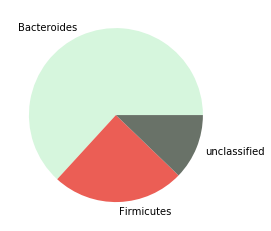

In [8]:
#patient 5
plt.pie(np.array([316/500, 123/500, 61/500]), colors=['#d6f6dd', '#eb5e55', '#697268'], labels=['Bacteroides', 'Firmicutes', 'unclassified'])

([<matplotlib.patches.Wedge at 0x1a1e393cc0>,
 [Text(1.068794908203407, 0.26014888852053747, 'Bacteroides'),
  Text(0.5894094953465412, 0.928760704807937, 'Firmicutes'),
  Text(-0.792339992243271, -0.7630185690348128, 'unclassified')])

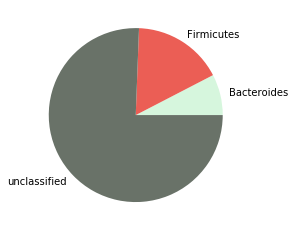

In [7]:
#patient 12
plt.pie(np.array([38/500, 84/500, 378/500]), colors=['#d6f6dd', '#eb5e55', '#697268'], labels=['Bacteroides', 'Firmicutes', 'unclassified'])